In [5]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [18]:
df = pd.read_csv("Bagalkot_Amengad.csv")
df.head()

District_Name    UnitName      FIRNo  RI  Year  Month  \
0      Bagalkot  Amengad PS  0001/2016   1  2016      1   
1      Bagalkot  Amengad PS  0002/2016   1  2016      1   
2      Bagalkot  Amengad PS  0003/2016   1  2016      1   
3      Bagalkot  Amengad PS  0004/2016   1  2016      1   
4      Bagalkot  Amengad PS  0005/2016   1  2016      1   

         Offence_From_Date          Offence_To_Date         FIR_Reg_DateTime  \
0  2015-12-27 12:00:00.000  2015-12-27 12:05:00.000  2016-01-05 11:00:00.000   
1  2016-01-12 17:30:00.000  2016-01-12 17:35:00.000  2016-01-12 19:00:00.000   
2  2016-01-12 17:45:00.000  2016-01-12 17:50:00.000  2016-01-12 19:30:00.000   
3  2016-01-14 21:30:00.000  2016-01-14 21:35:00.000  2016-01-15 14:00:00.000   
4  2016-01-18 15:00:00.000  2016-01-18 15:05:00.000  2016-01-18 19:30:00.000   

     FIR_Date  ... VICTIM COUNT Accused Count Arrested Male Arrested Female  \
0  05/01/2016  ...            0             1             1               0   
1  12/01/2016  ...            0             5             5               0   
2  12/01/2016  ...            0             1             1               0   
3  15/01/2016  ...            0             1             1               0   
4  18/01/2016  ...            0             1             1               0   

  Arrested Count\tNo.  Accused_ChargeSheeted Count  Conviction Count  \
0                   1                            1                 0   
1                   5                            5                 2   
2                   1                            1                 0   
3                   1                            1                 0   
4                   1                            1                 0   

       FIR_ID Unit_ID           Crime_No  
0  2016000002    1245  10470124520160001  
1  2016000003    1245  10470124520160002  
2  2016000004    1245  10470124520160003  
3  2016000005    1245  10470124520160004  
4  2016000006    1245  10470124520160005  

[5 rows x 41 columns]

In [22]:
print(df['CrimeGroup_Name'].unique())
print(len(df['CrimeGroup_Name'].unique()))

['POCSO' 'KARNATAKA POLICE ACT 1963' 'MOTOR VEHICLE ACCIDENTS NON-FATAL'
 'MOTOR VEHICLE ACCIDENTS FATAL' 'THEFT' 'CrPC' 'CRUELTY BY HUSBAND'
 'ATTEMPT TO MURDER' 'CHEATING' 'Karnataka State Local Act' 'ELECTION'
 ' REPRESENTATION OF PEOPLE ACT 1951 & 1988' 'MOLESTATION'
 'MISSING PERSON' 'CASES OF HURT' 'FORGERY'
 'SCHEDULED CASTE AND THE SCHEDULED TRIBES ' 'BURGLARY - NIGHT'
 'NEGLIGENT ACT' 'MURDER' 'RIOTS' 'Attempting to commit offences'
 'KIDNAPPING AND ABDUCTION' 'EXPLOSIVES'
 'EXPOSURE AND ABANDONMENT OF CHILD' 'ARSON' 'CONSUMER'
 'OFFENCES AGAINST PUBLIC SERVANTS (Public servant is a victim)'
 'CRIMES RELATED TO WOMEN' 'DEATHS DUE TO RASHNESS/NEGLIGENCE'
 'COMMUNAL / RELIGION   ' 'DOWRY DEATHS' 'CRIMINAL BREACH OF TRUST'
 'DACOITY' ' PREVENTION OF DAMAGE TO PUBLIC PROPERTY ACT 1984'
 'BURGLARY - DAY' 'ANIMAL' 'MISCHIEF'
 'INSULTING MODESTY OF WOMEN (EVE TEASING)' 'CRIMINAL TRESPASS'
 'CRIMINAL INTIMIDATION' 'CRIMINAL CONSPIRACY' 'SUICIDE'
 'NARCOTIC DRUGS & PSHYCOTROPIC SUBSTAN

In [26]:
dffir = pd.read_csv(r"D:\KRK Datathon\datathon\Predictive Crime Analytics\FIR_Details_Data.csv")

C:\Users\prana\AppData\Local\Temp\ipykernel_10388\942108576.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  dffir = pd.read_csv(r"D:\KRK Datathon\datathon\Predictive Crime Analytics\FIR_Details_Data.csv")


In [48]:
print(dffir['CrimeGroup_Name'].unique())
print(len(dffir['CrimeGroup_Name'].unique()))

['POCSO' 'KARNATAKA POLICE ACT 1963' 'MOTOR VEHICLE ACCIDENTS NON-FATAL'
 'MOTOR VEHICLE ACCIDENTS FATAL' 'THEFT' 'CrPC' 'CRUELTY BY HUSBAND'
 'ATTEMPT TO MURDER' 'CHEATING' 'Karnataka State Local Act' 'ELECTION'
 ' REPRESENTATION OF PEOPLE ACT 1951 & 1988' 'MOLESTATION'
 'MISSING PERSON' 'CASES OF HURT' 'FORGERY'
 'SCHEDULED CASTE AND THE SCHEDULED TRIBES ' 'BURGLARY - NIGHT'
 'NEGLIGENT ACT' 'MURDER' 'RIOTS' 'Attempting to commit offences'
 'KIDNAPPING AND ABDUCTION' 'EXPLOSIVES'
 'EXPOSURE AND ABANDONMENT OF CHILD' 'ARSON' 'CONSUMER'
 'OFFENCES AGAINST PUBLIC SERVANTS (Public servant is a victim)'
 'CRIMES RELATED TO WOMEN' 'DEATHS DUE TO RASHNESS/NEGLIGENCE'
 'COMMUNAL / RELIGION   ' 'DOWRY DEATHS' 'CRIMINAL BREACH OF TRUST'
 'DACOITY' ' PREVENTION OF DAMAGE TO PUBLIC PROPERTY ACT 1984'
 'BURGLARY - DAY' 'ANIMAL' 'MISCHIEF'
 'INSULTING MODESTY OF WOMEN (EVE TEASING)' 'CRIMINAL TRESPASS'
 'CRIMINAL INTIMIDATION' 'CRIMINAL CONSPIRACY' 'SUICIDE'
 'NARCOTIC DRUGS & PSHYCOTROPIC SUBSTAN

In [ ]:
countlst = (dffir['CrimeGroup_Name'].value_counts()).to_string()
print(countlst)

In [56]:
print(dffir[dffir['District_Name']=='Bengaluru City']['UnitName'].unique())
print(len(dffir[dffir['District_Name']=='Bengaluru City']['UnitName'].unique()))

['Adugodi PS' 'Adugodi Traffic PS' 'Airport PS' 'Airport Traffic PS'
 'Amruthahally PS' 'Annapoorneshwari Nagar PS' 'Ashoknagar PS'
 'Ashoknagar Traffic PS' 'Bagalagunte PS' 'Bagalur PS'
 'Banasawadi Traffic PS' 'Banashankari PS' 'Banashankari Traffic PS'
 'Banaswadi PS' 'Bandepalya PS' 'Basavanagudi PS'
 'Basavanagudi Traffic PS' 'Basavanagudi Women PS' 'Basaveshwara Nagar PS'
 'Beguru PS' 'Bellanduru PS' 'Bellanduru Traffic PS' 'Bharathi Nagar PS'
 'BIAL PS' 'Bommanahalli PS' 'Bowring Hospital PS' 'Byadarahalli PS'
 'Byappanahalli PS' 'Byatarayanapura  PS' 'Byatrarayanapura Traffic PS'
 'Central CEN Crime PS' 'Chamarajpet PS' 'Chandra Layout PS'
 'Channammanakere Achu Kattu PS' 'Chickabanavara Traffic PS' 'Chickpet PS'
 'Chickpet Traffic PS' 'Chikkajala PS' 'Chikkajala Traffic PS'
 'City Market PS' 'City Market Traffic PS' 'Commercial Street PS'
 'Cottonpet PS' 'Cubbon Park PS' 'Cubbonpark Traffic PS'
 'Cyber Crime Police Station' 'Devanahalli PS' 'Devanahalli Traffic PS'
 'Devarajee

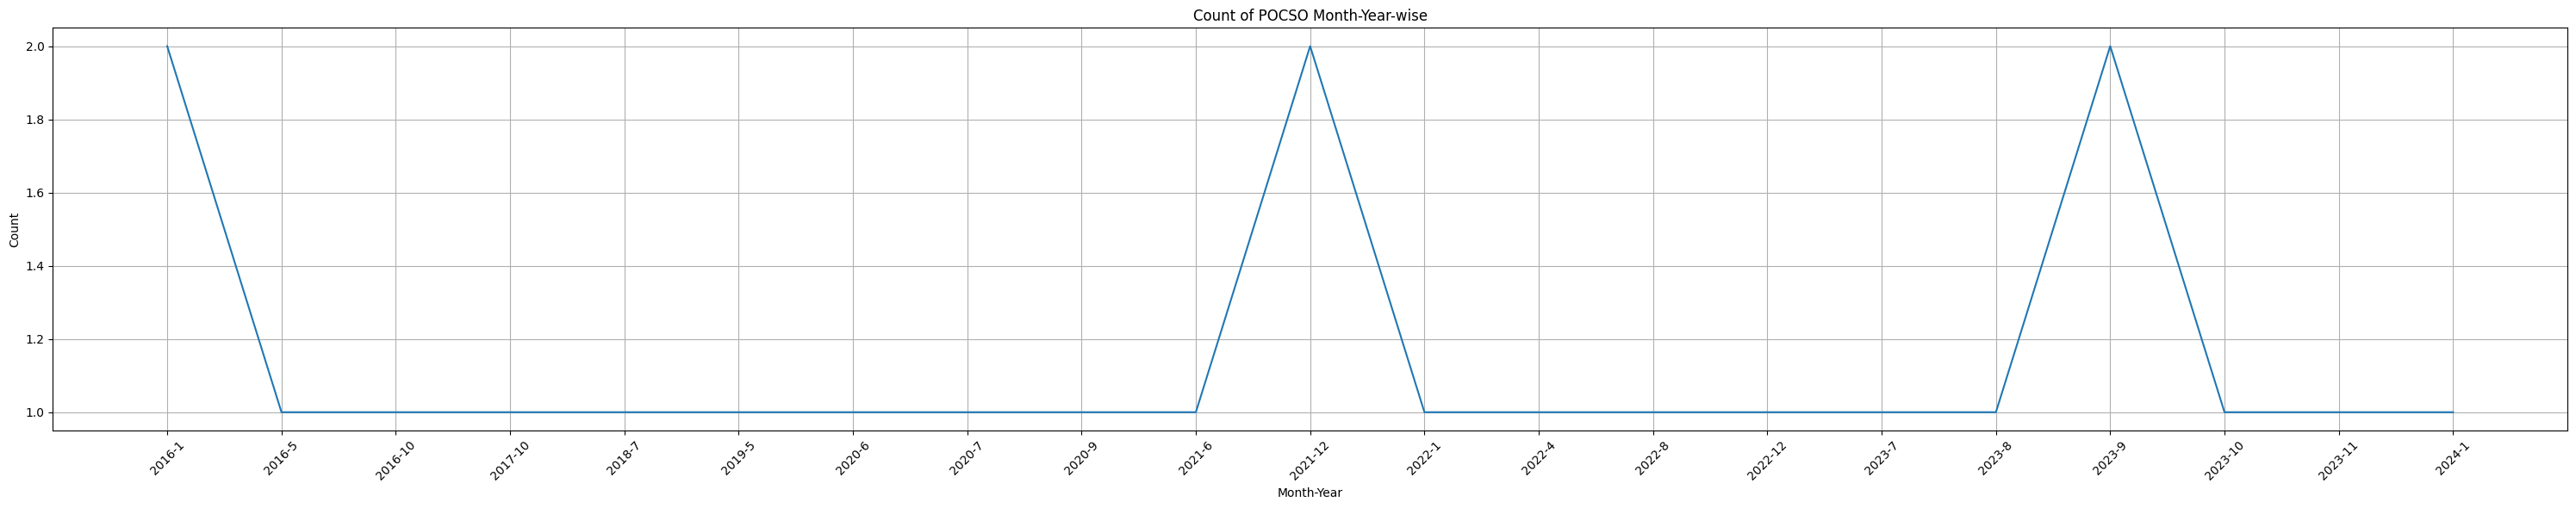

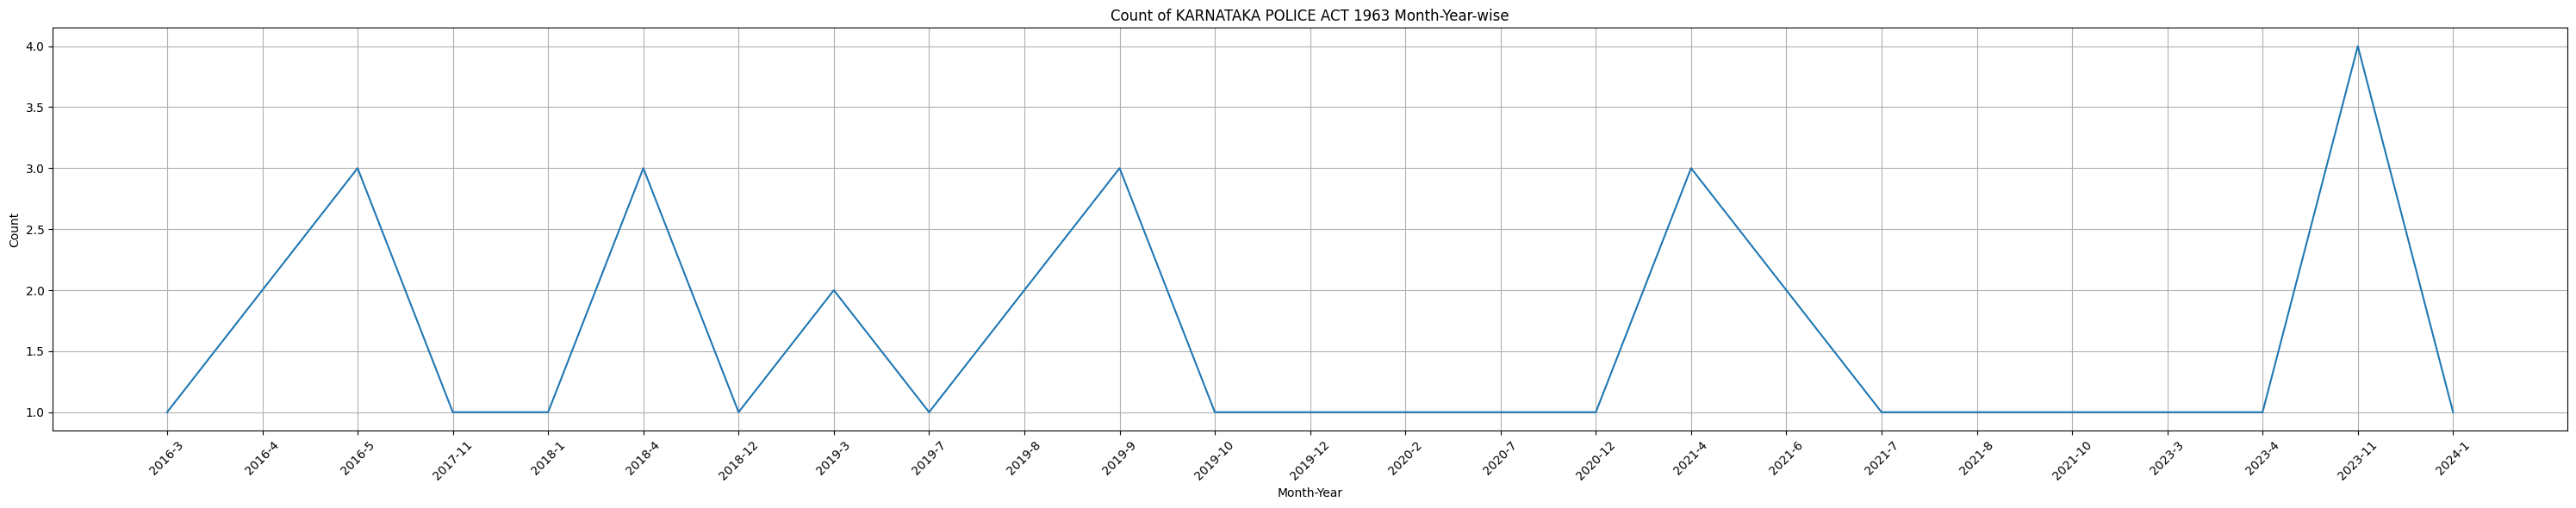

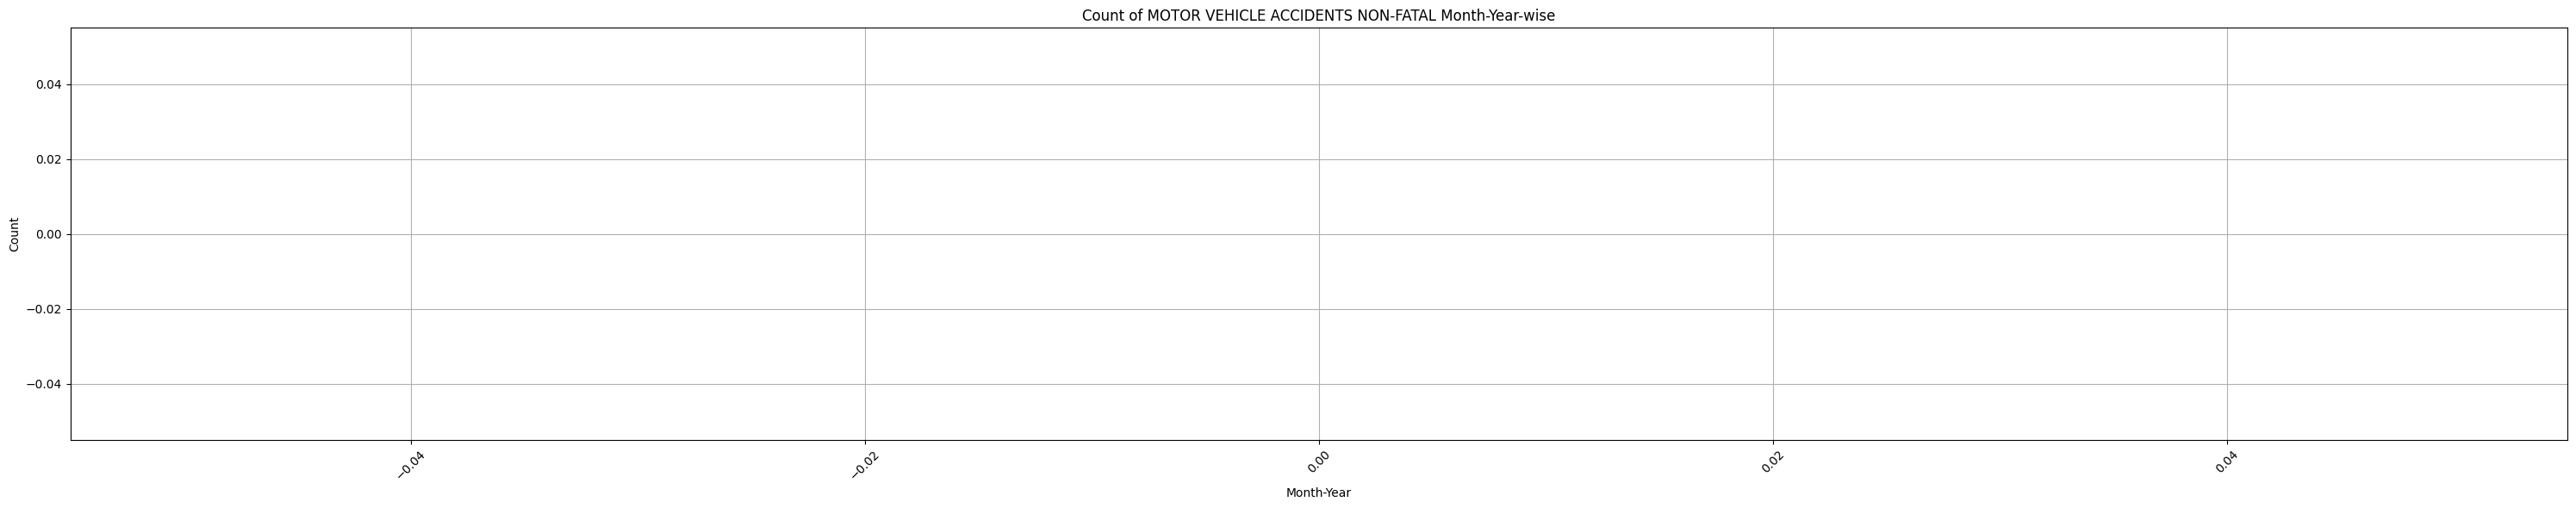

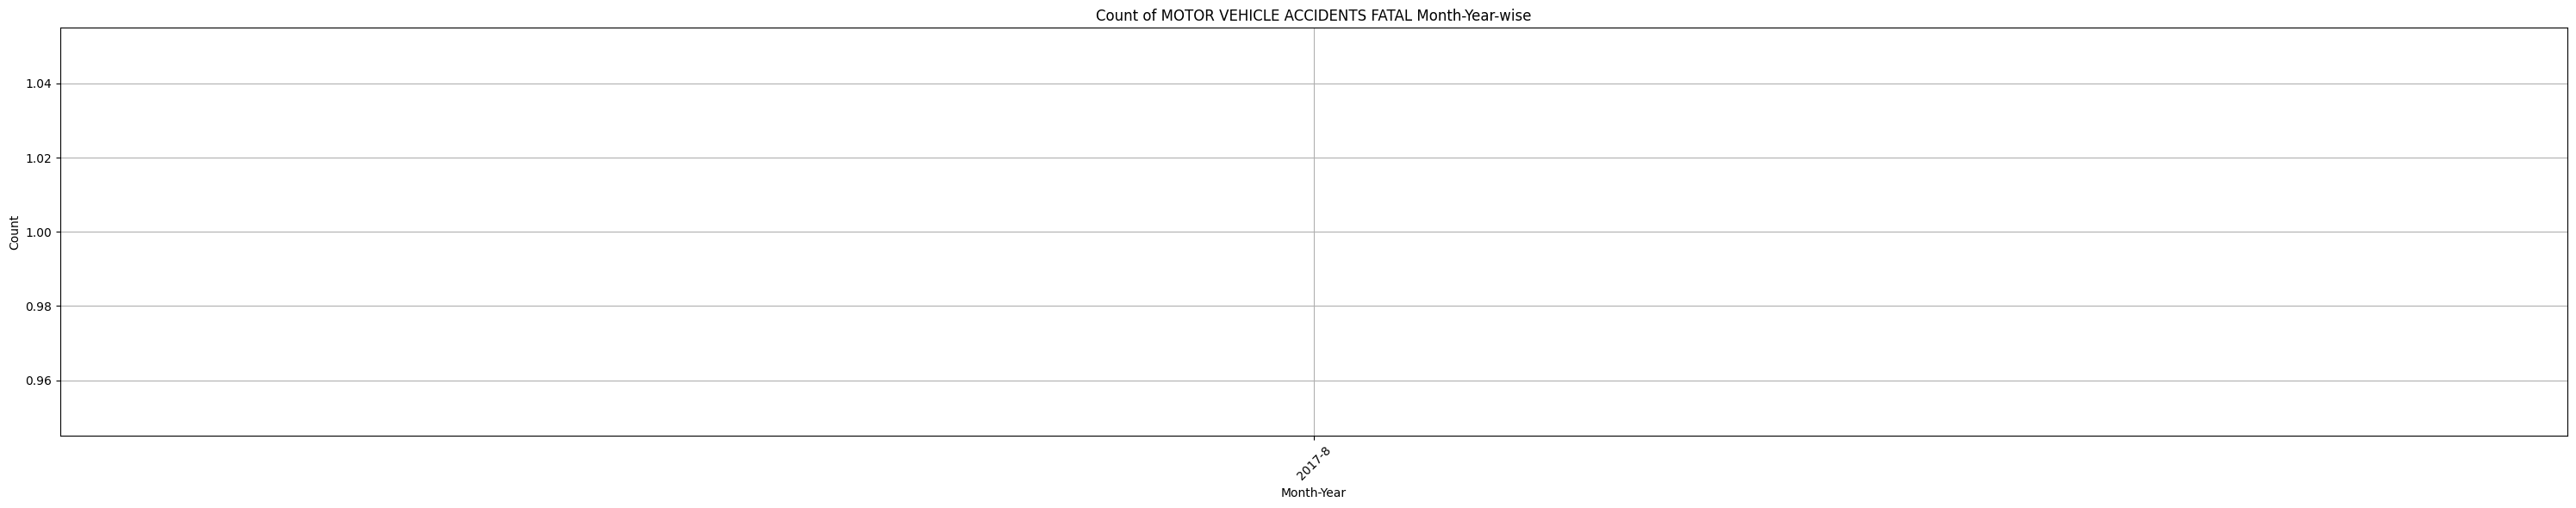

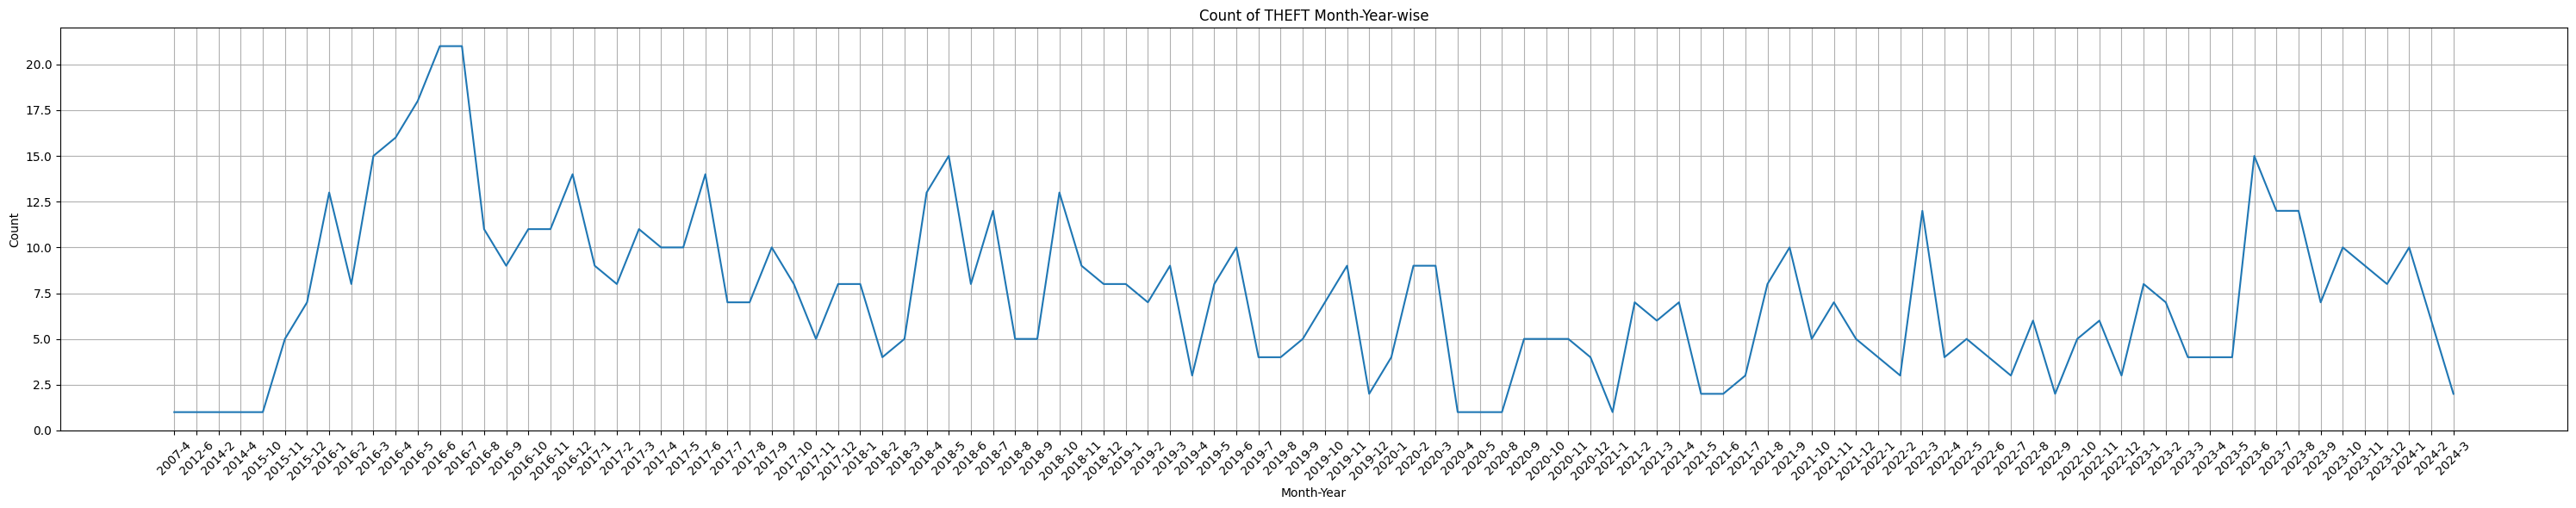

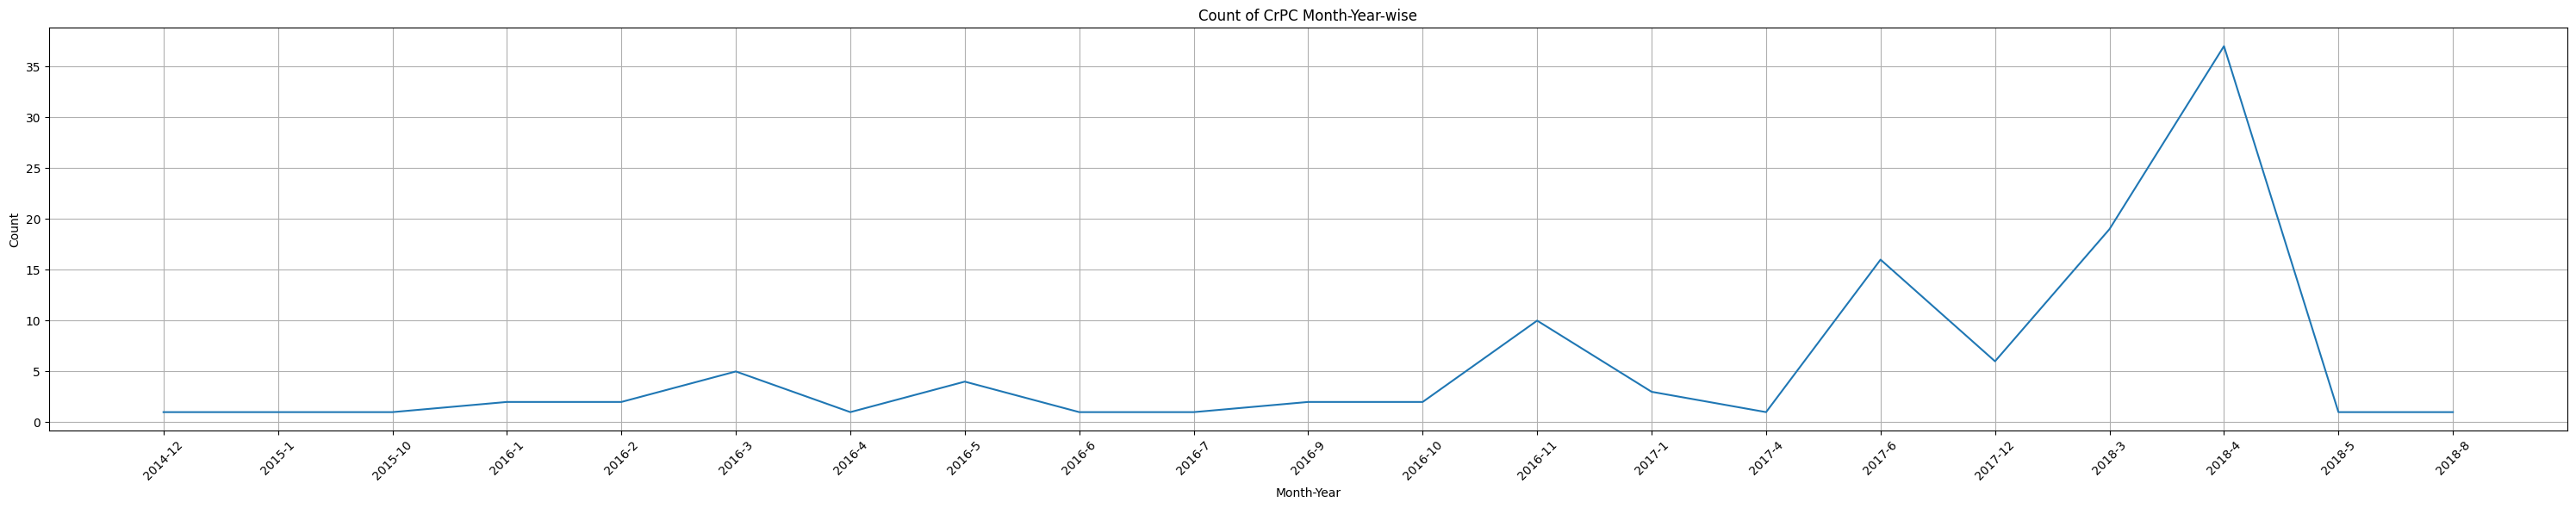

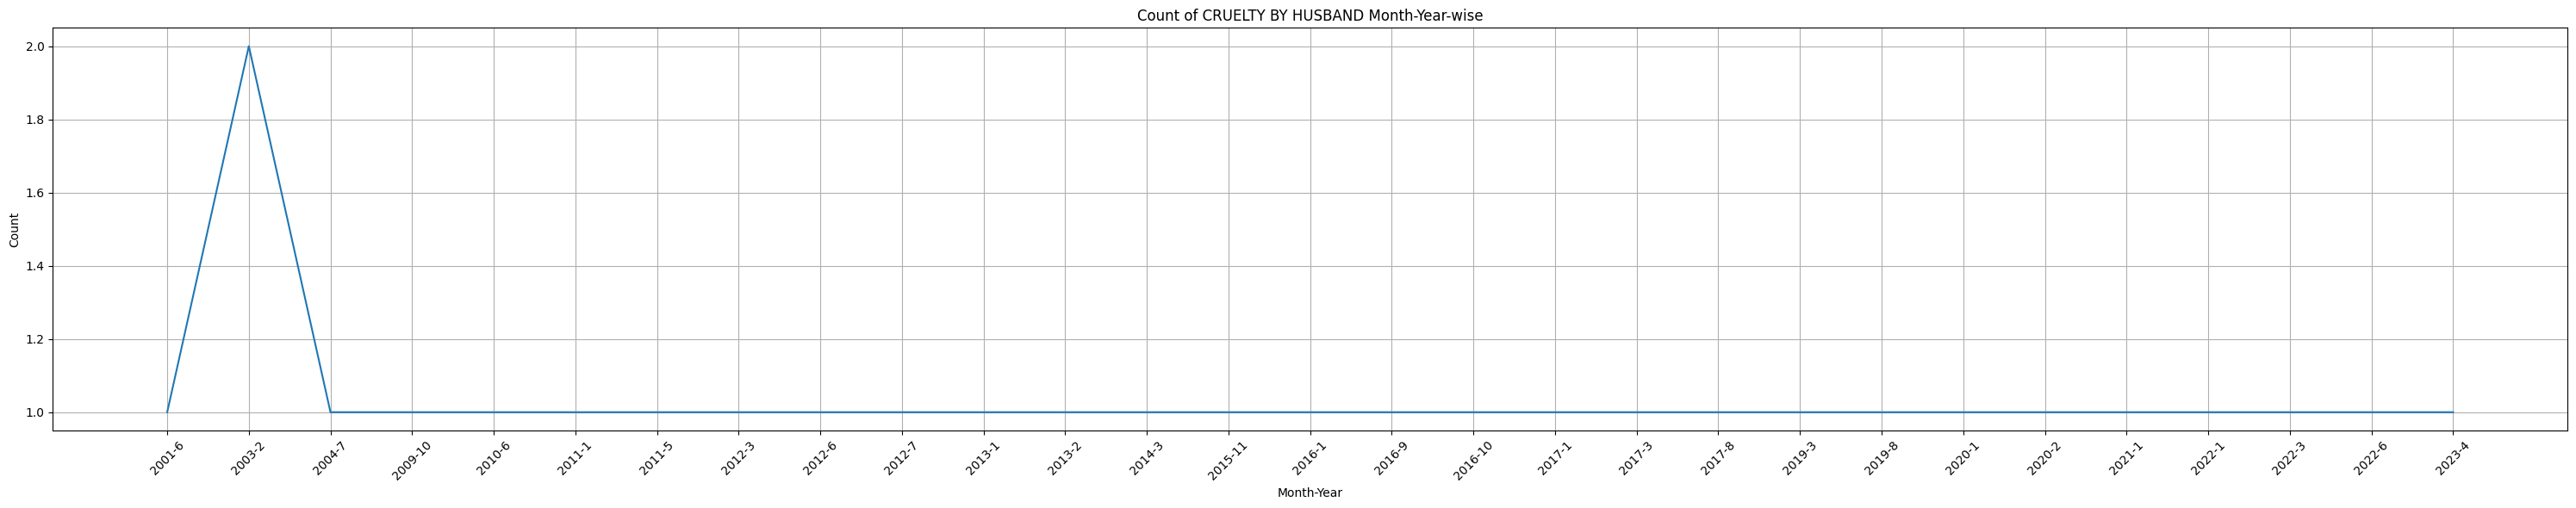

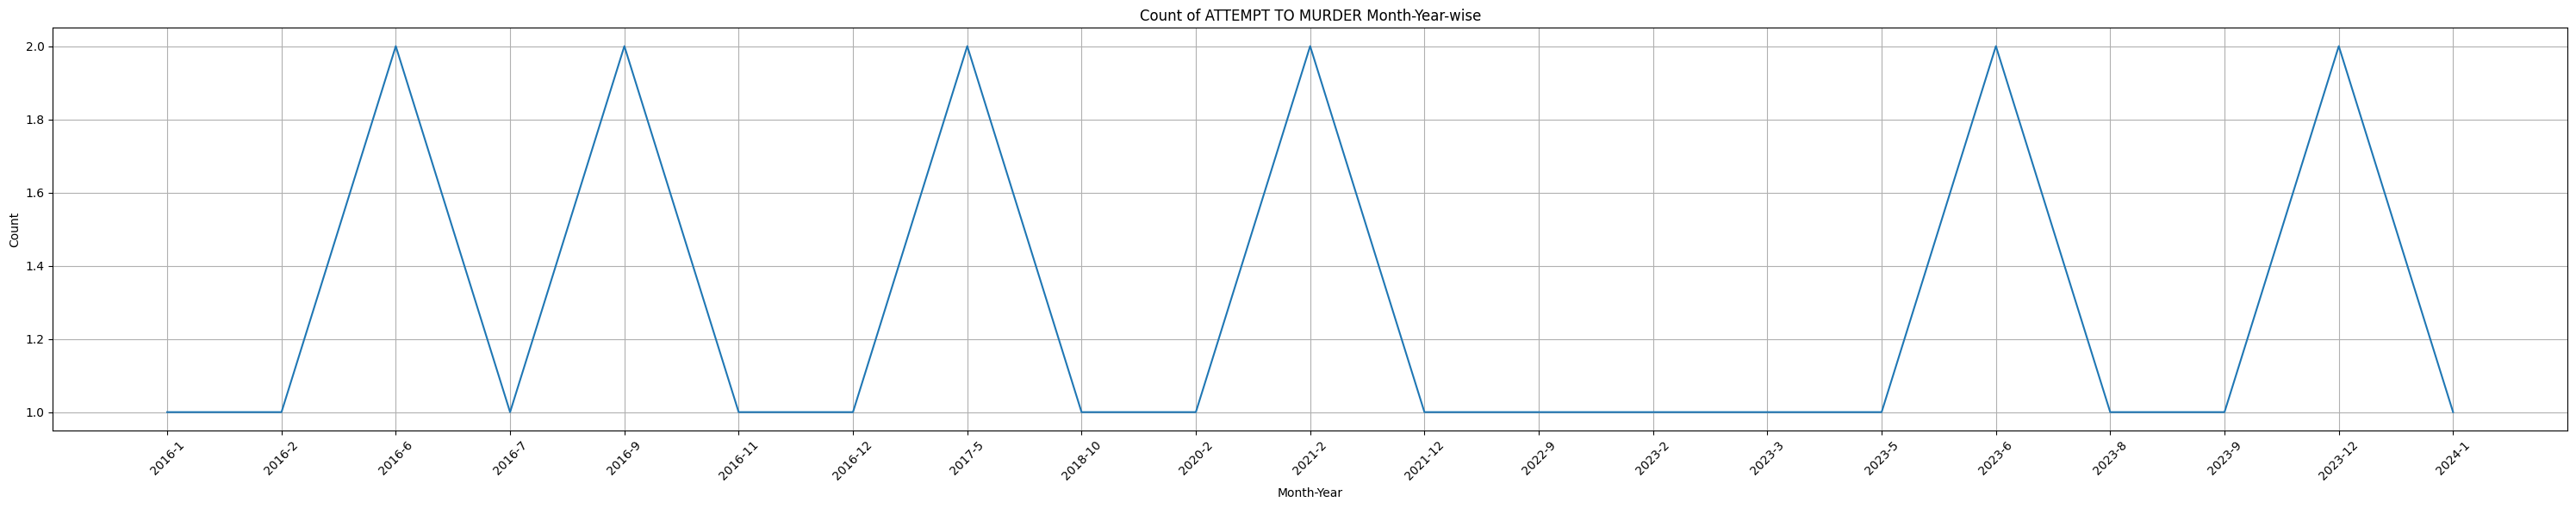

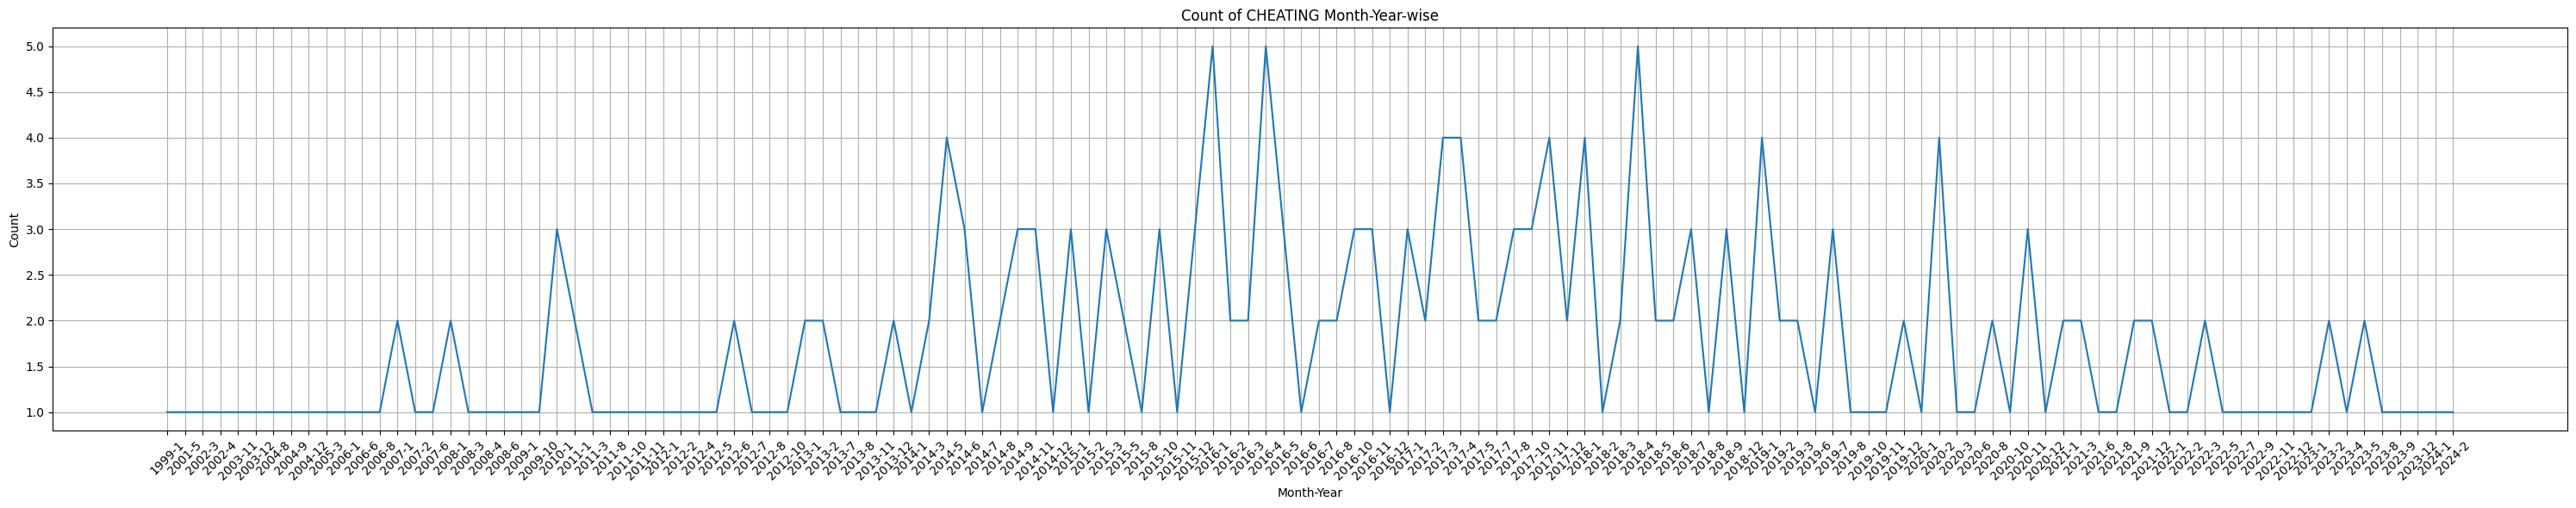

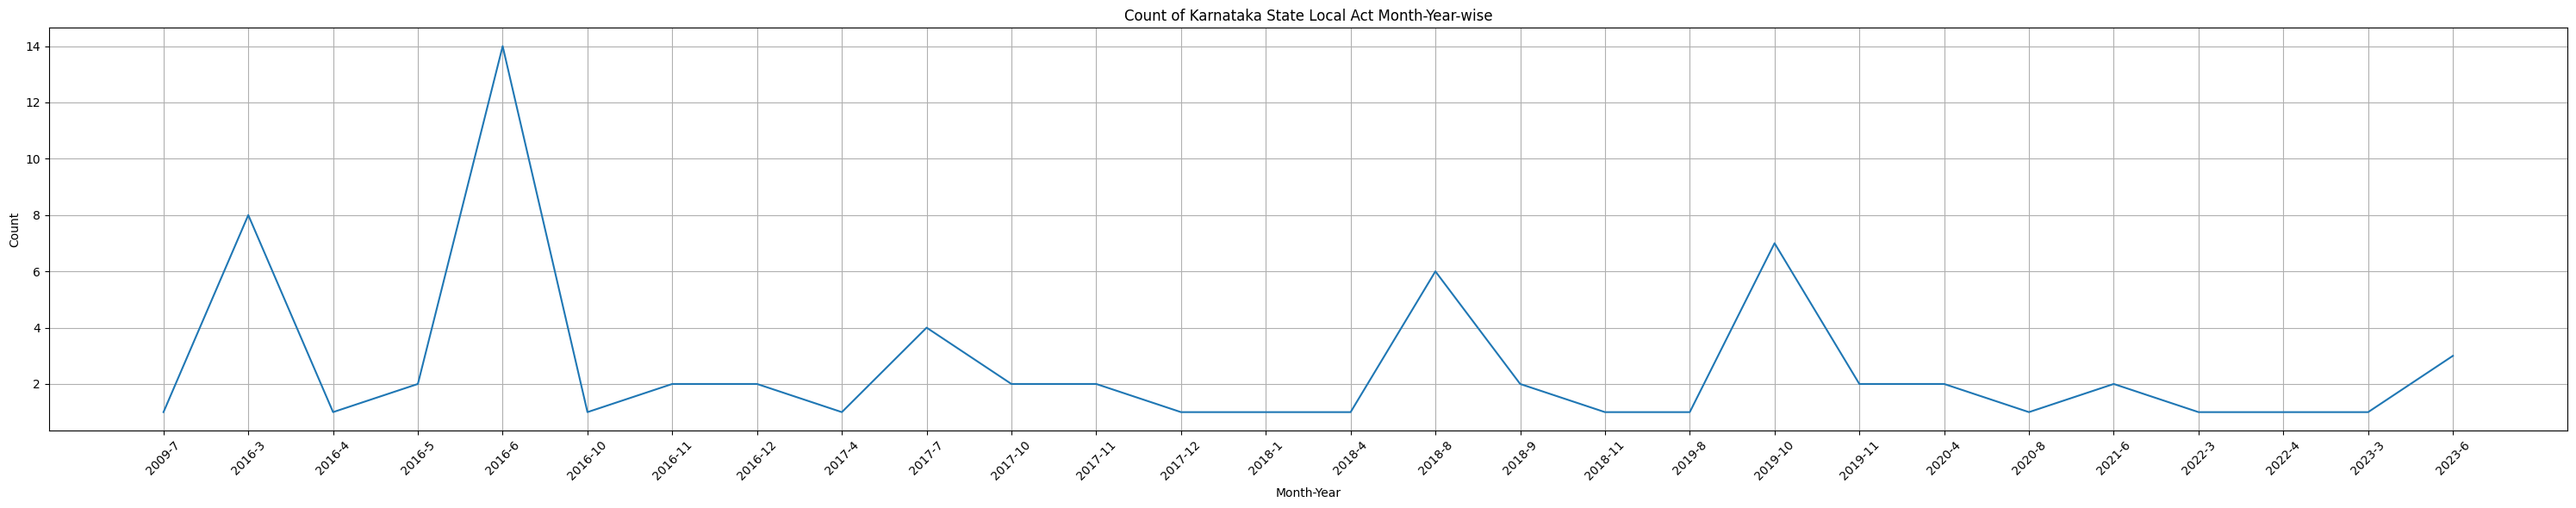

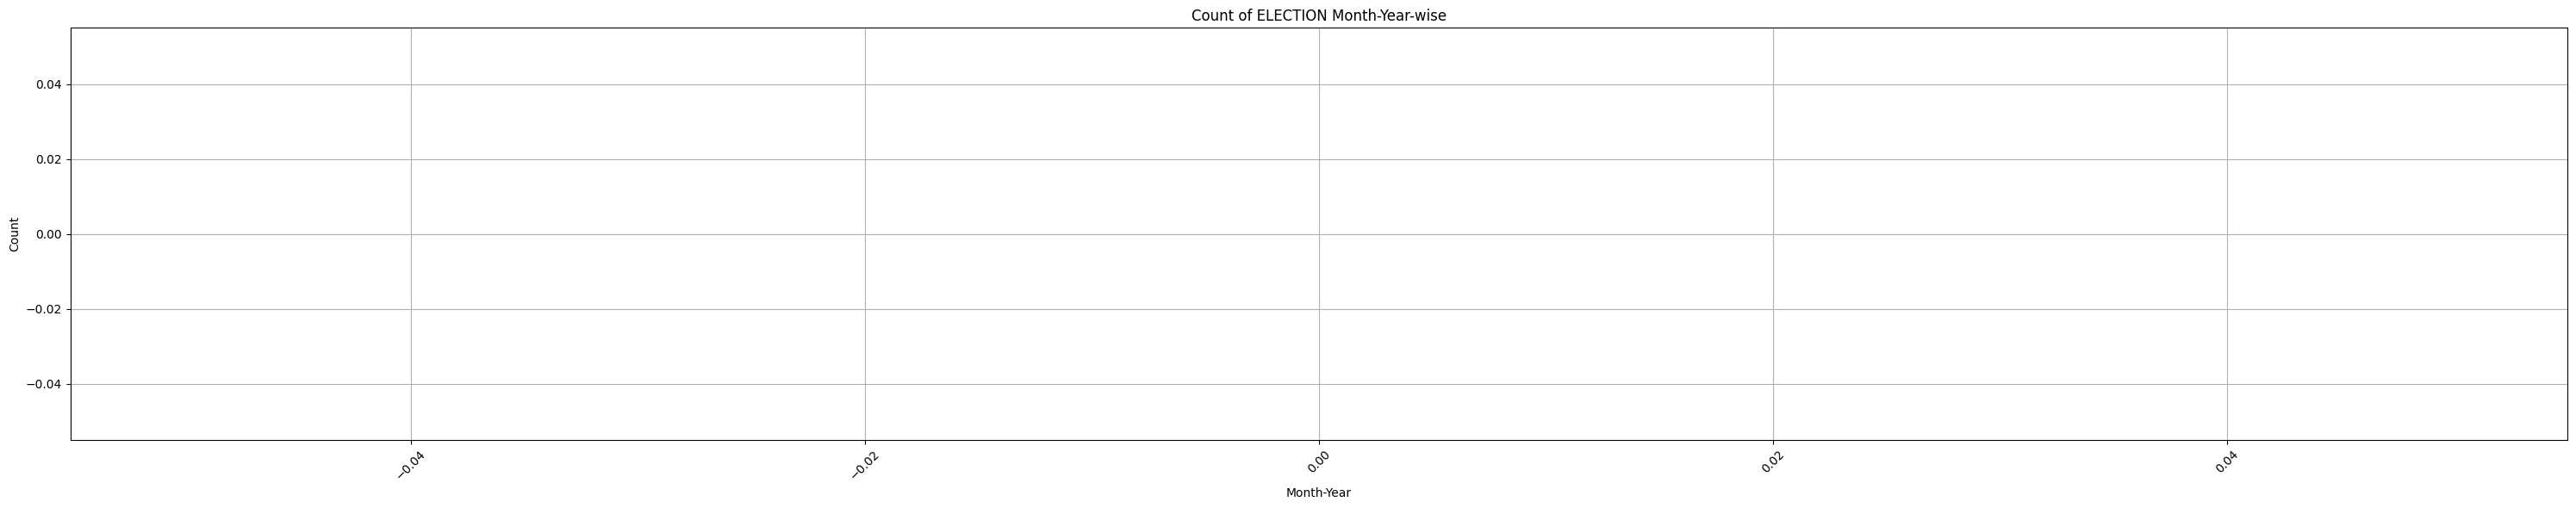

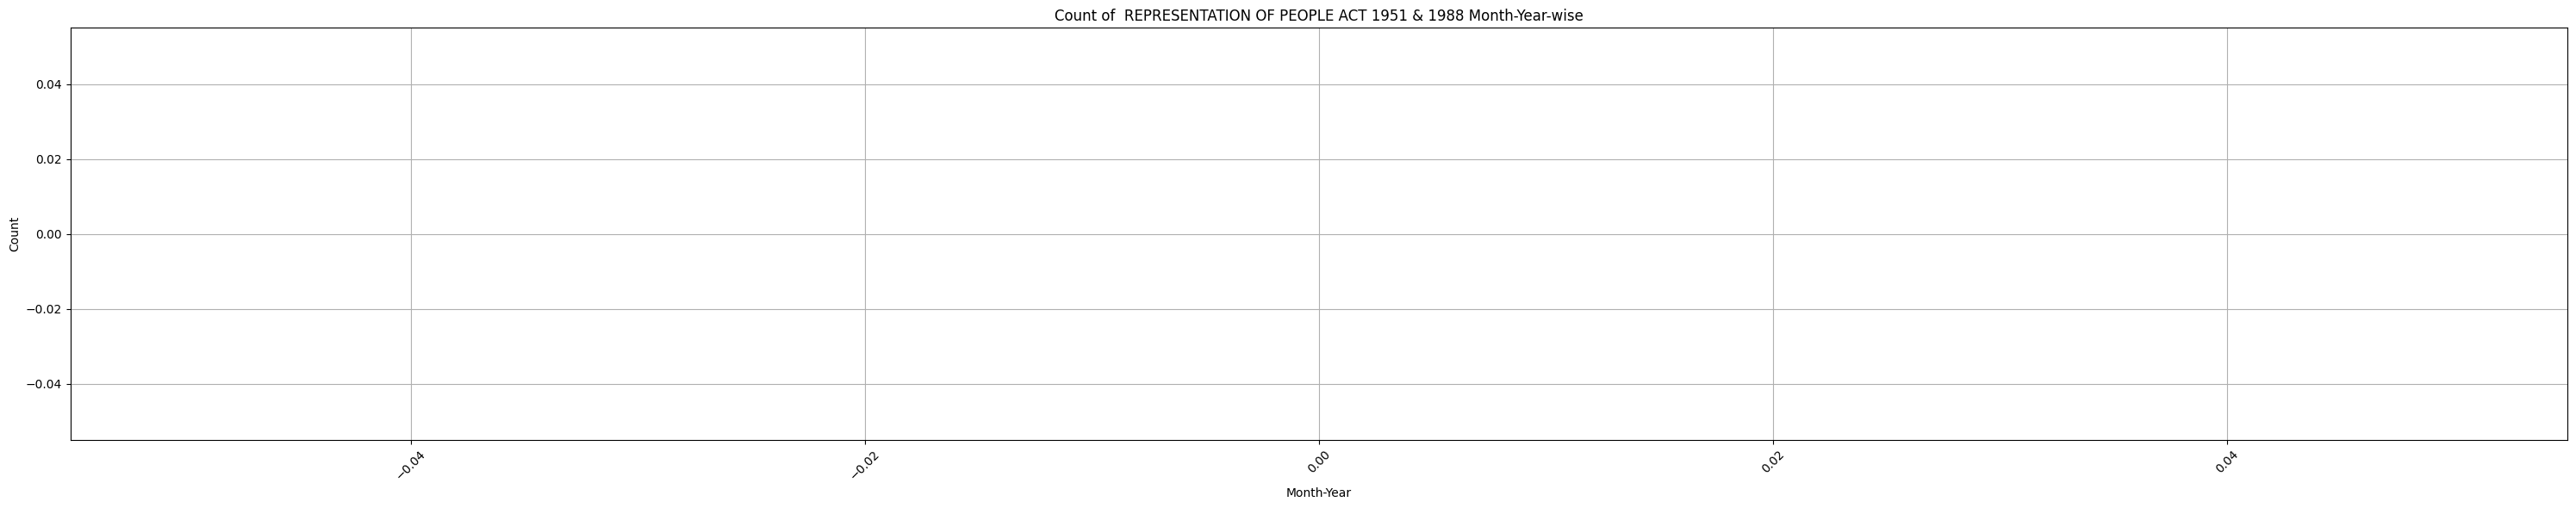

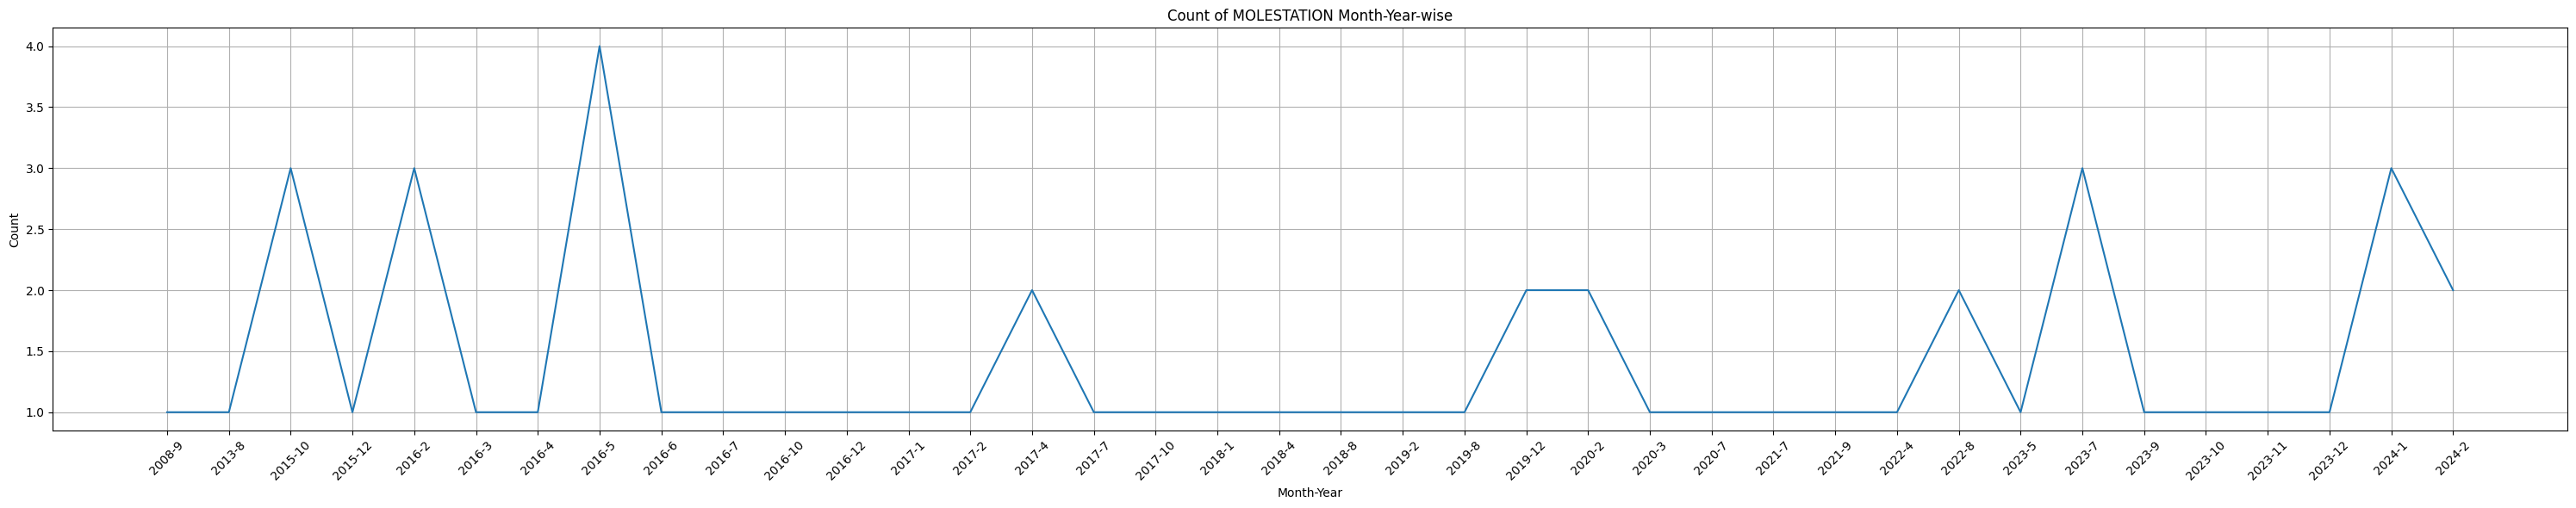

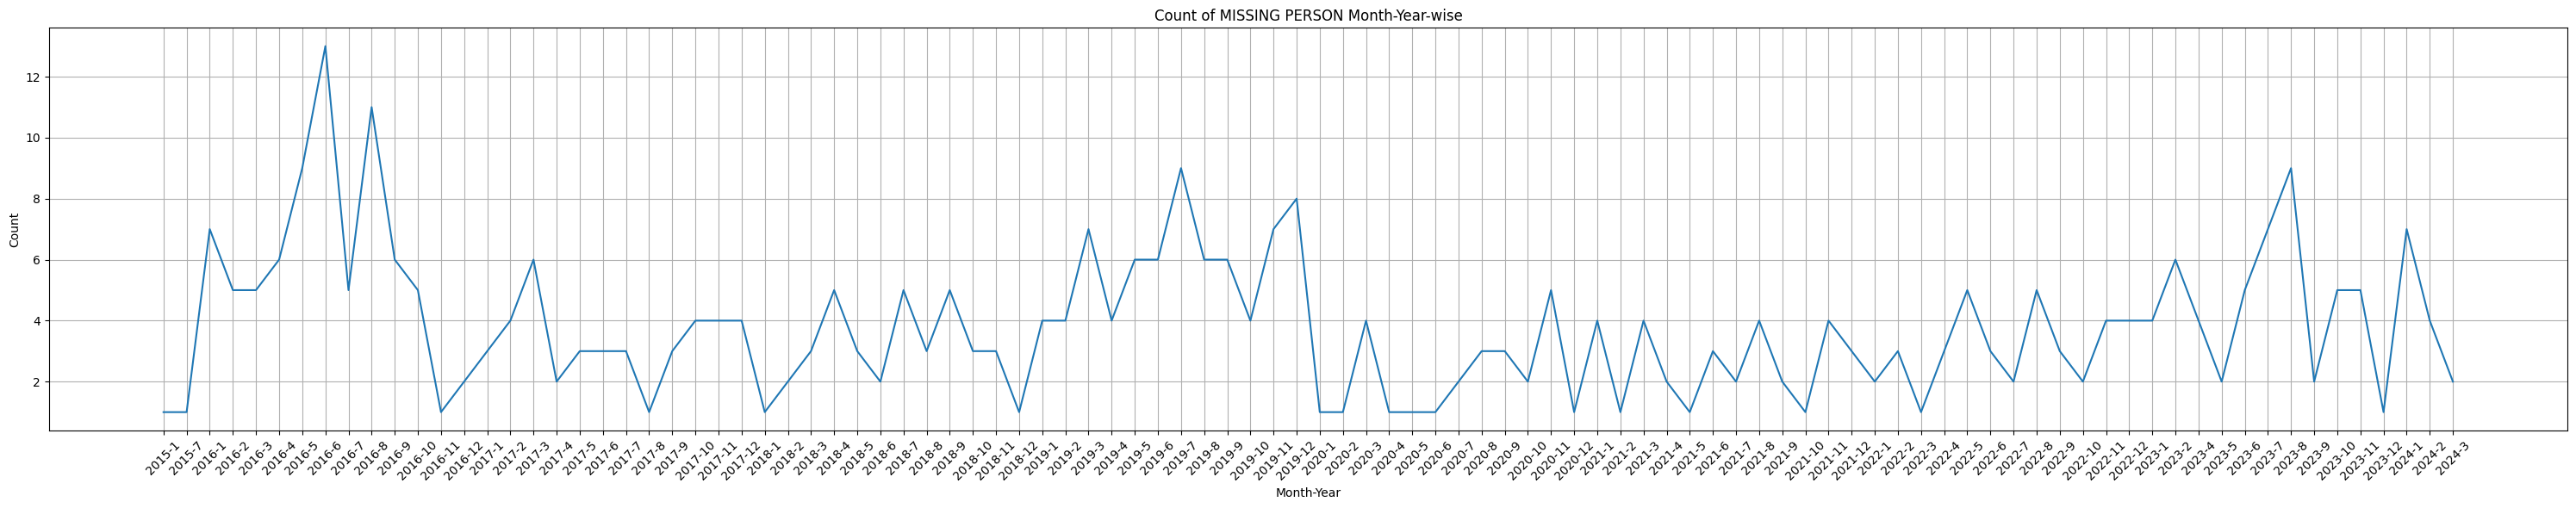

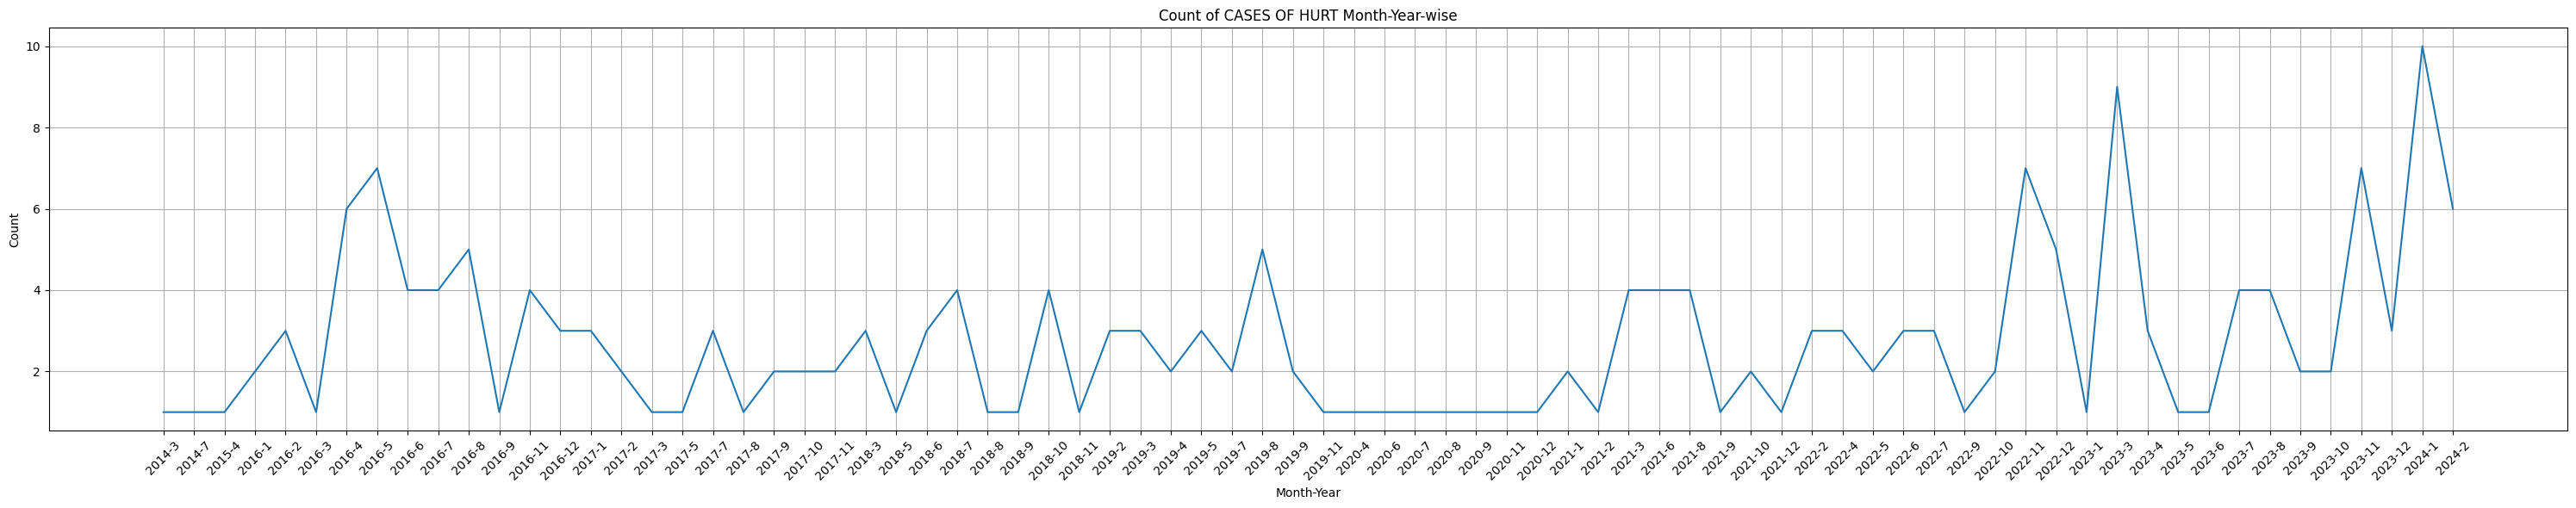

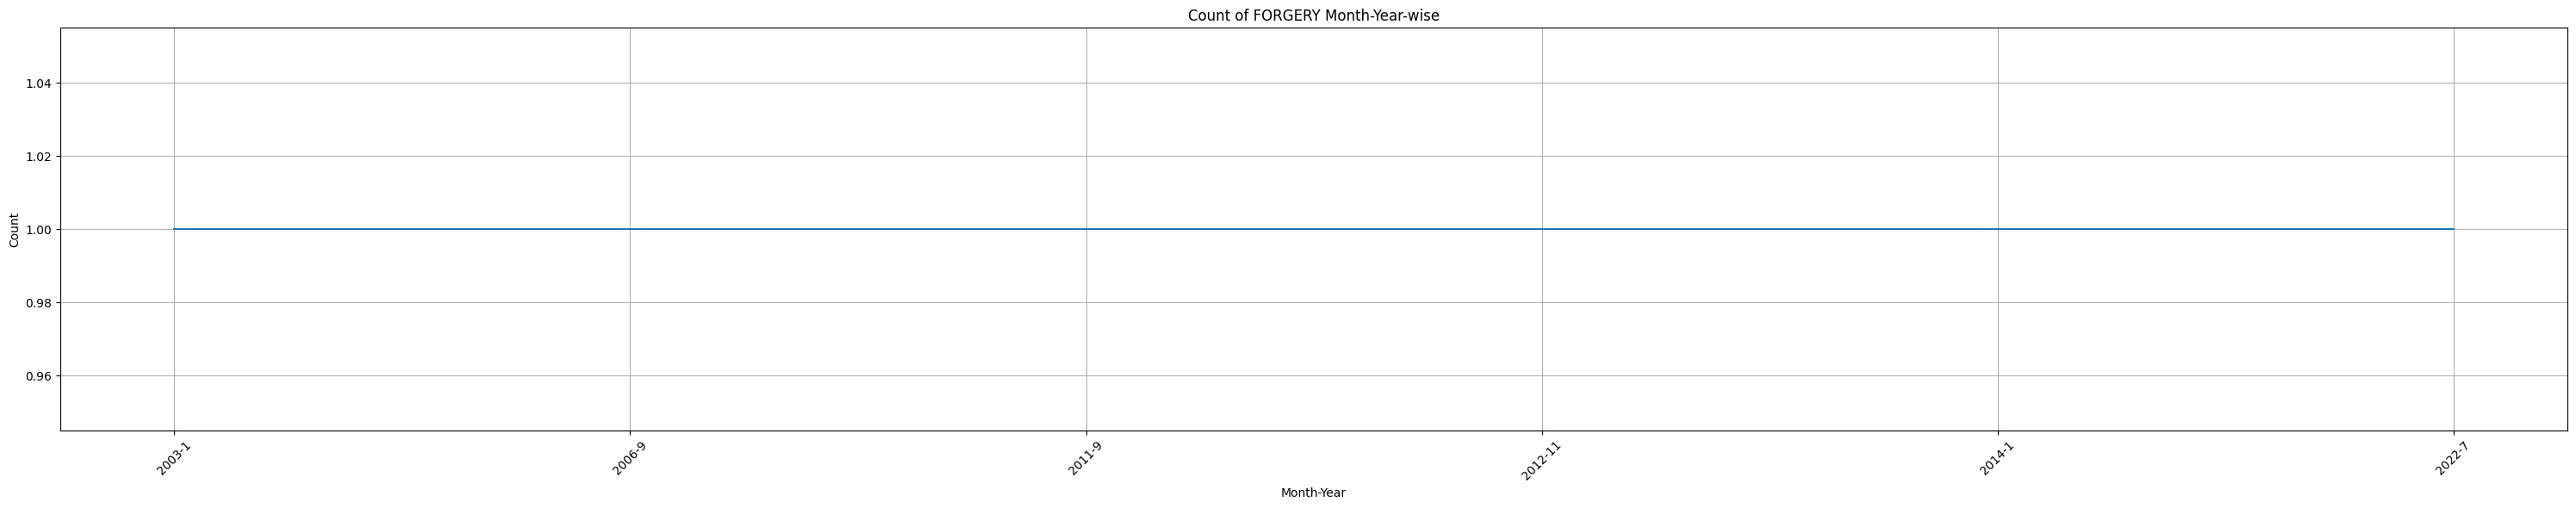

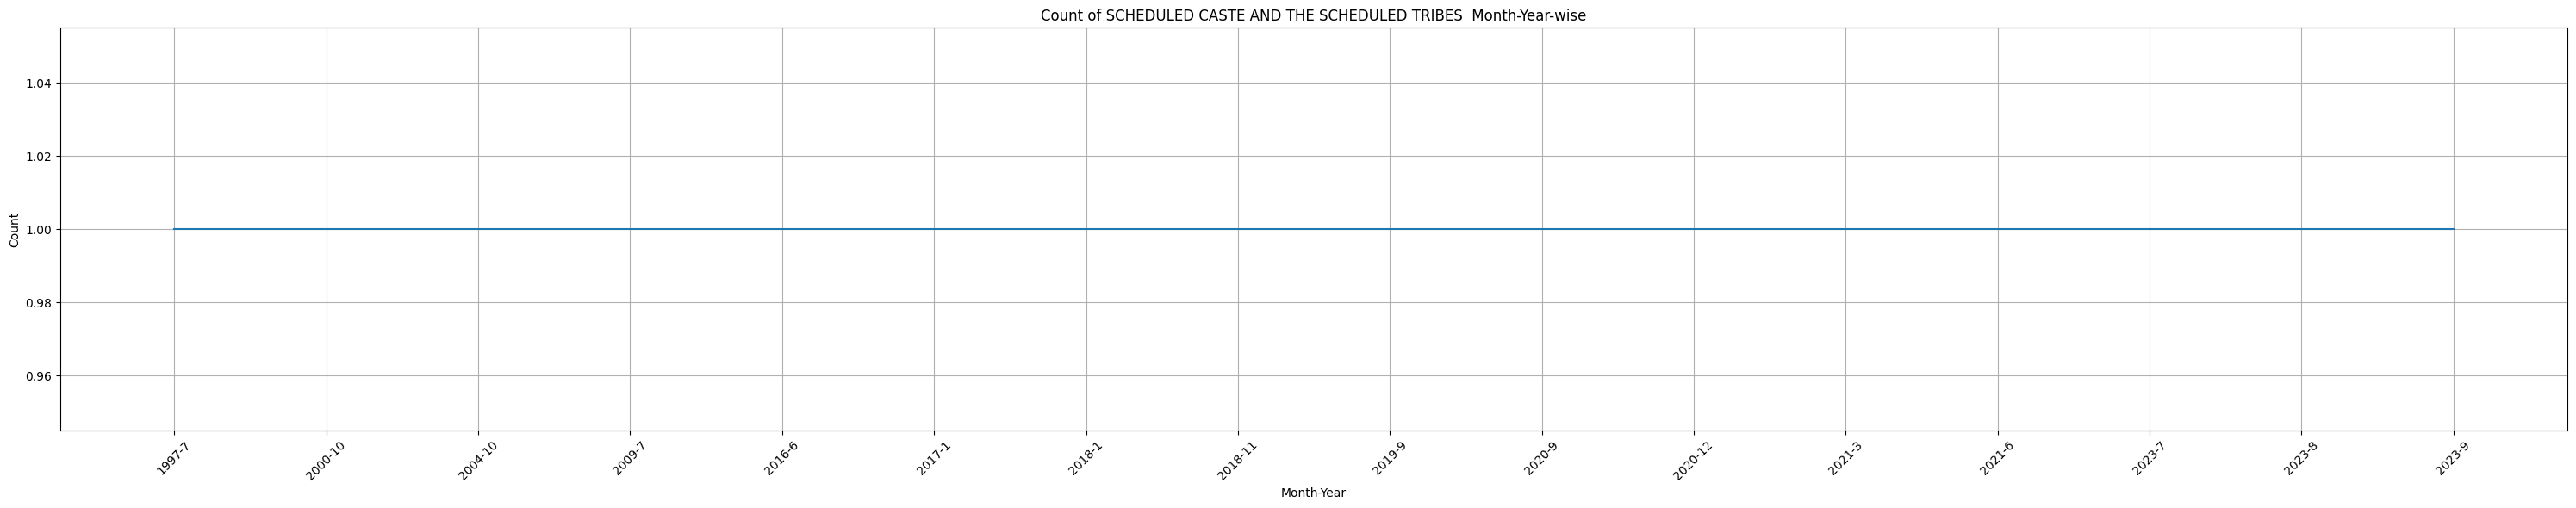

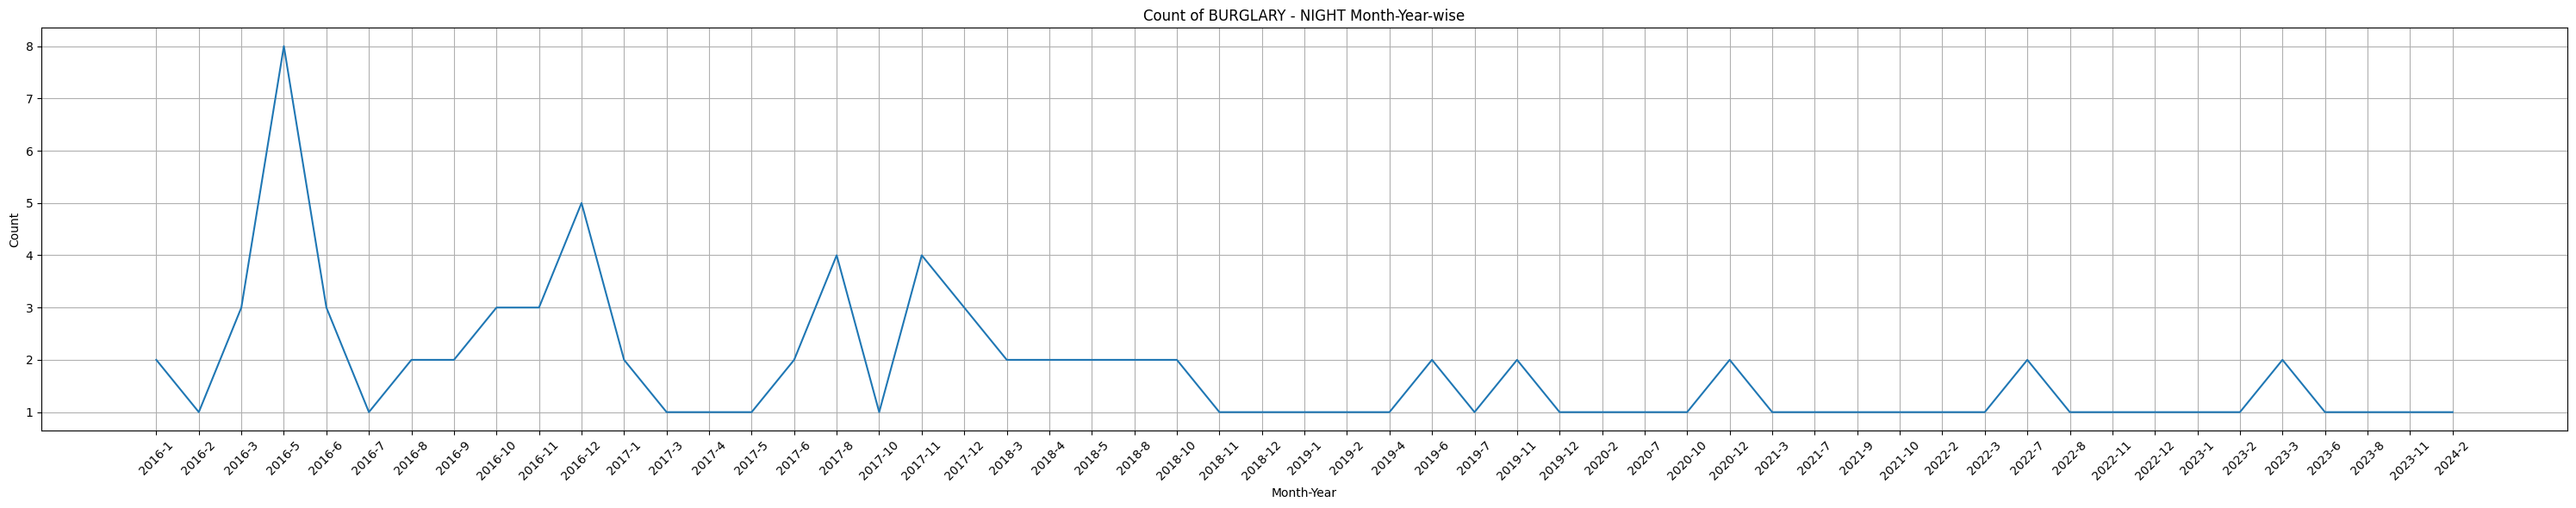

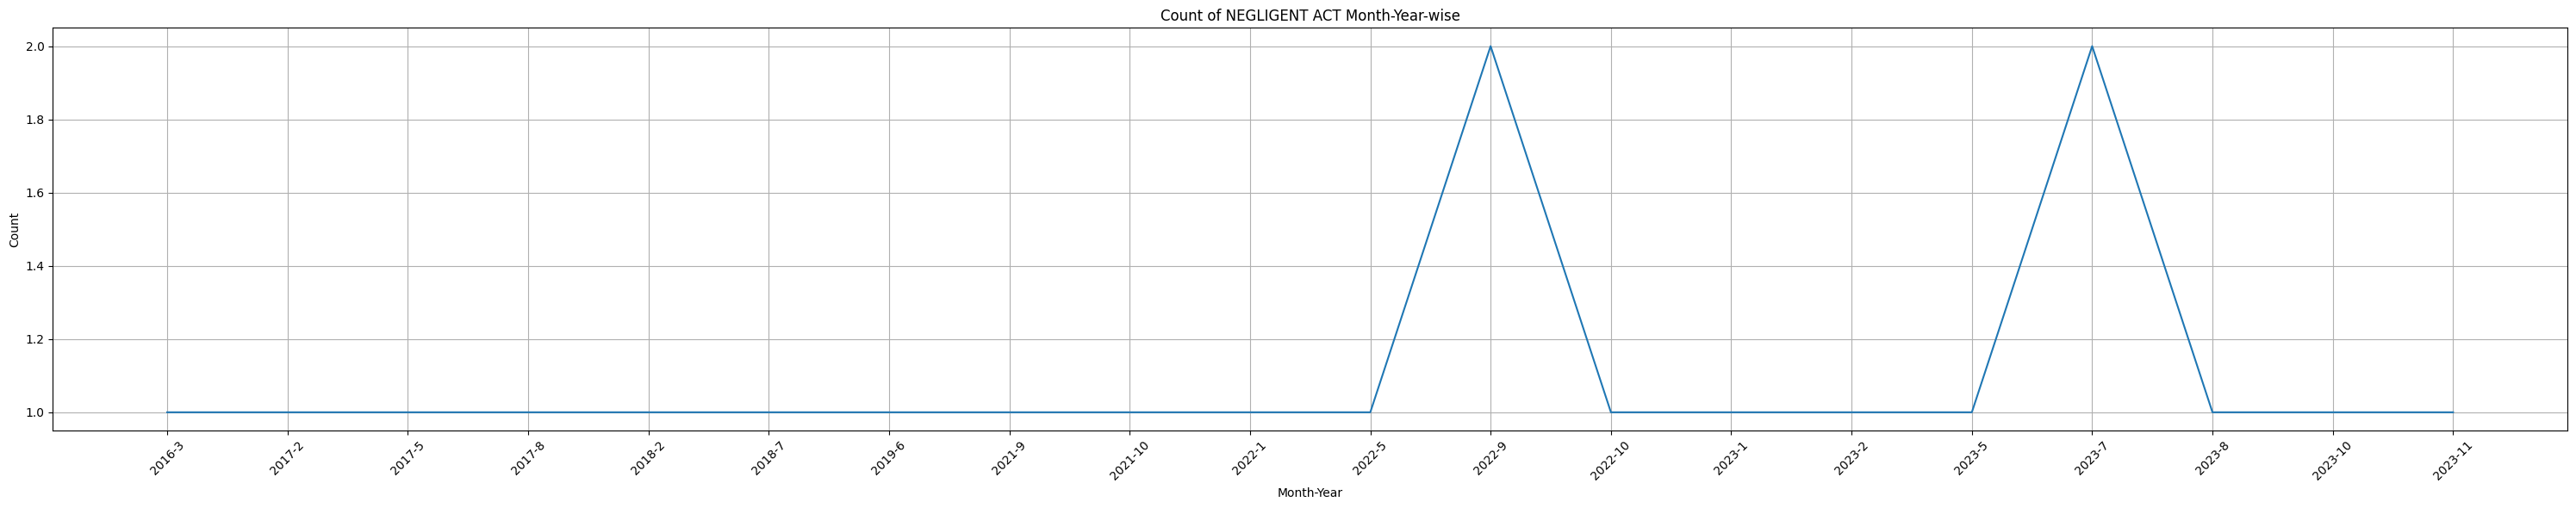

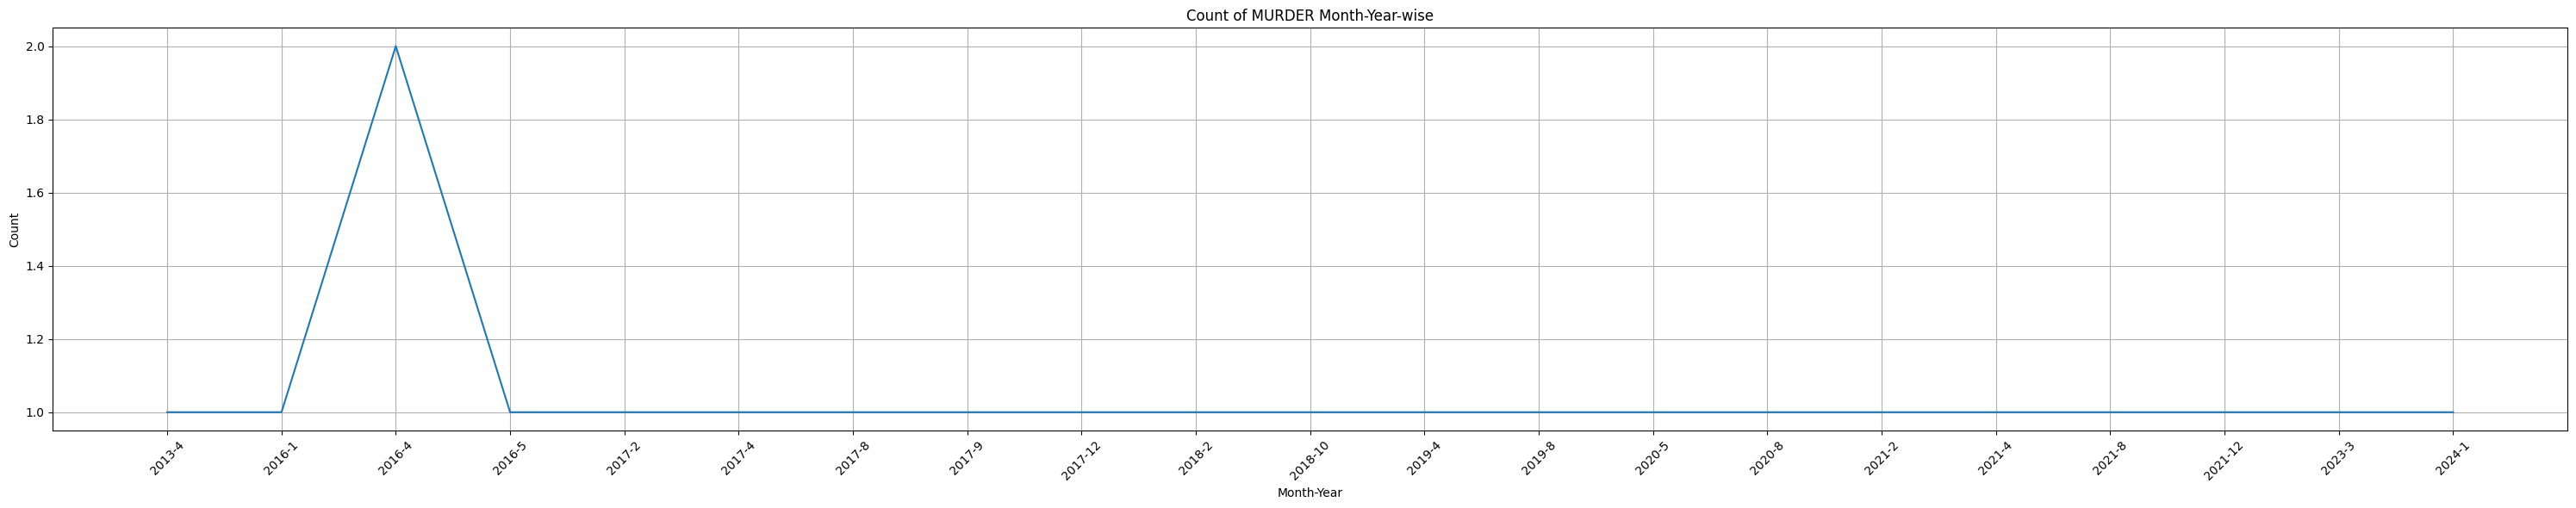

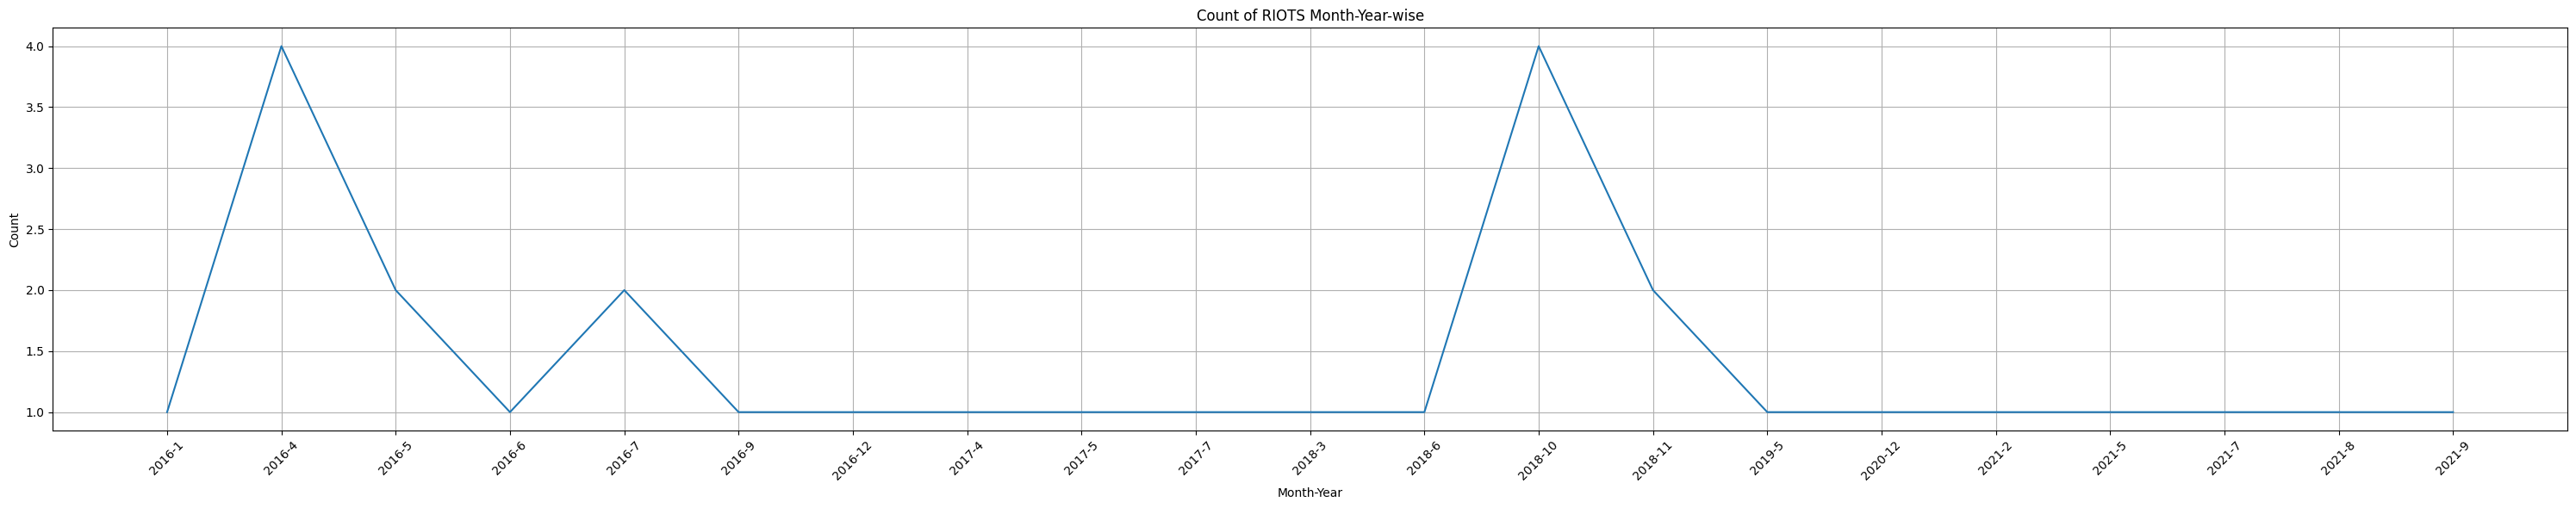

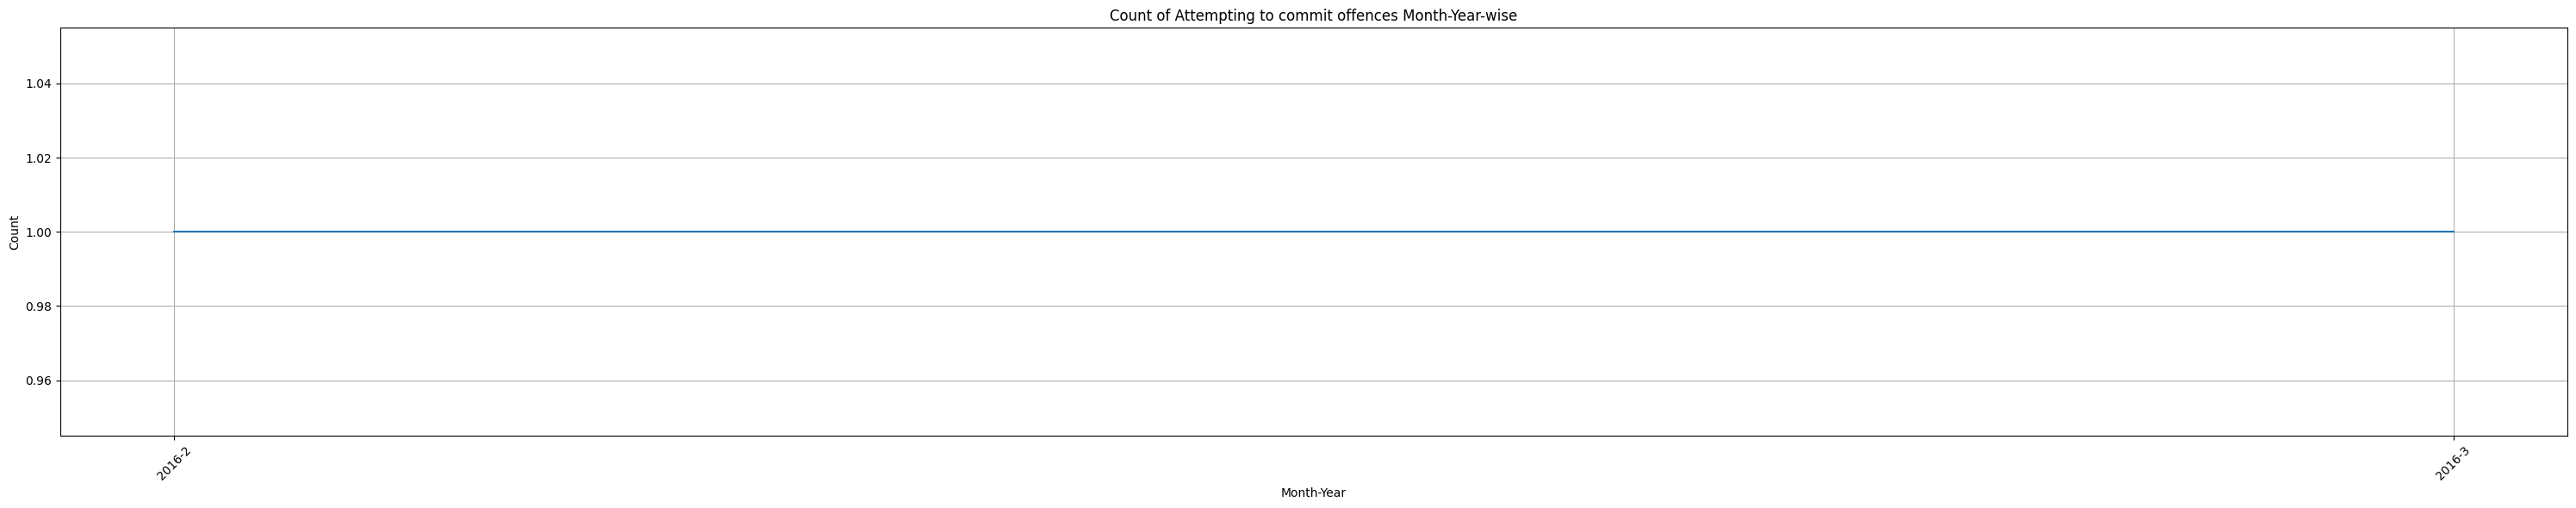

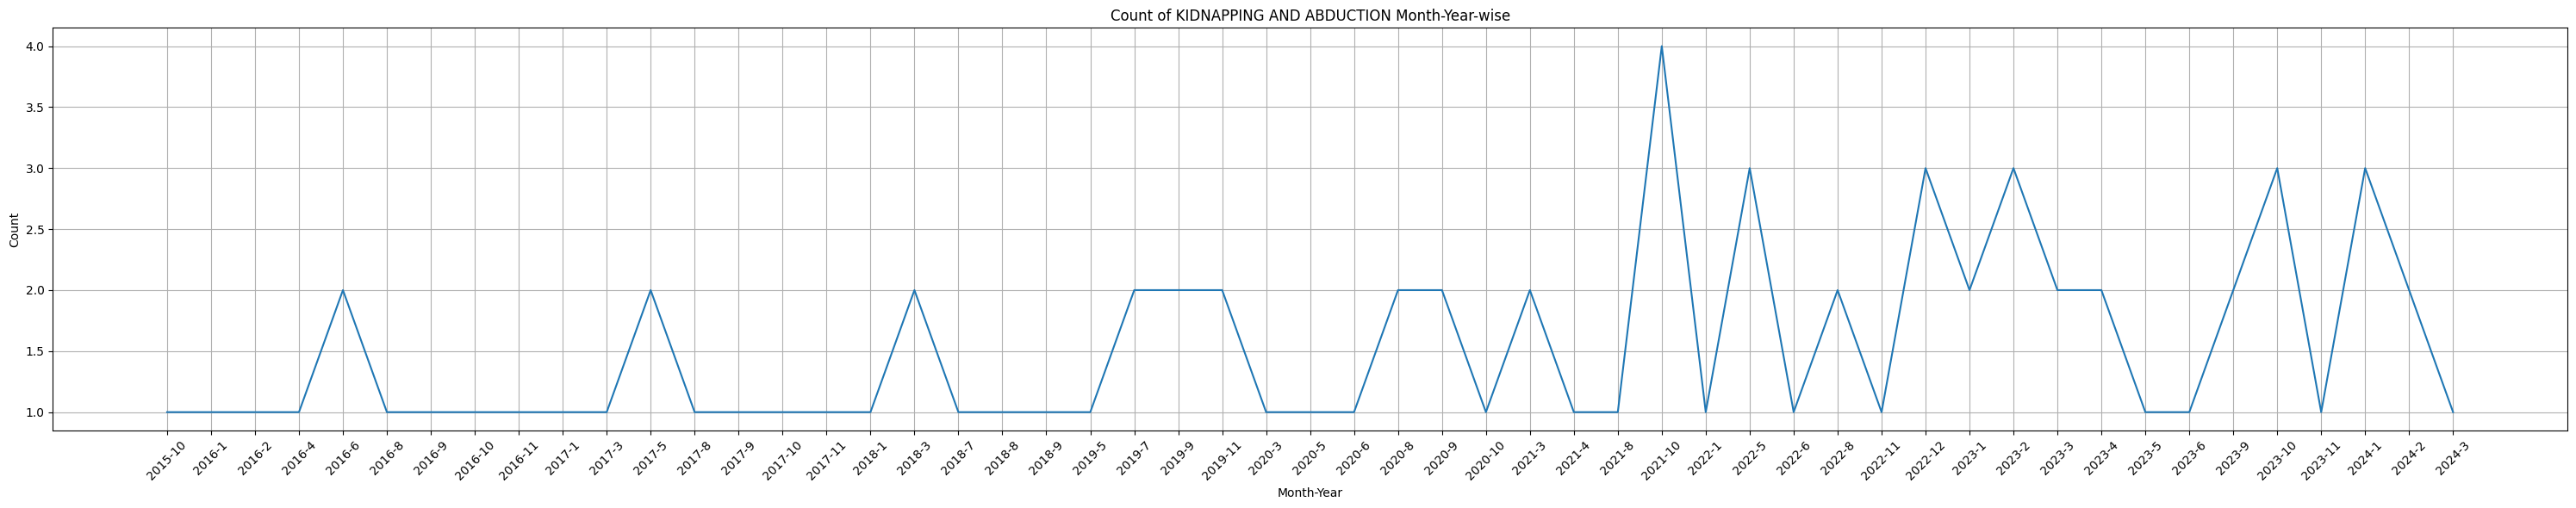

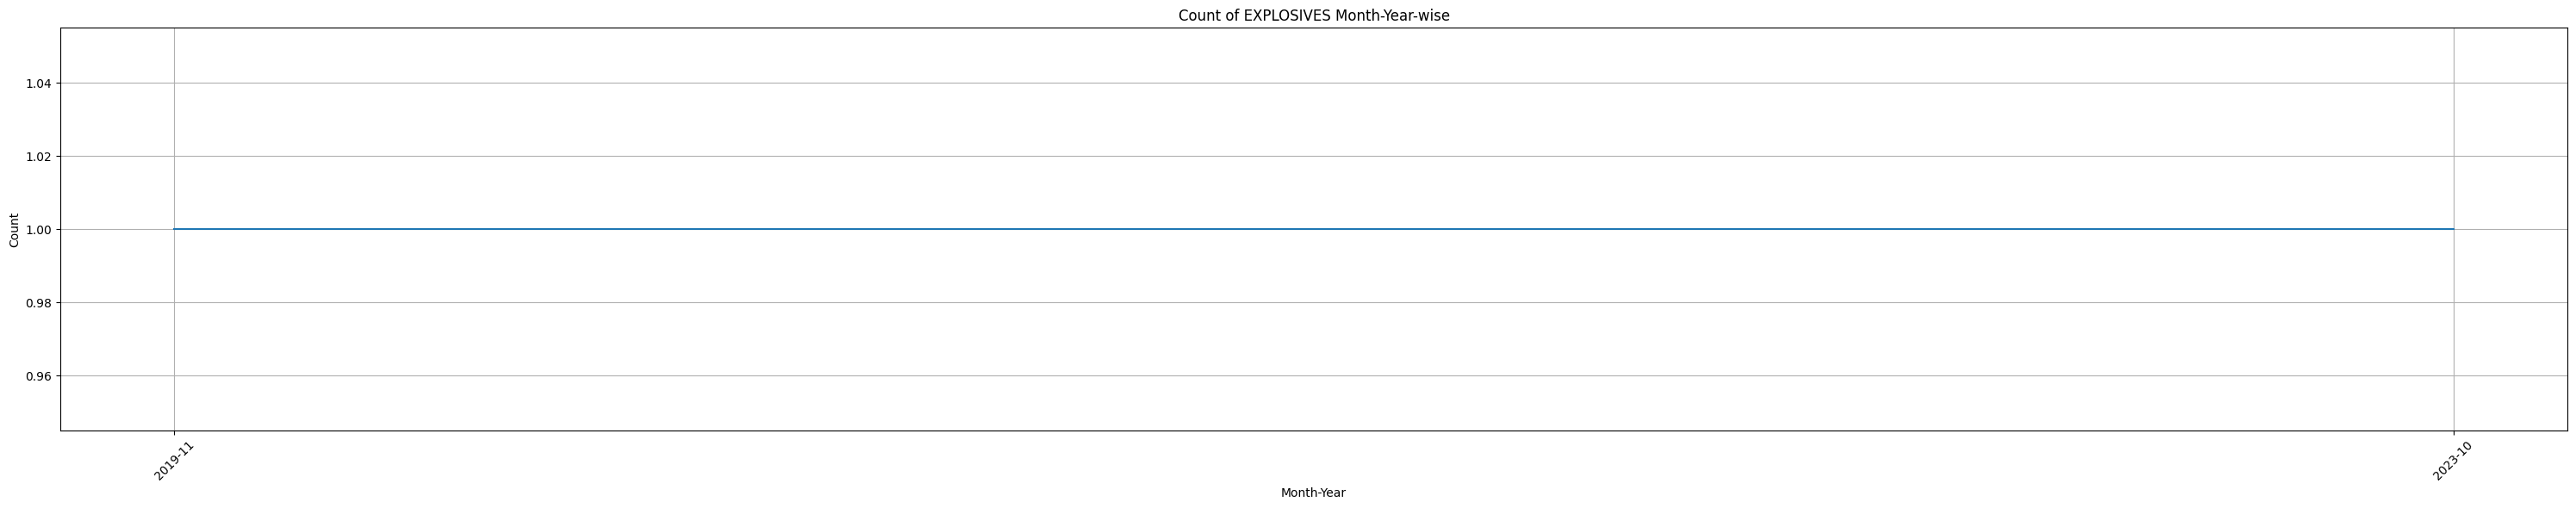

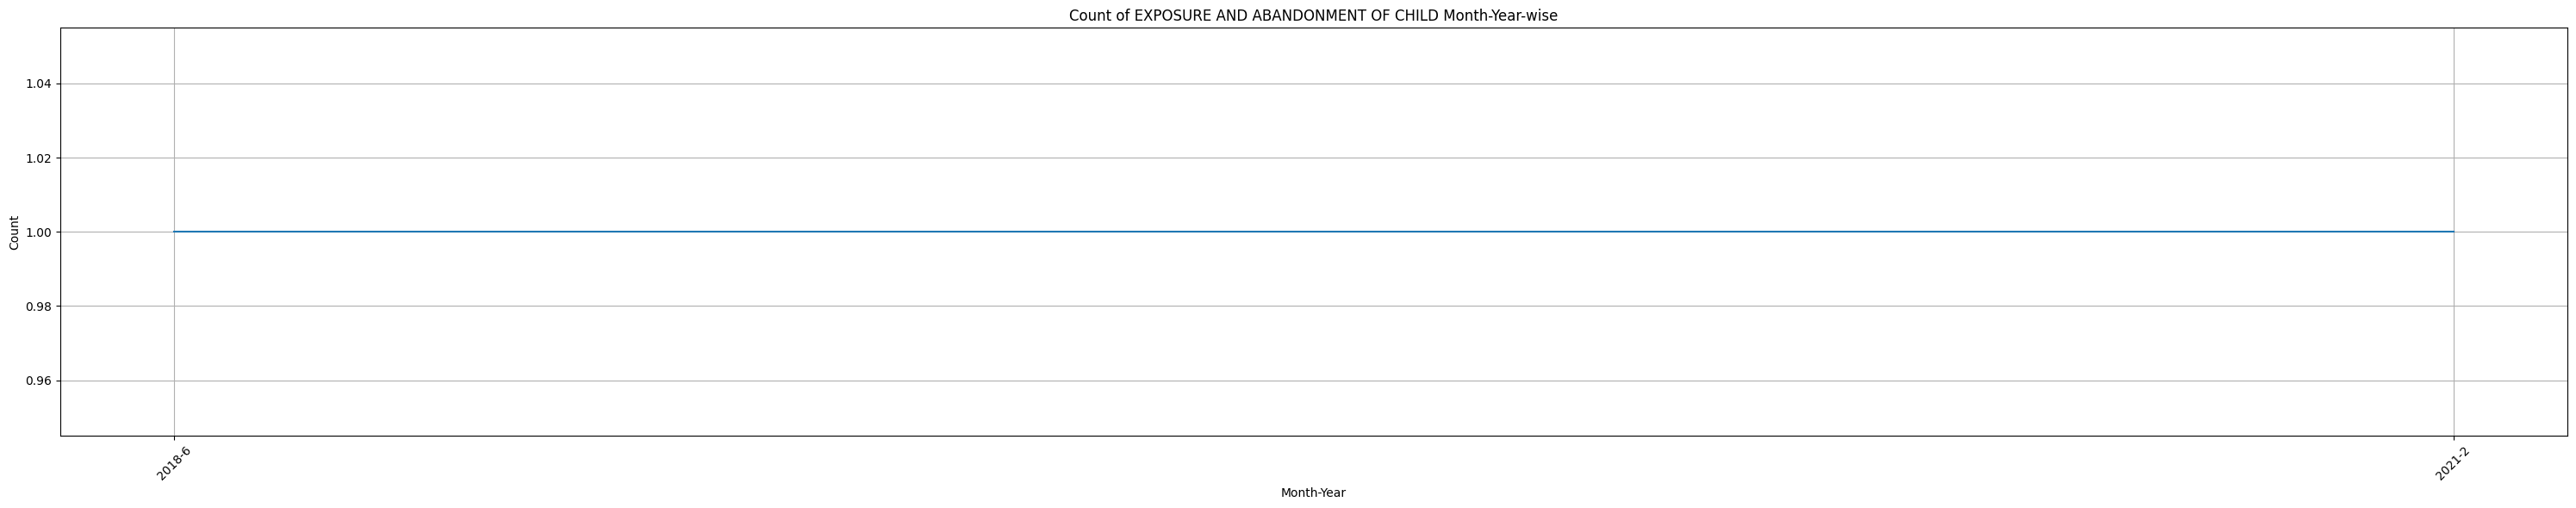

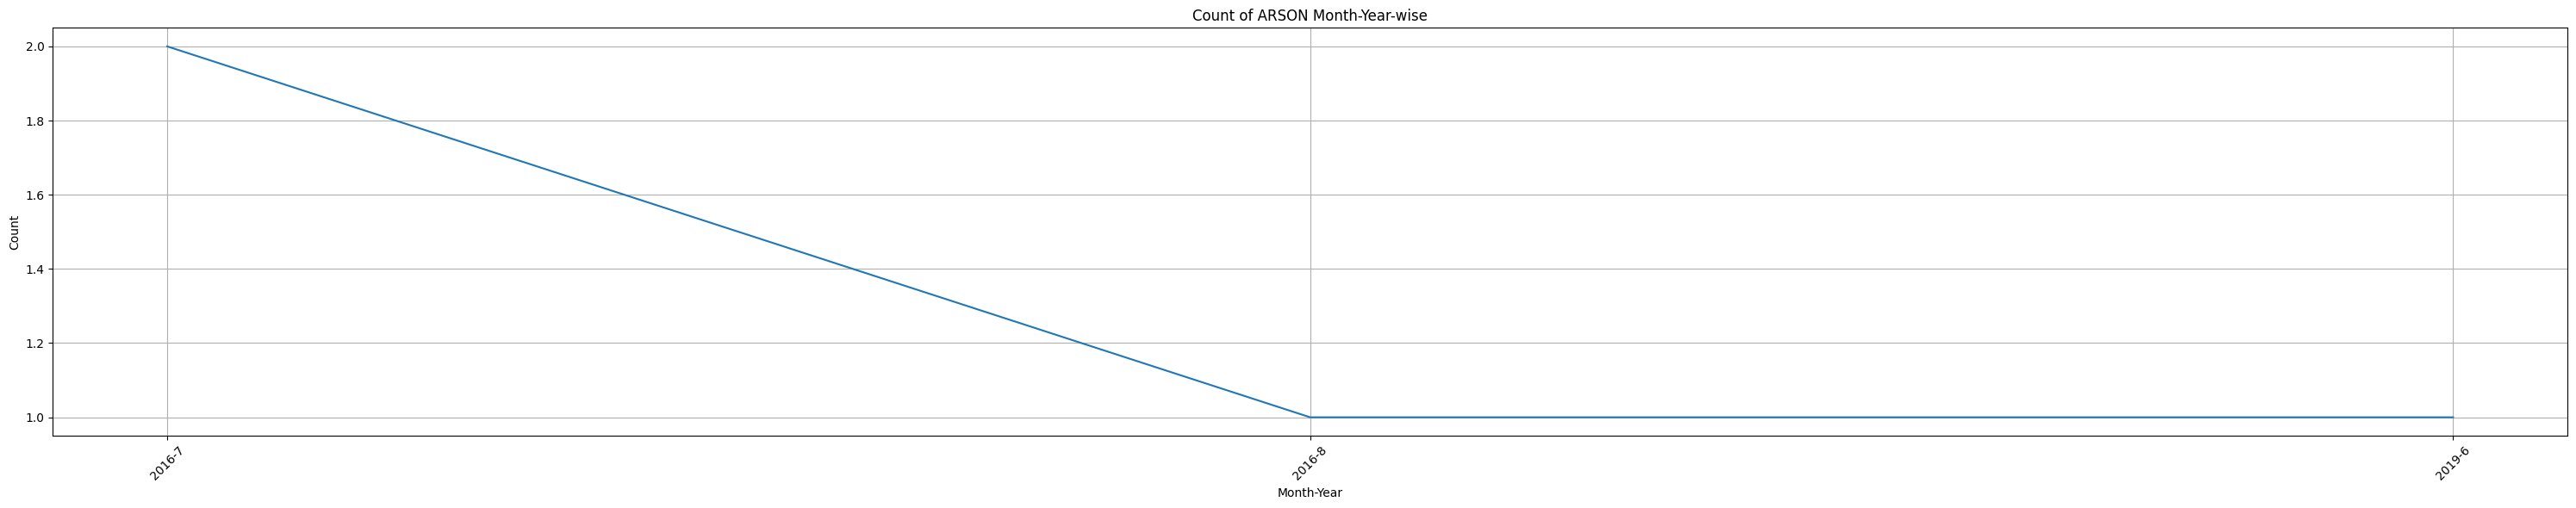

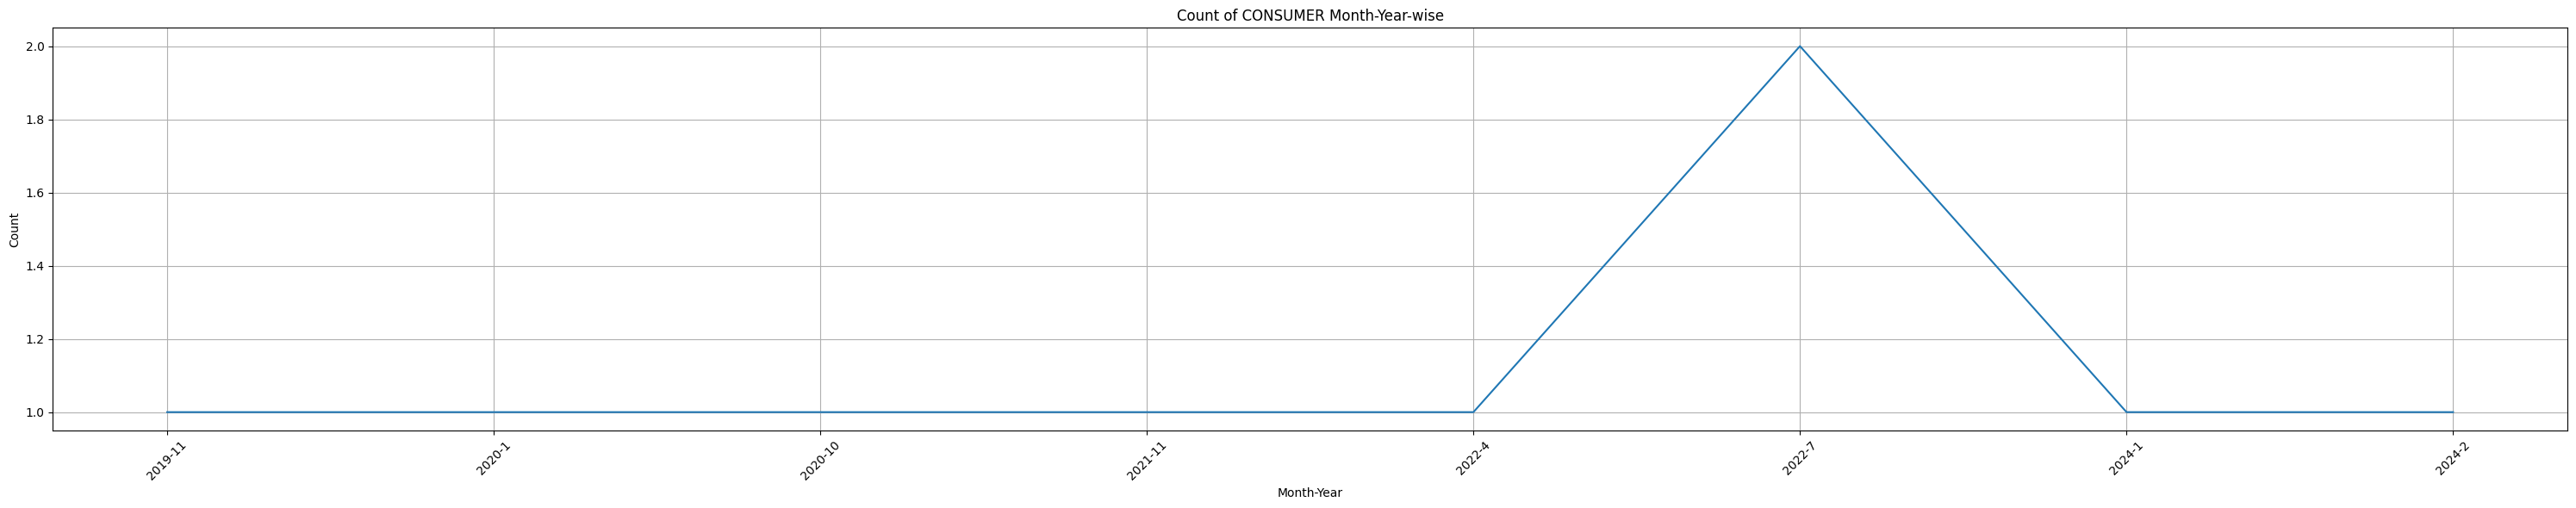

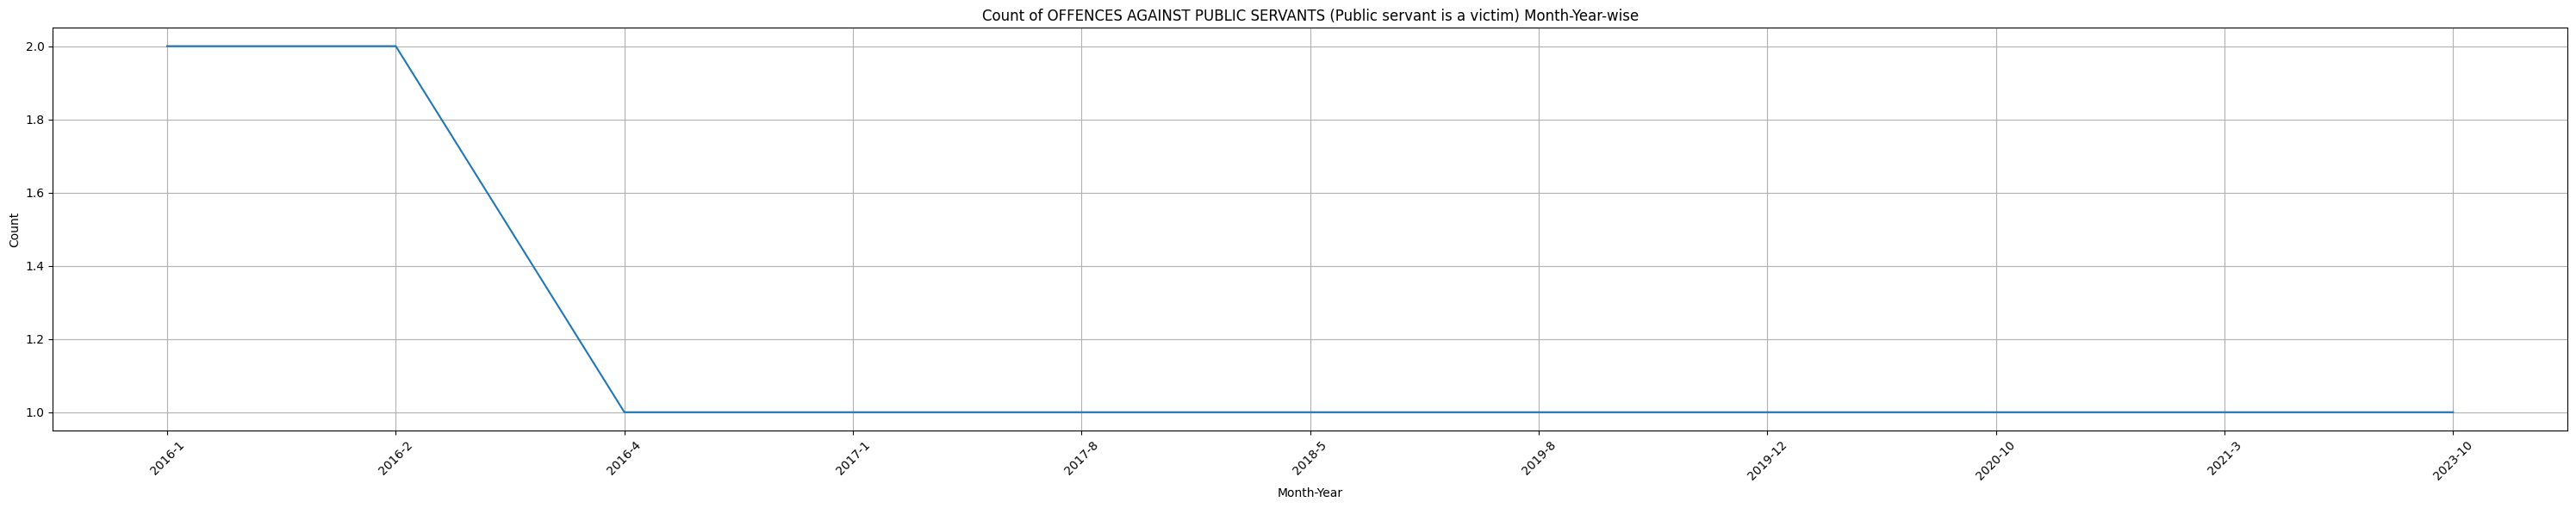

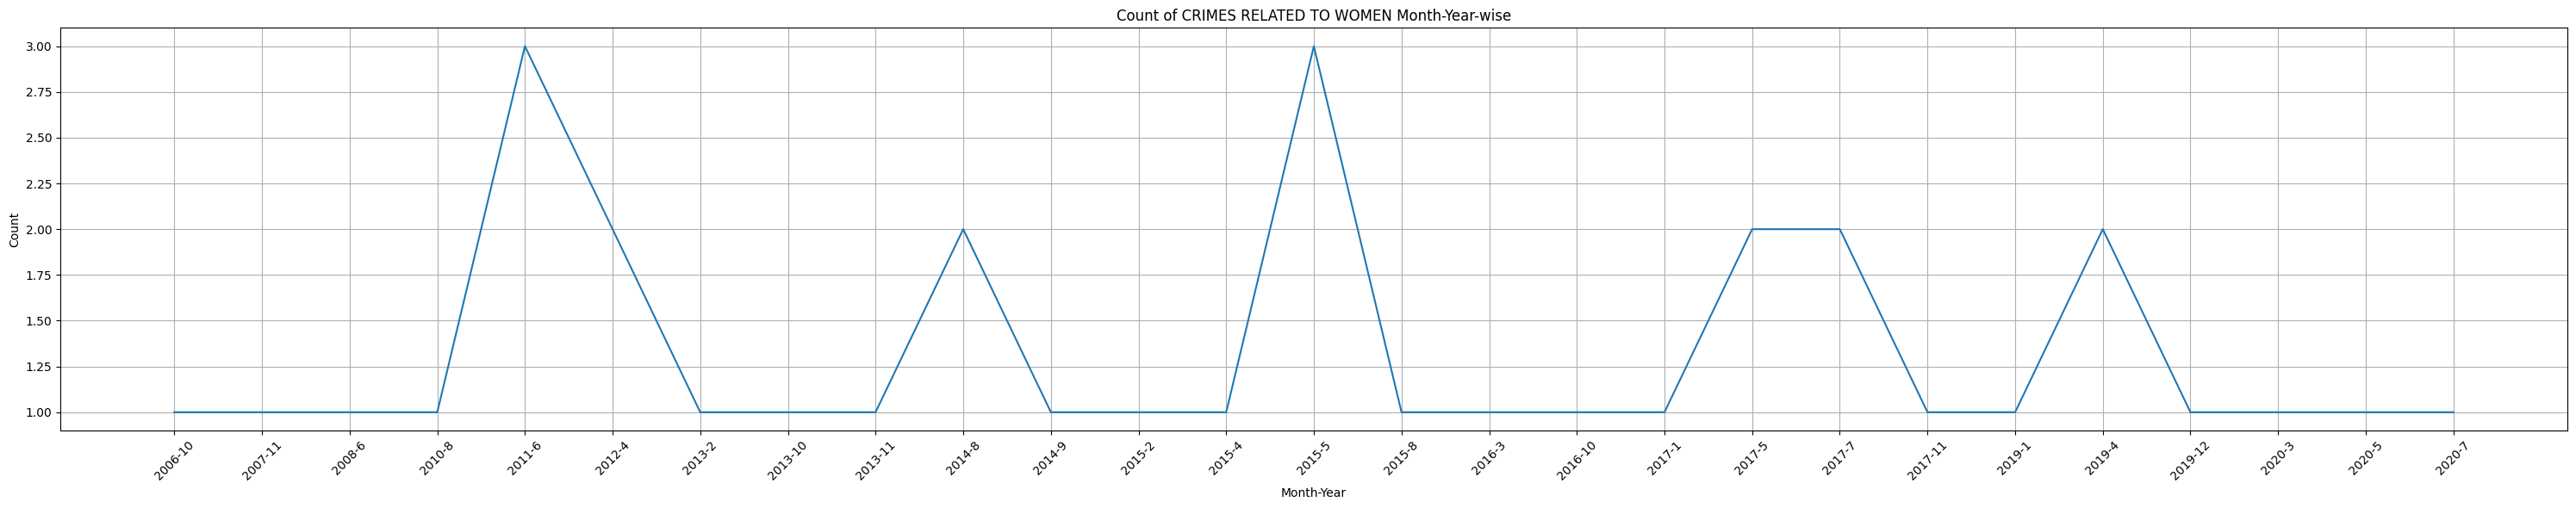

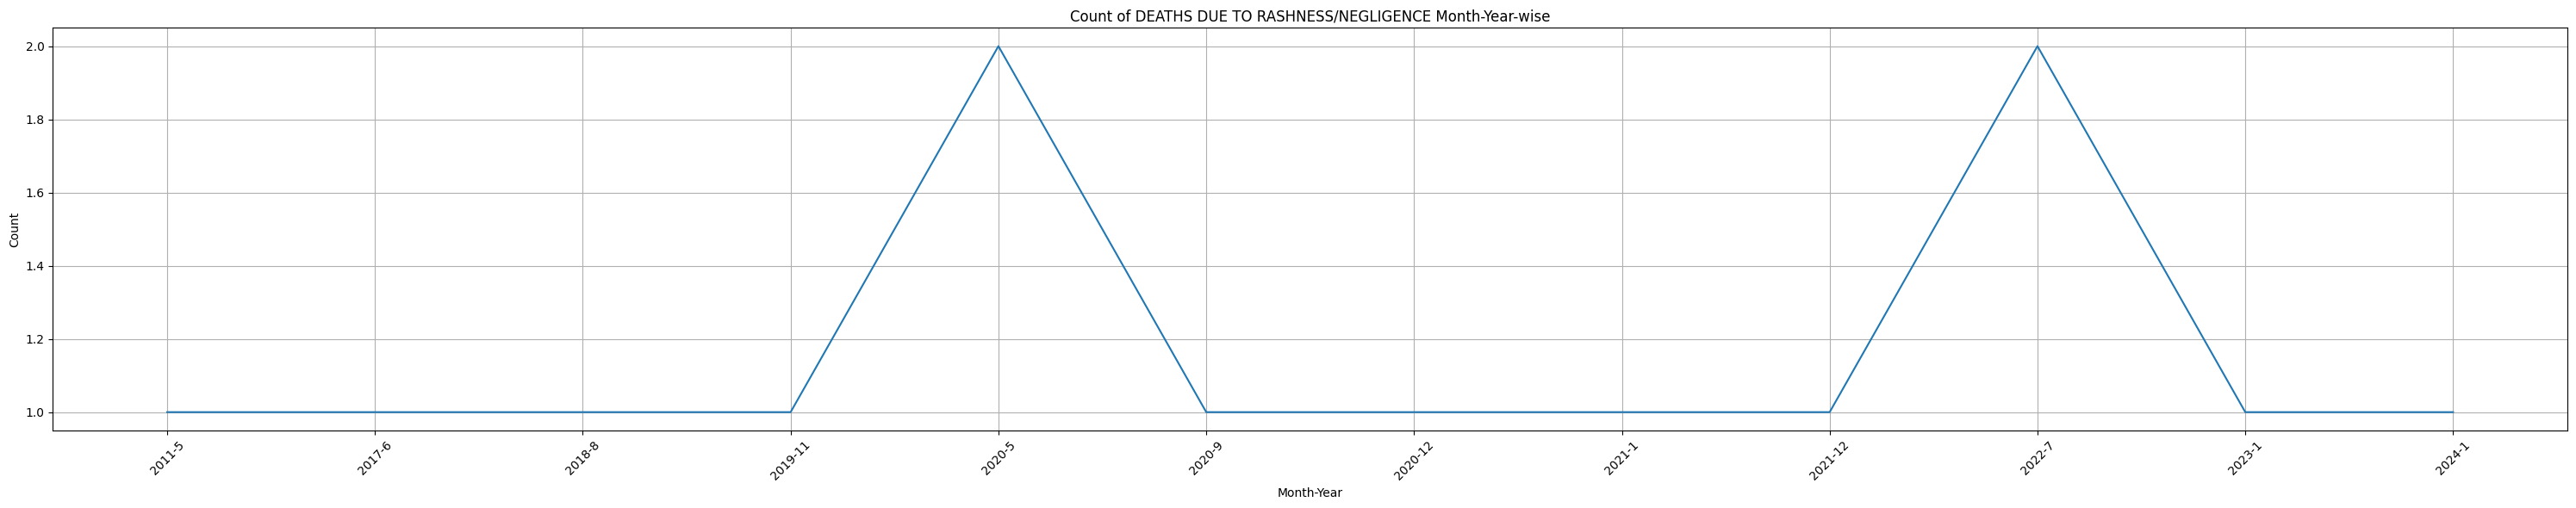

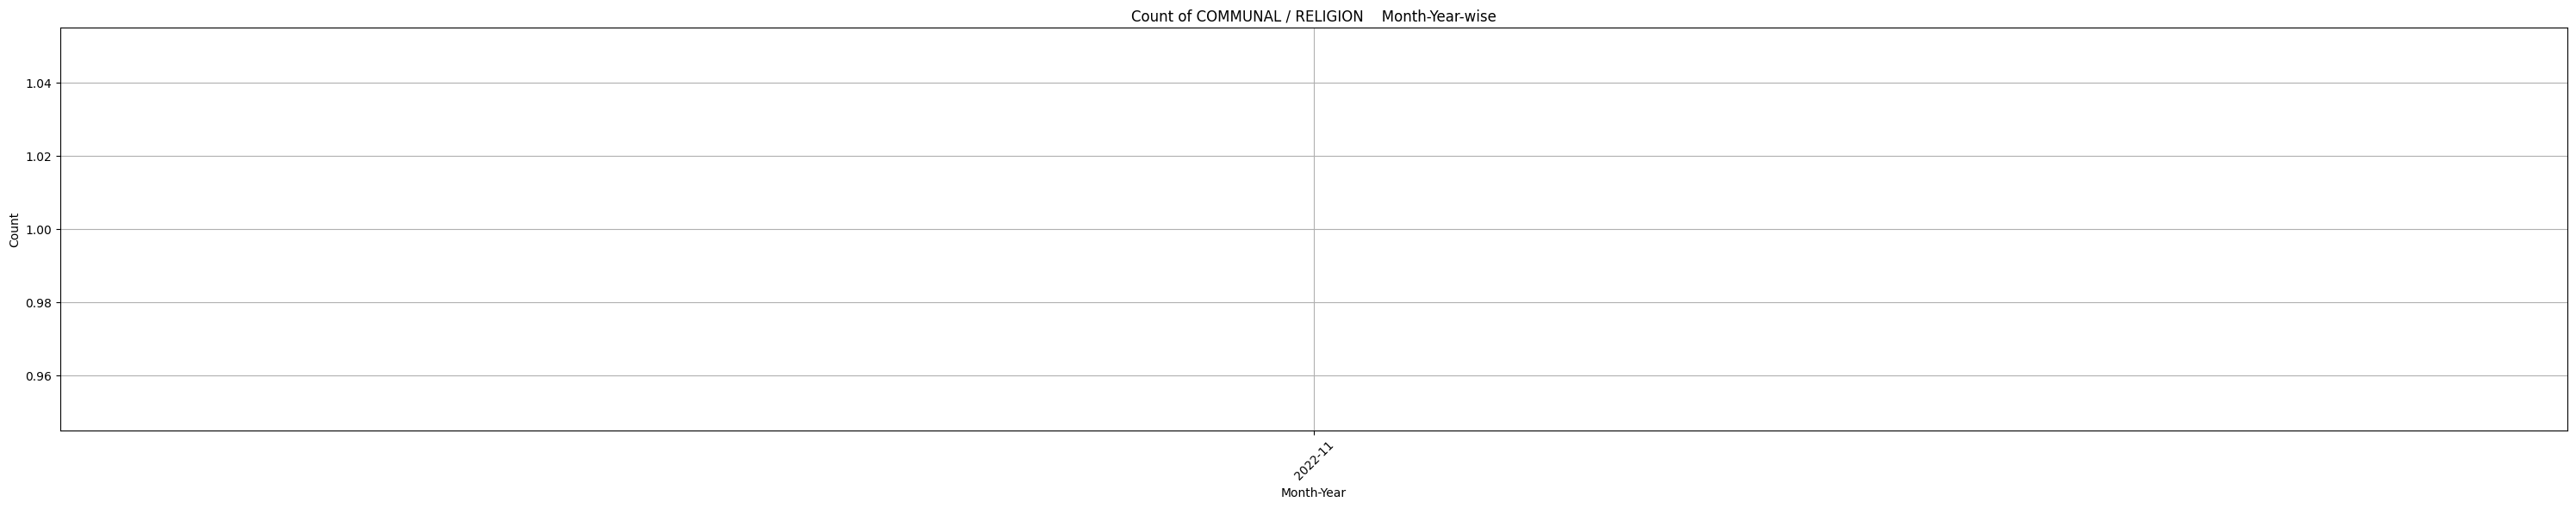

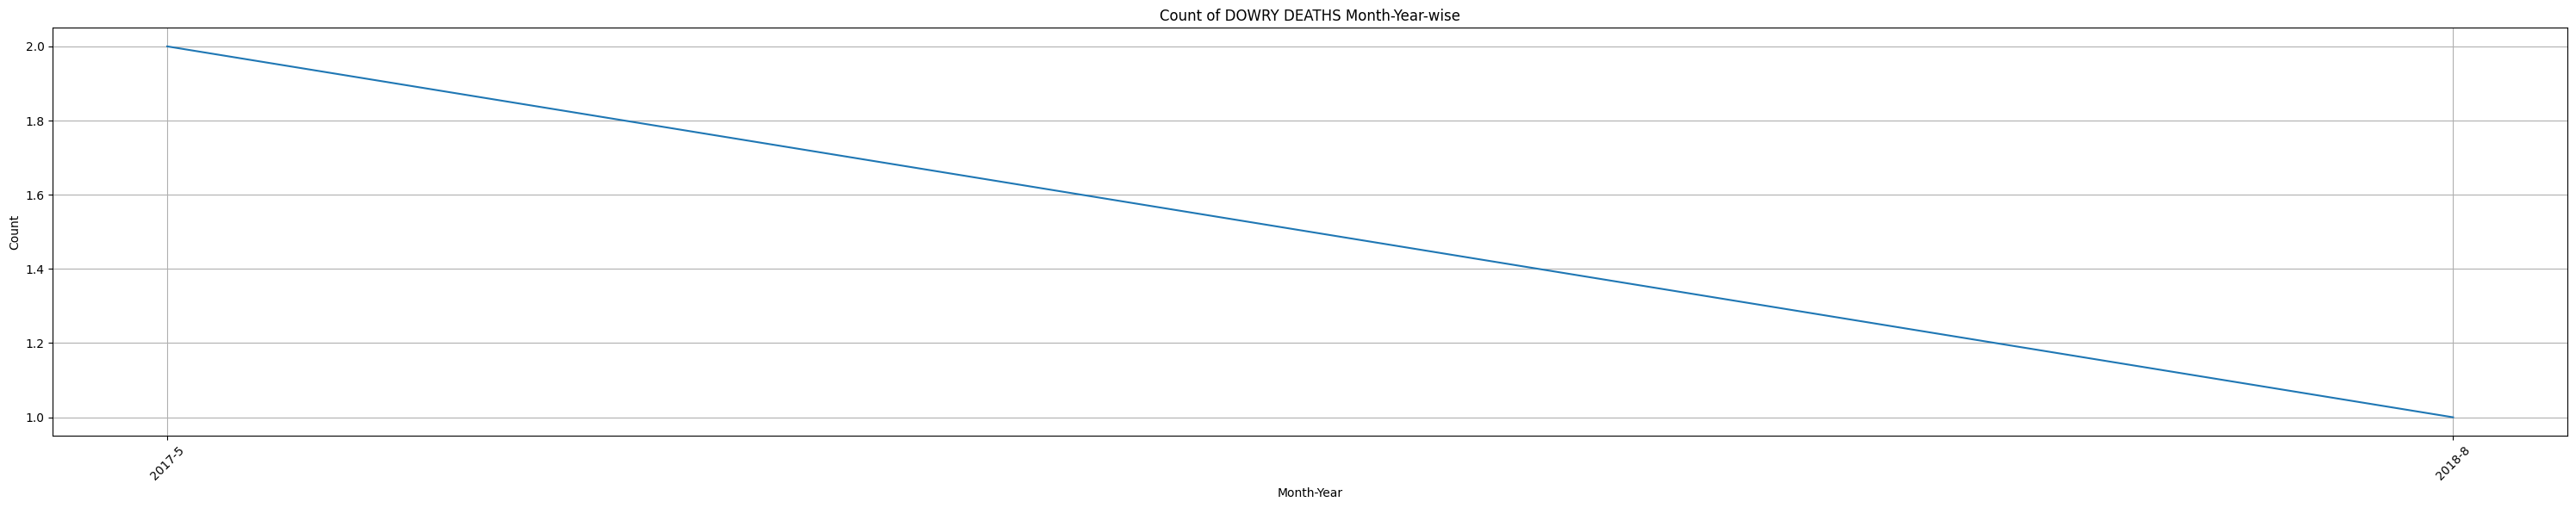

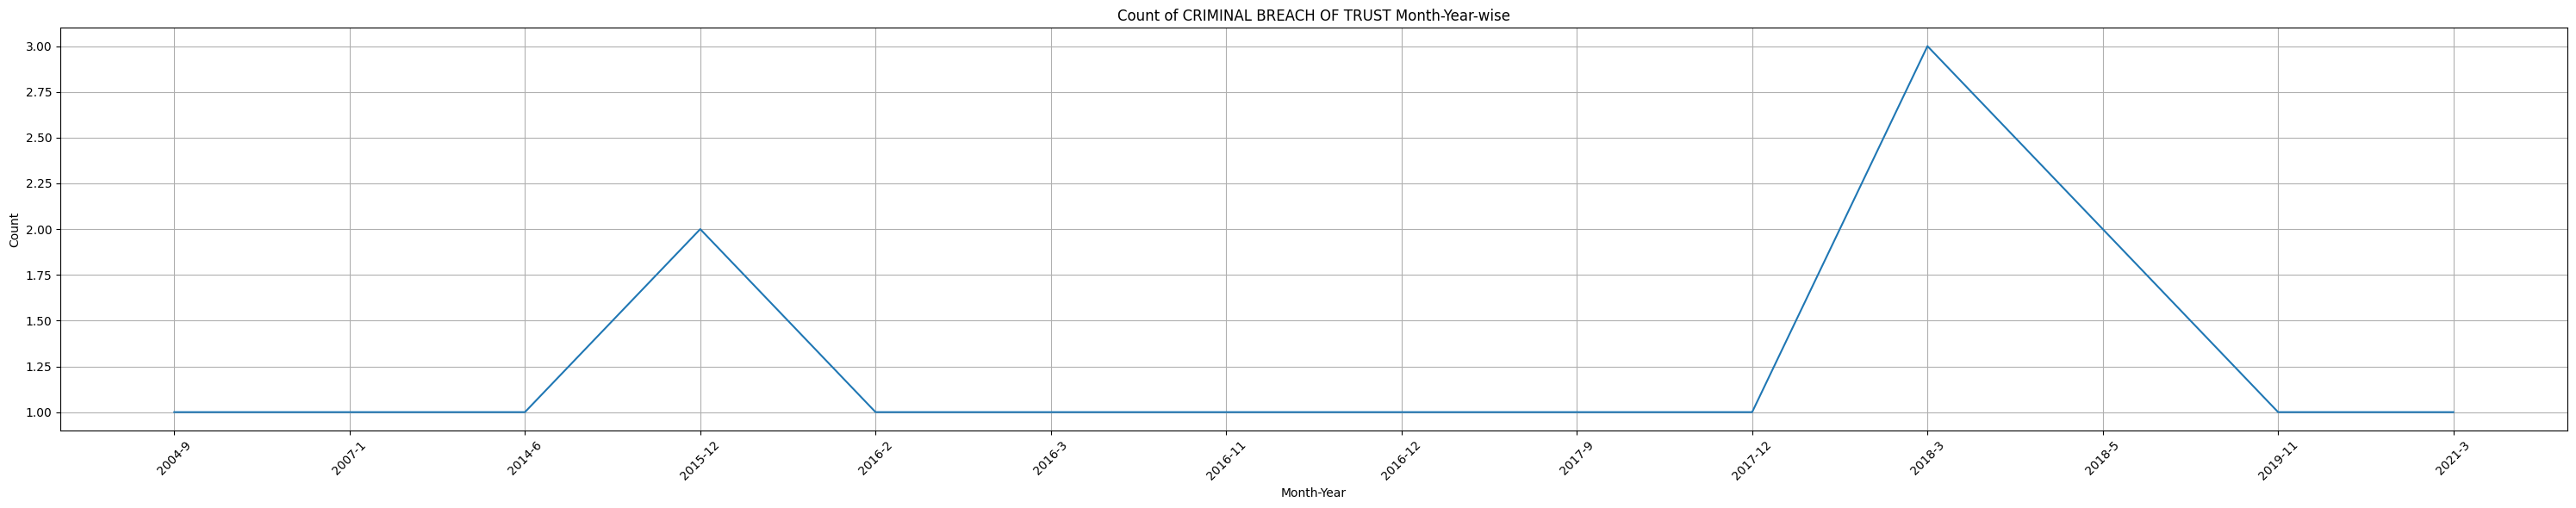

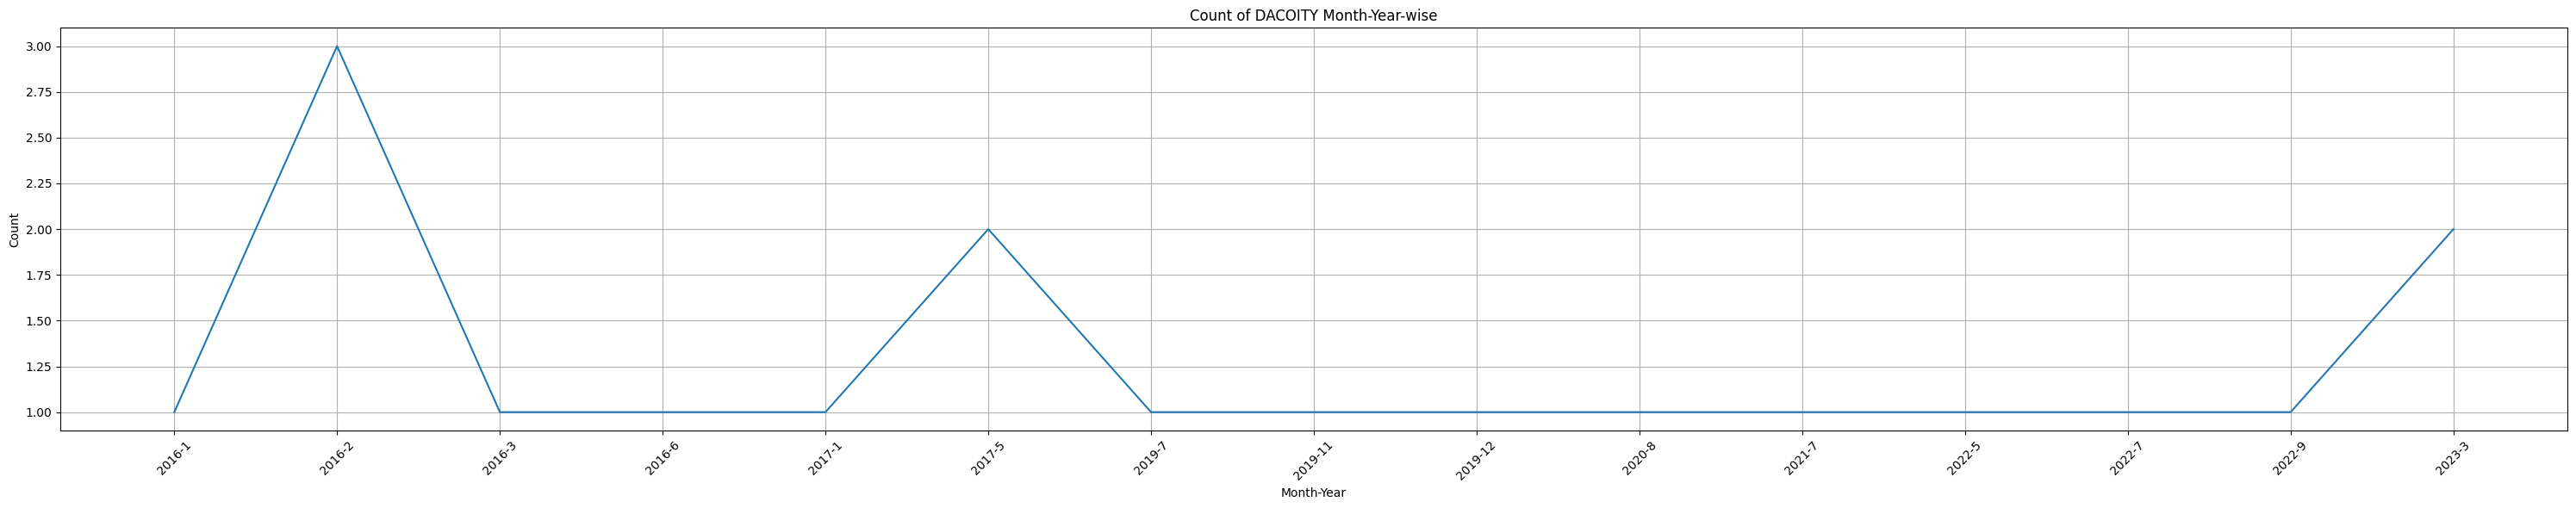

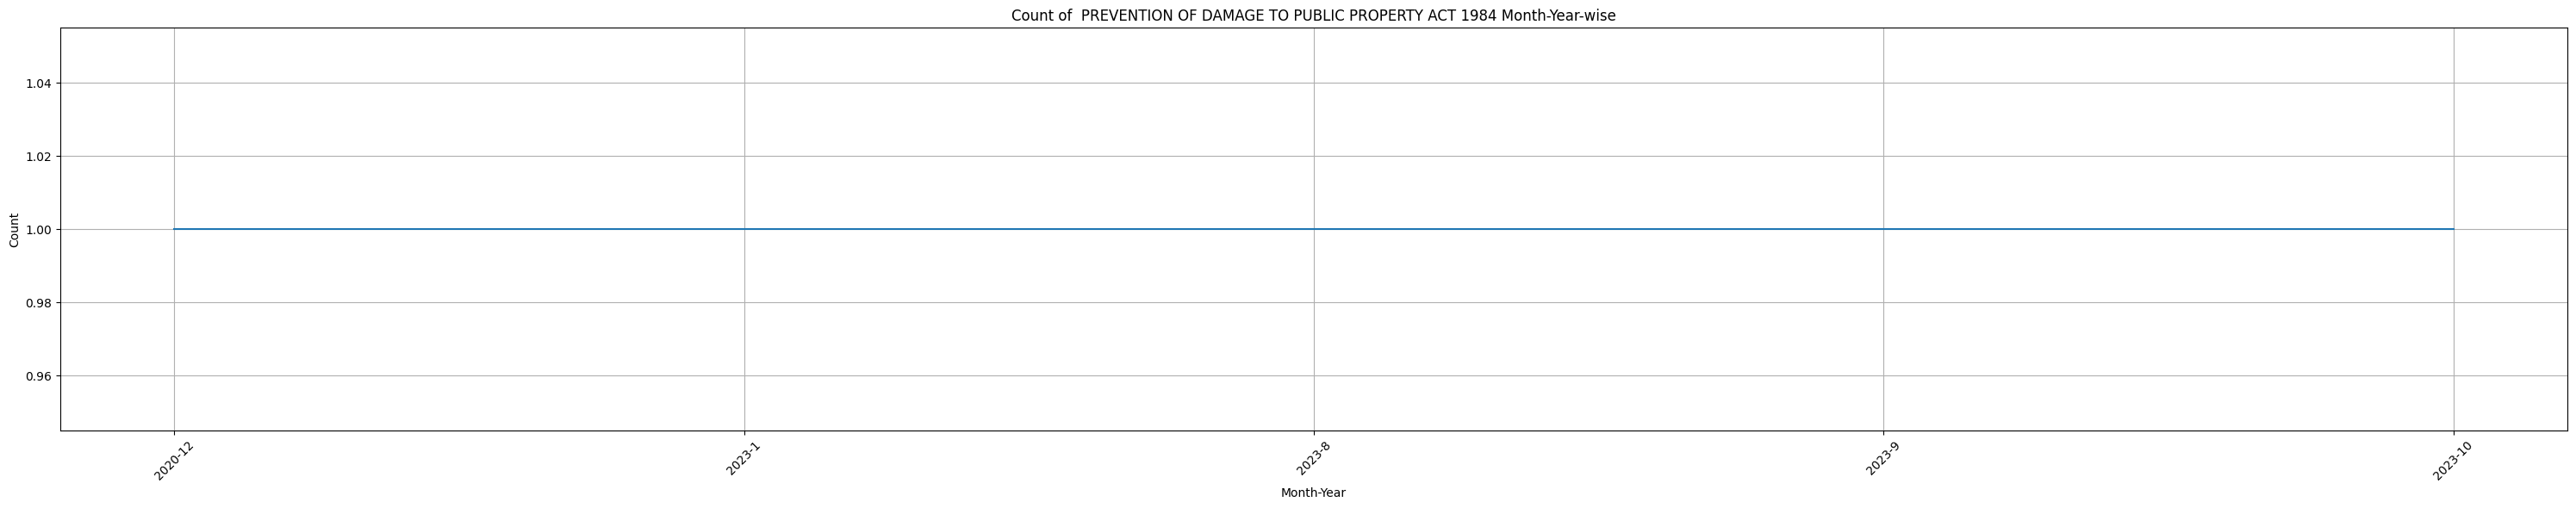

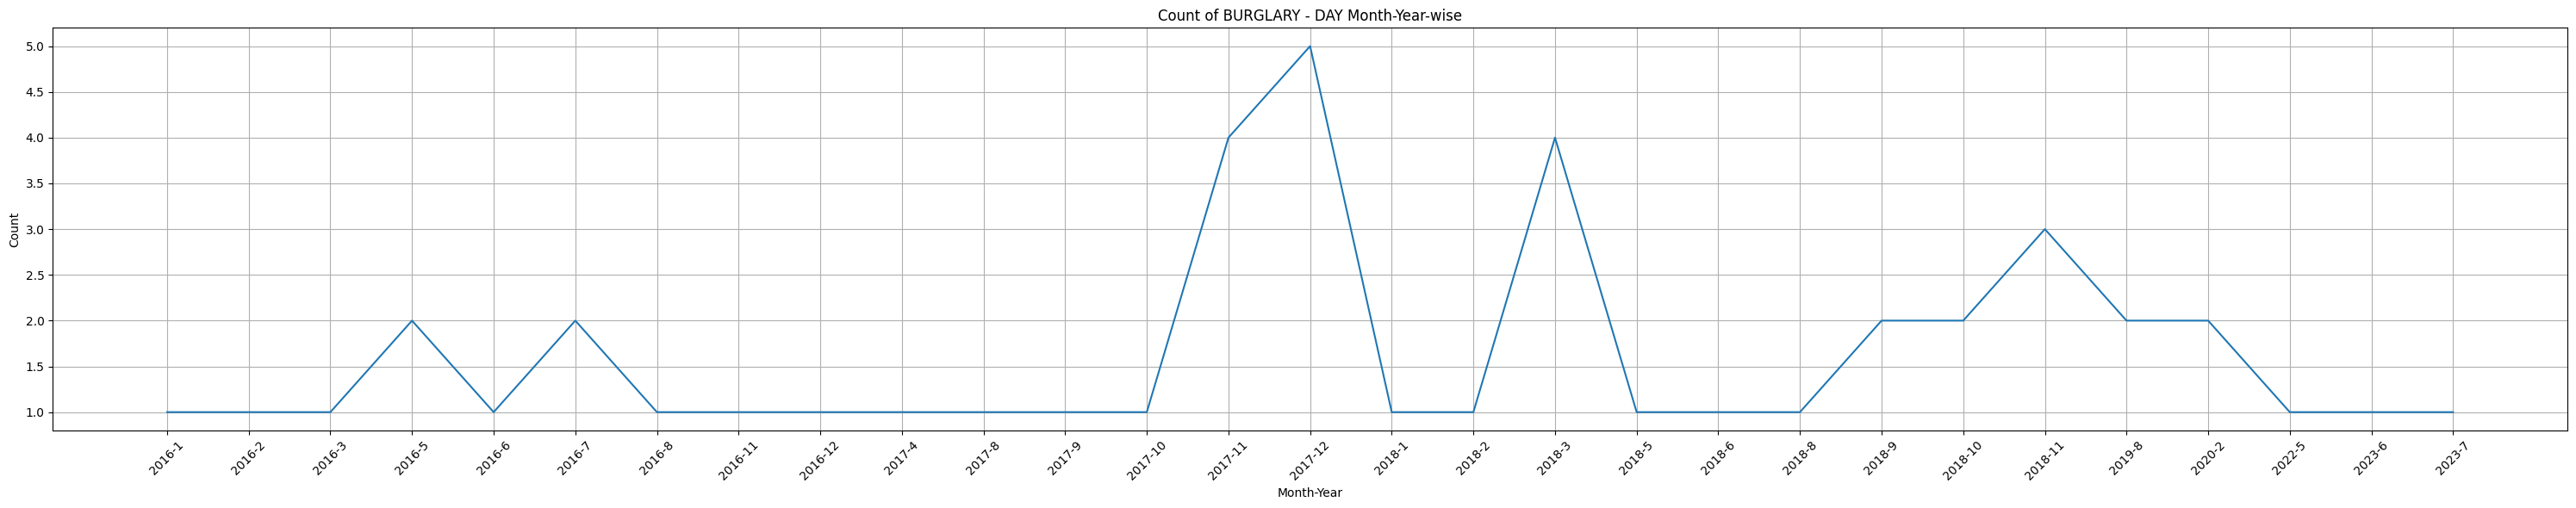

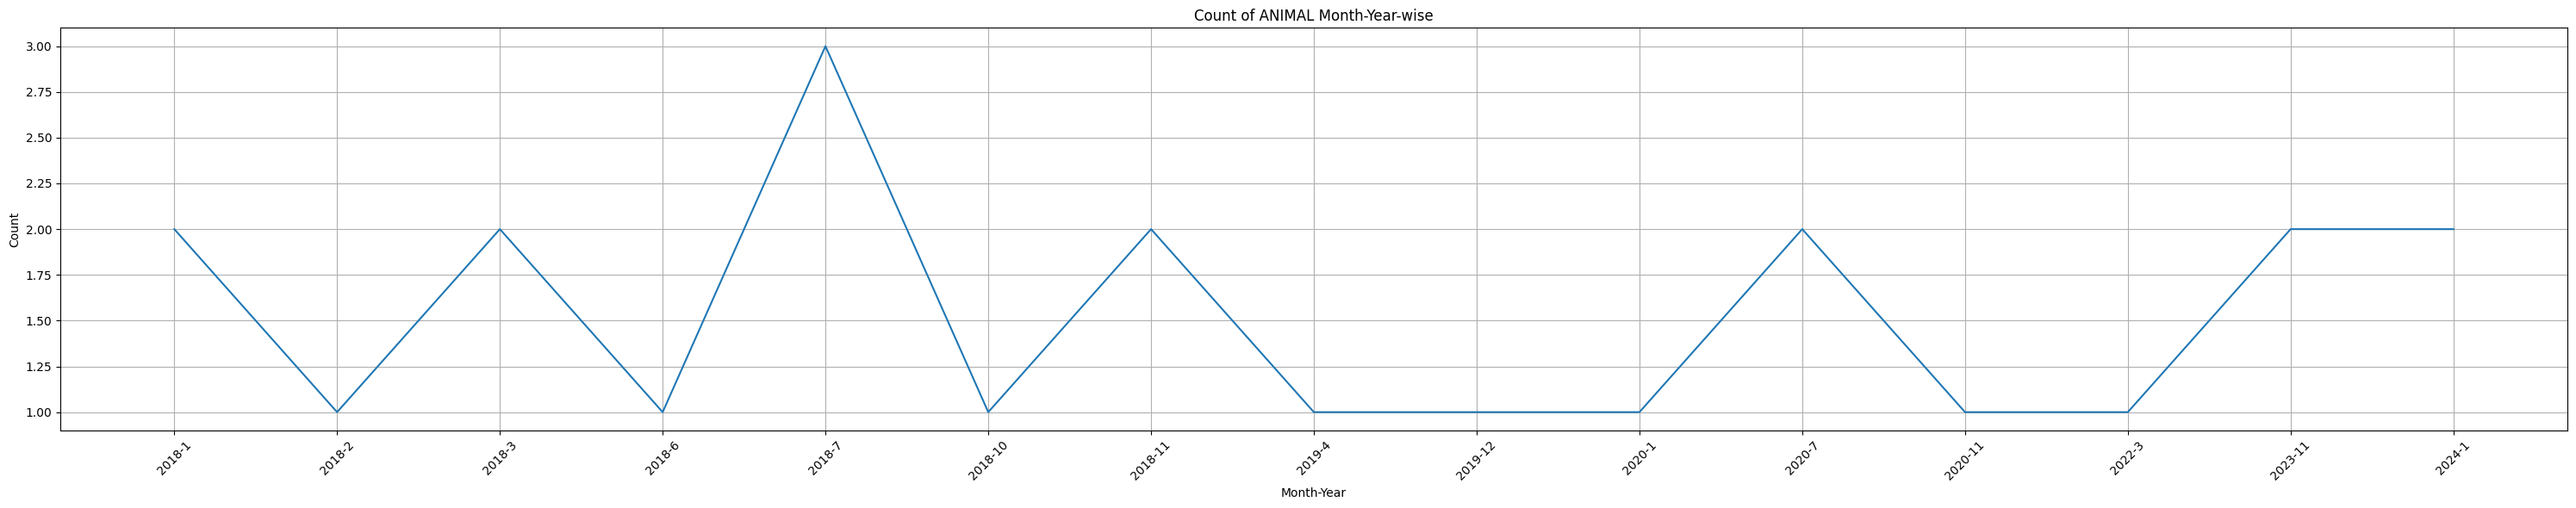

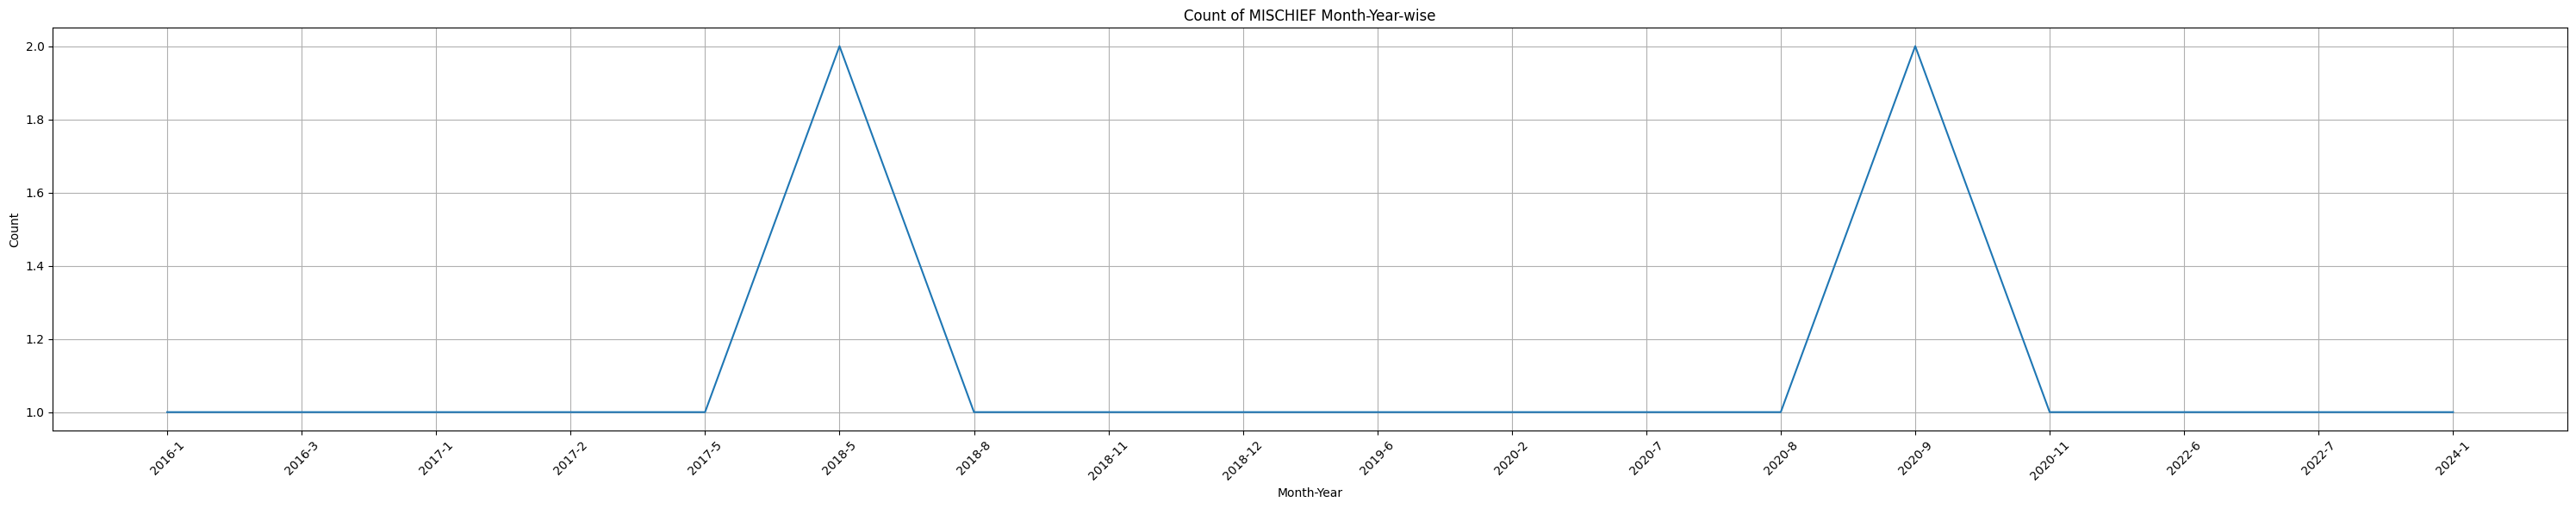

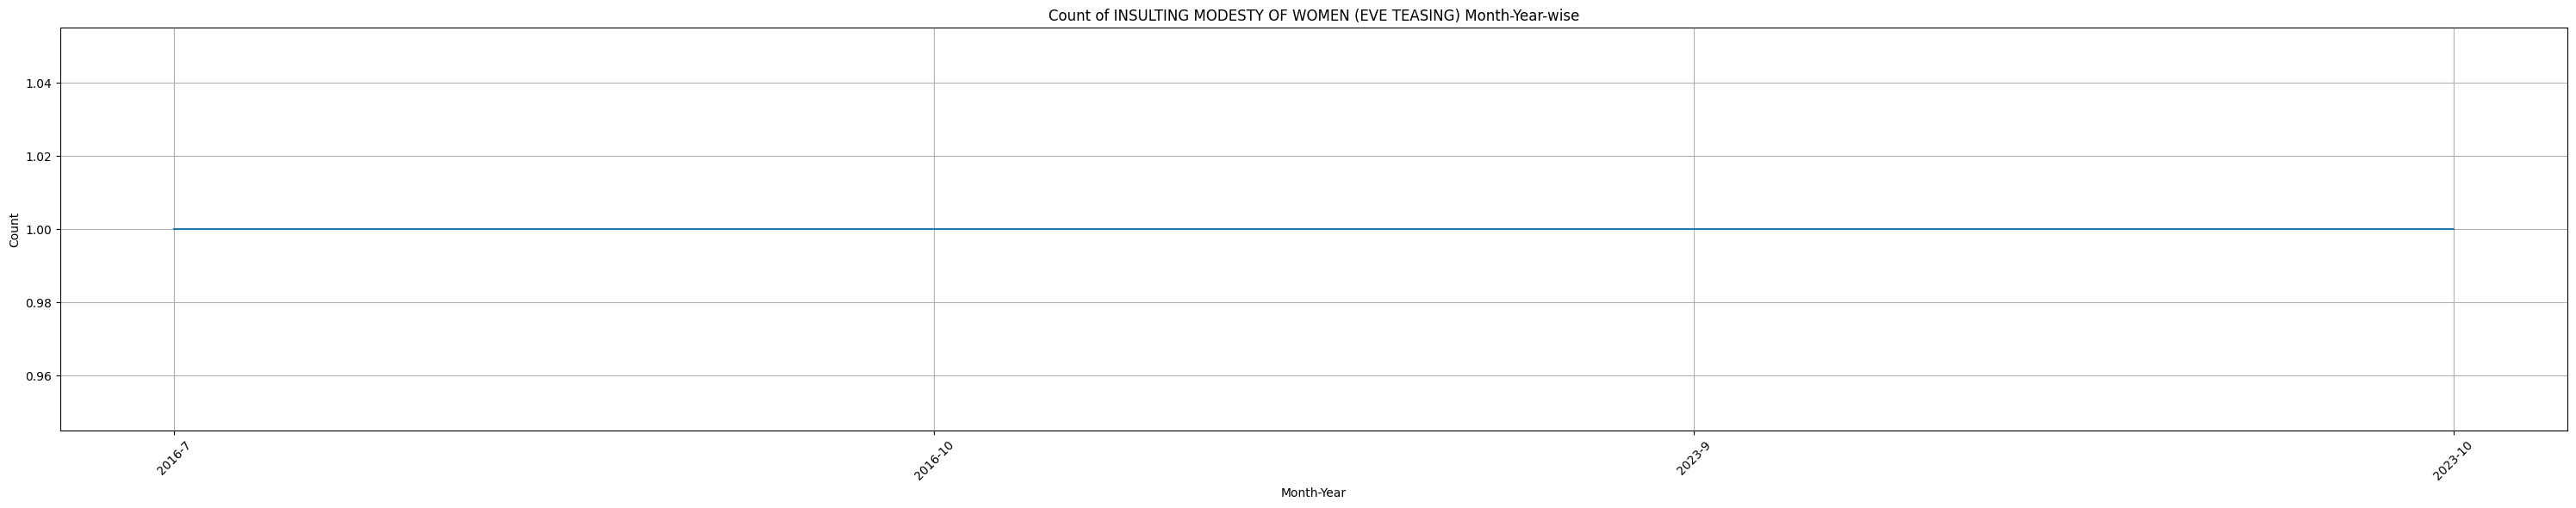

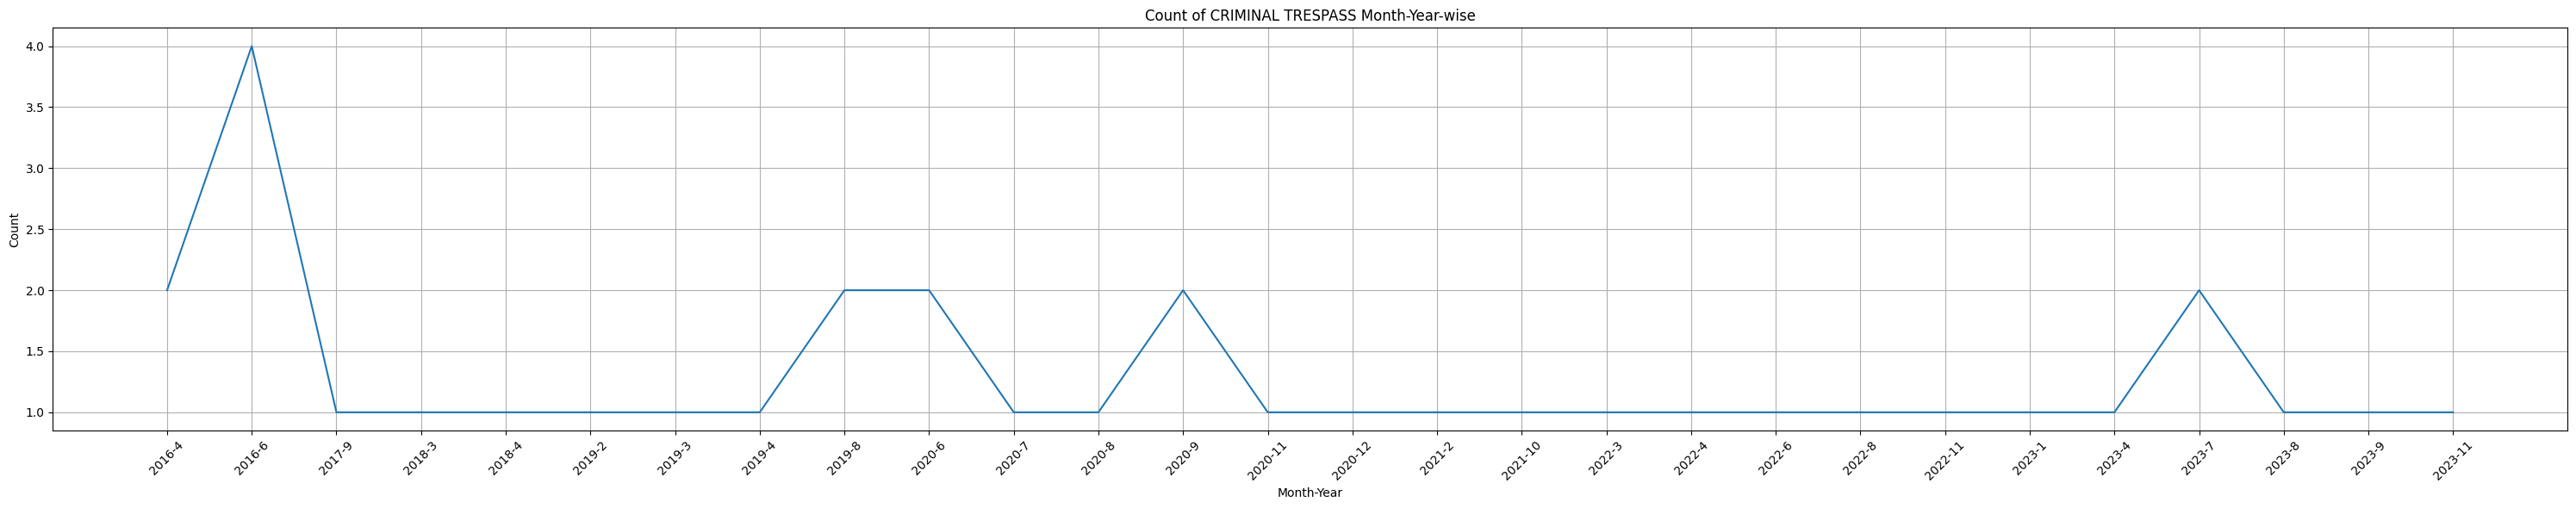

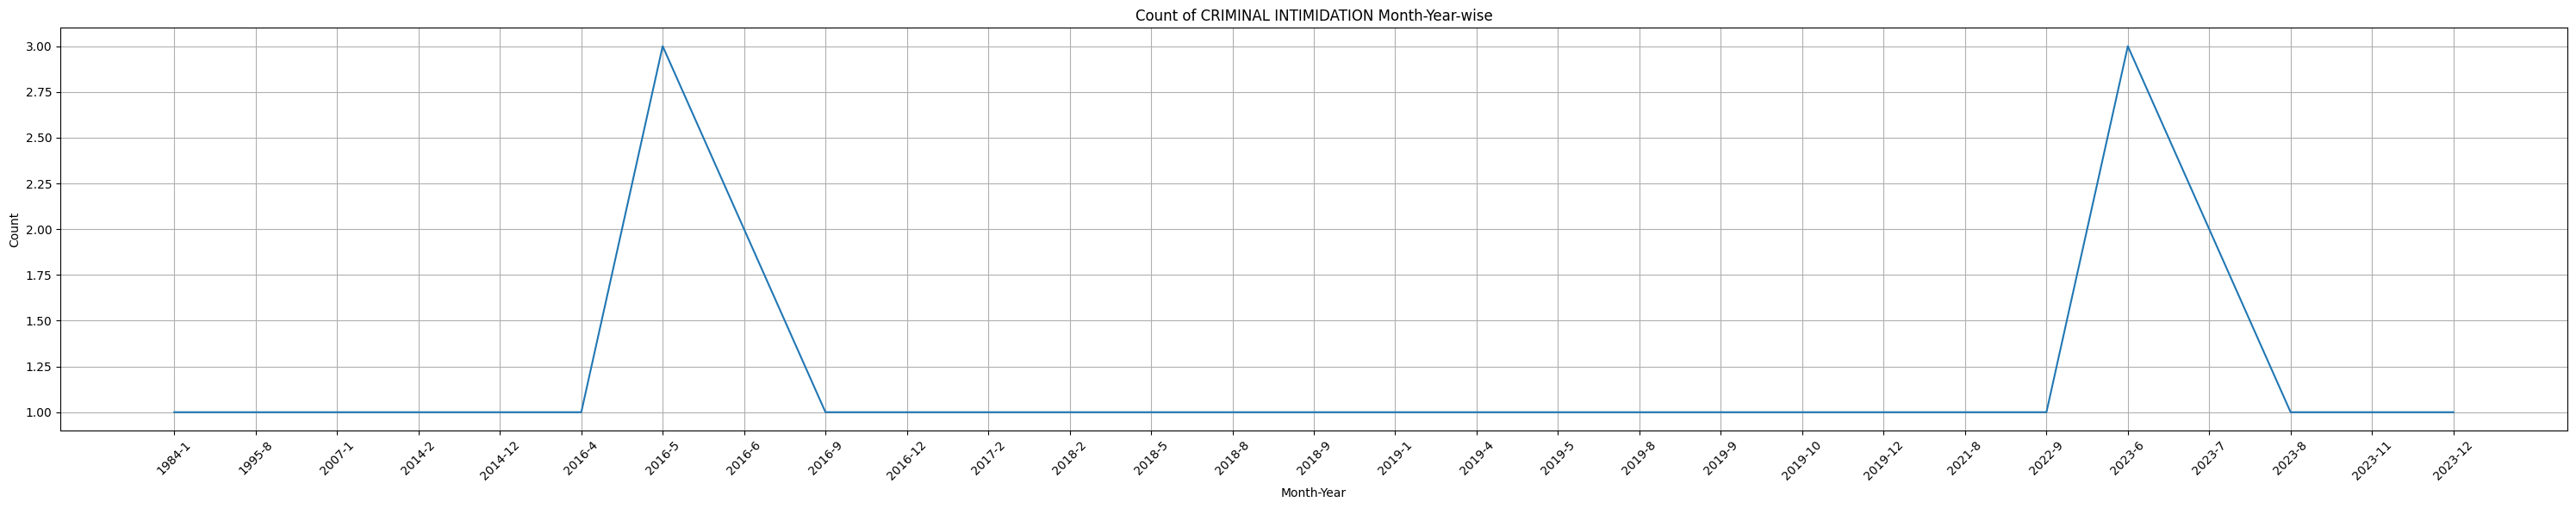

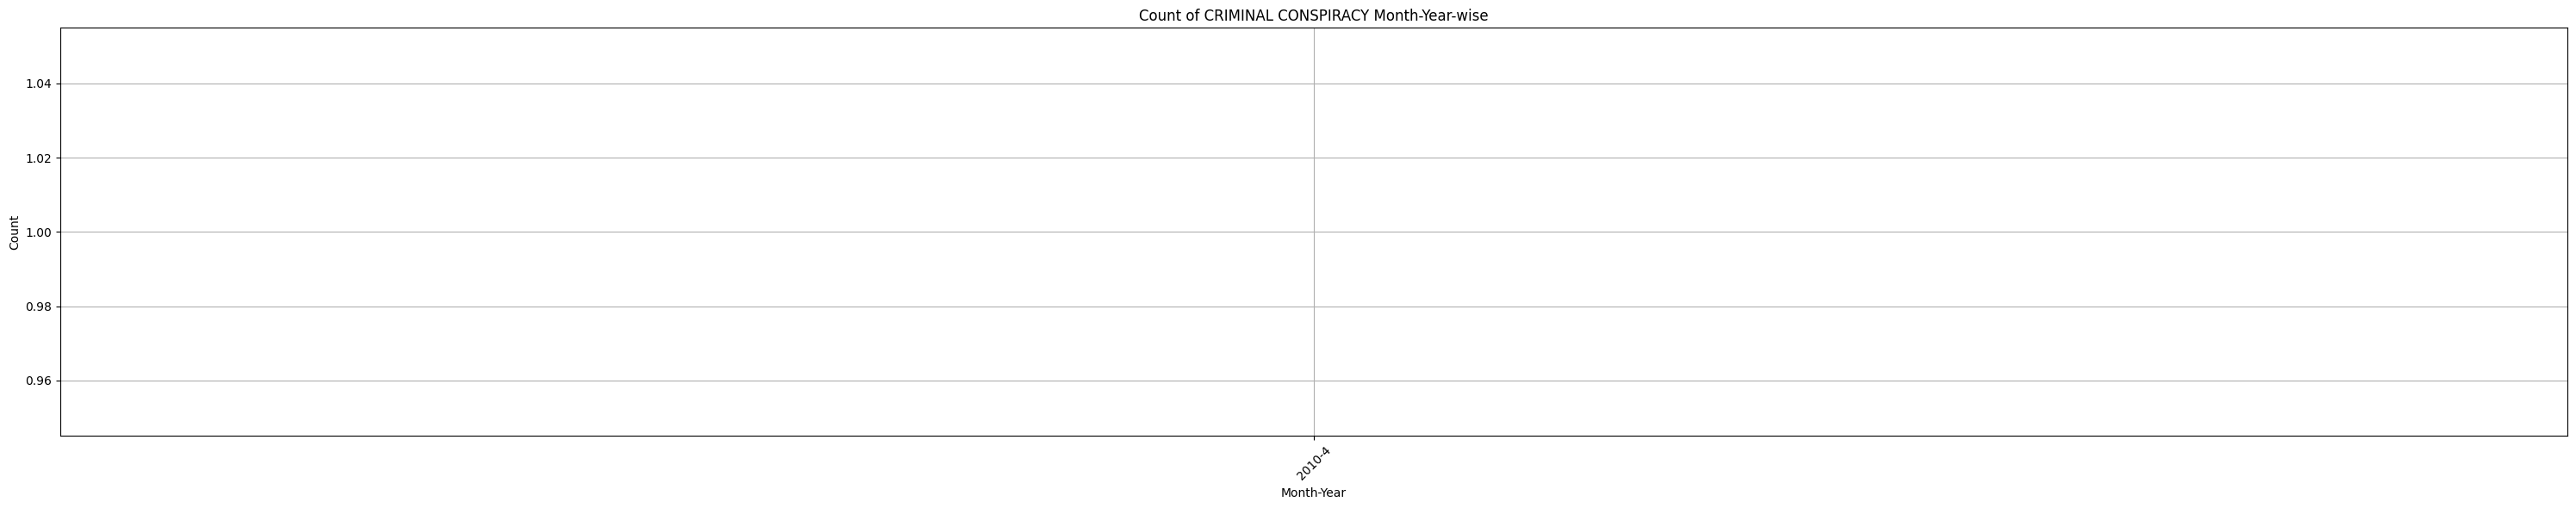

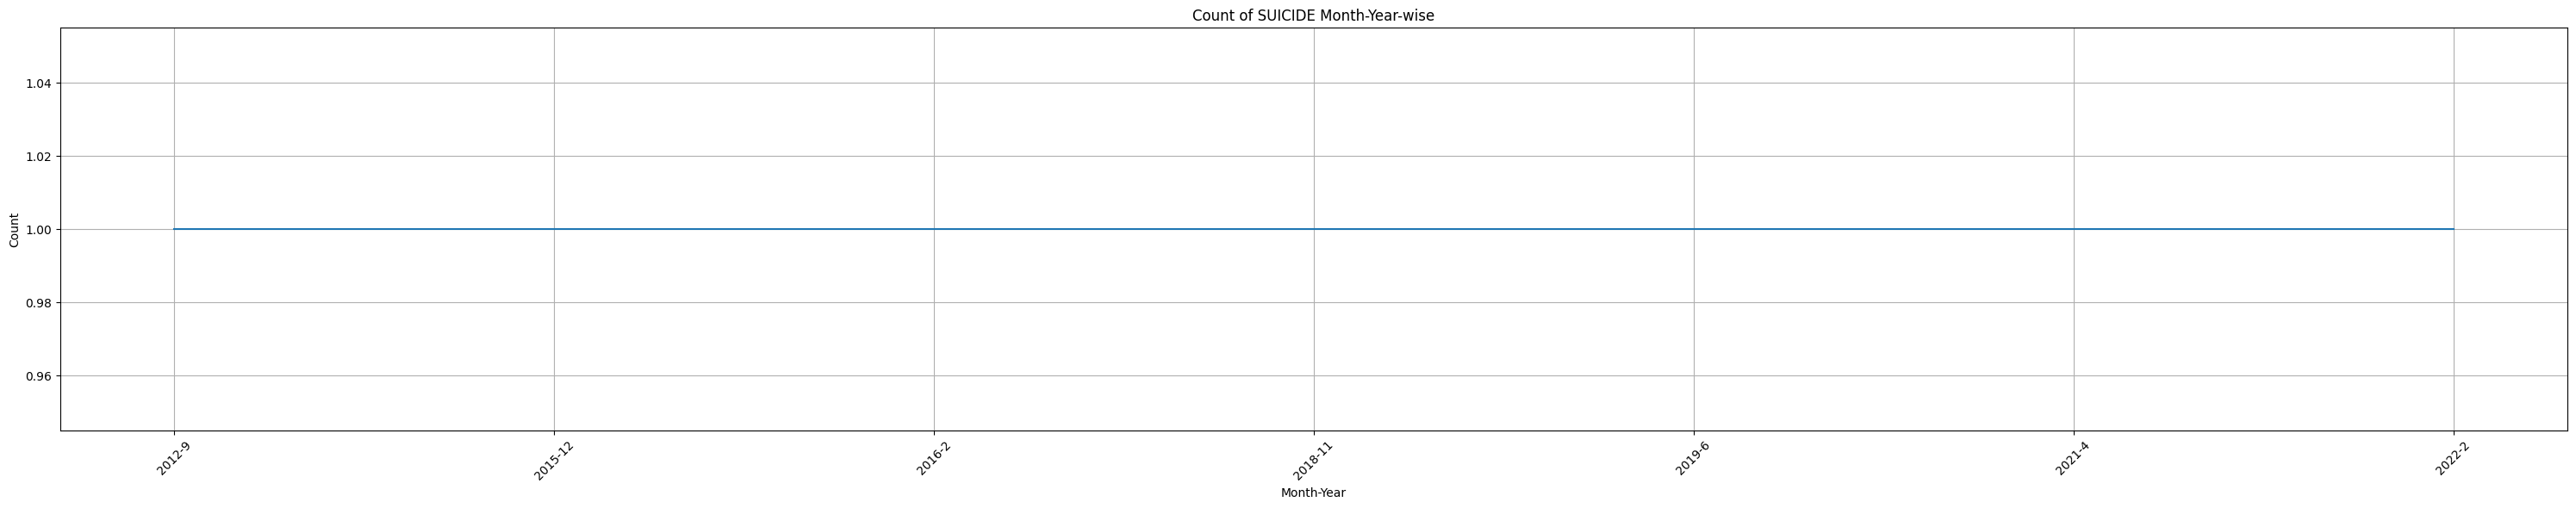

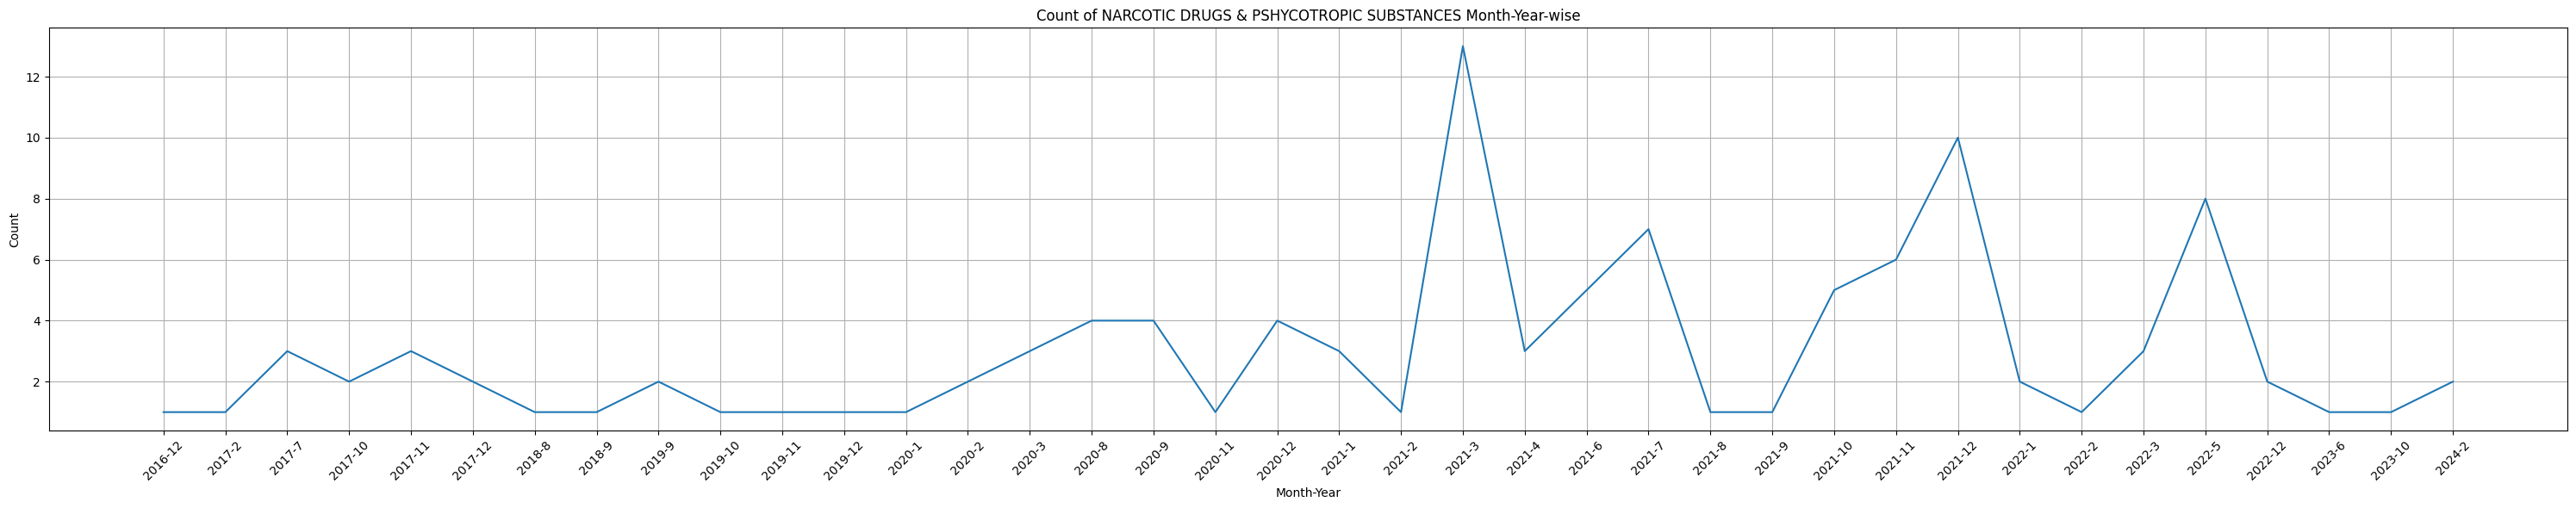

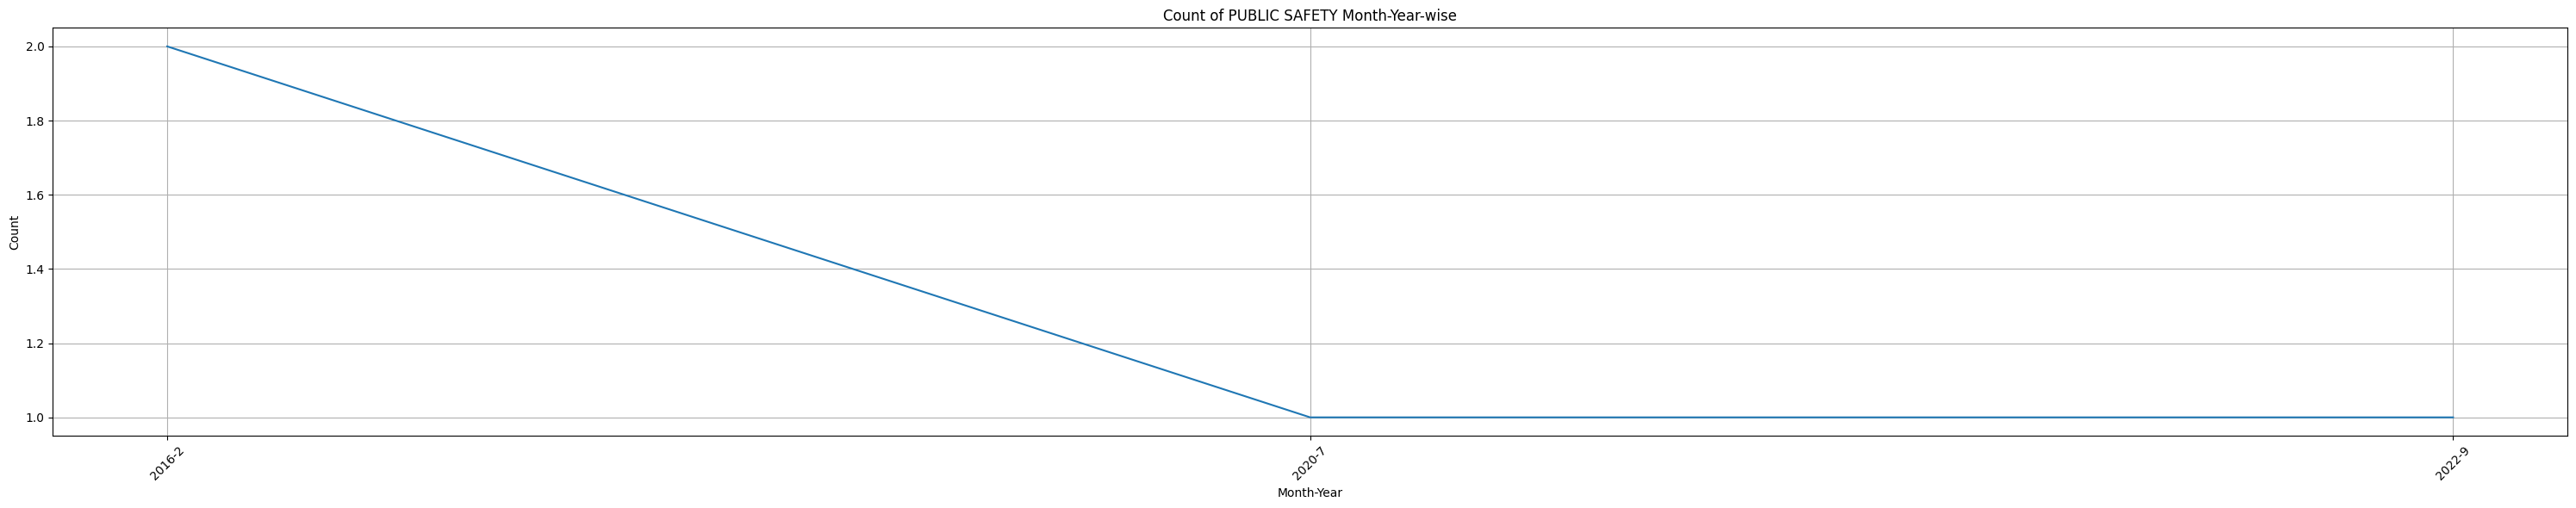

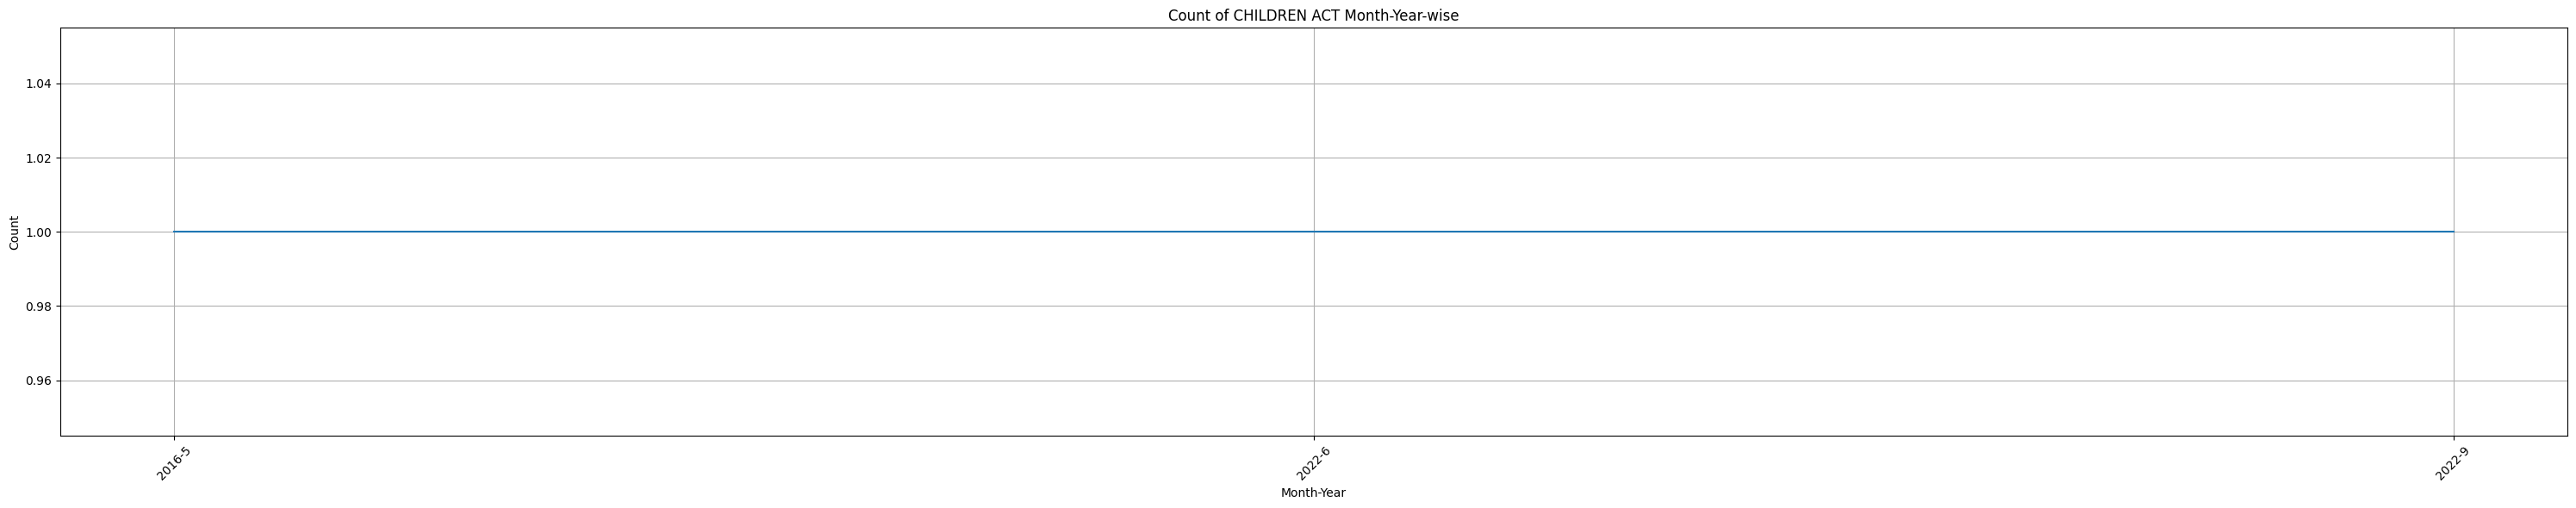

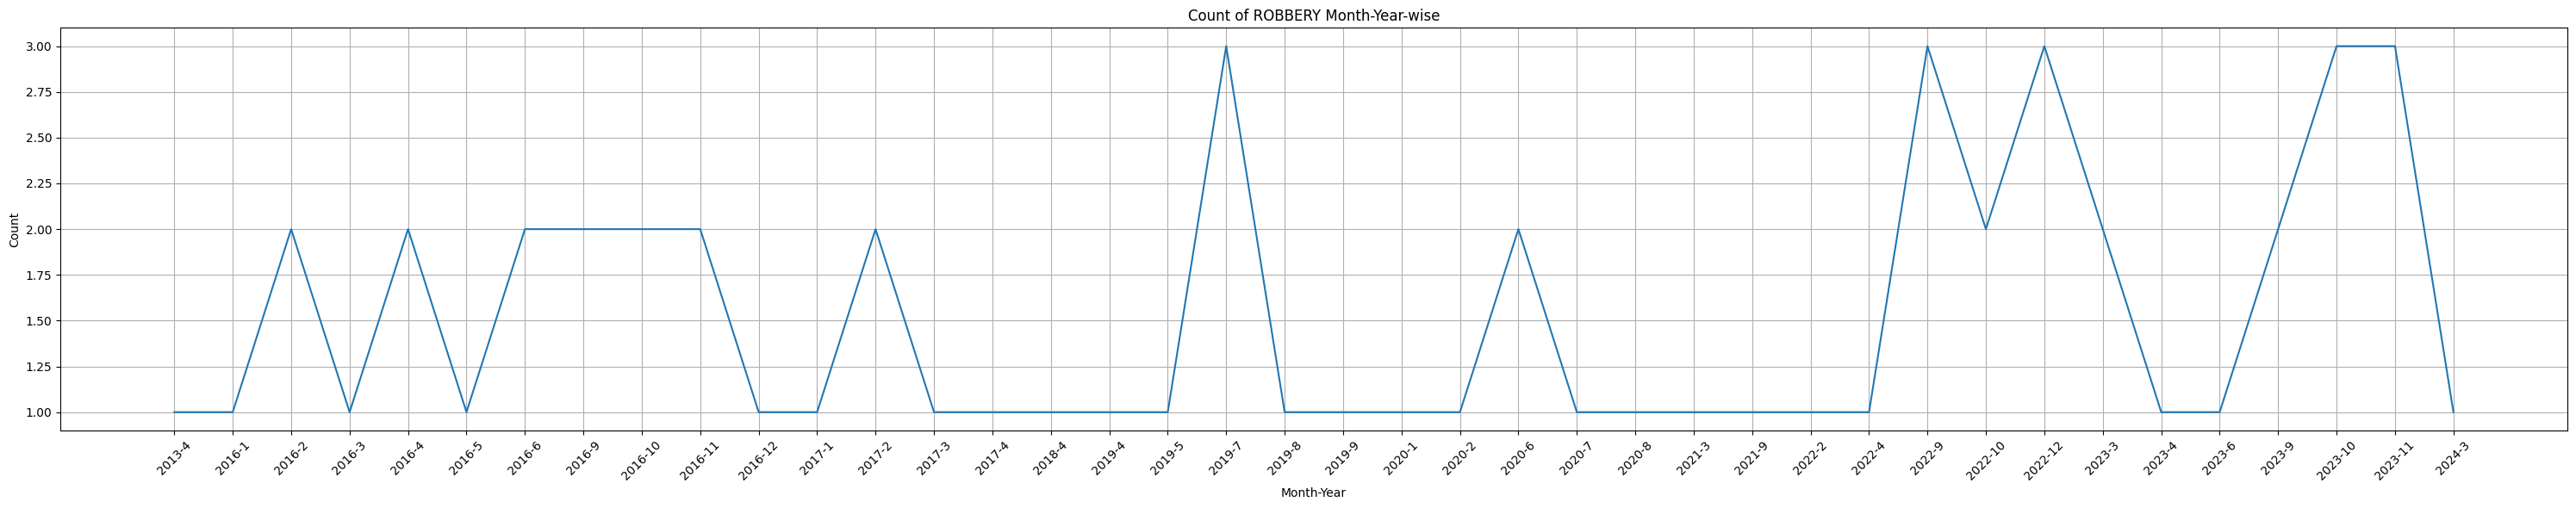

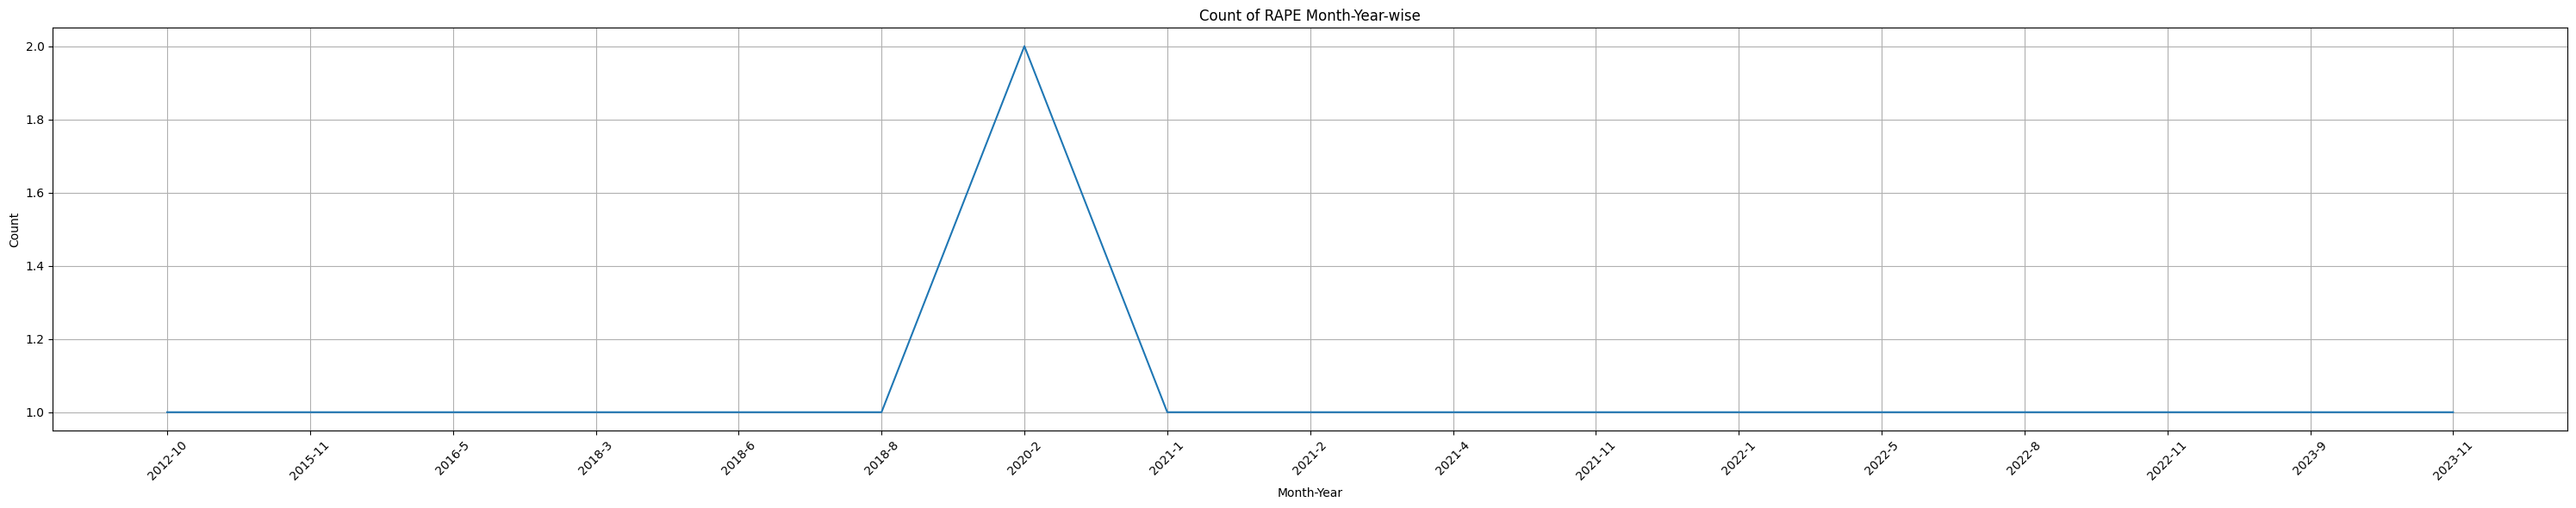

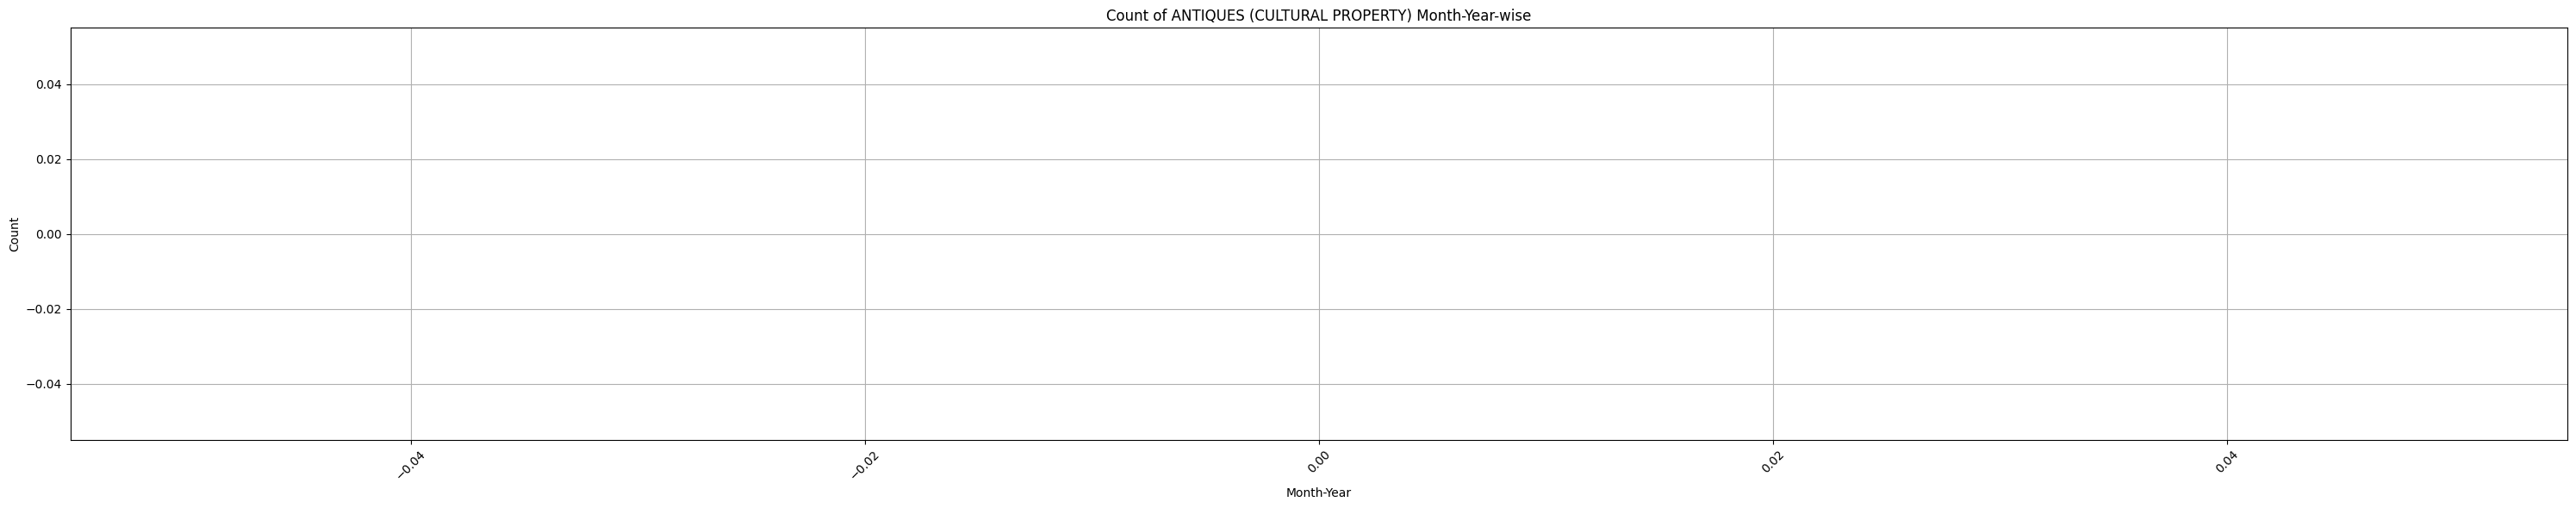

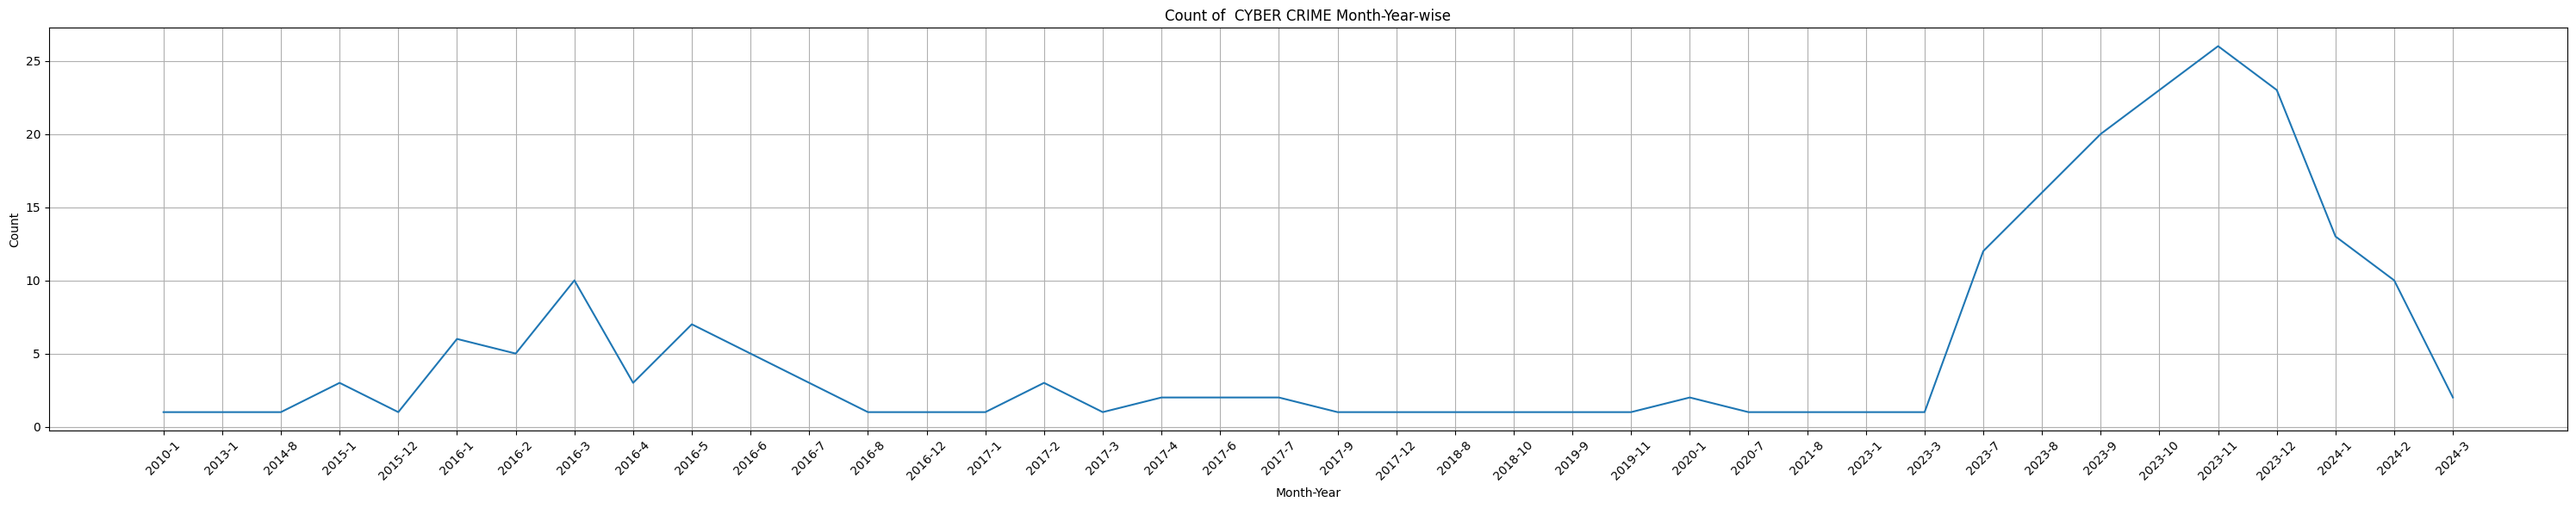

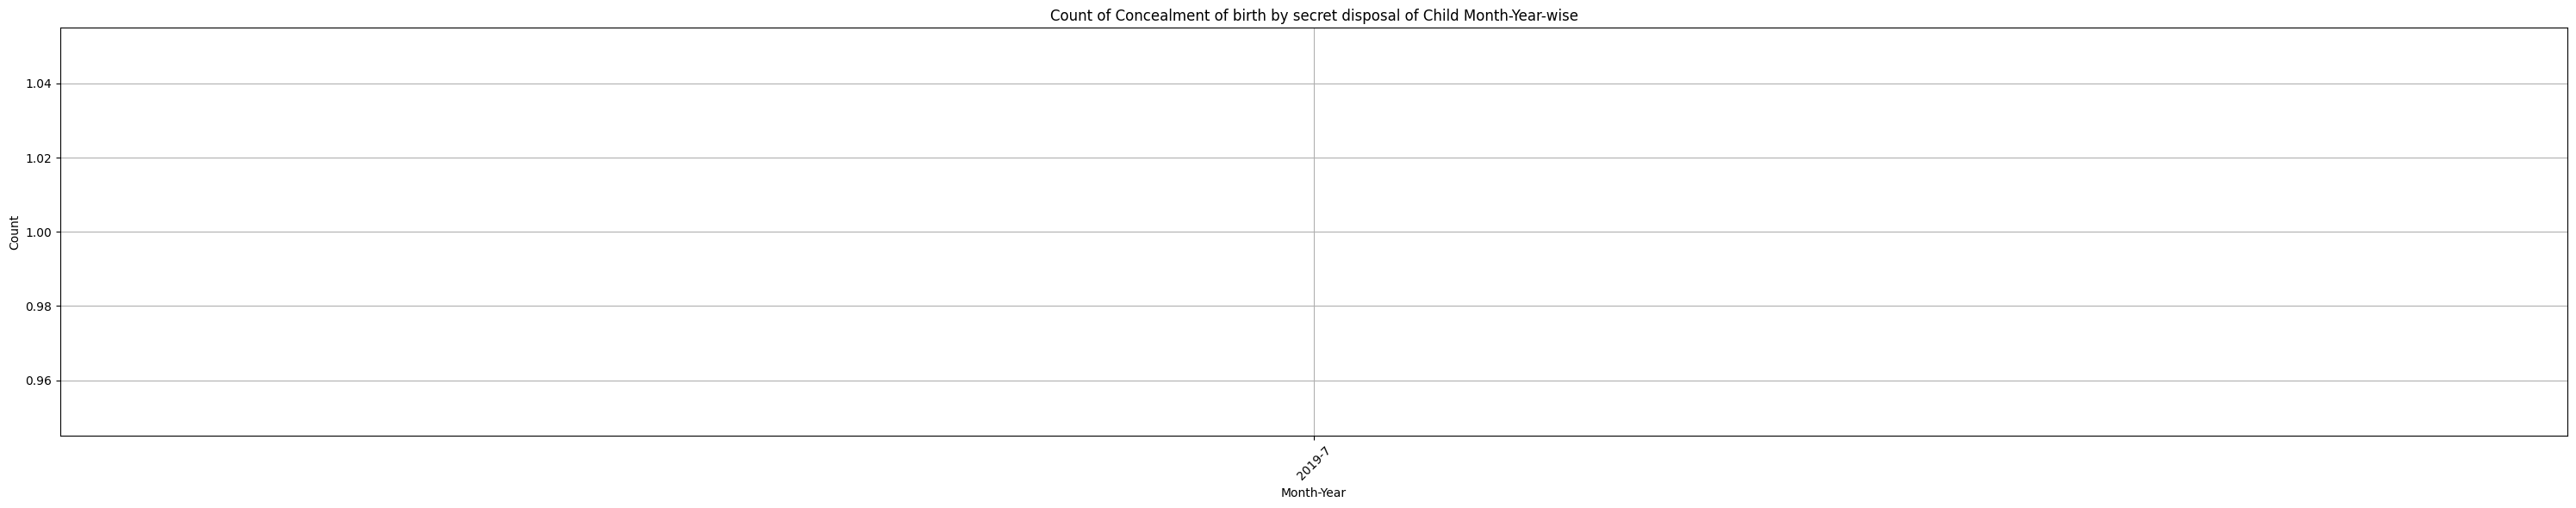

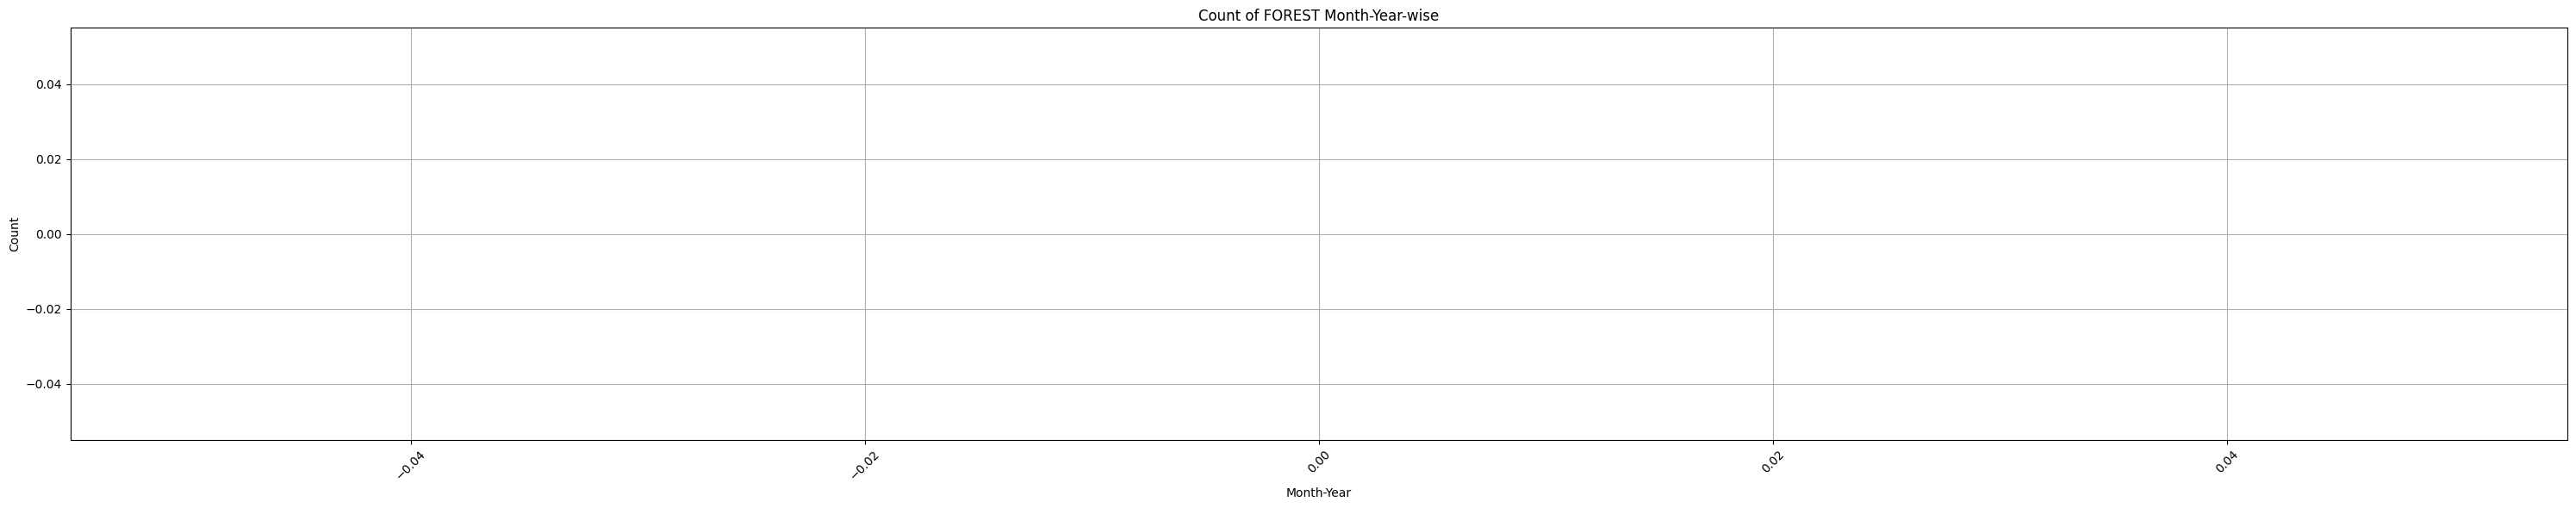

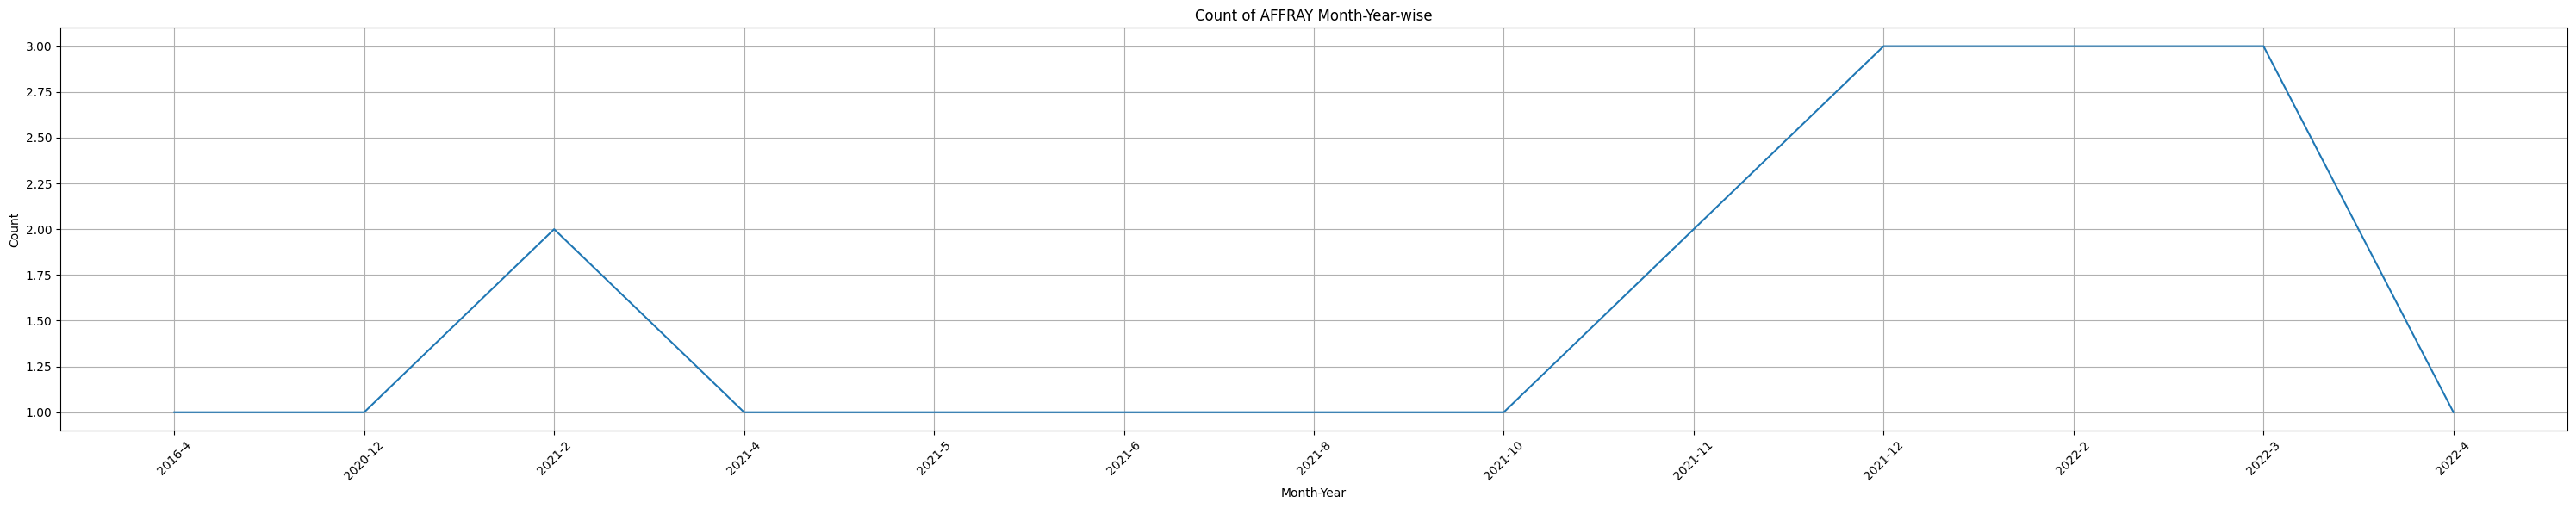

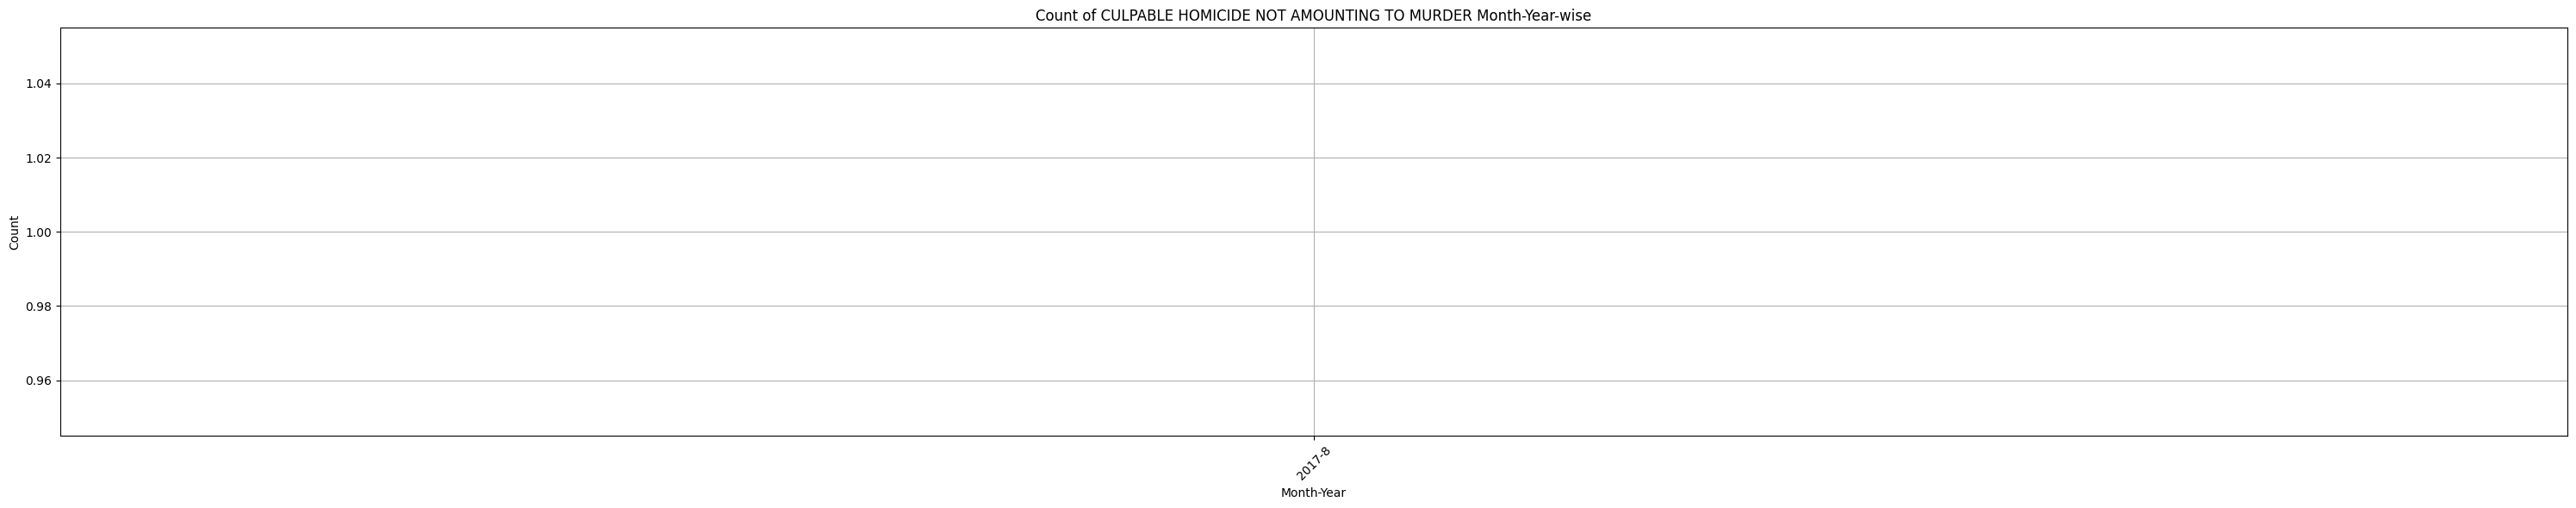

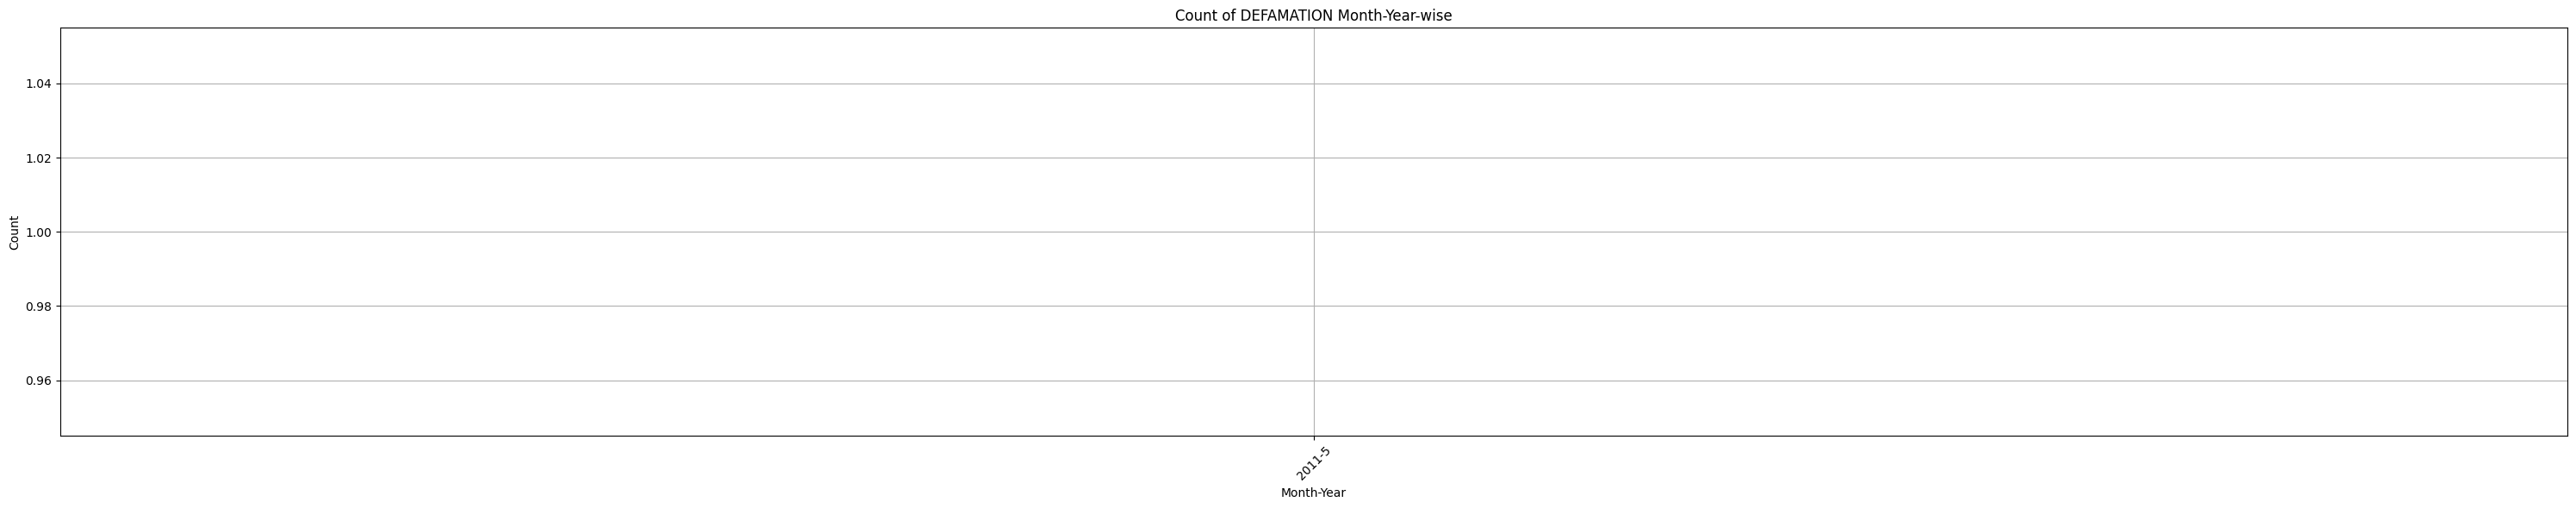

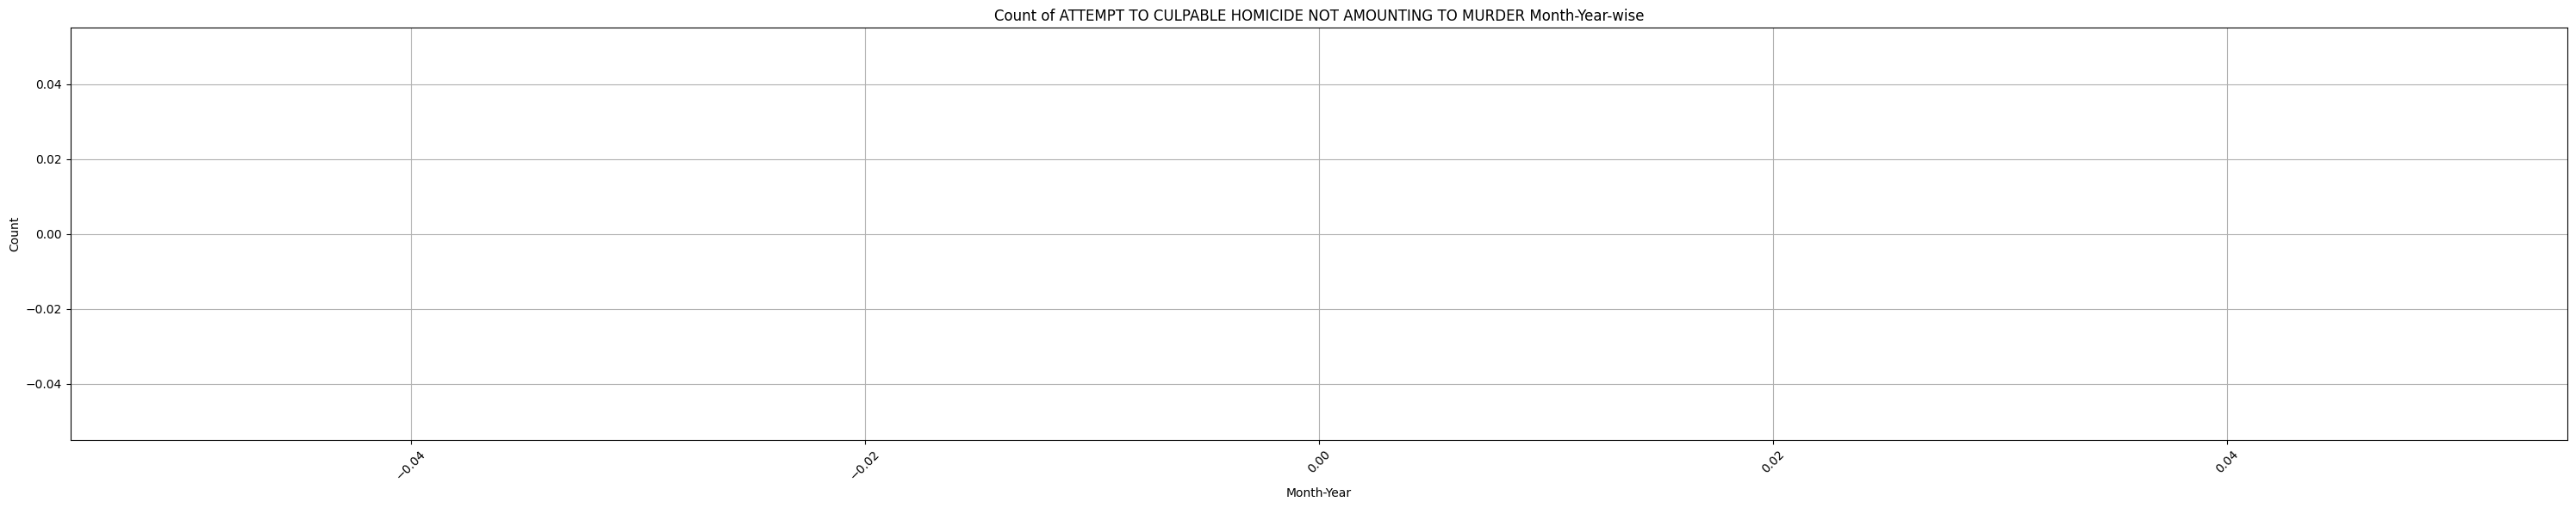

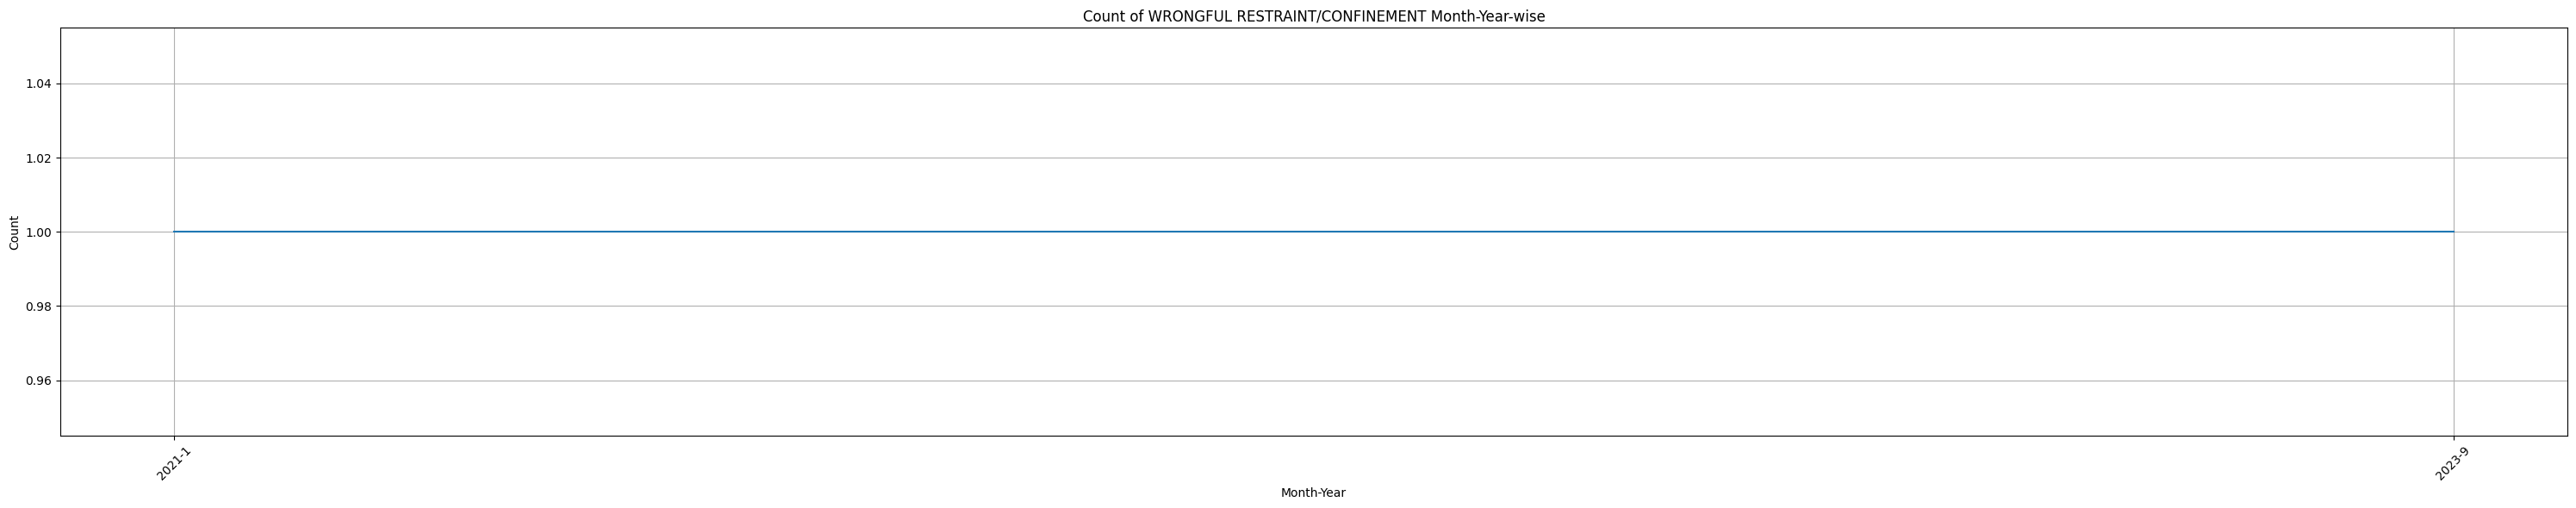

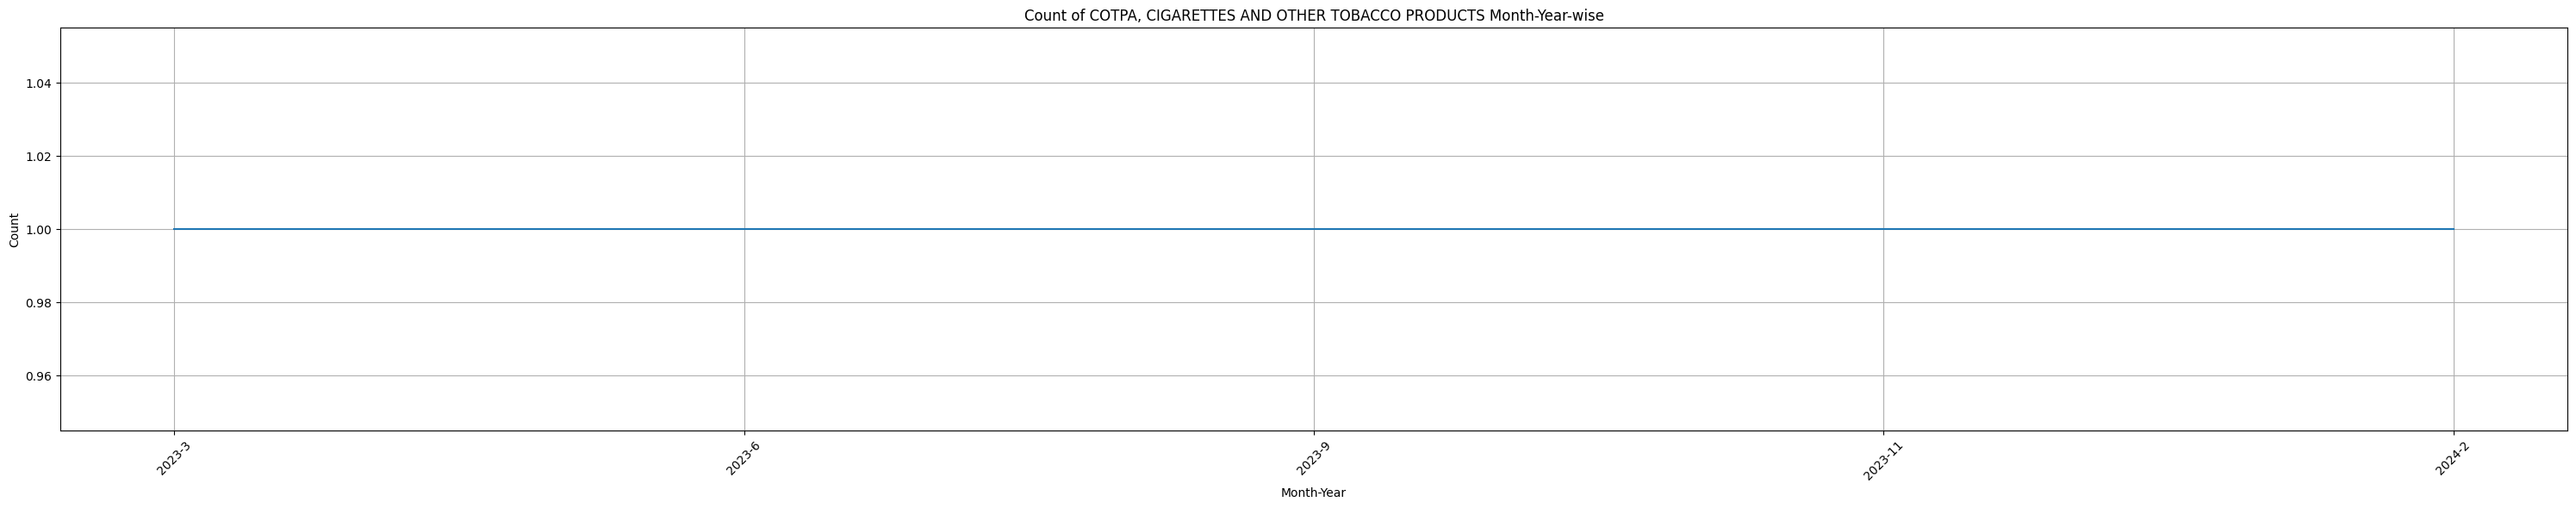

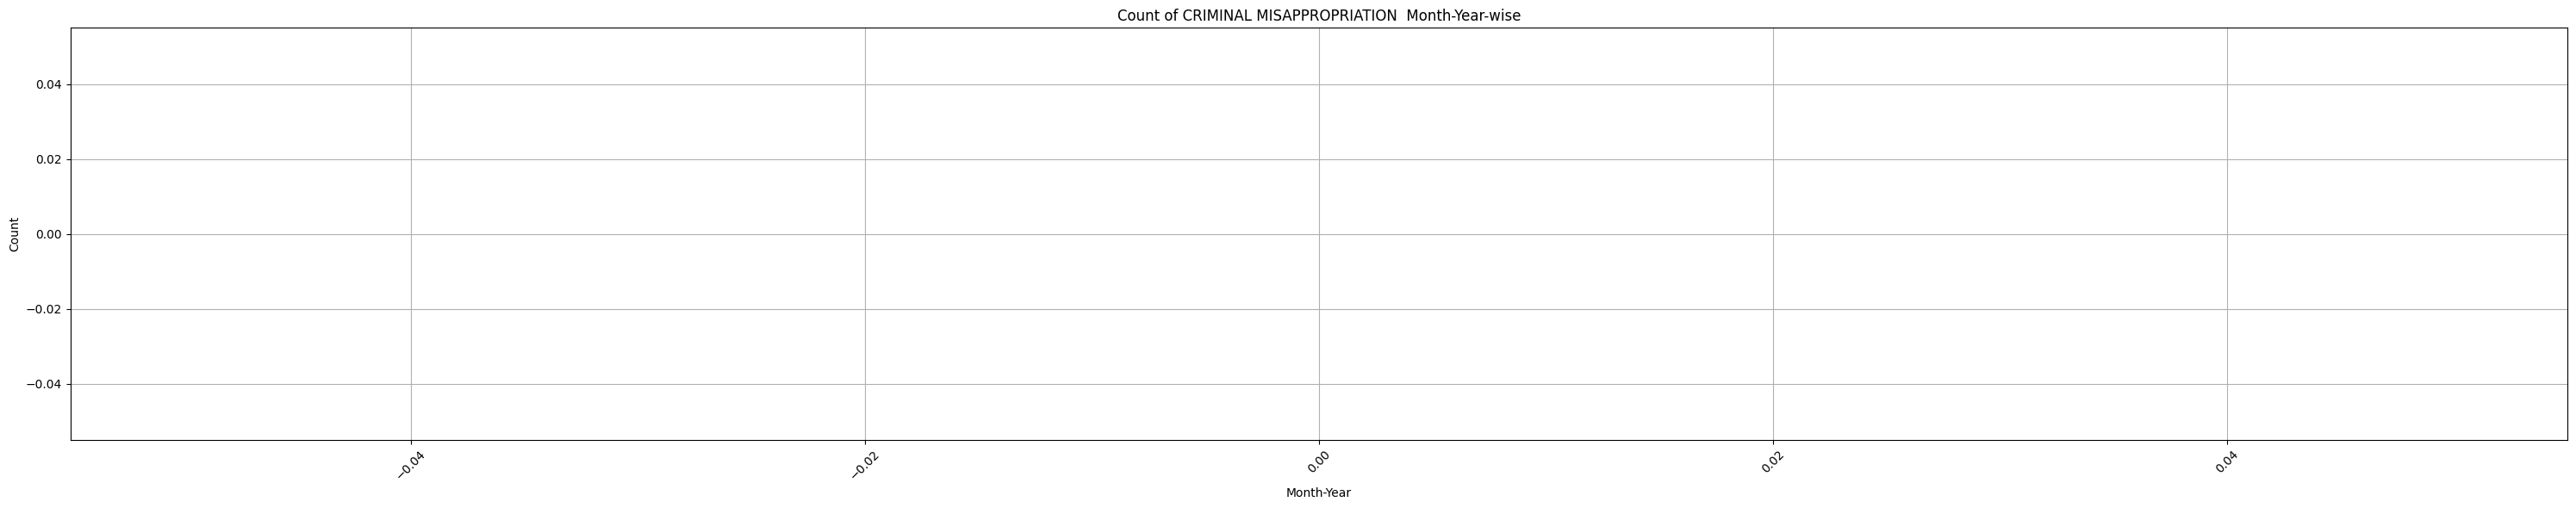

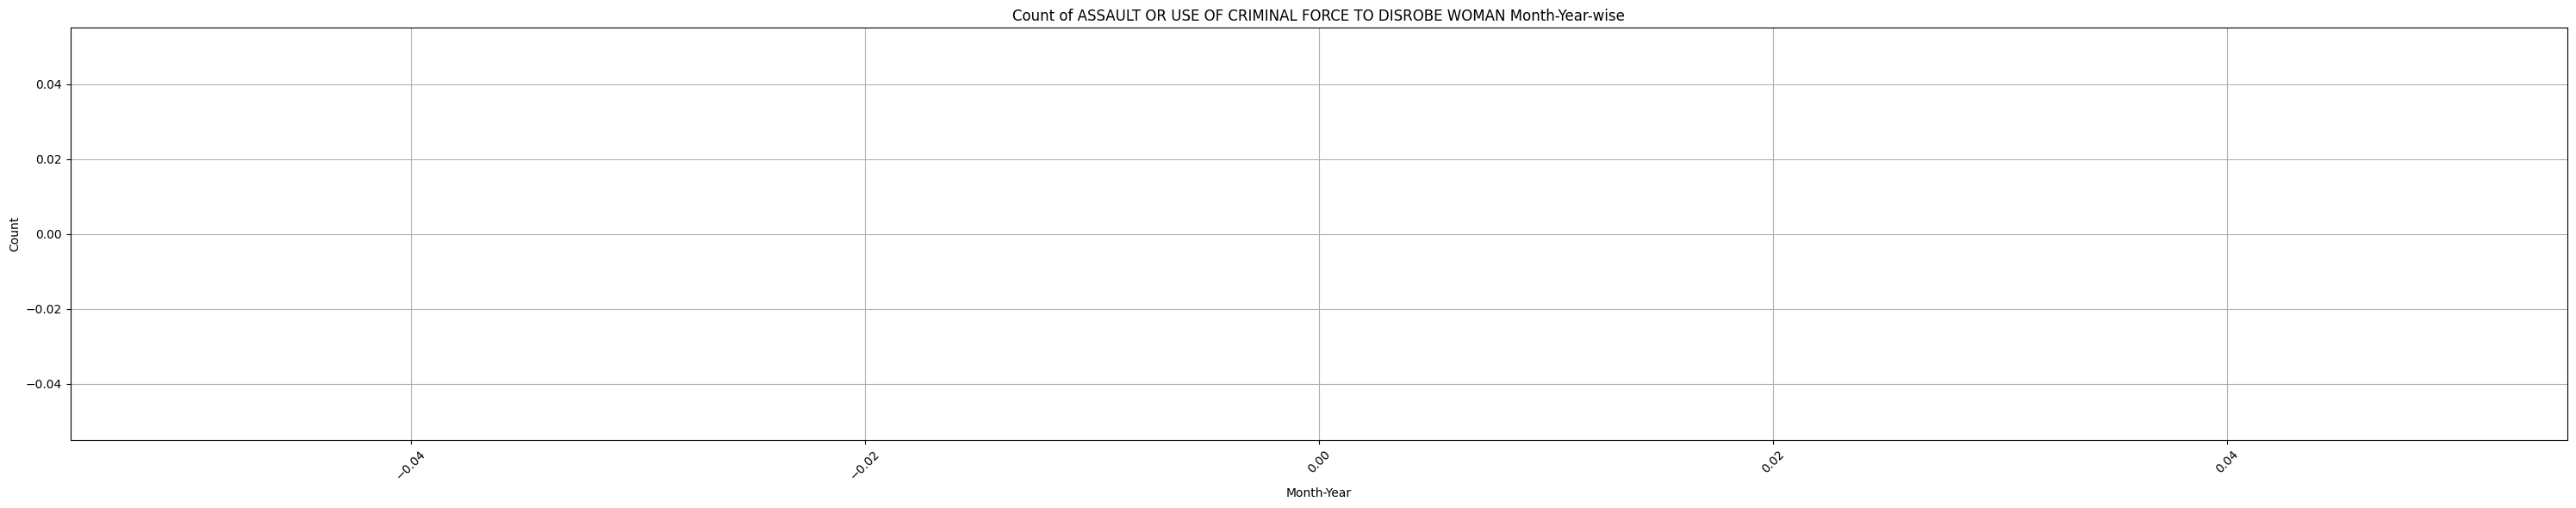

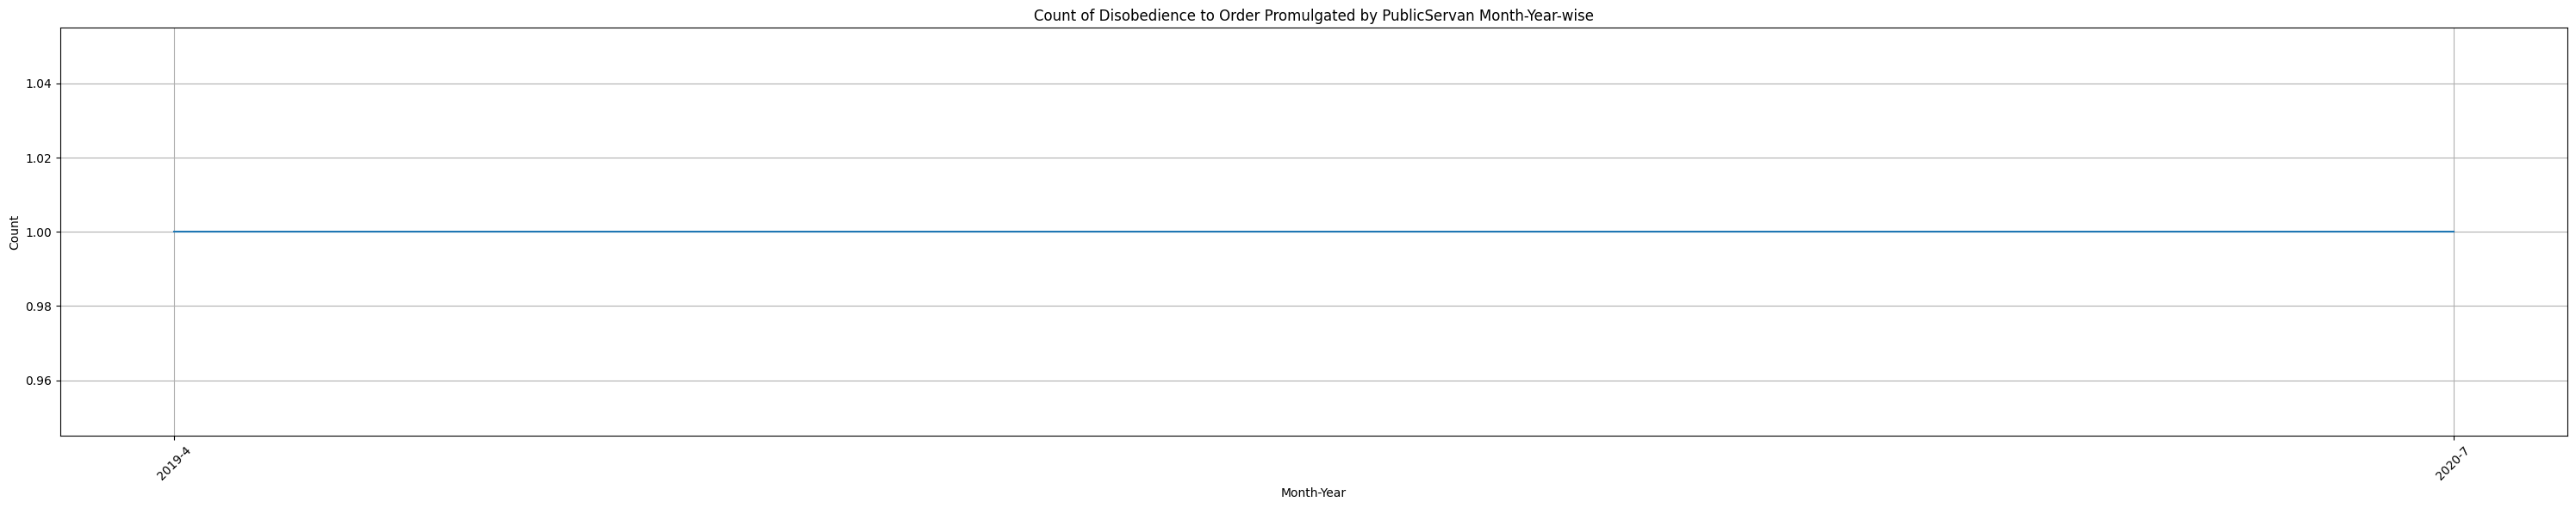

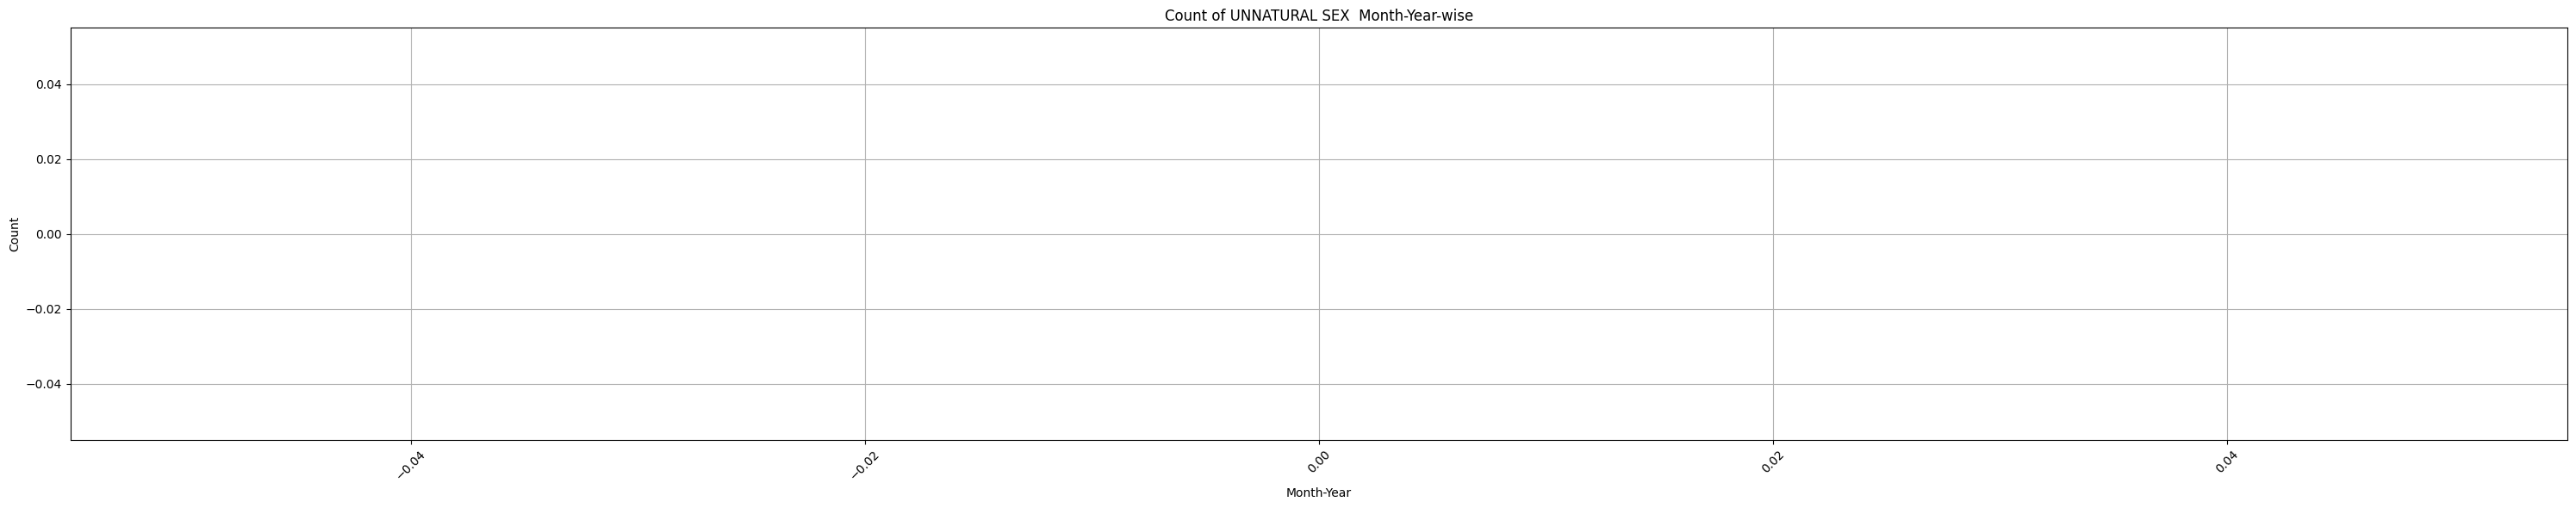

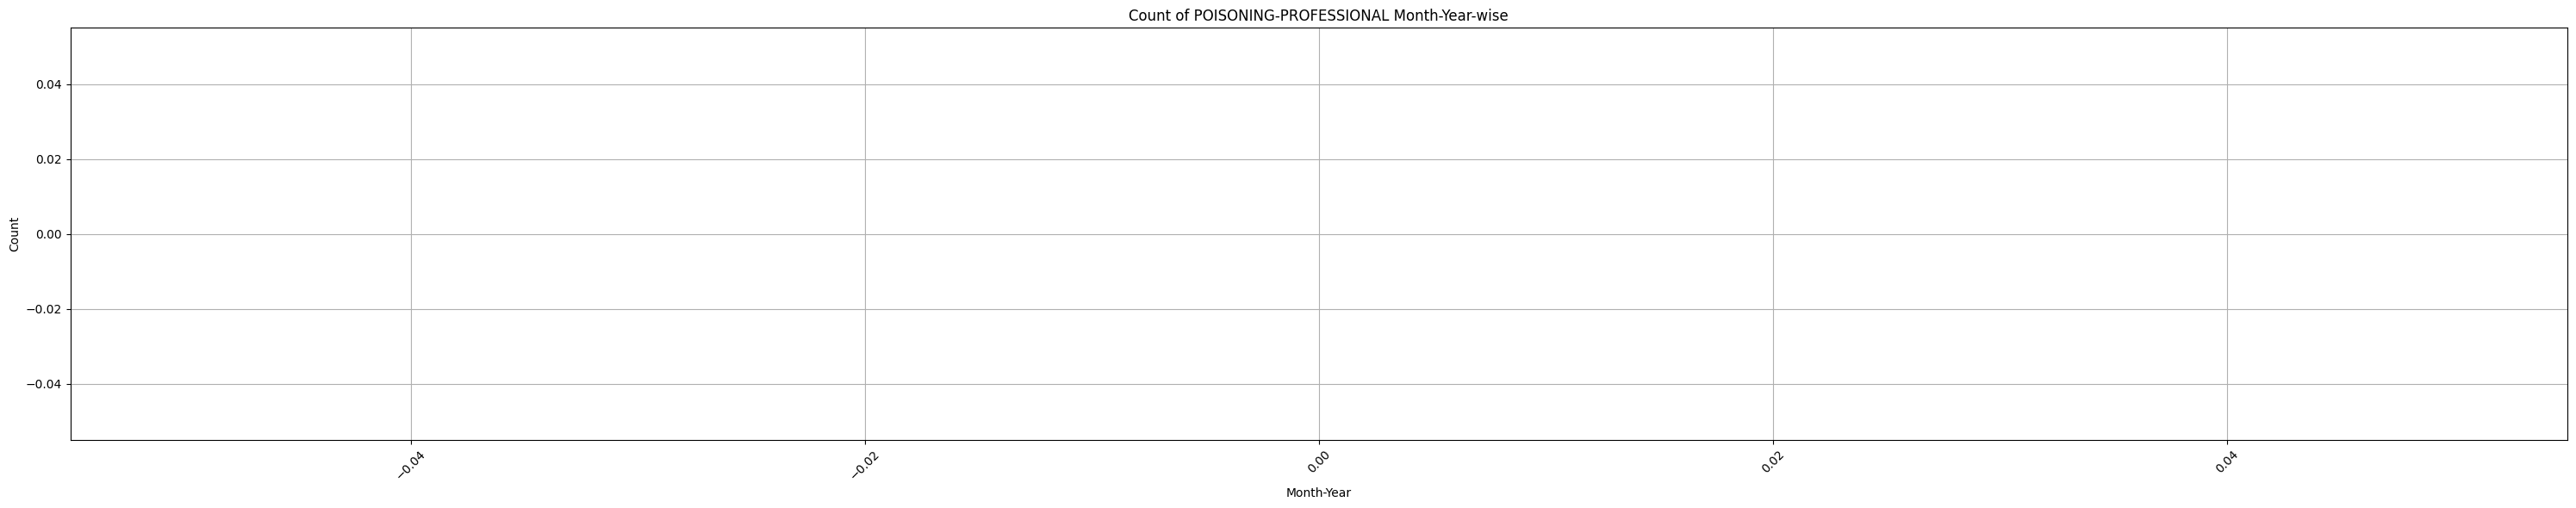

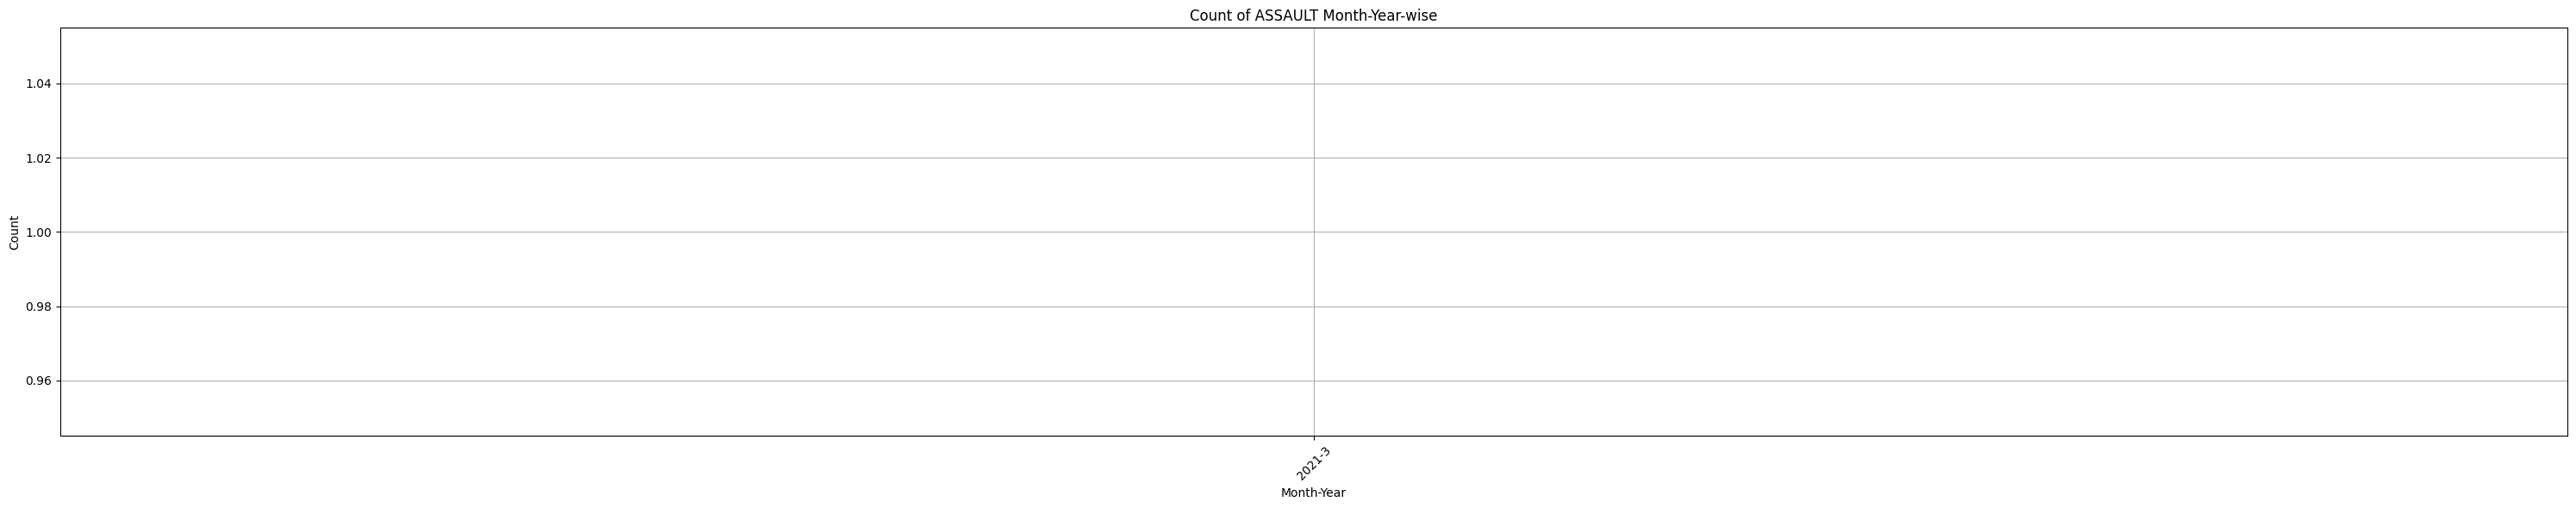

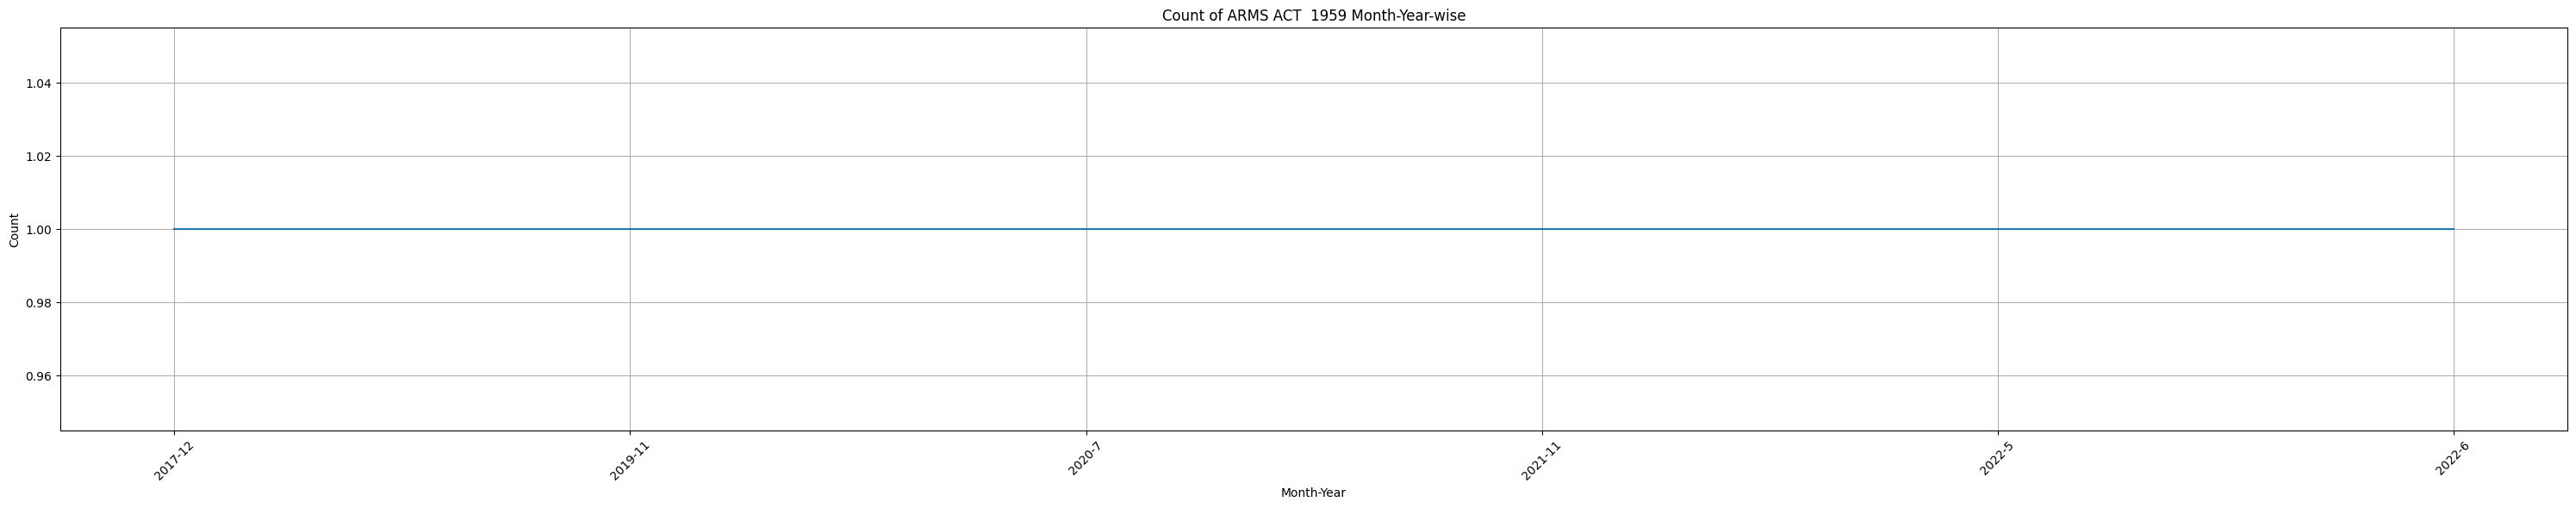

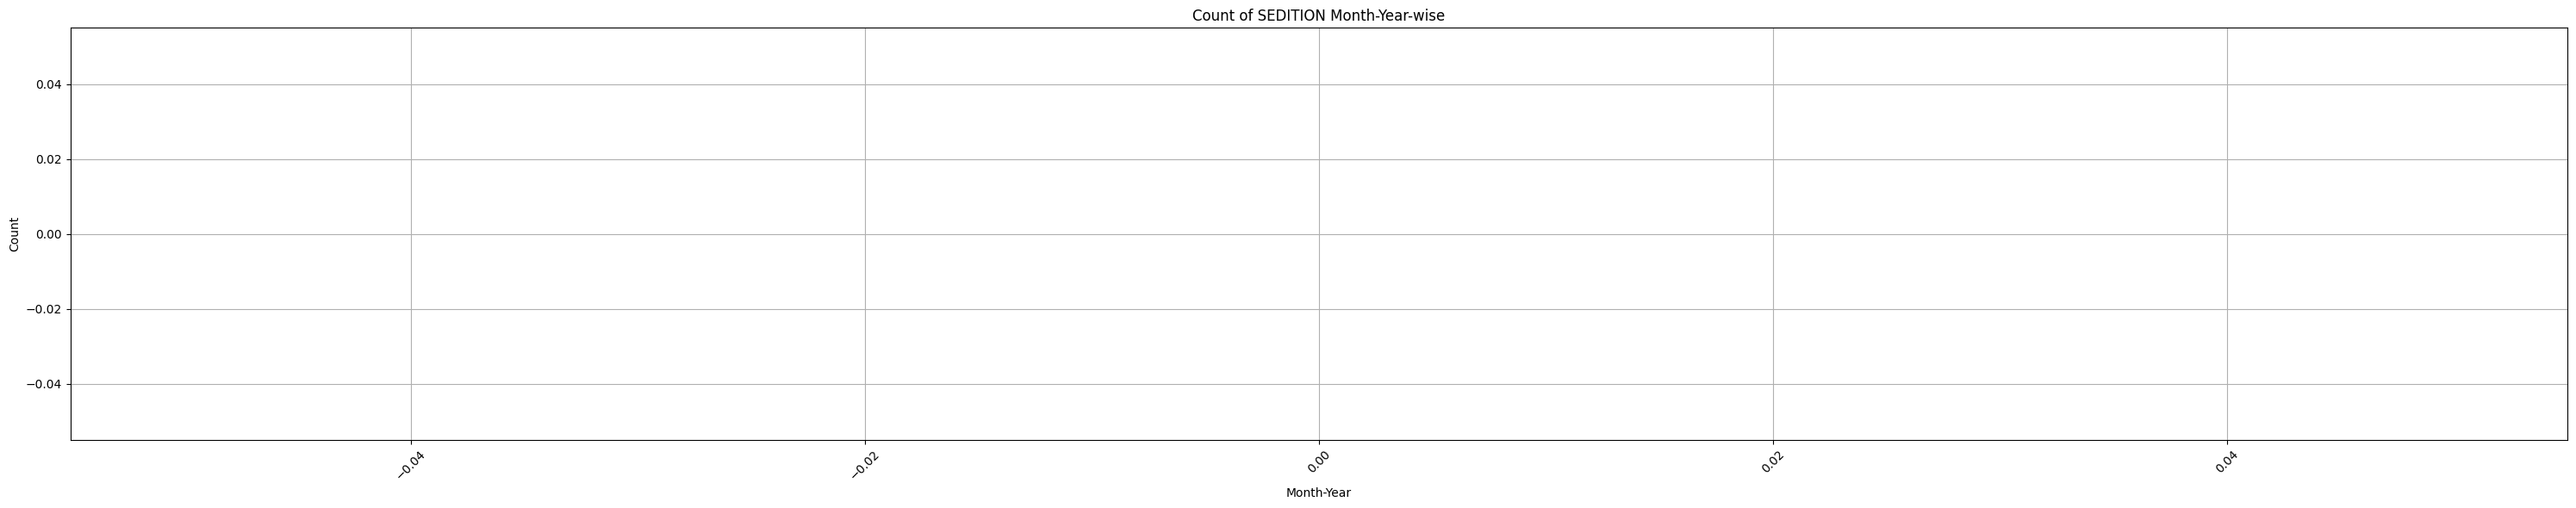

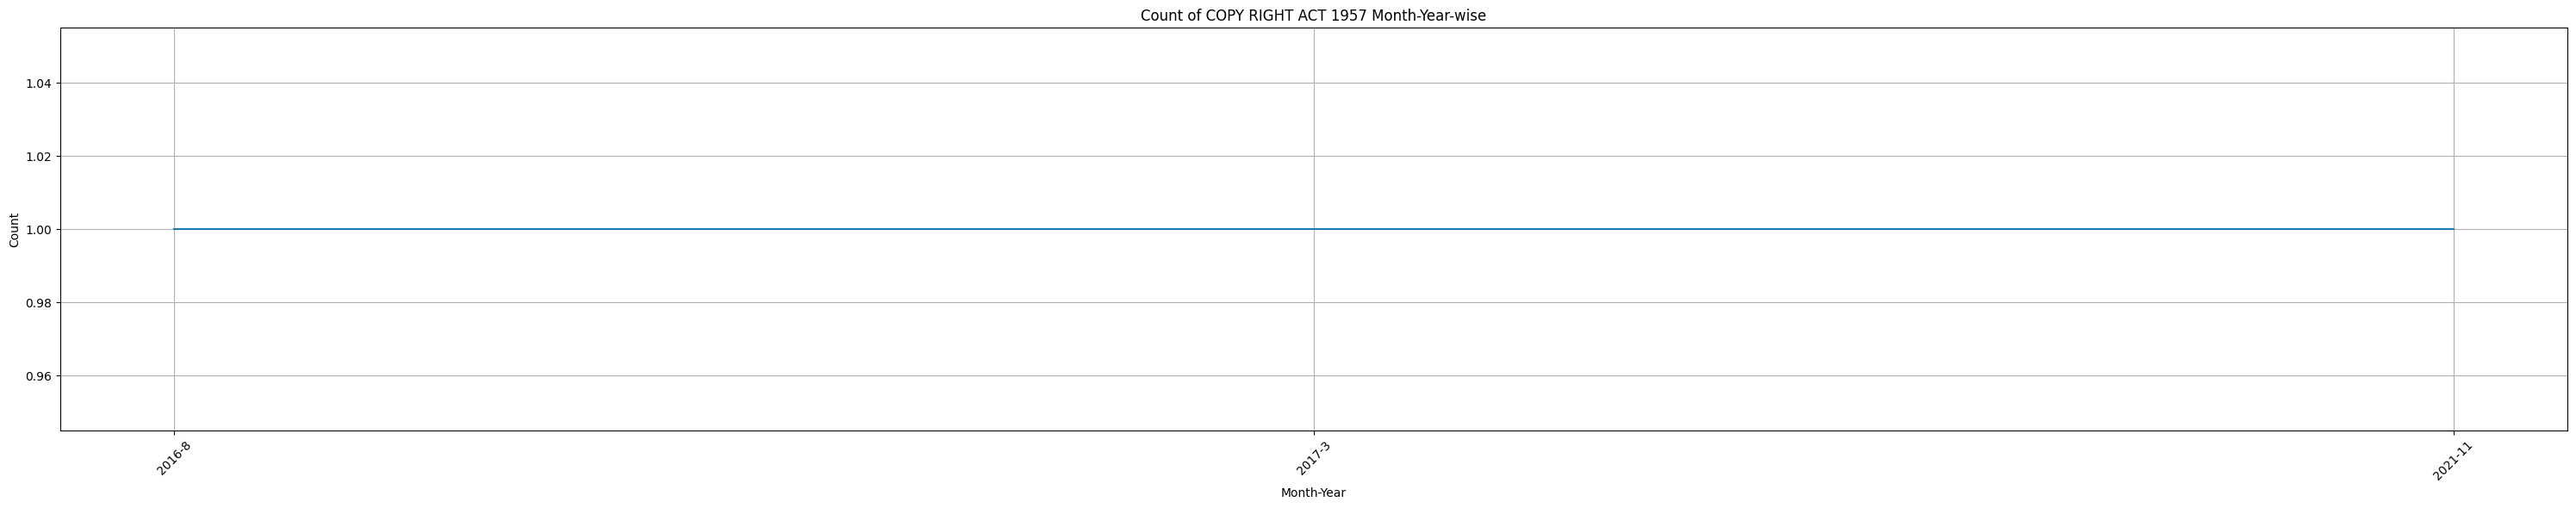

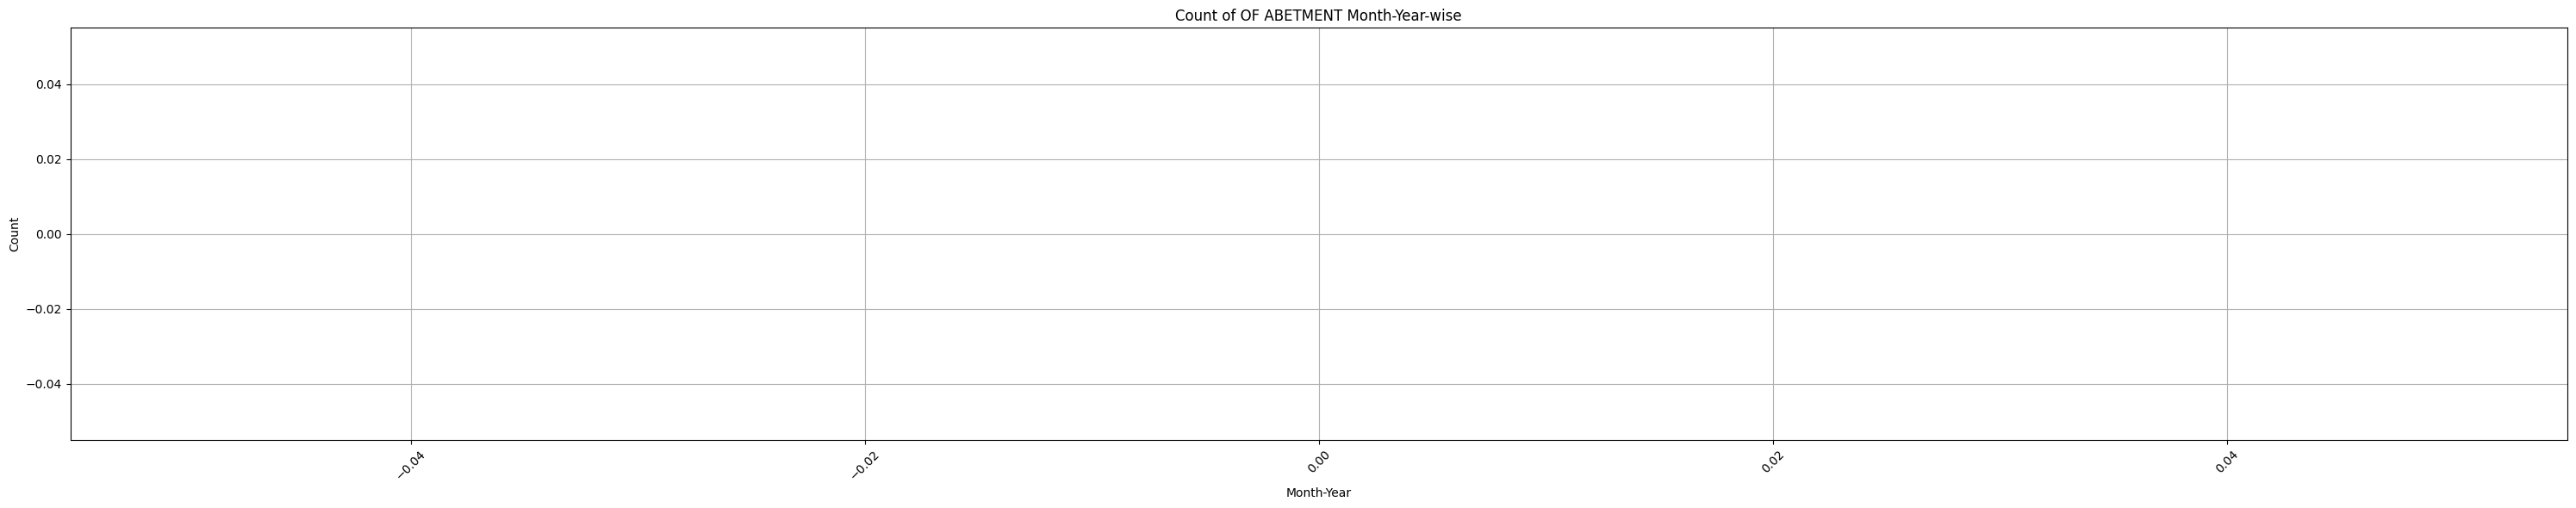

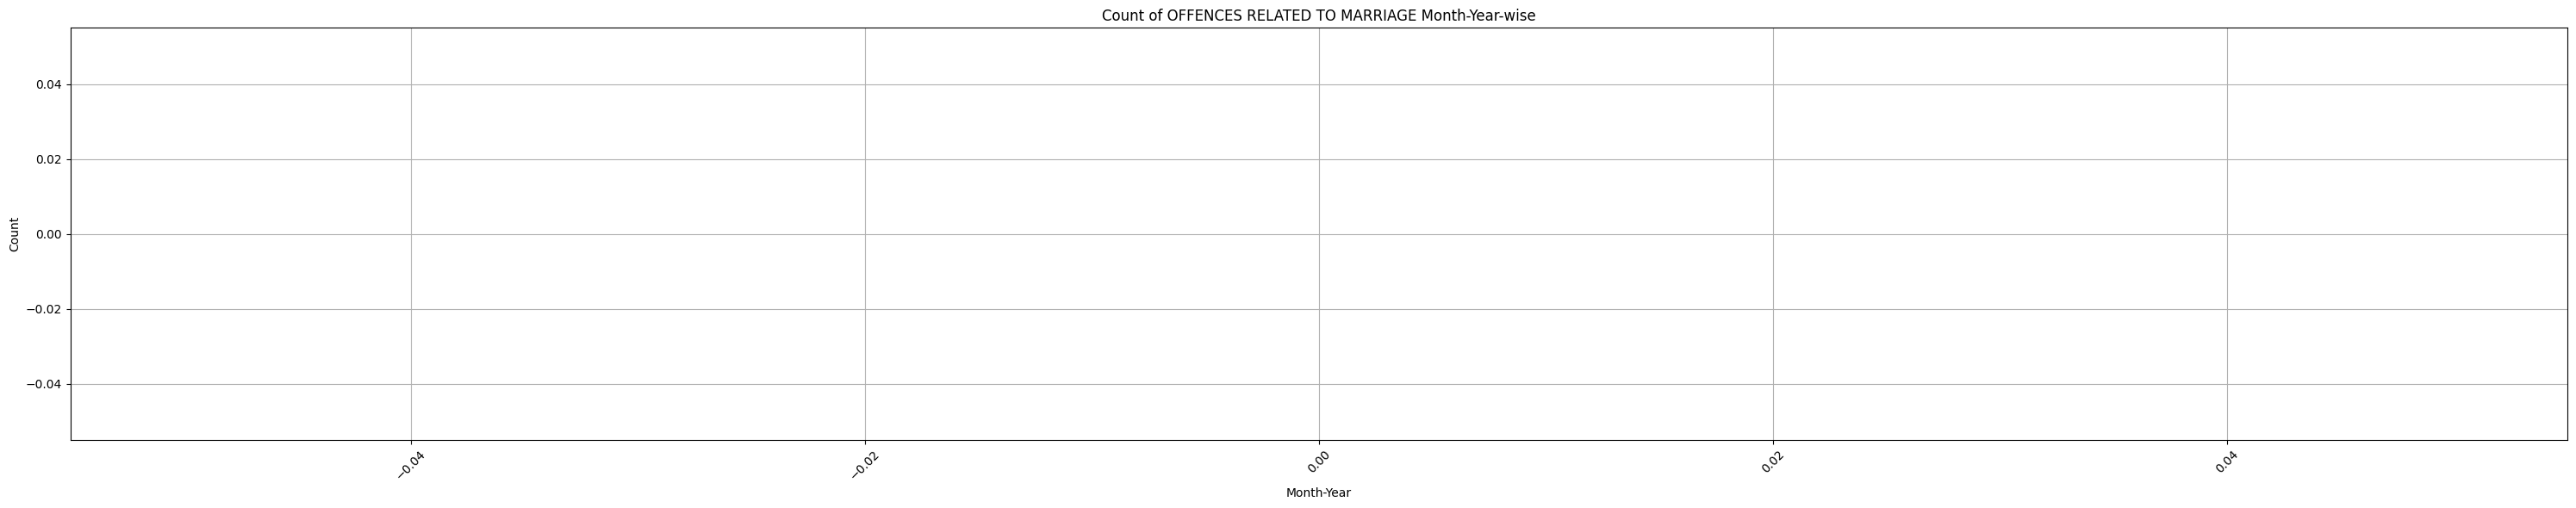

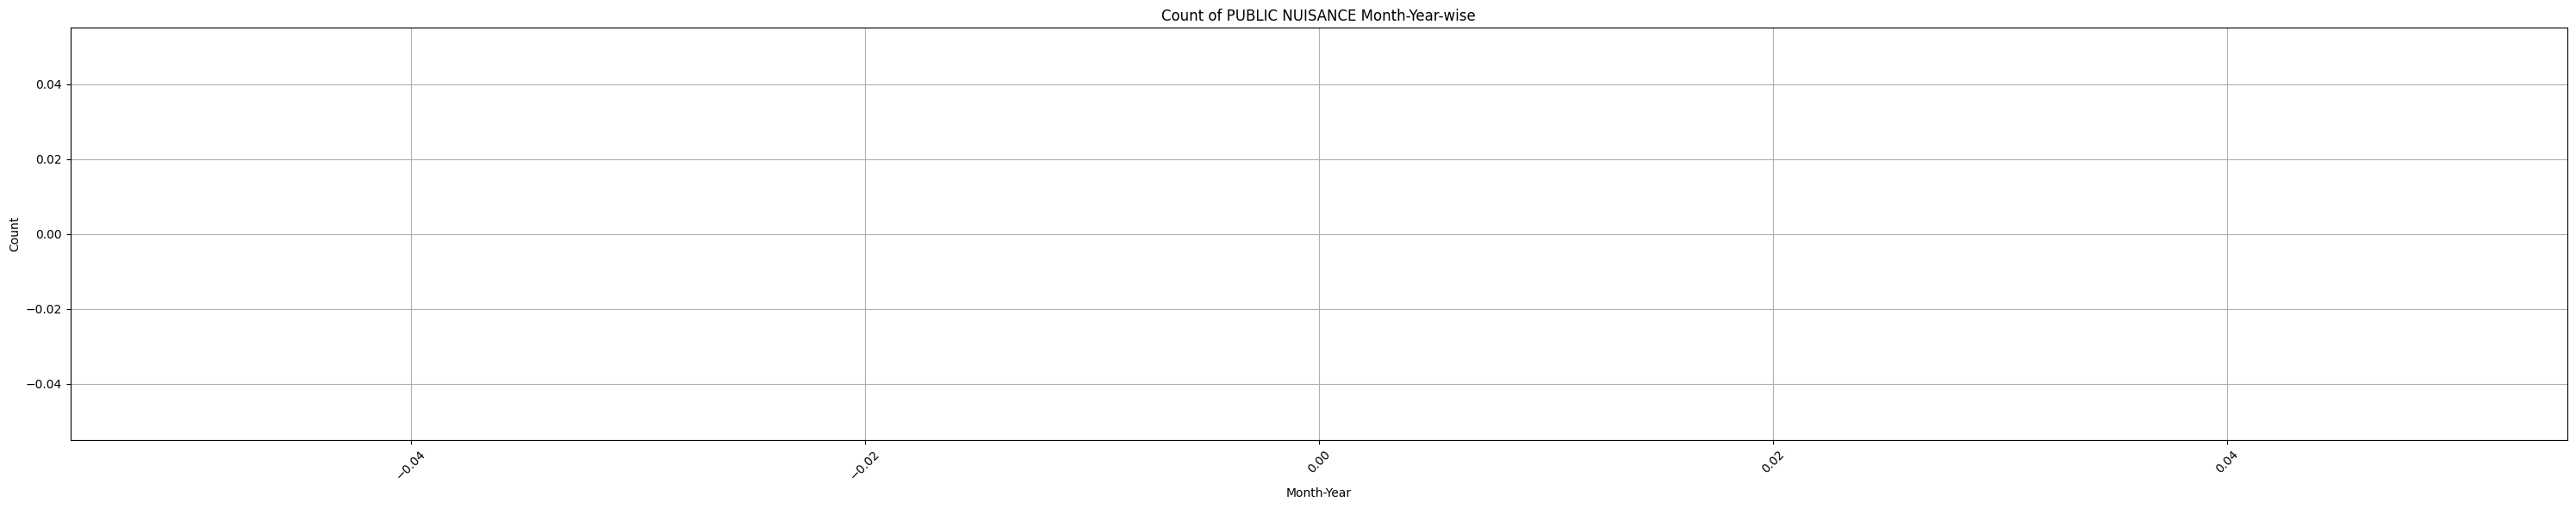

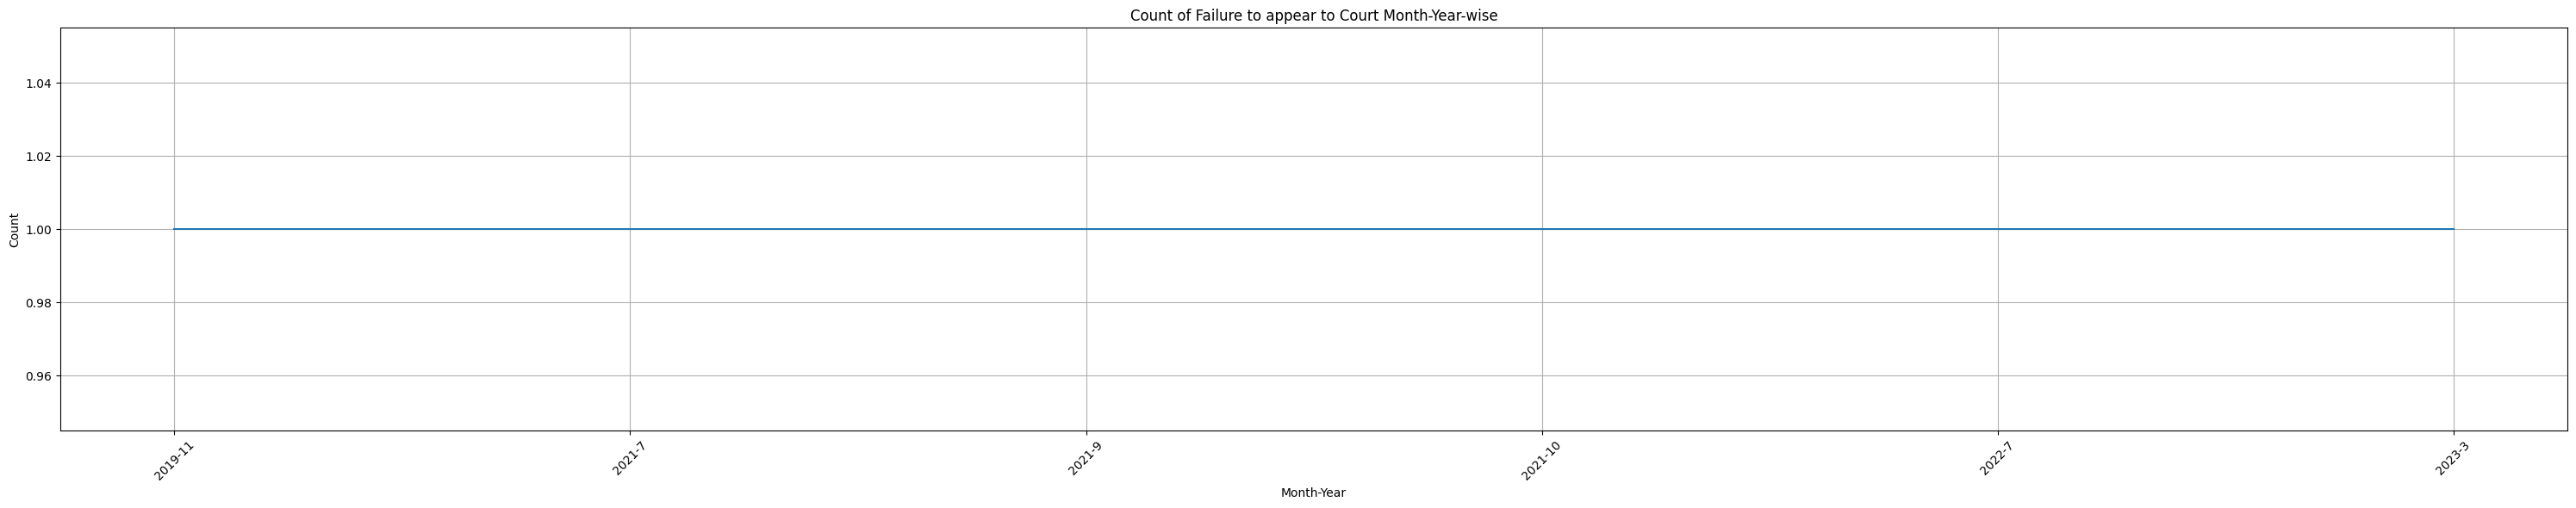

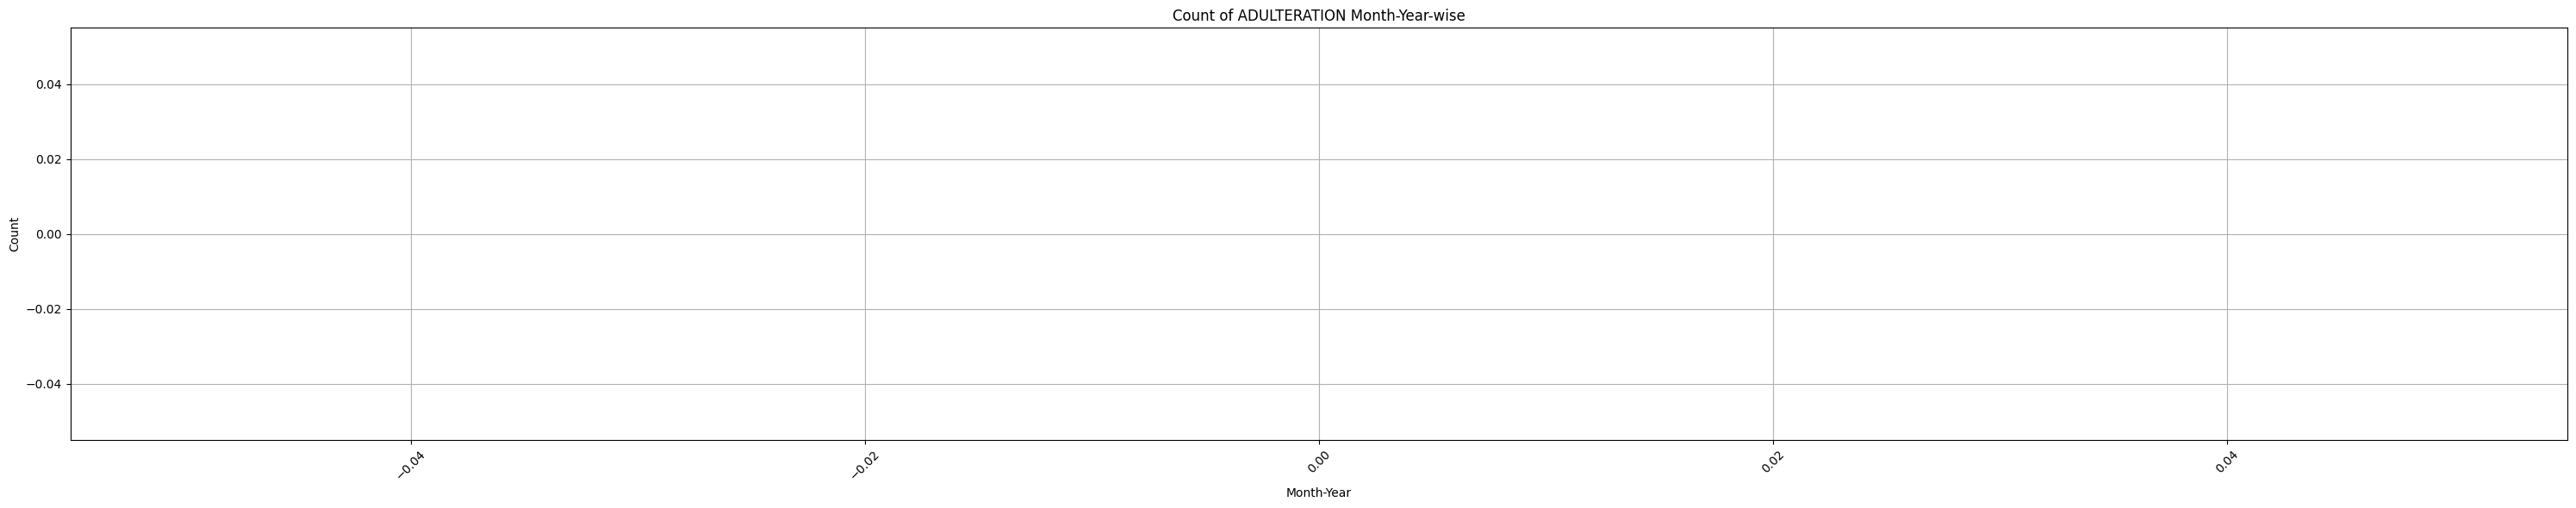

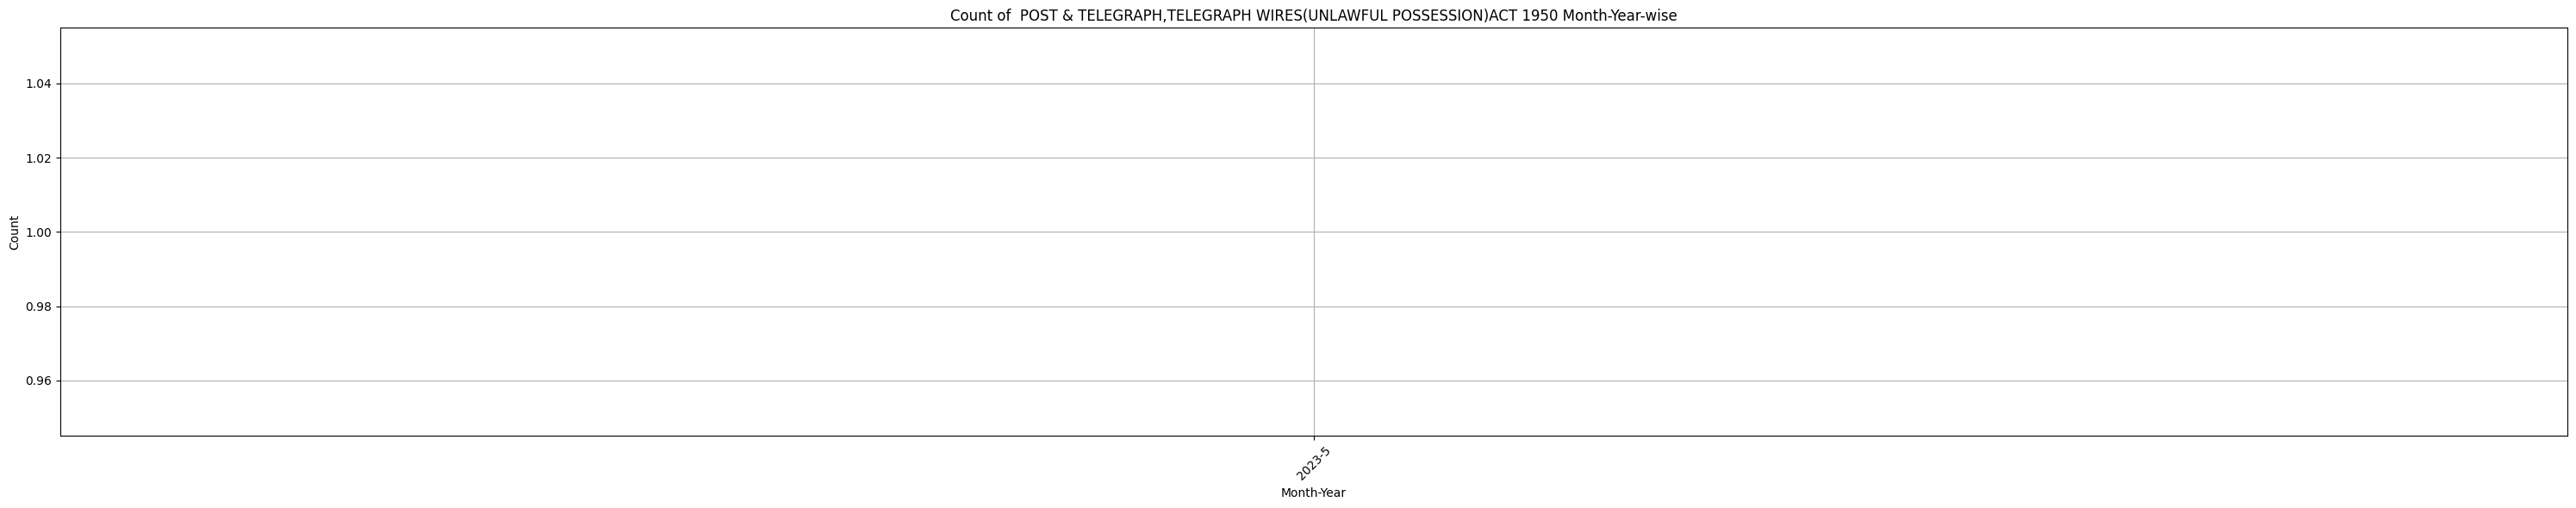

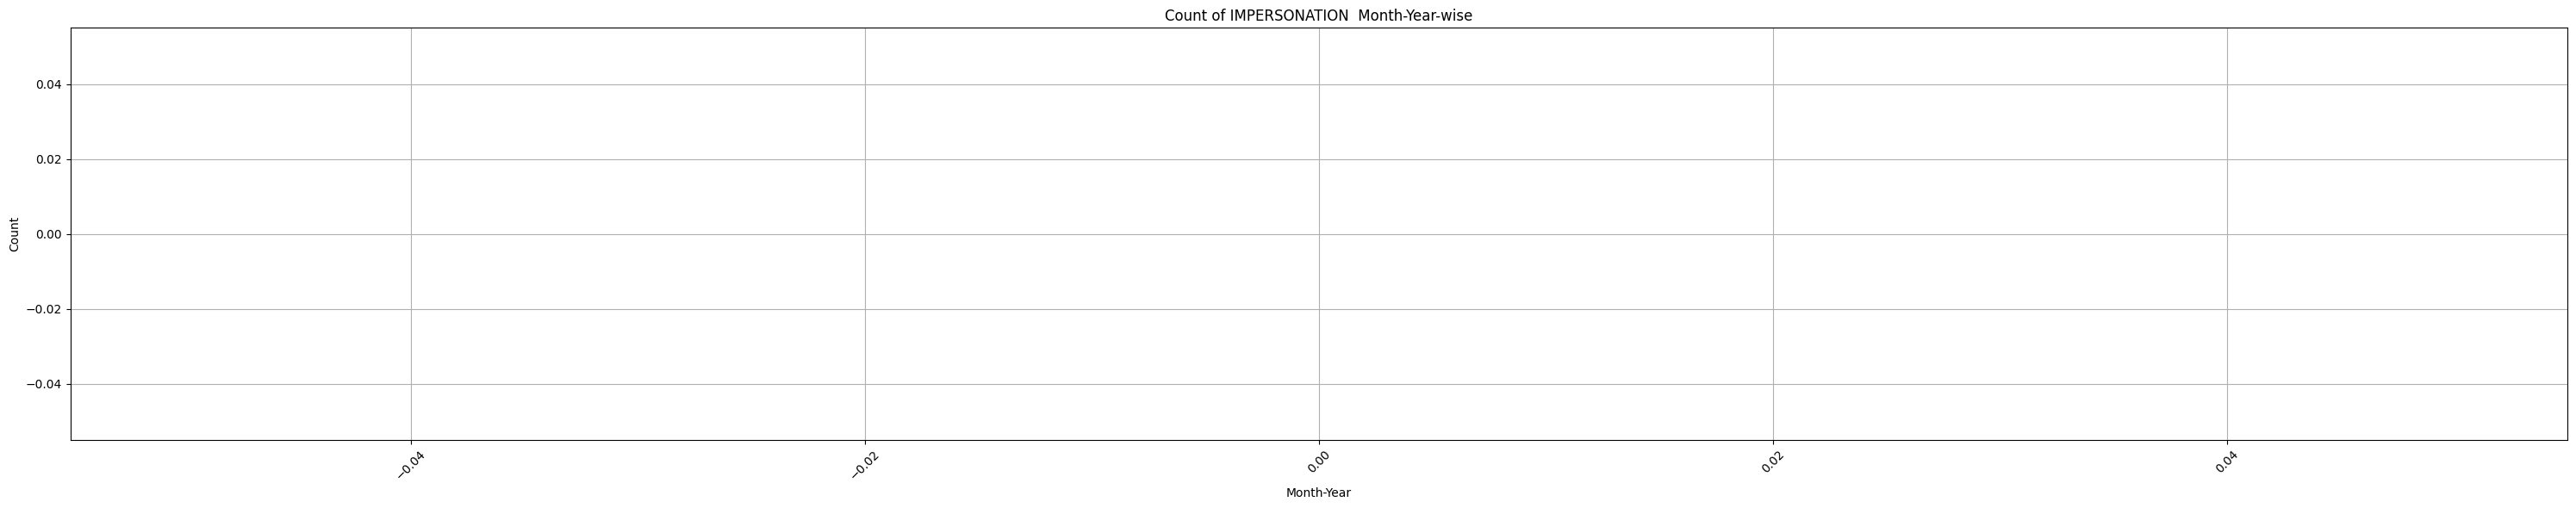

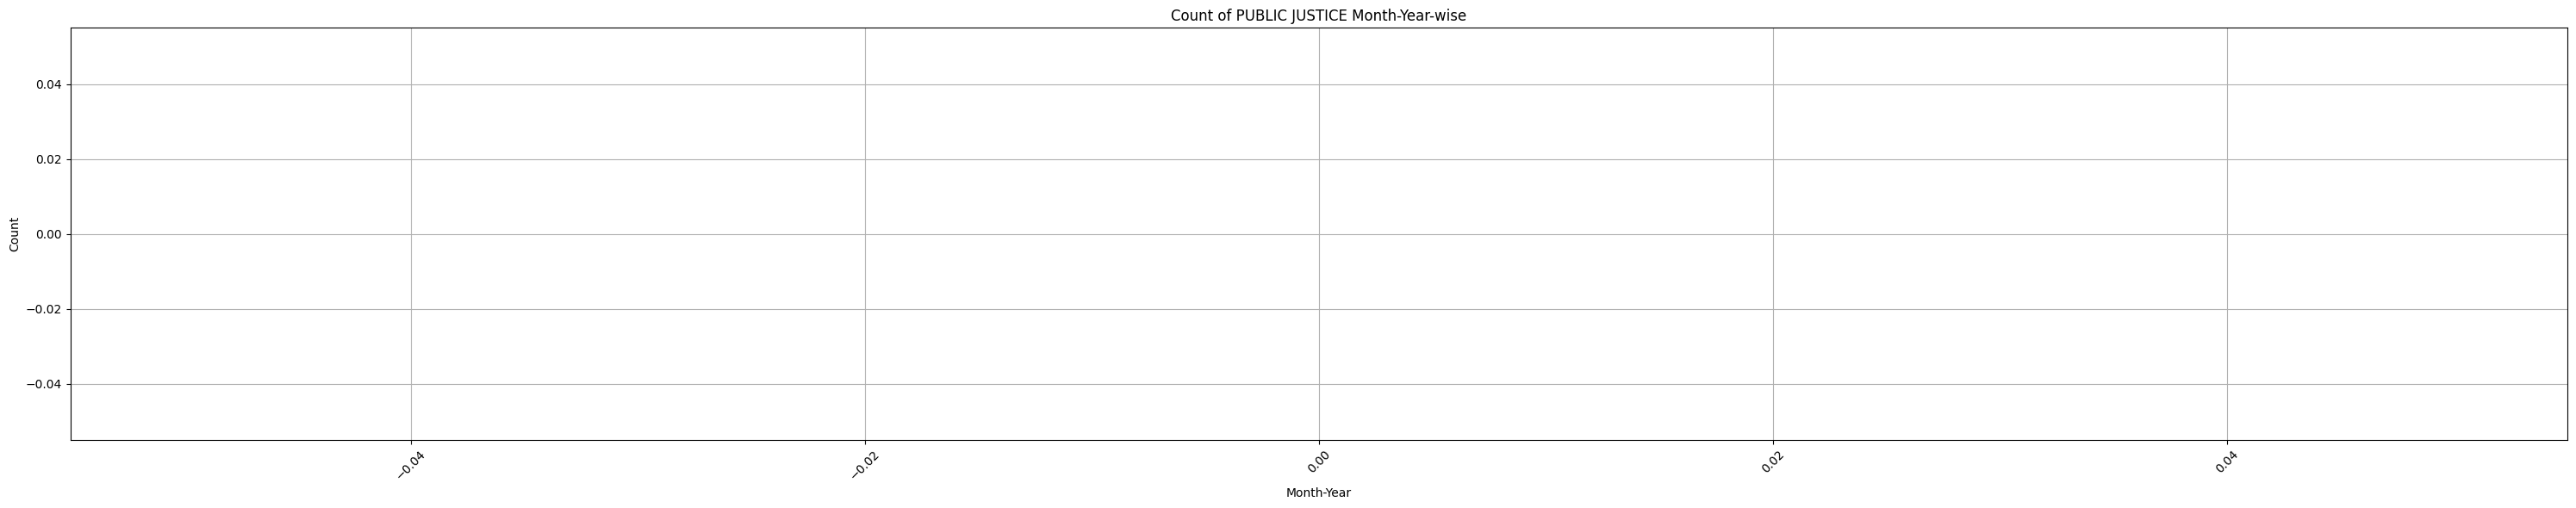

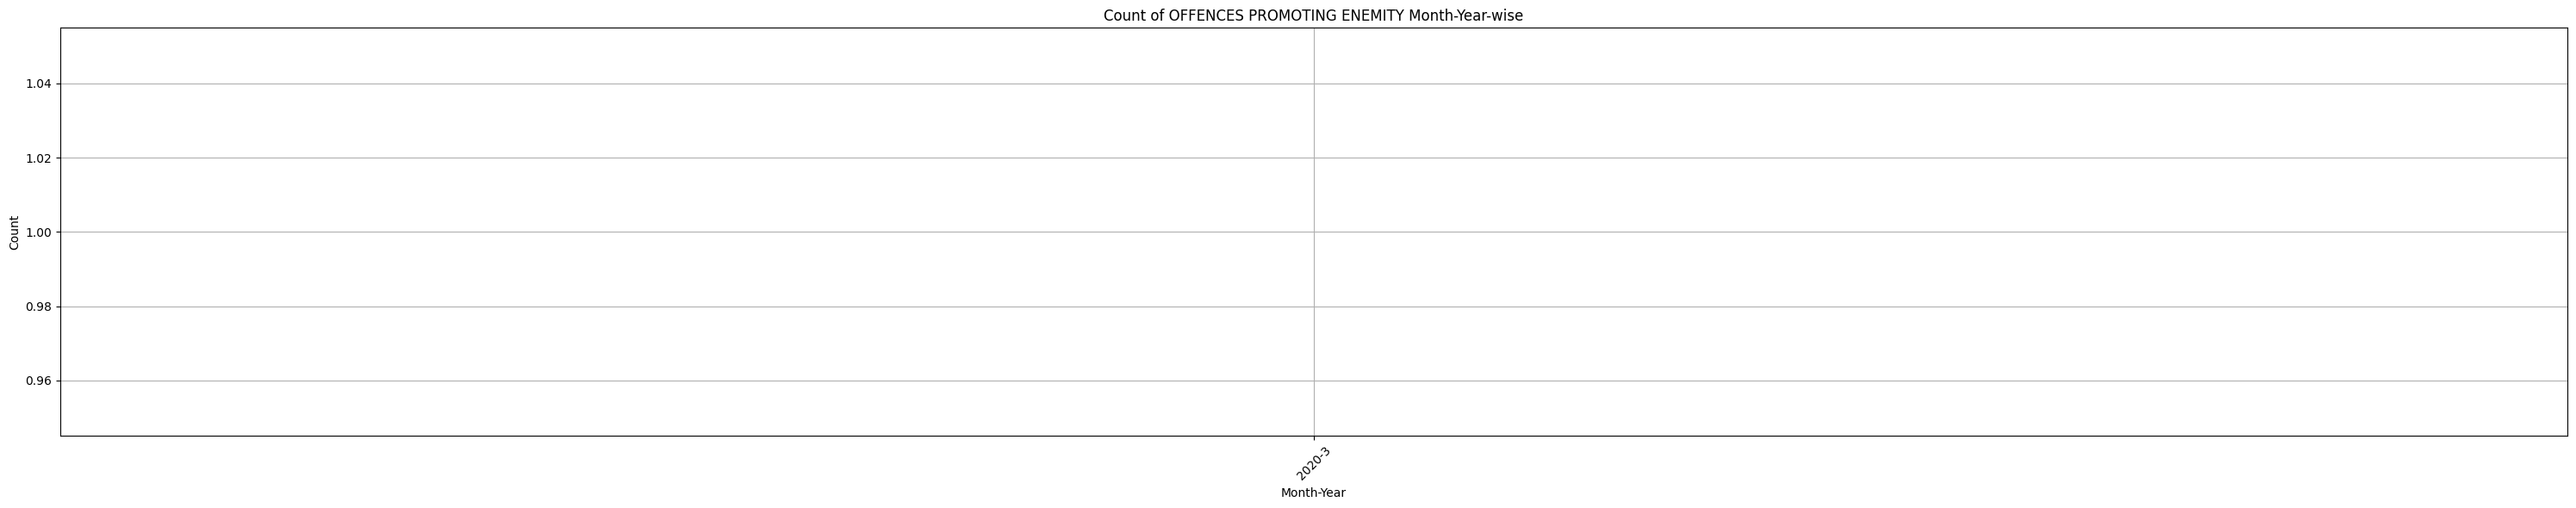

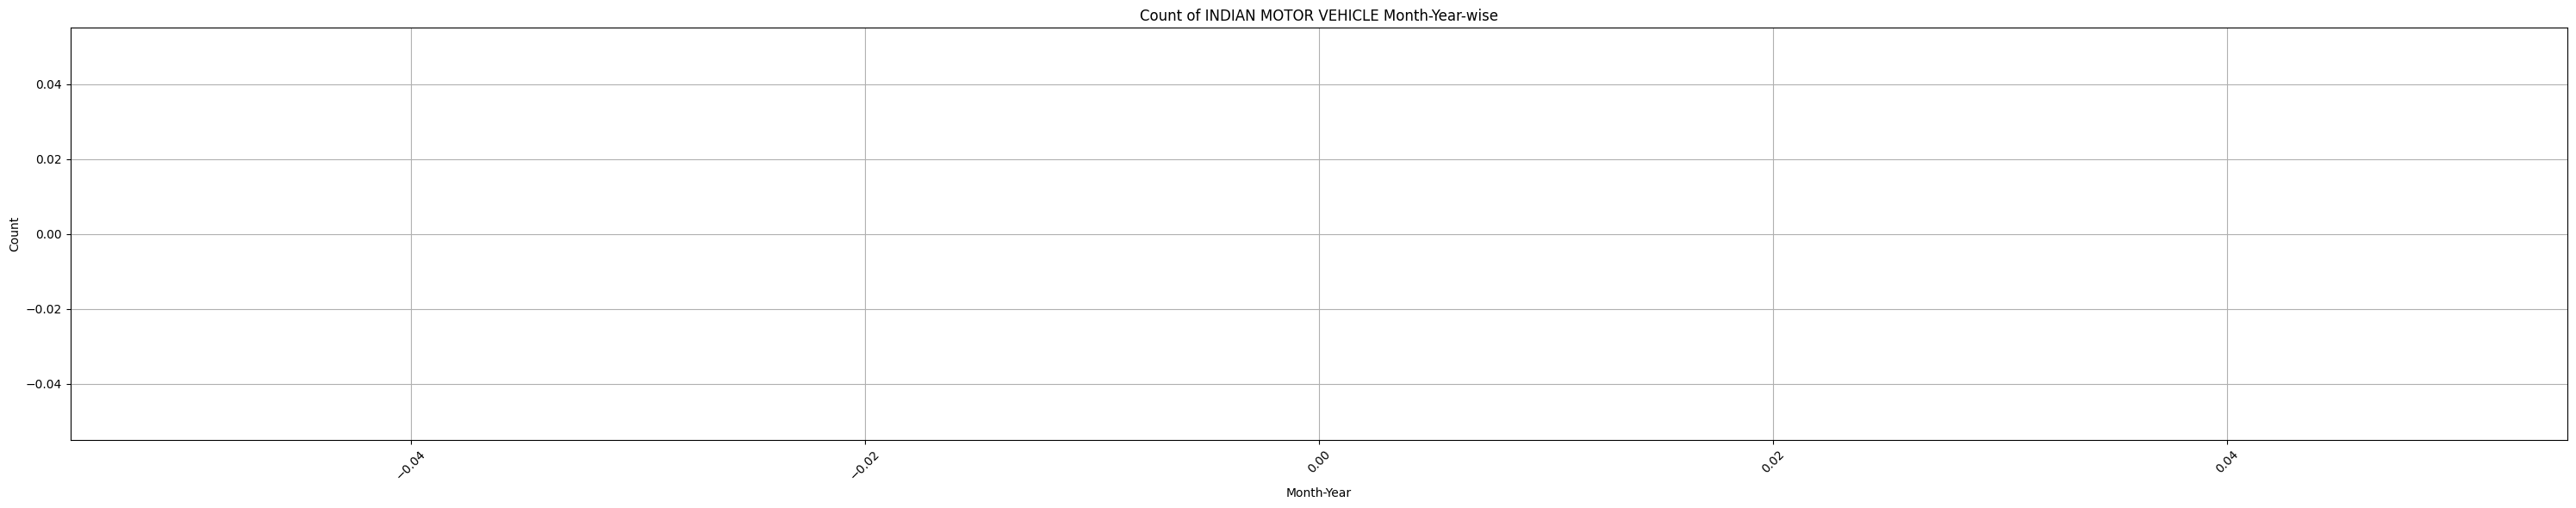

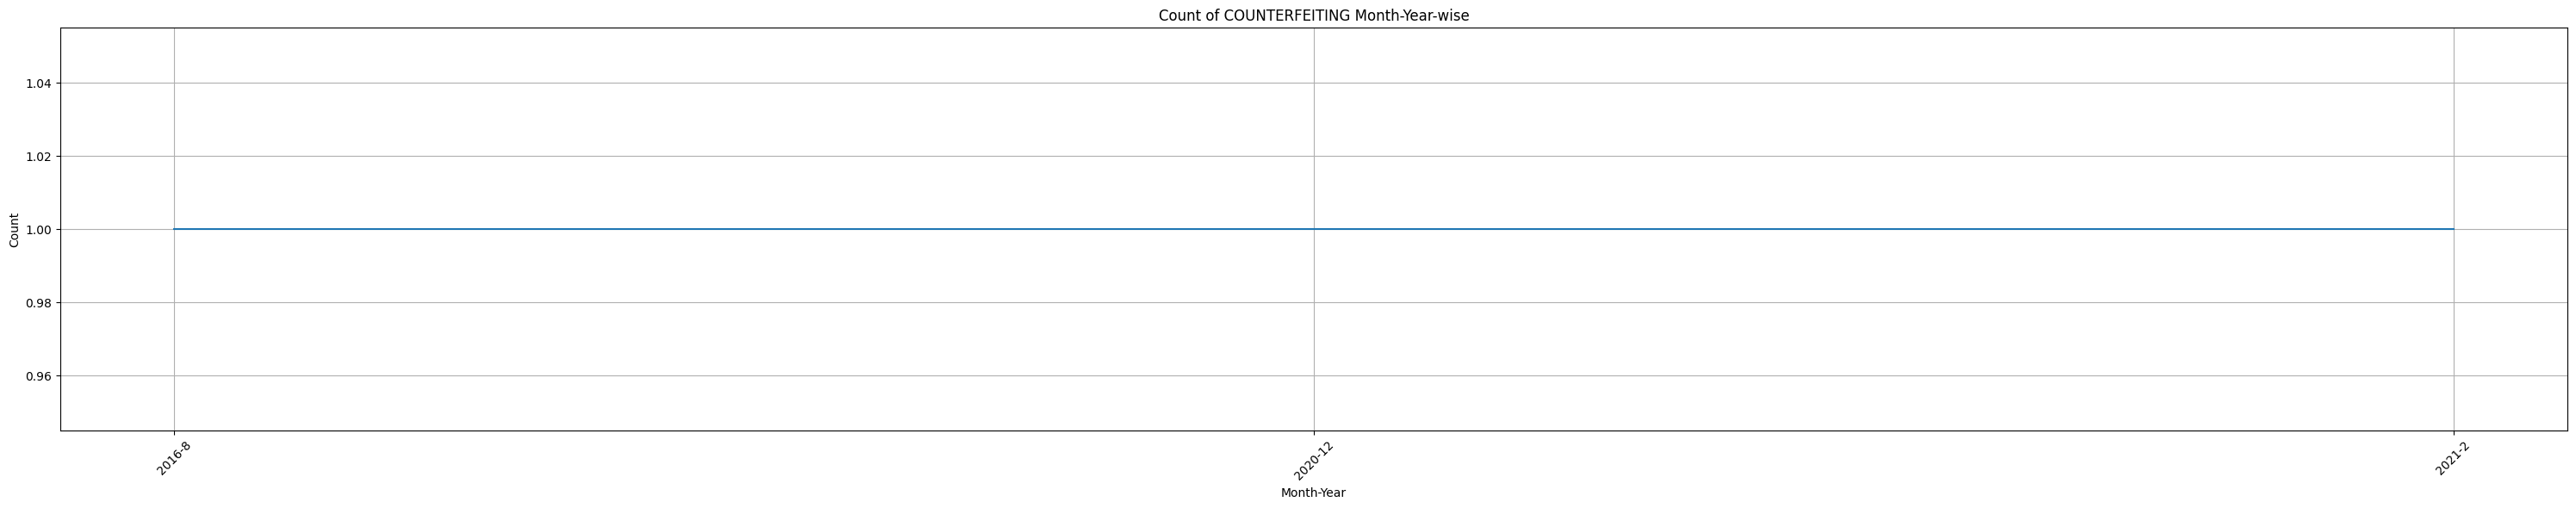

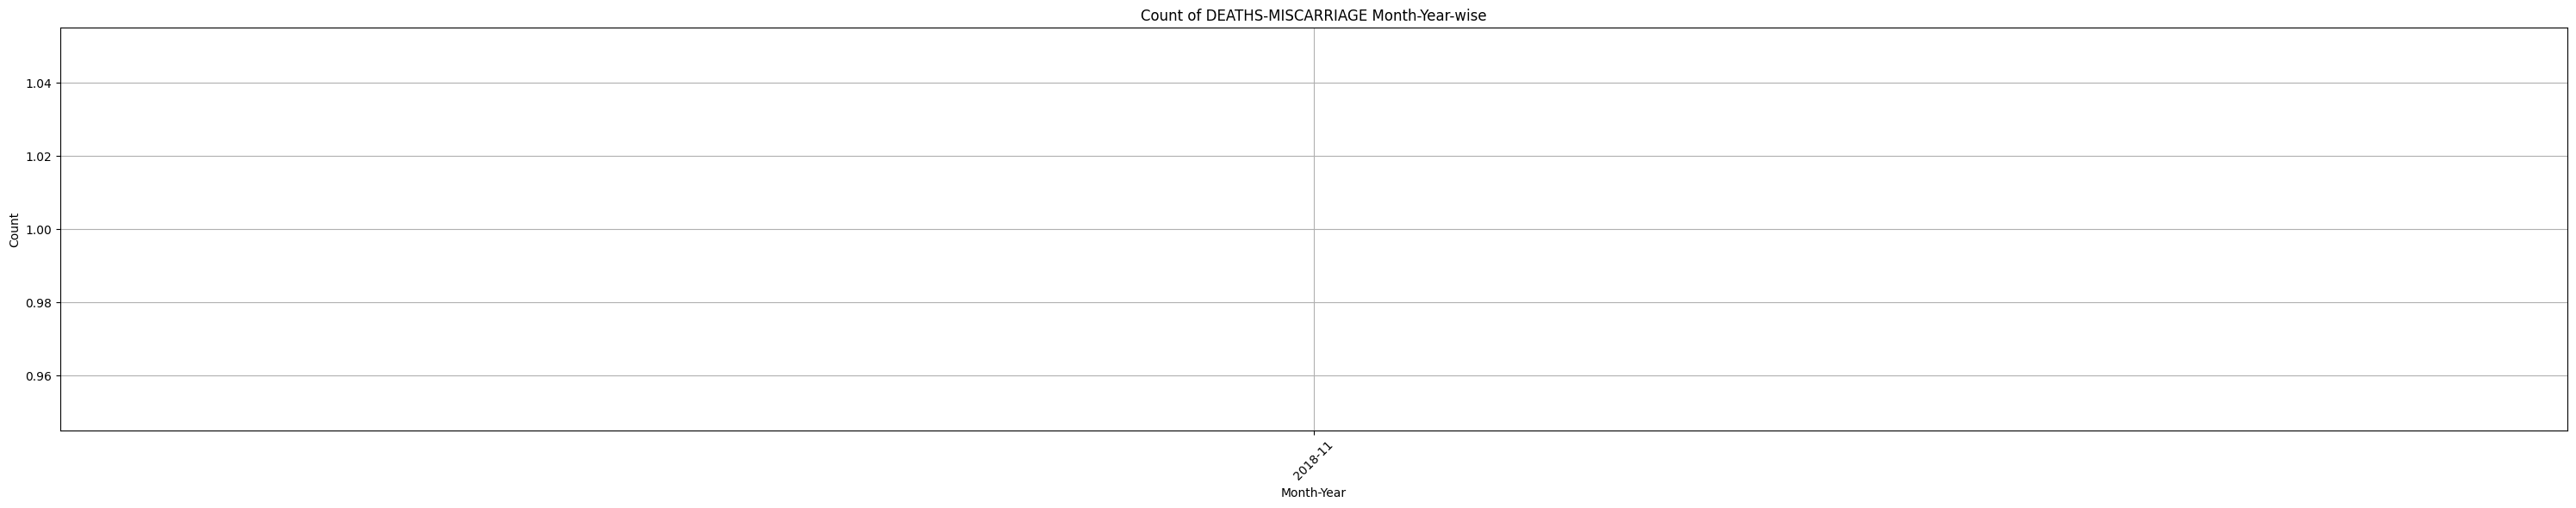

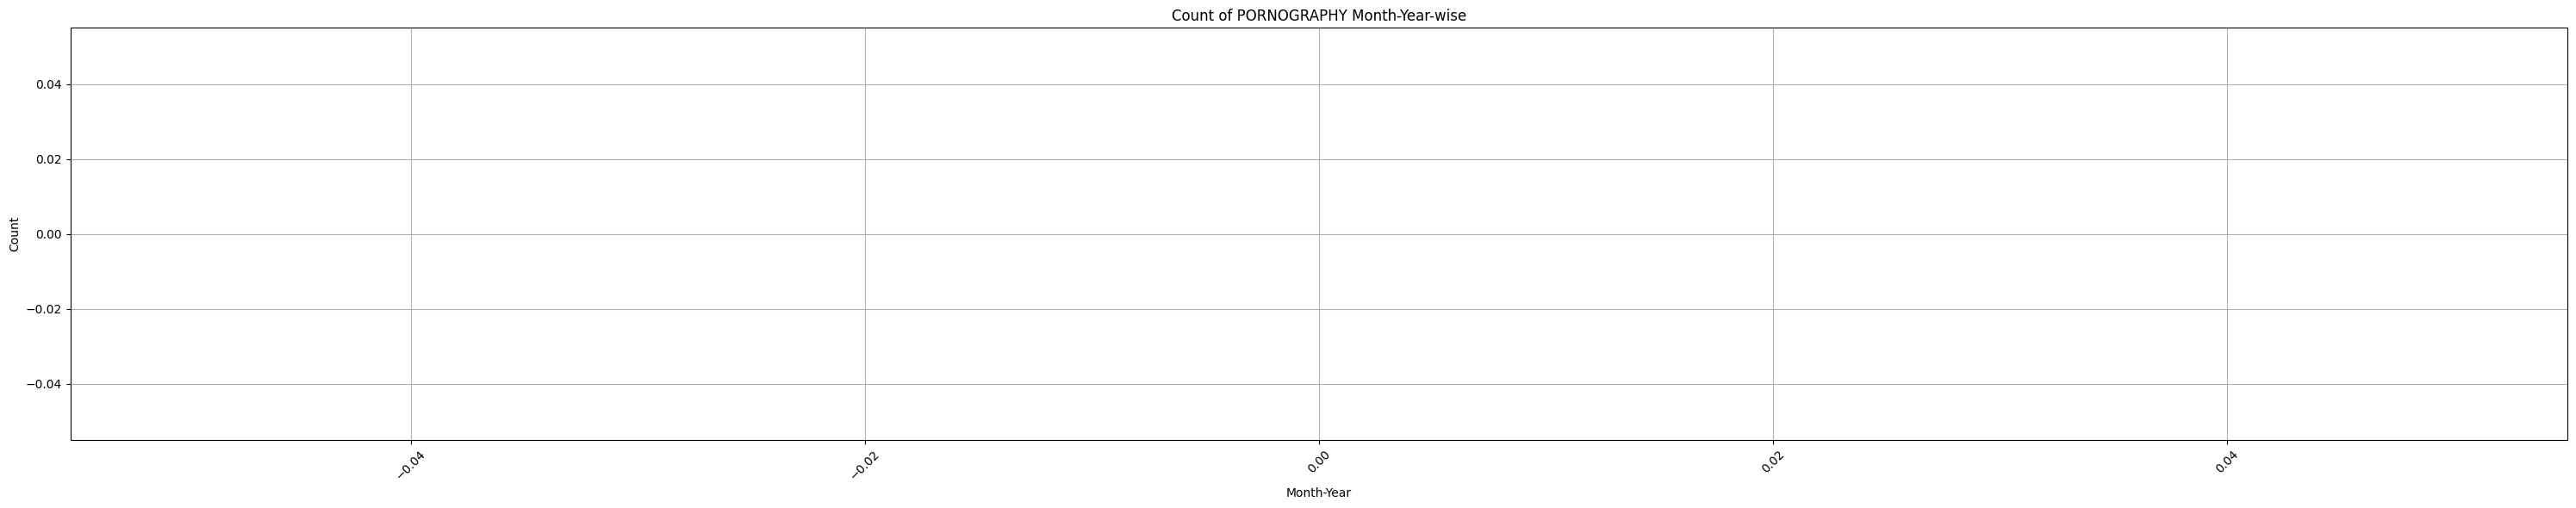

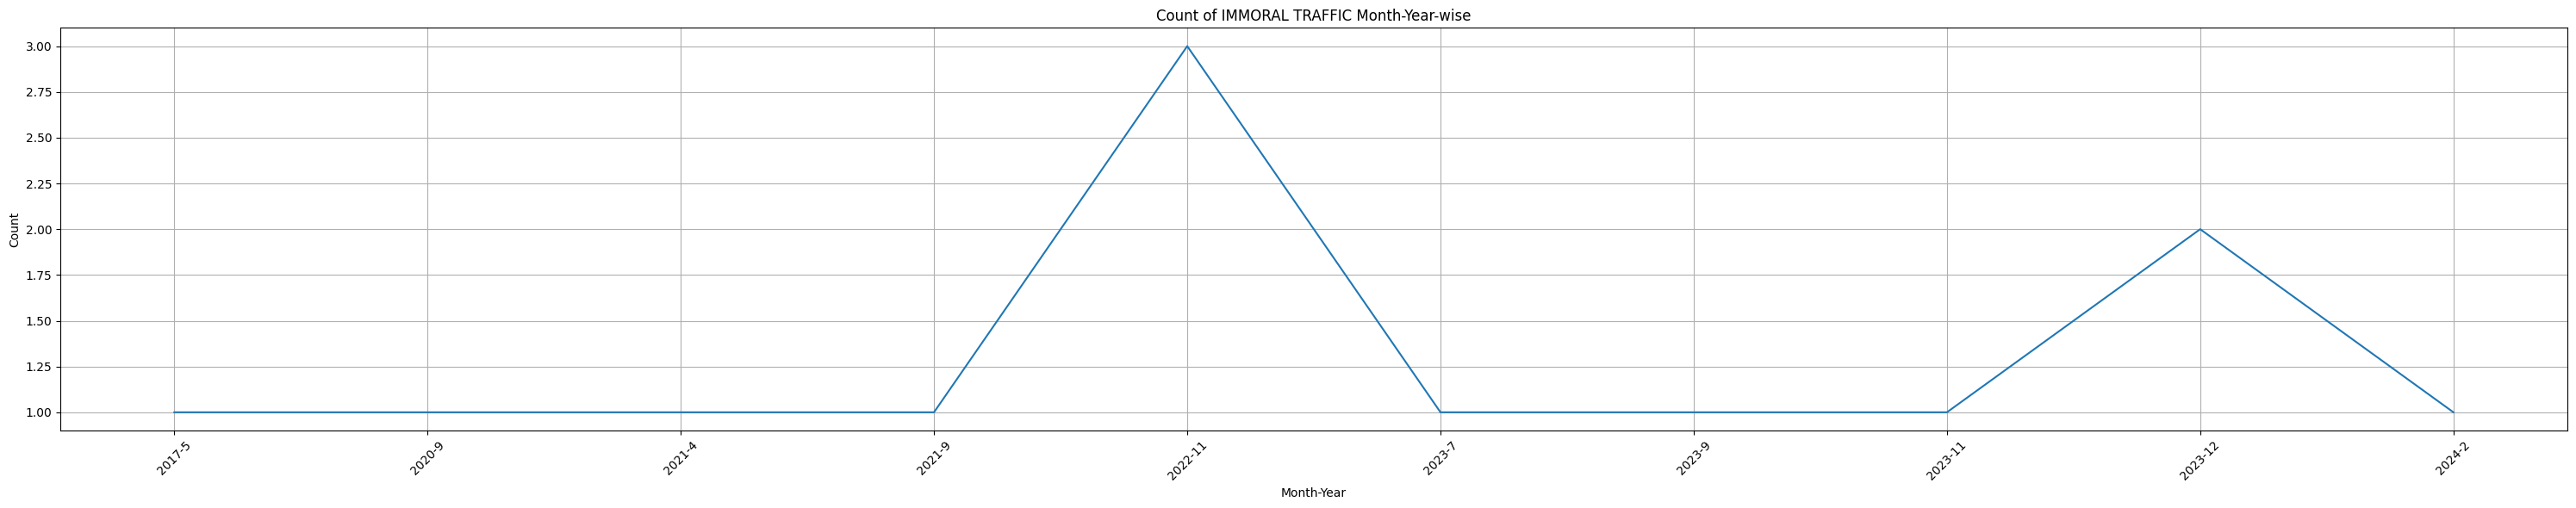

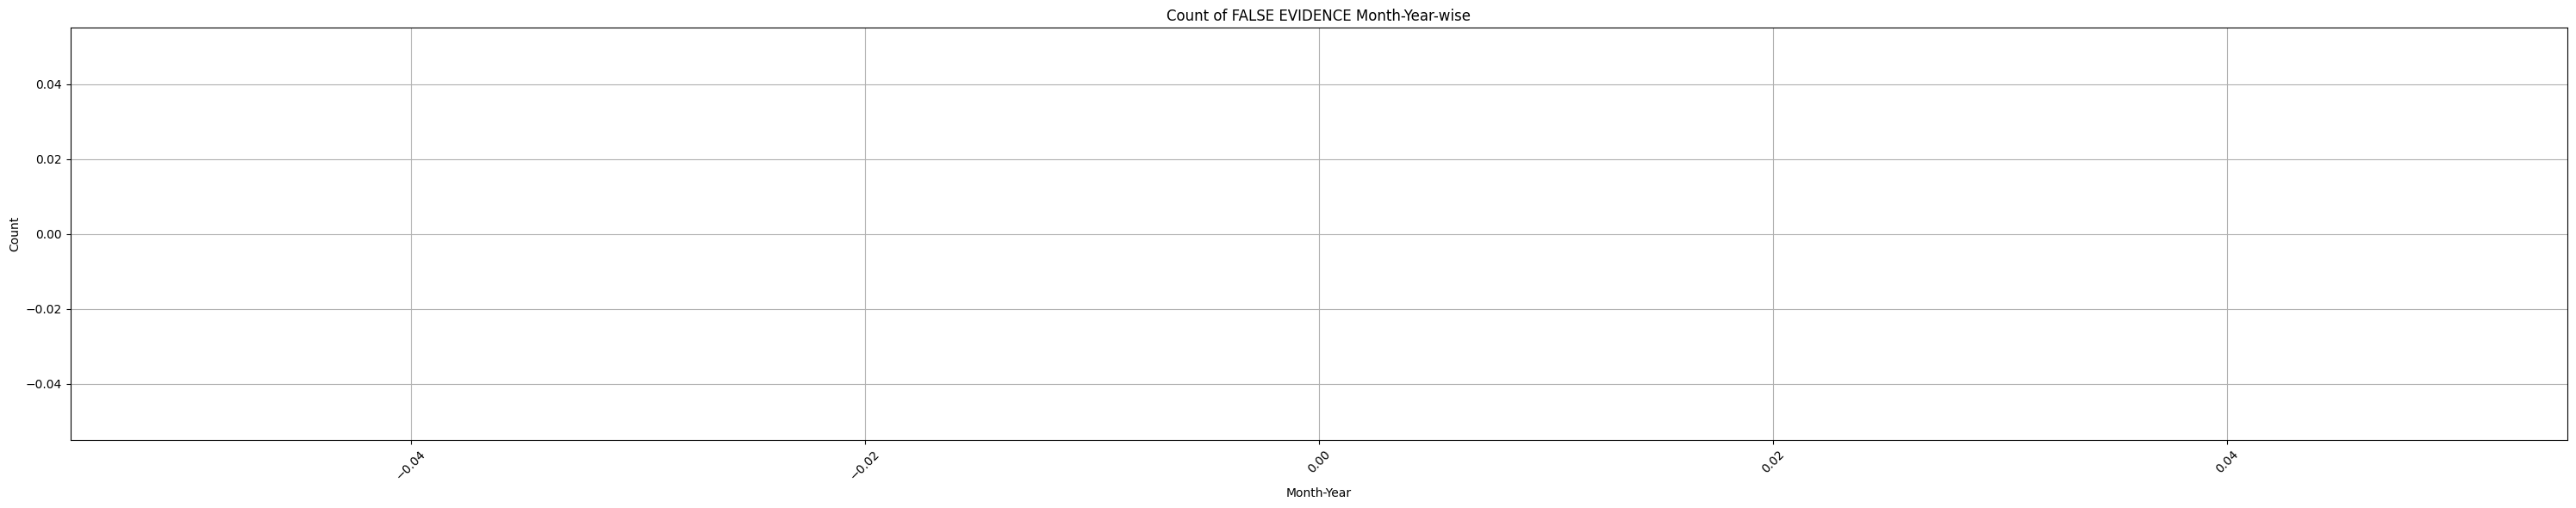

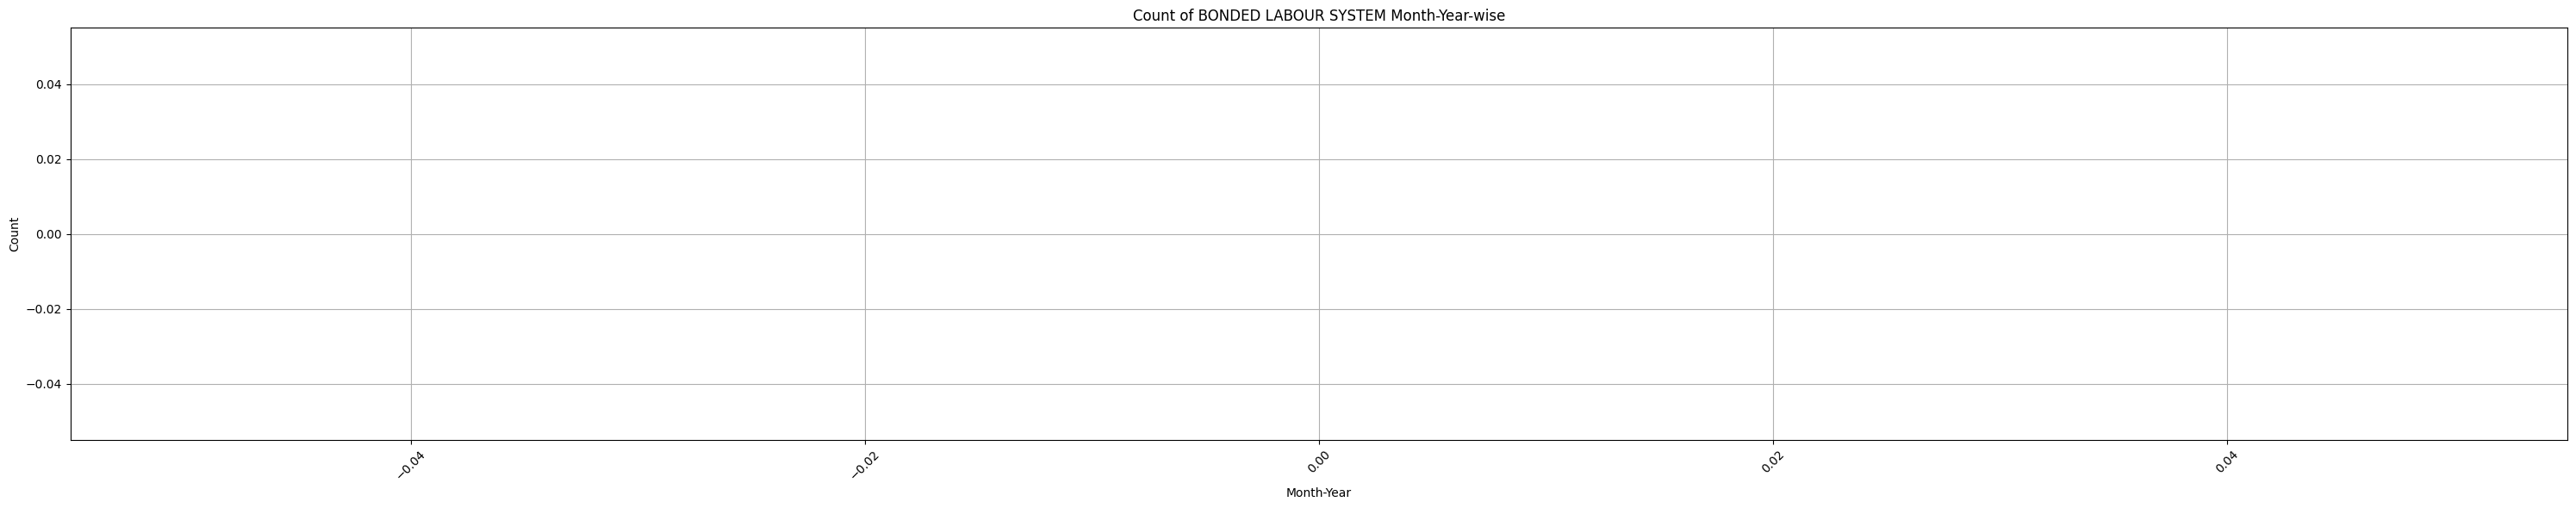

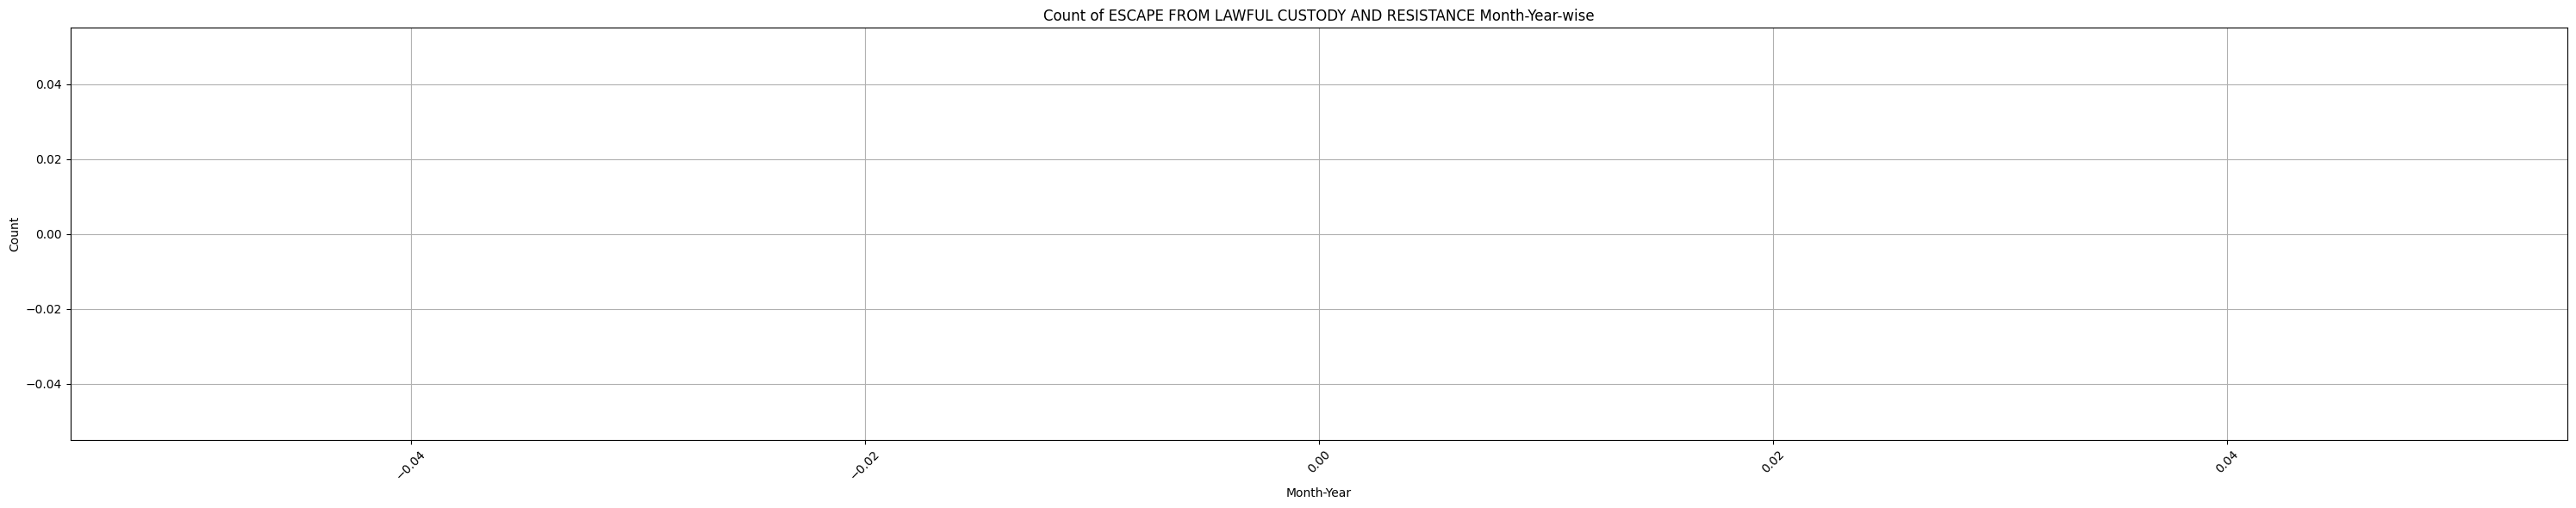

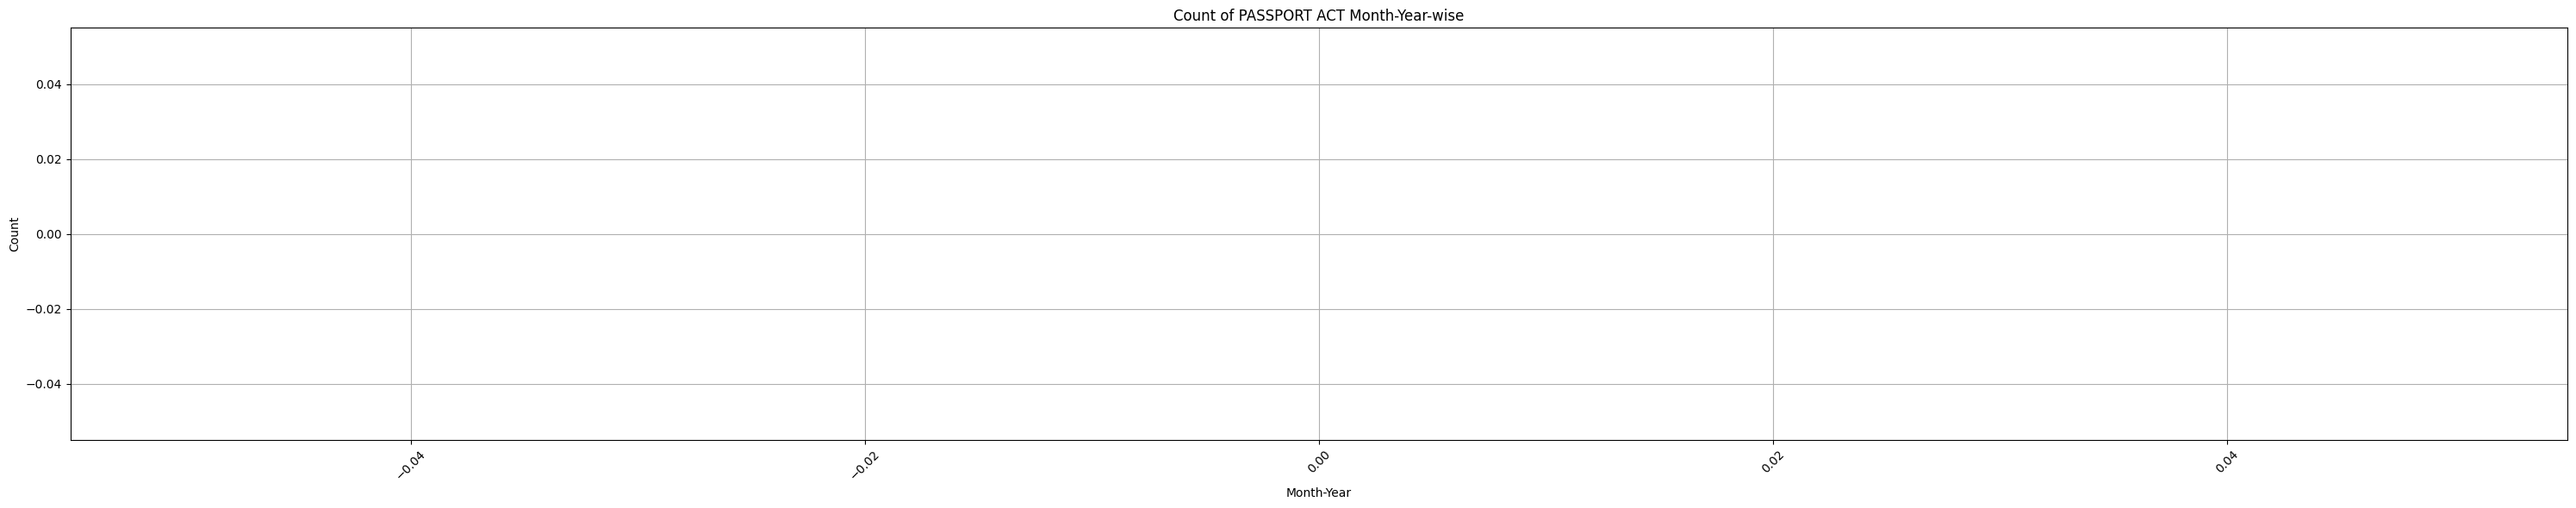

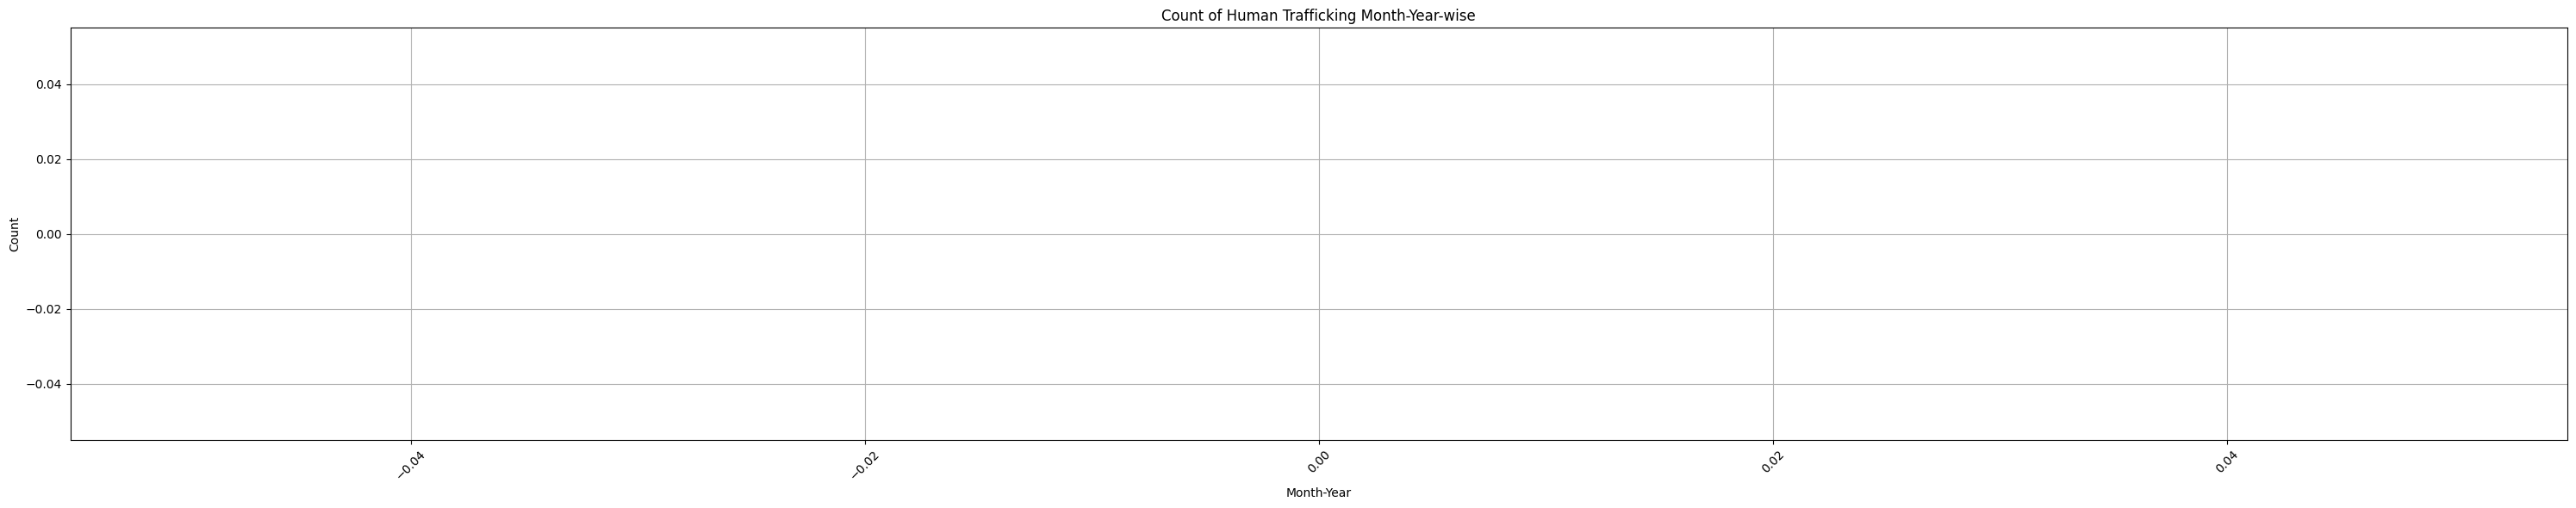

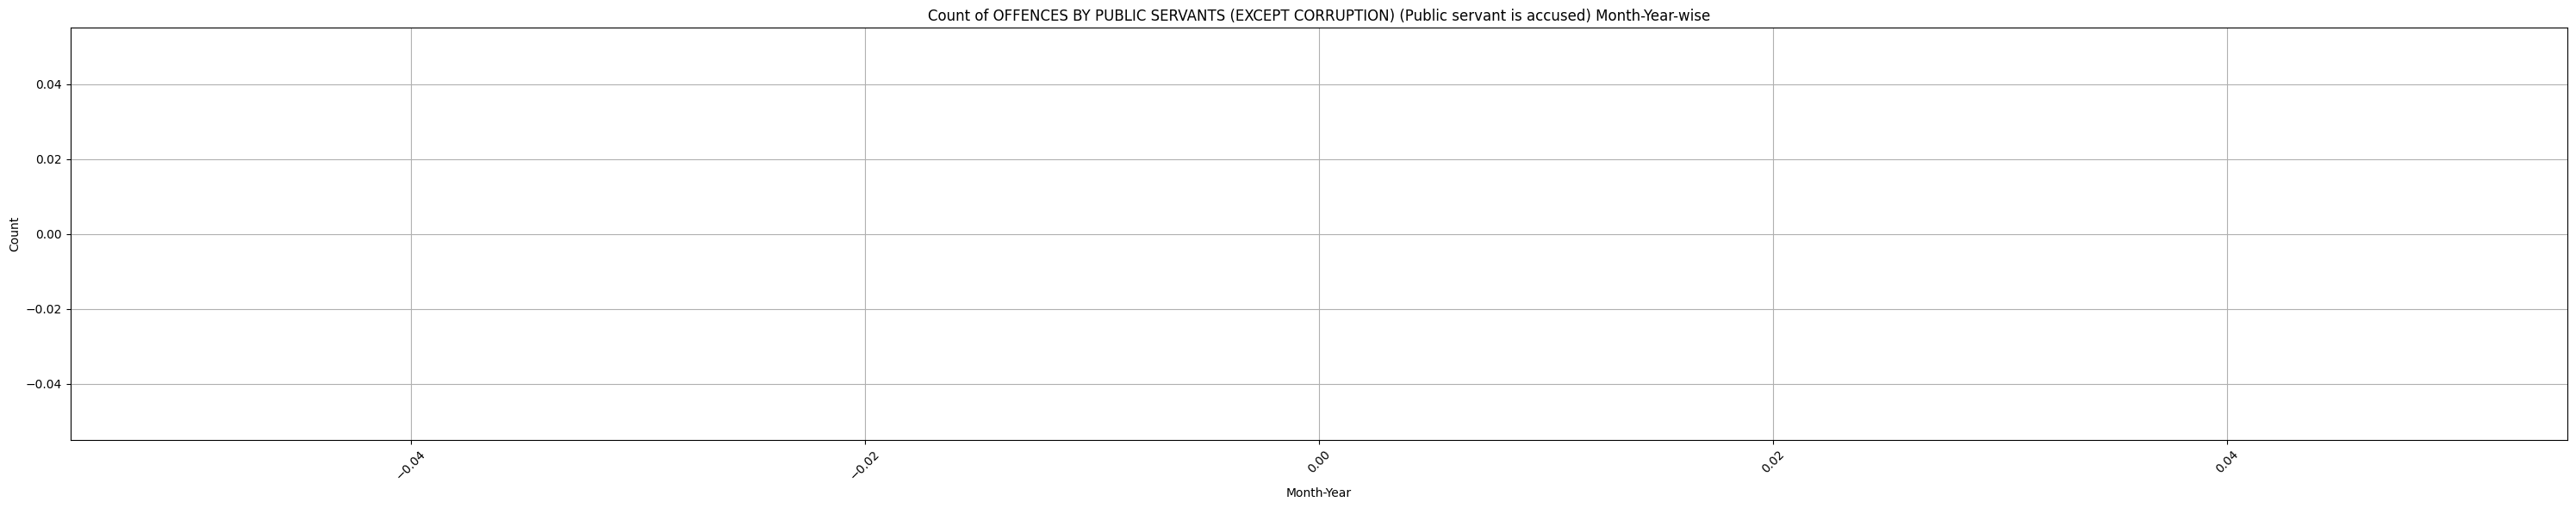

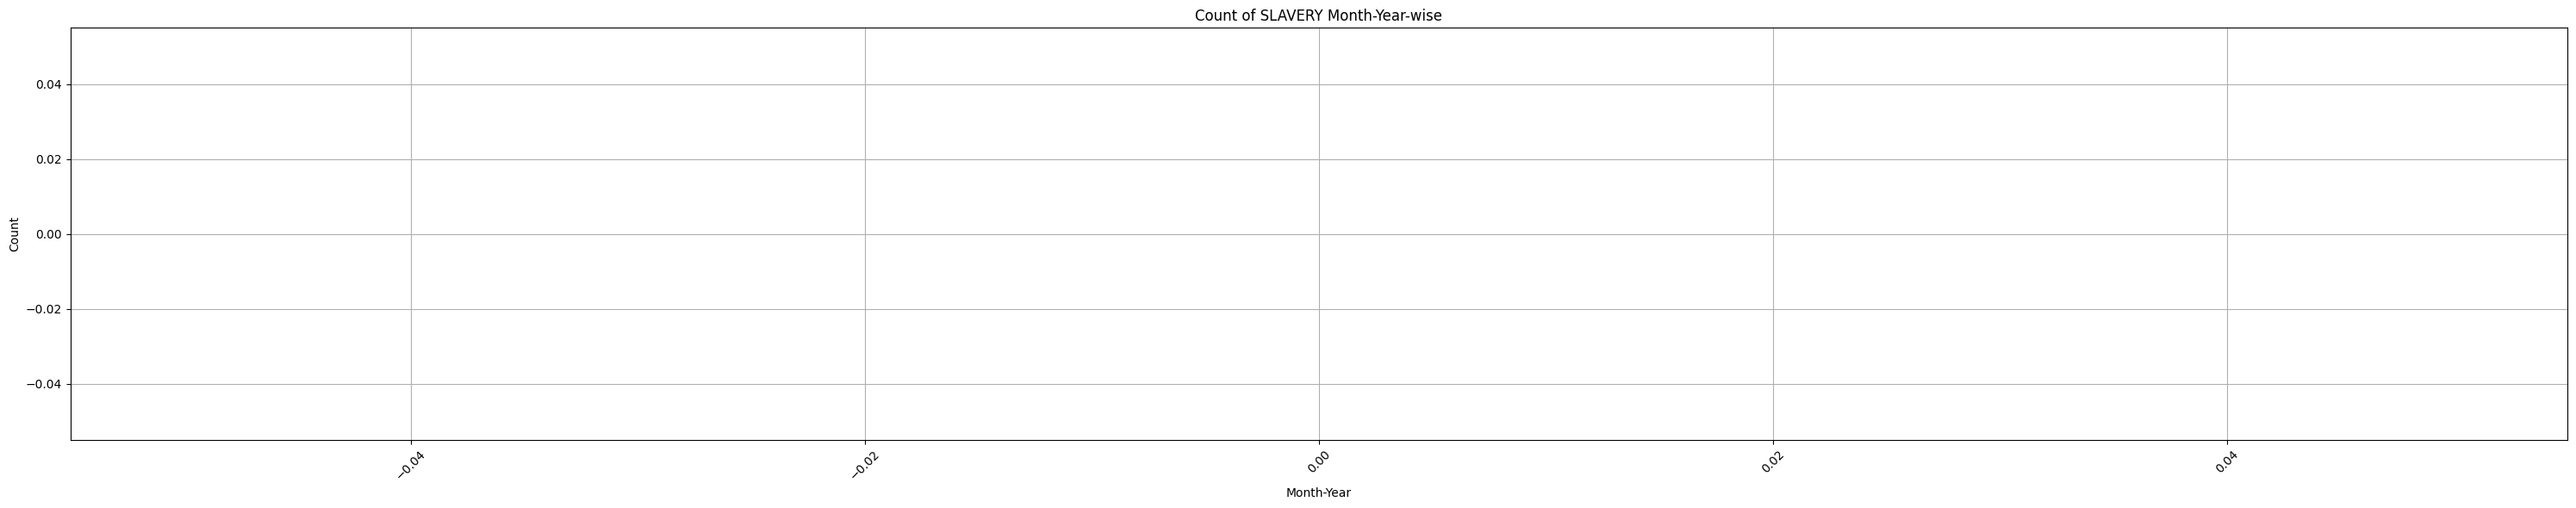

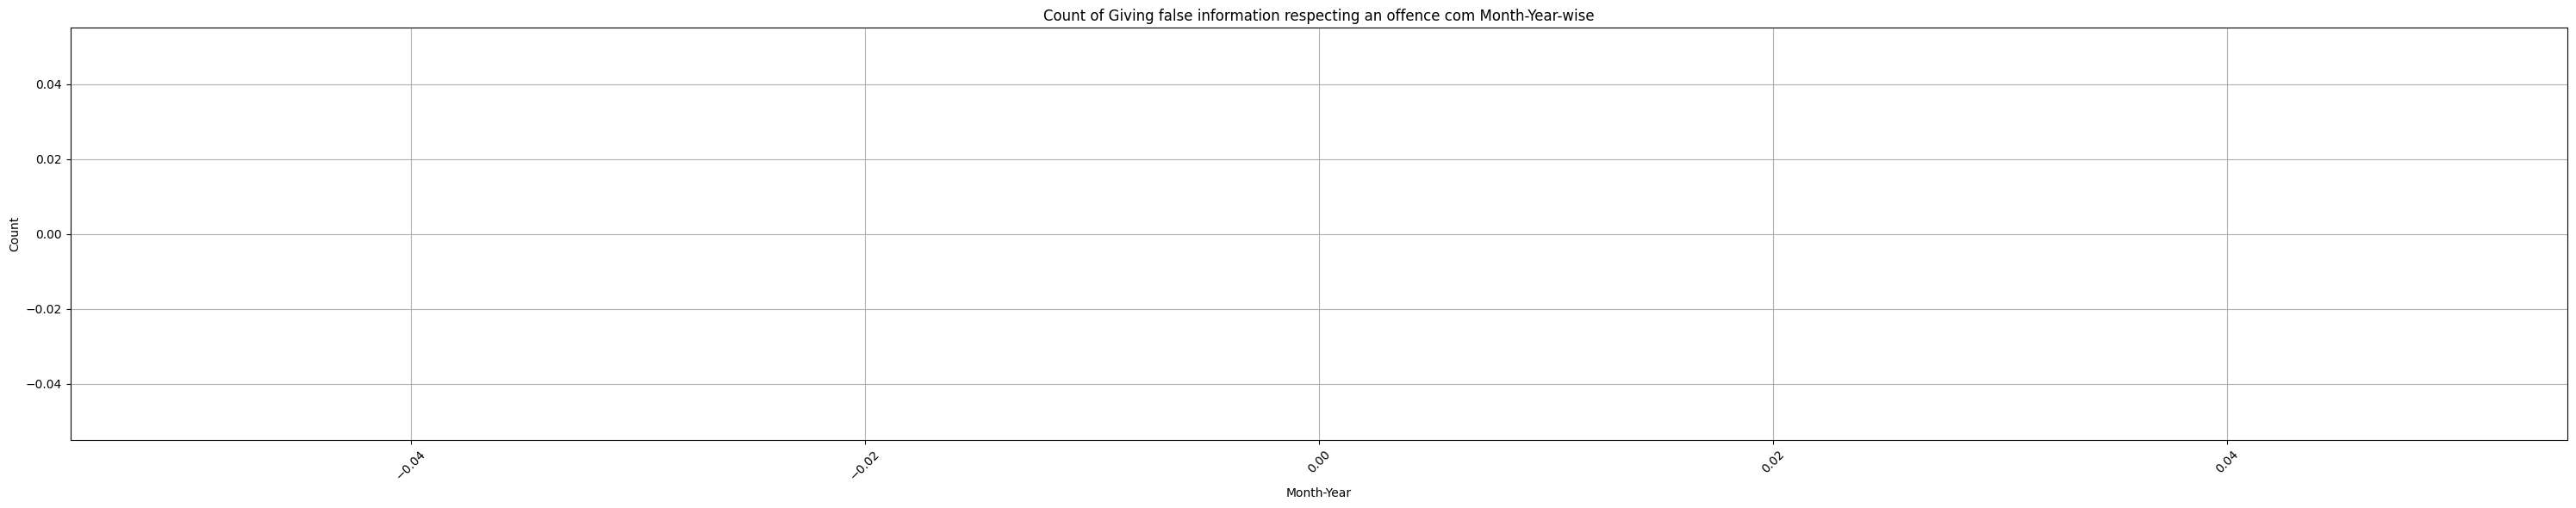

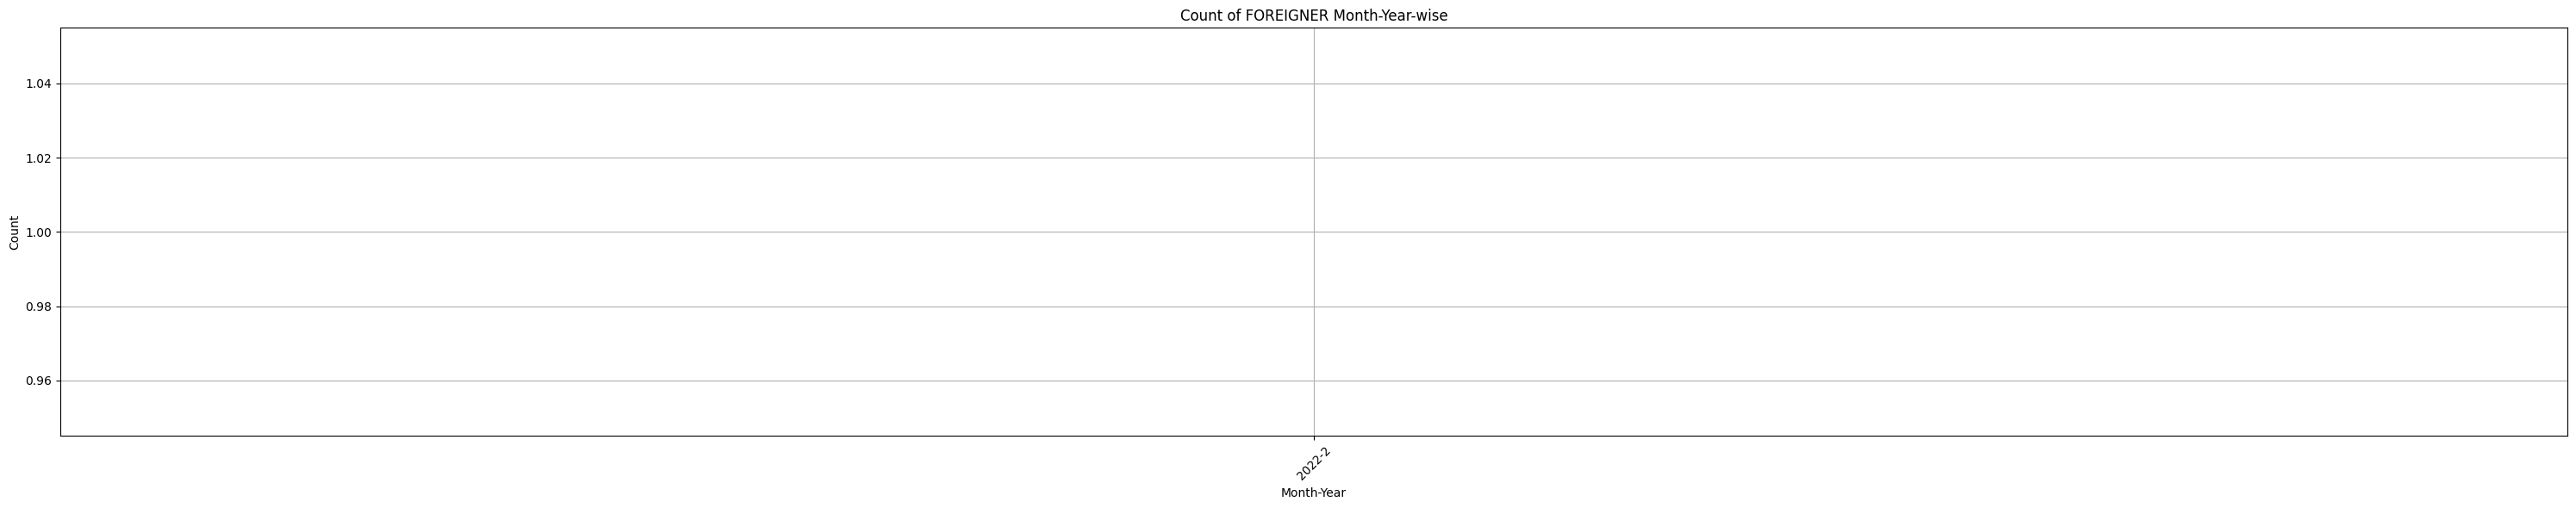

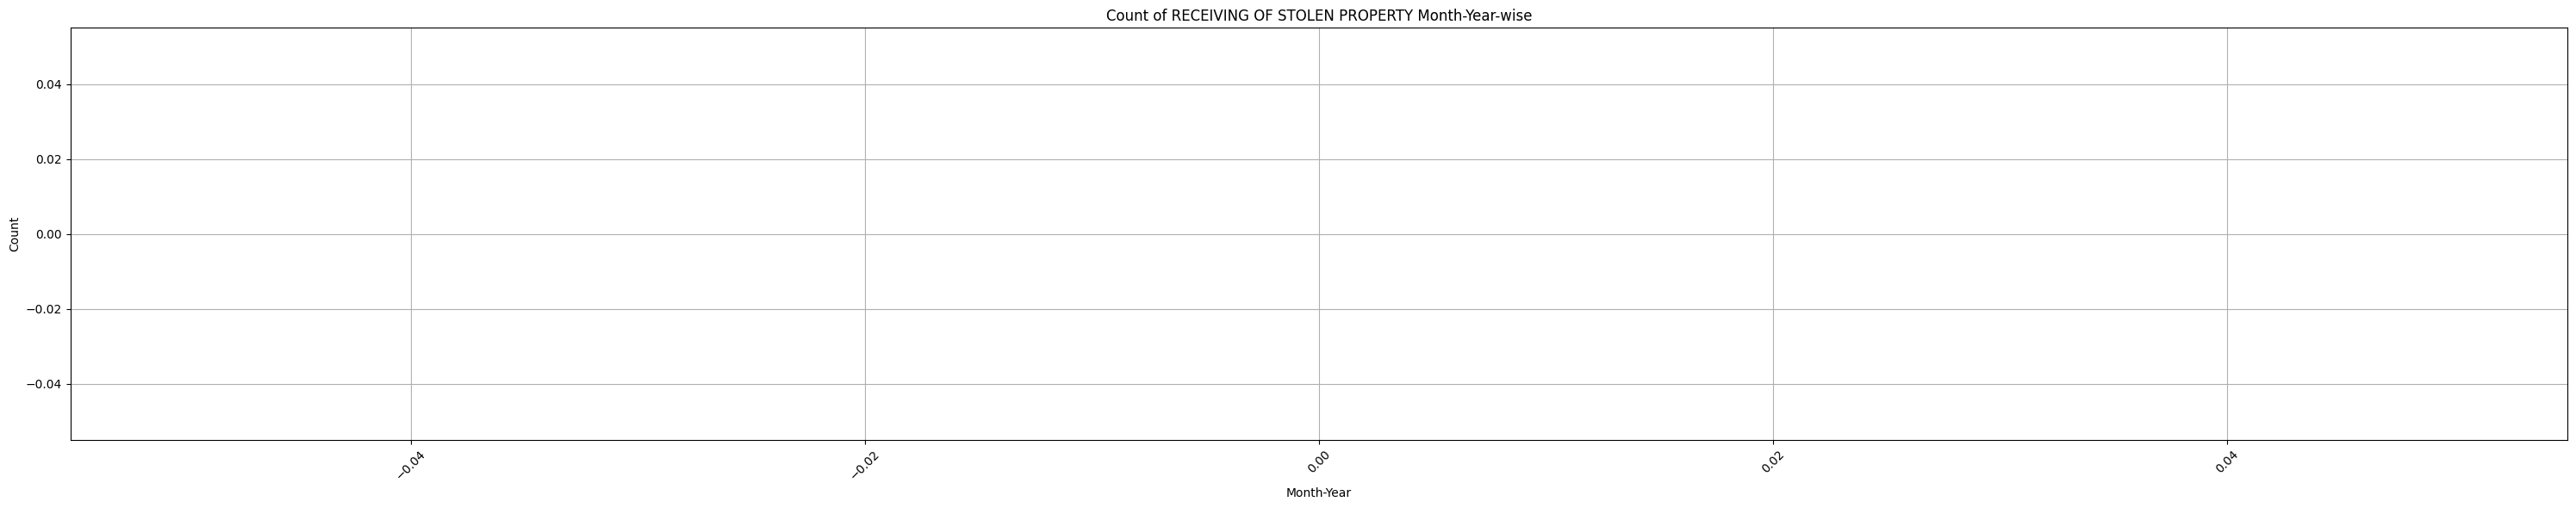

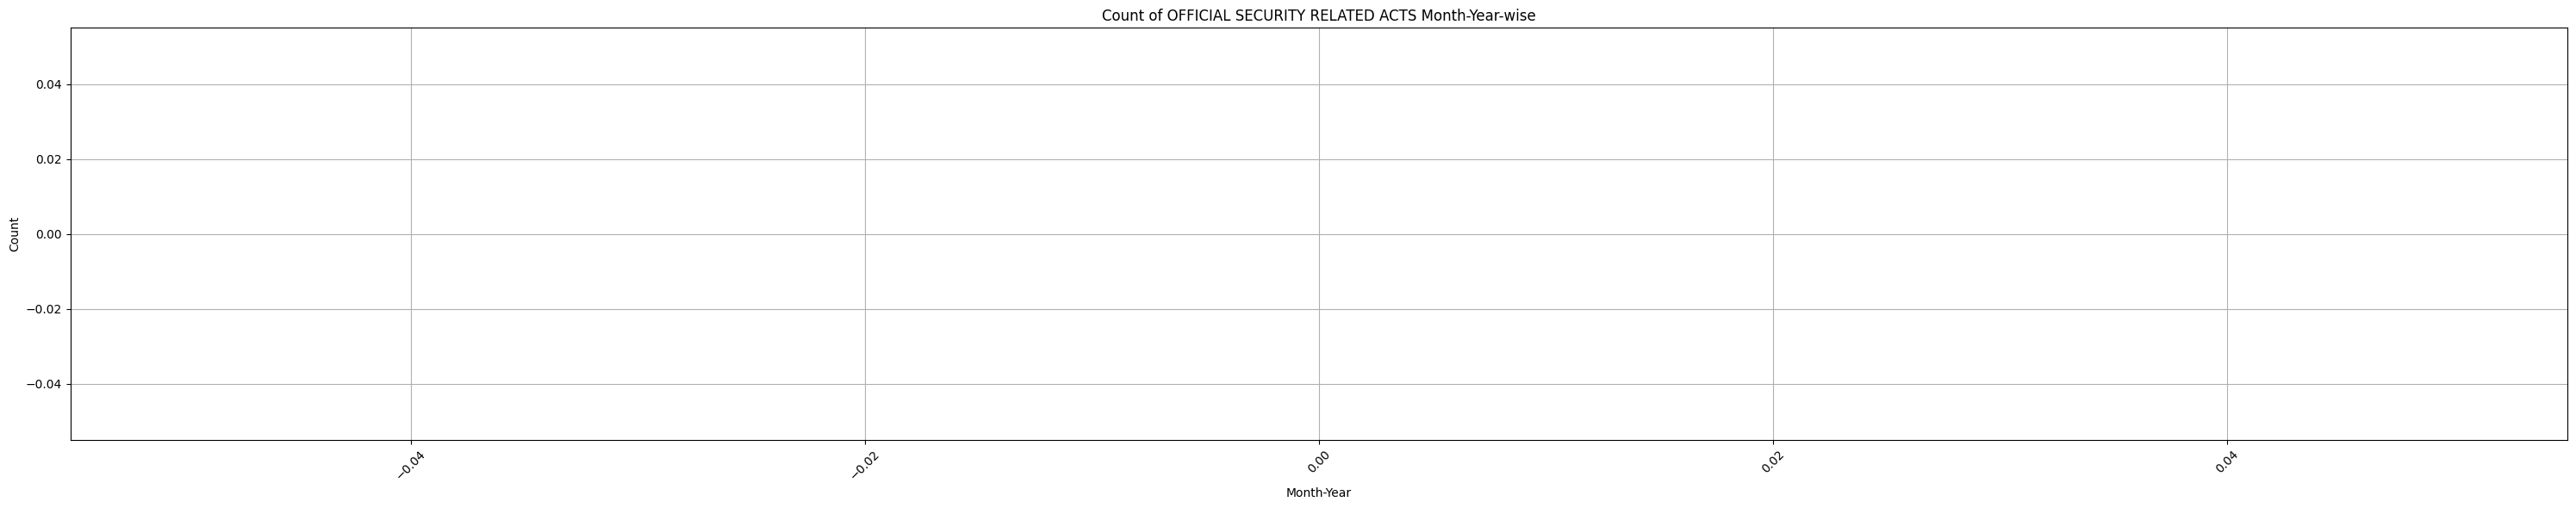

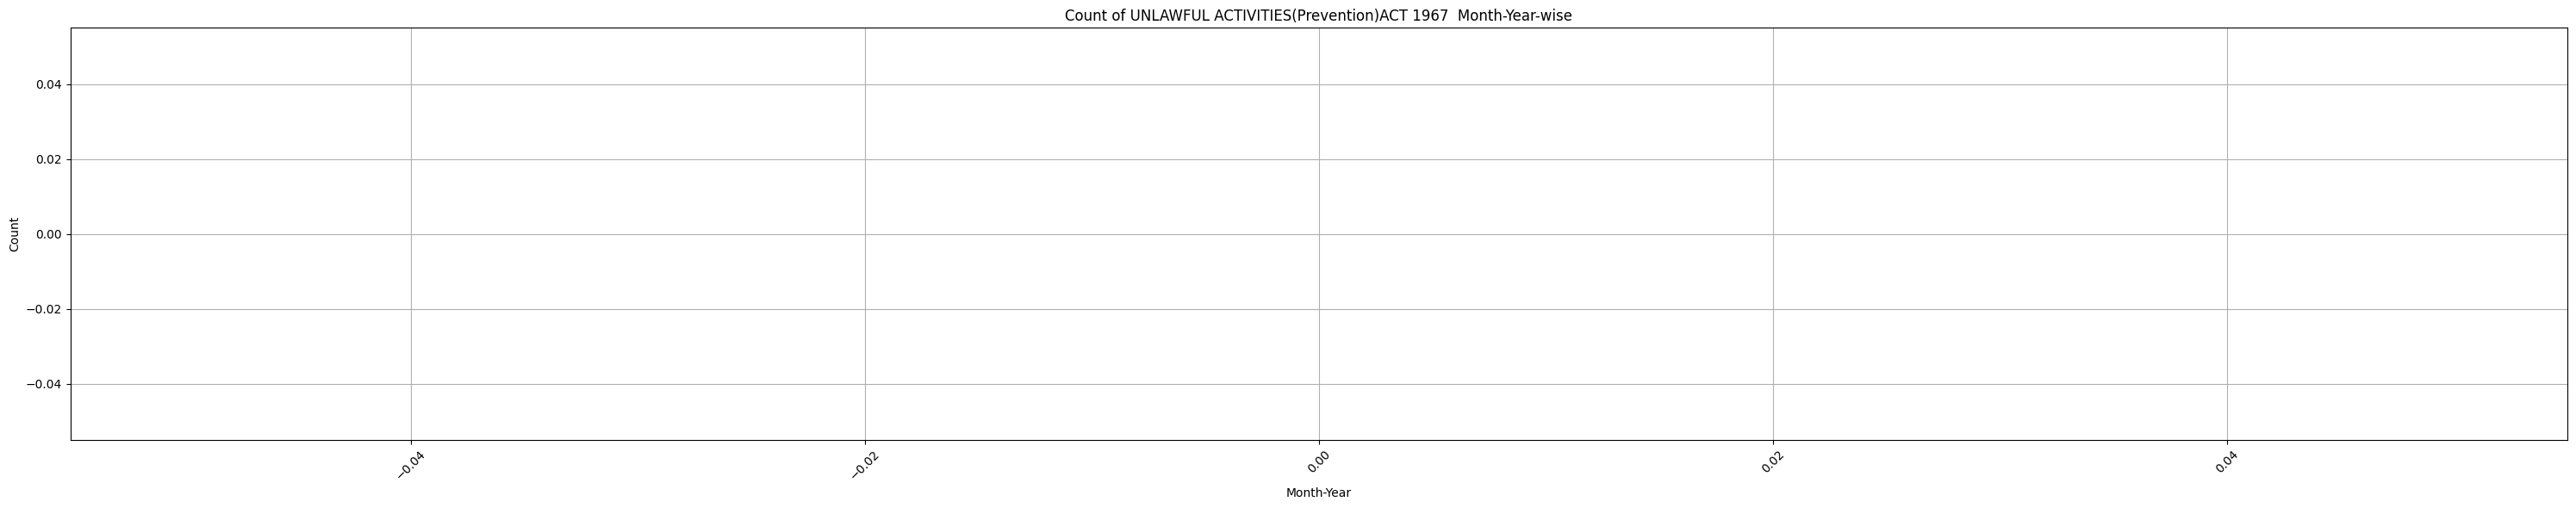

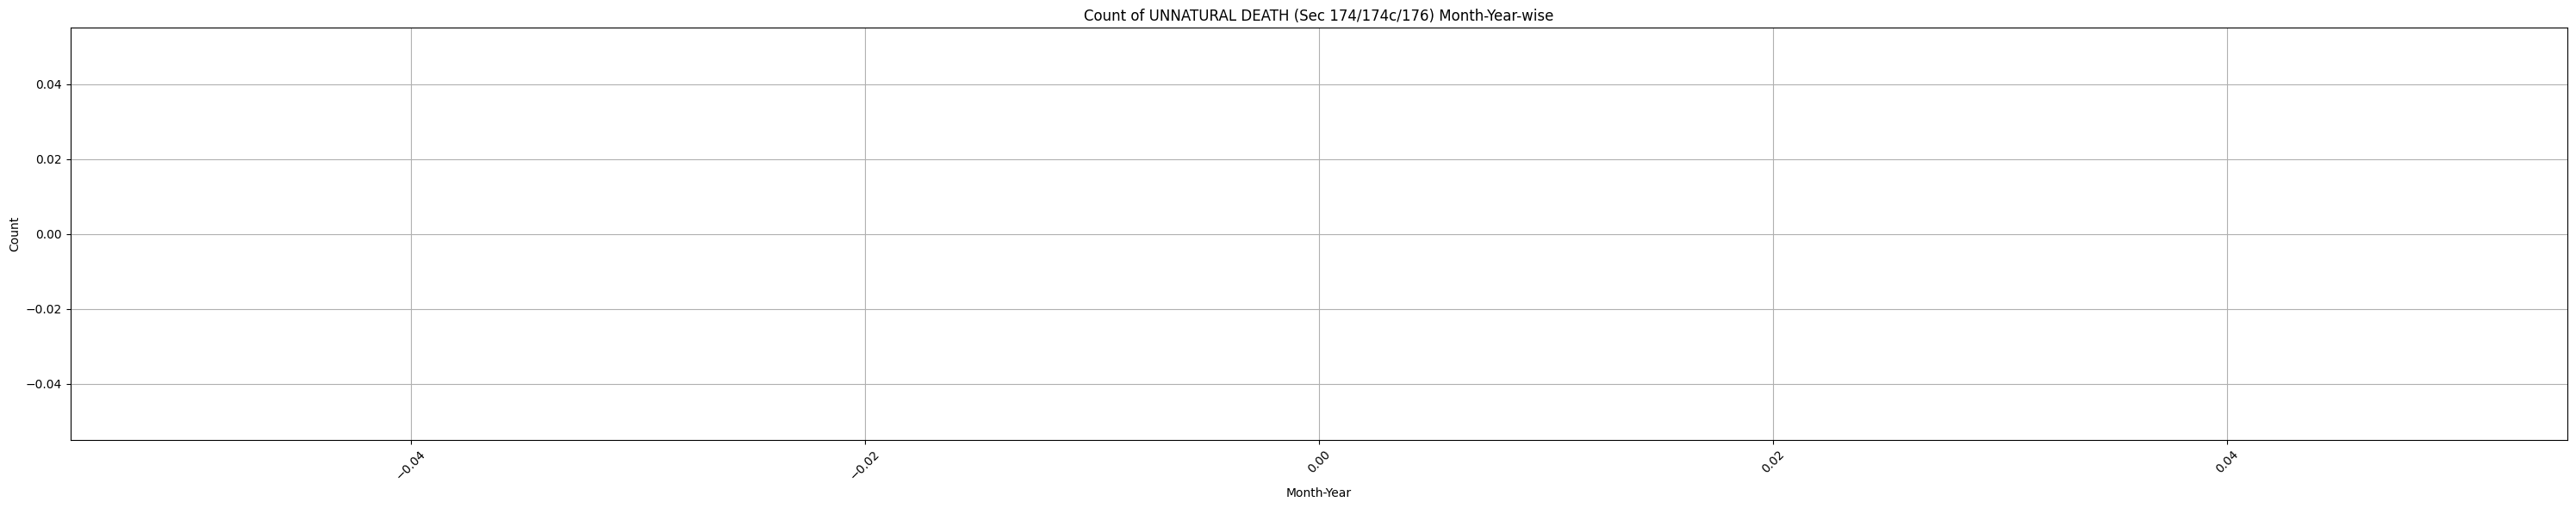

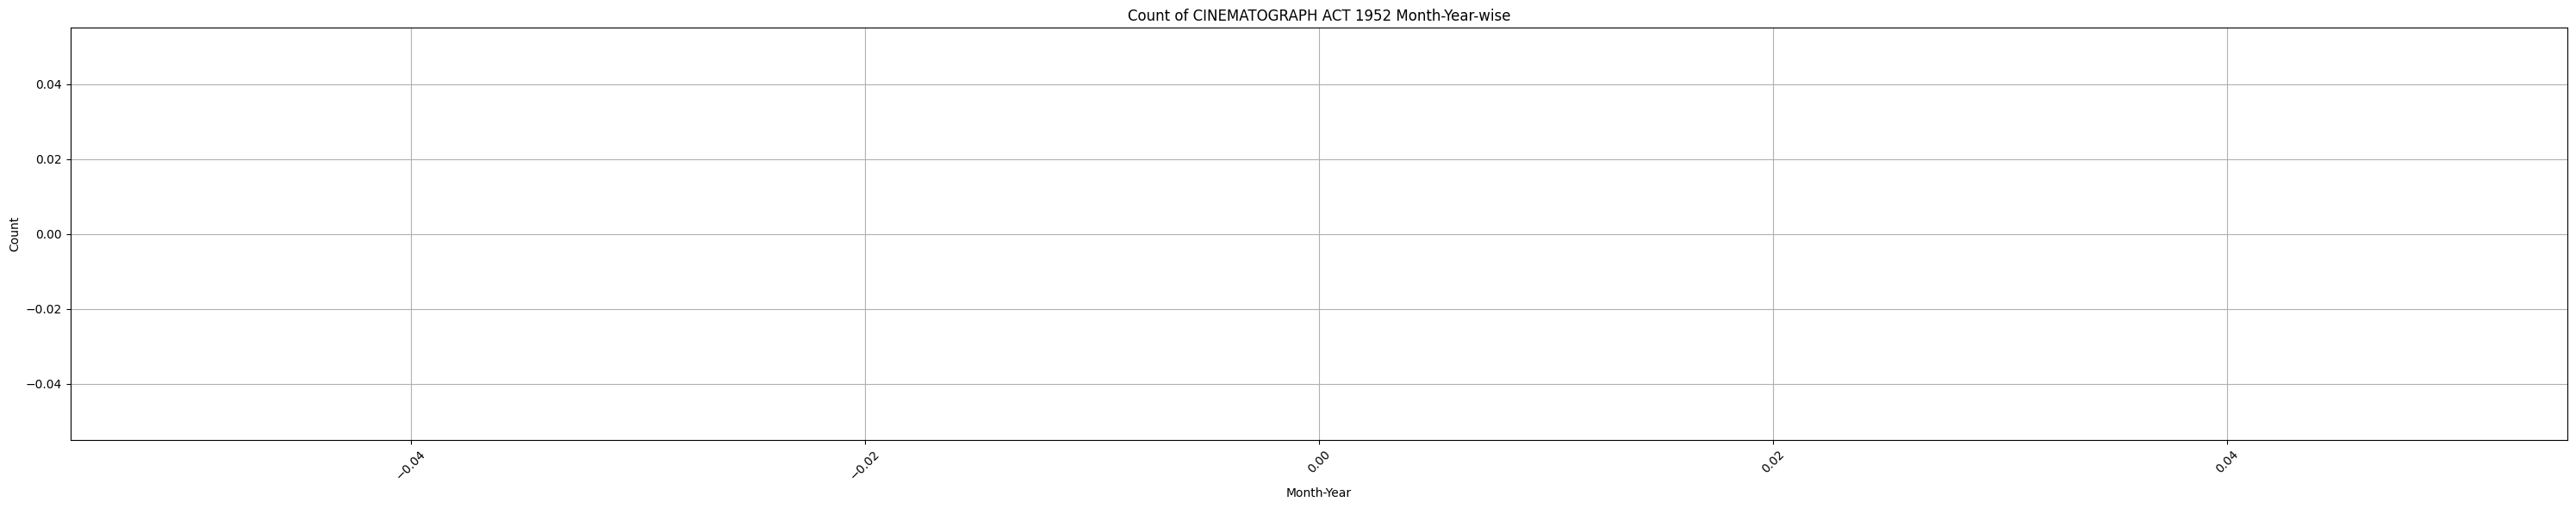

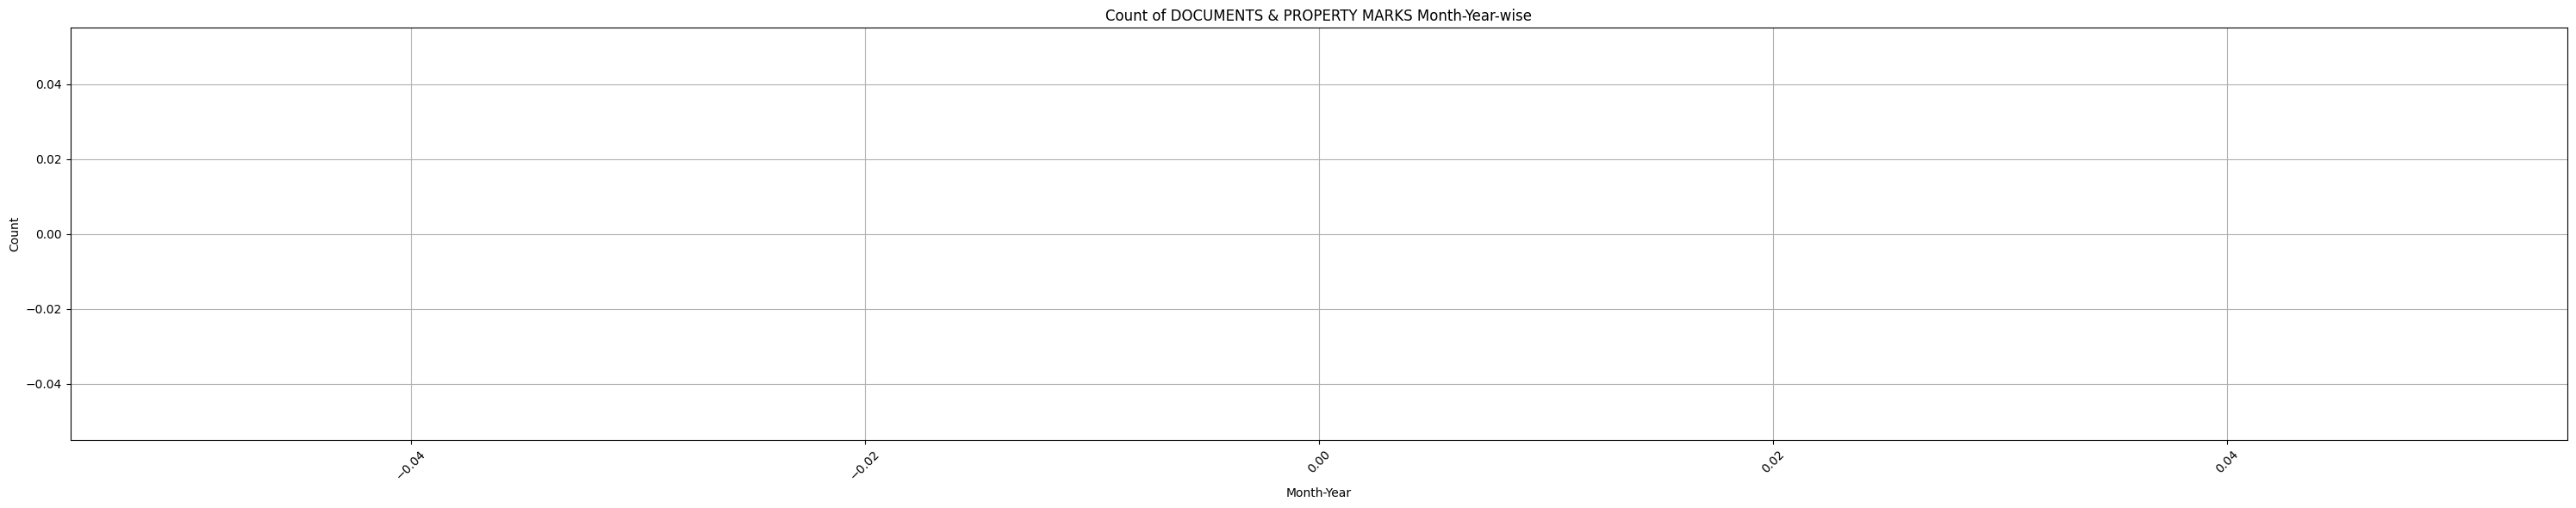

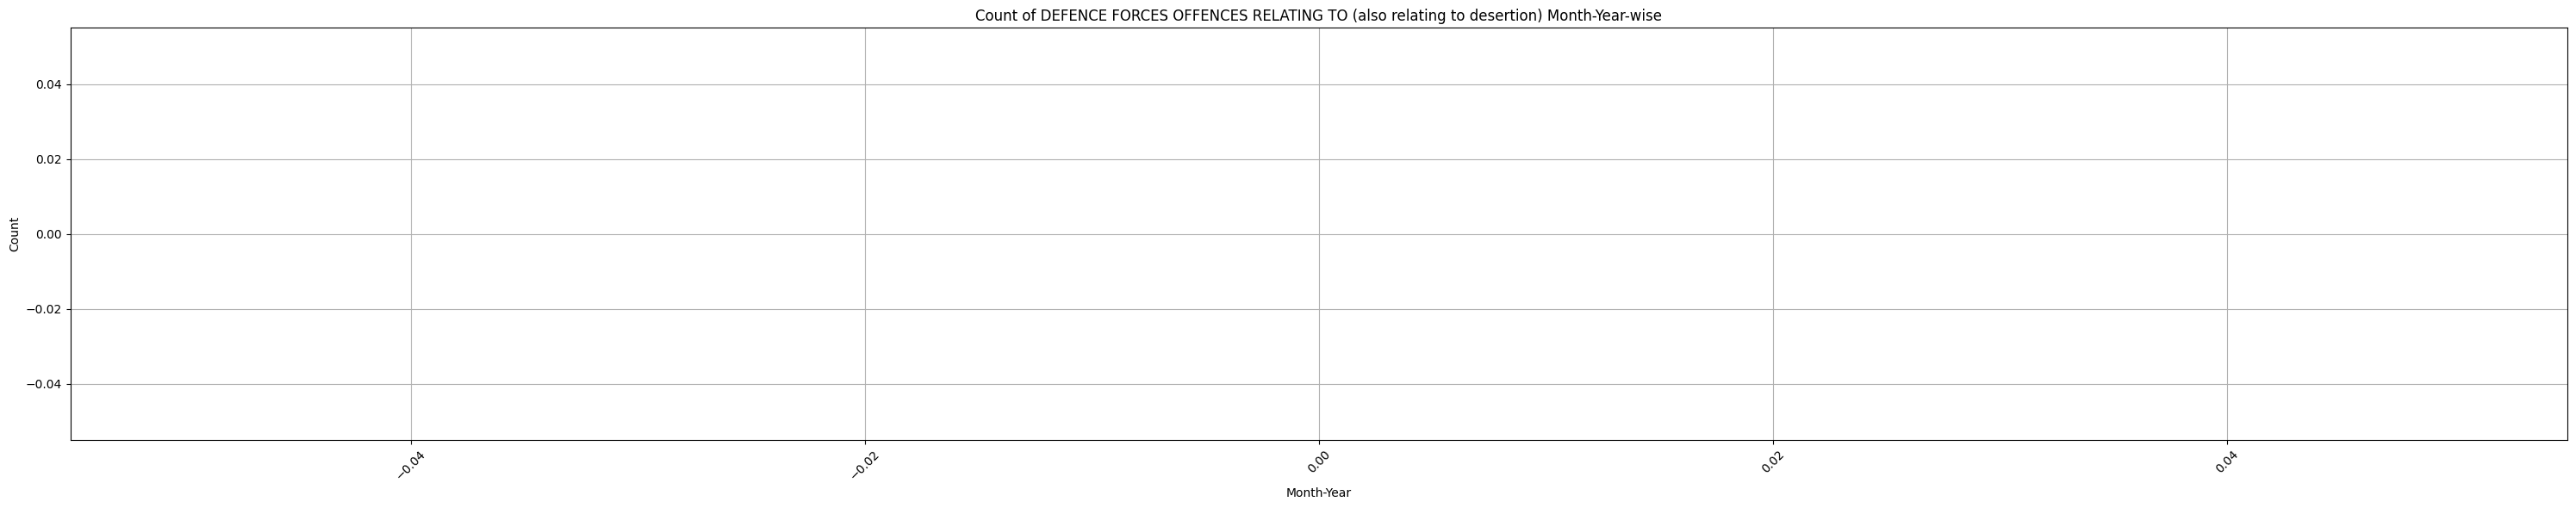

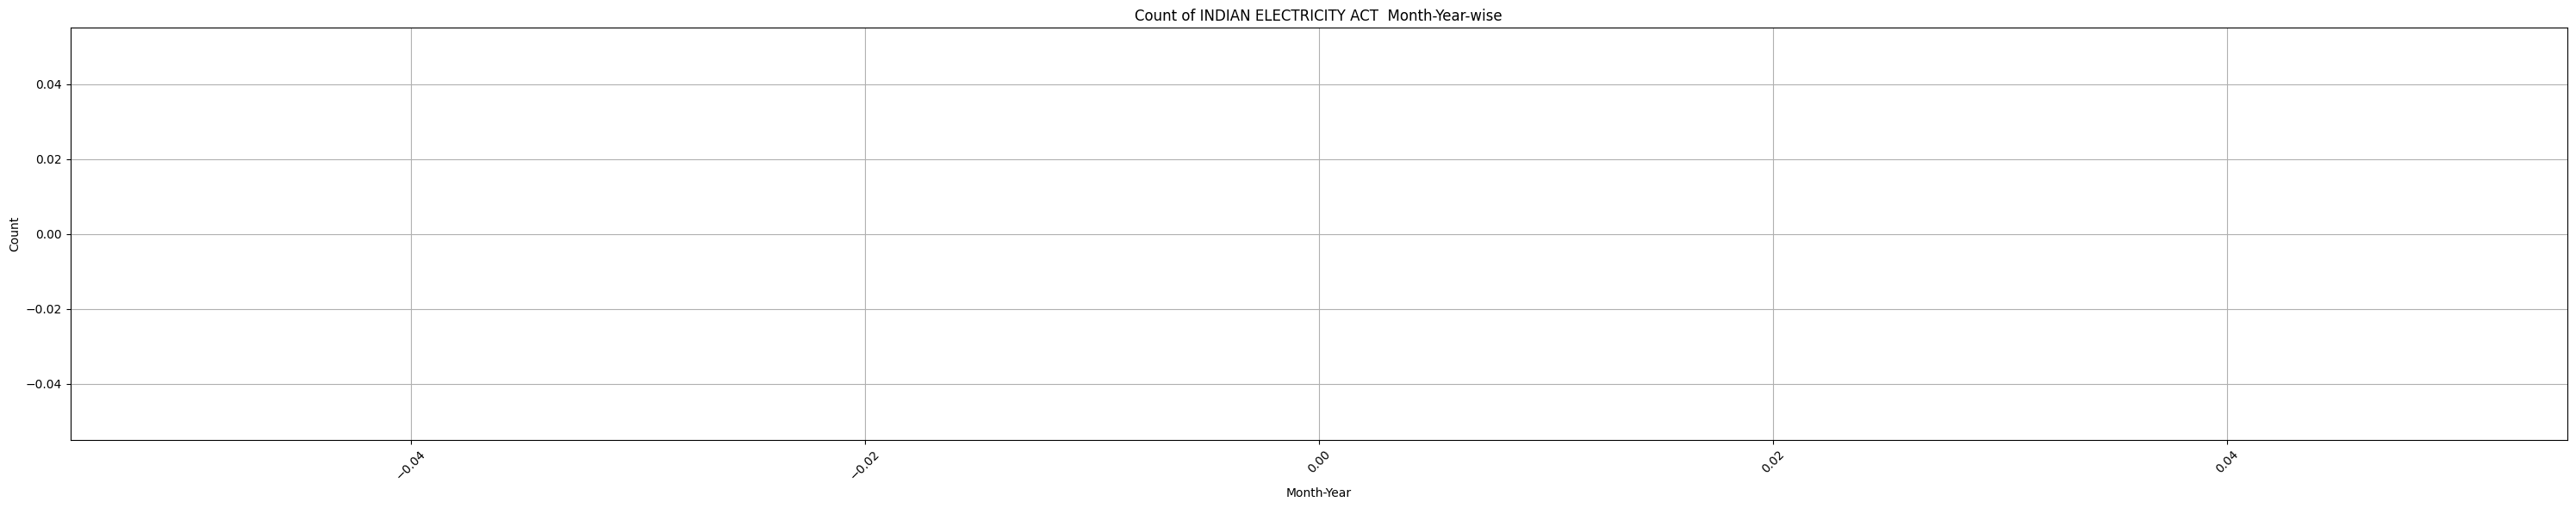

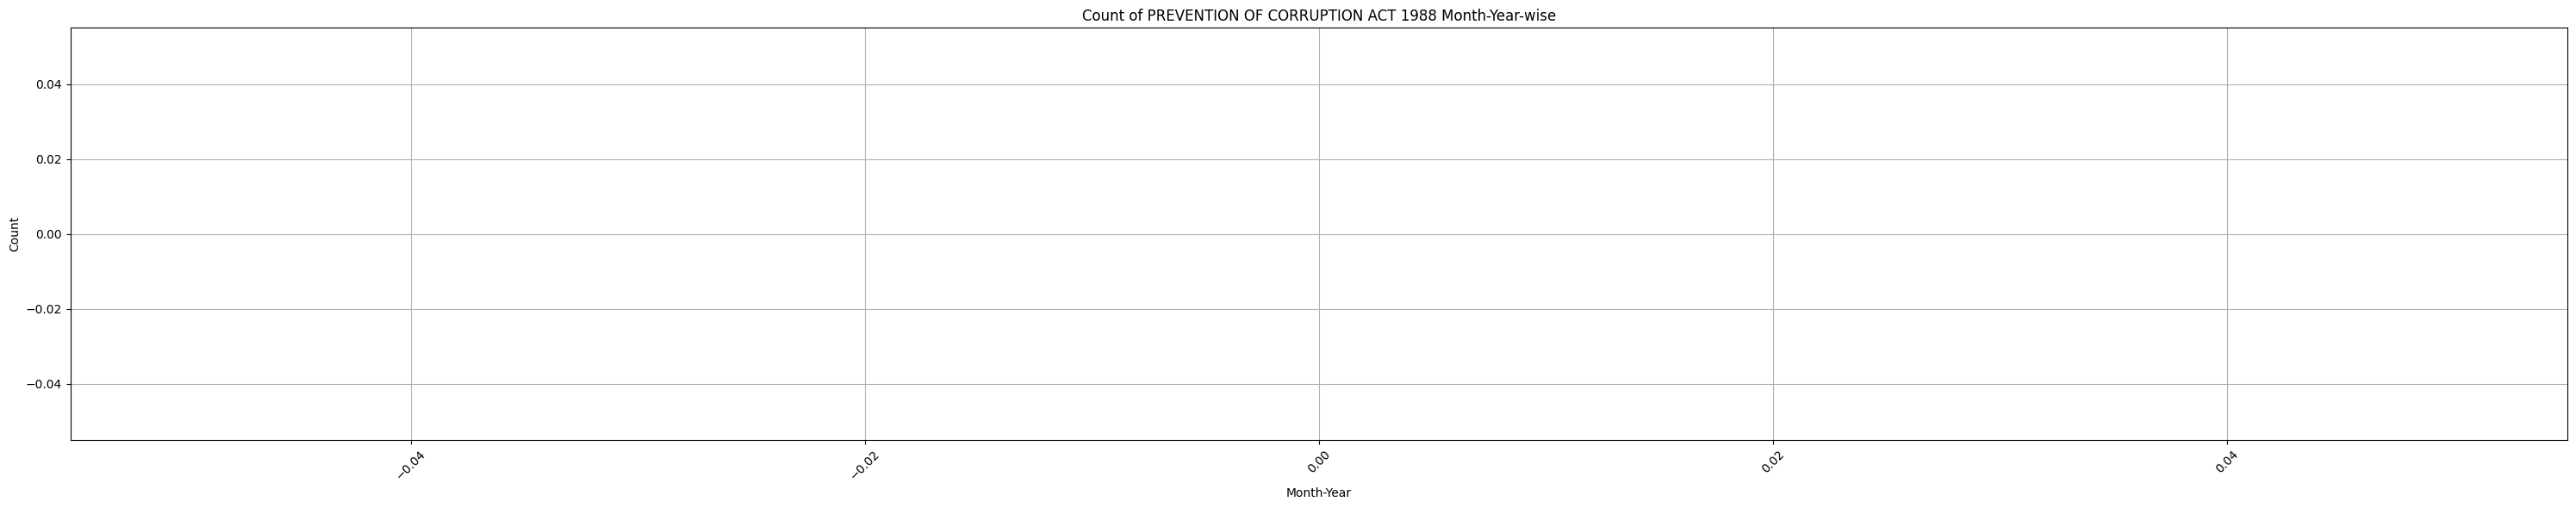

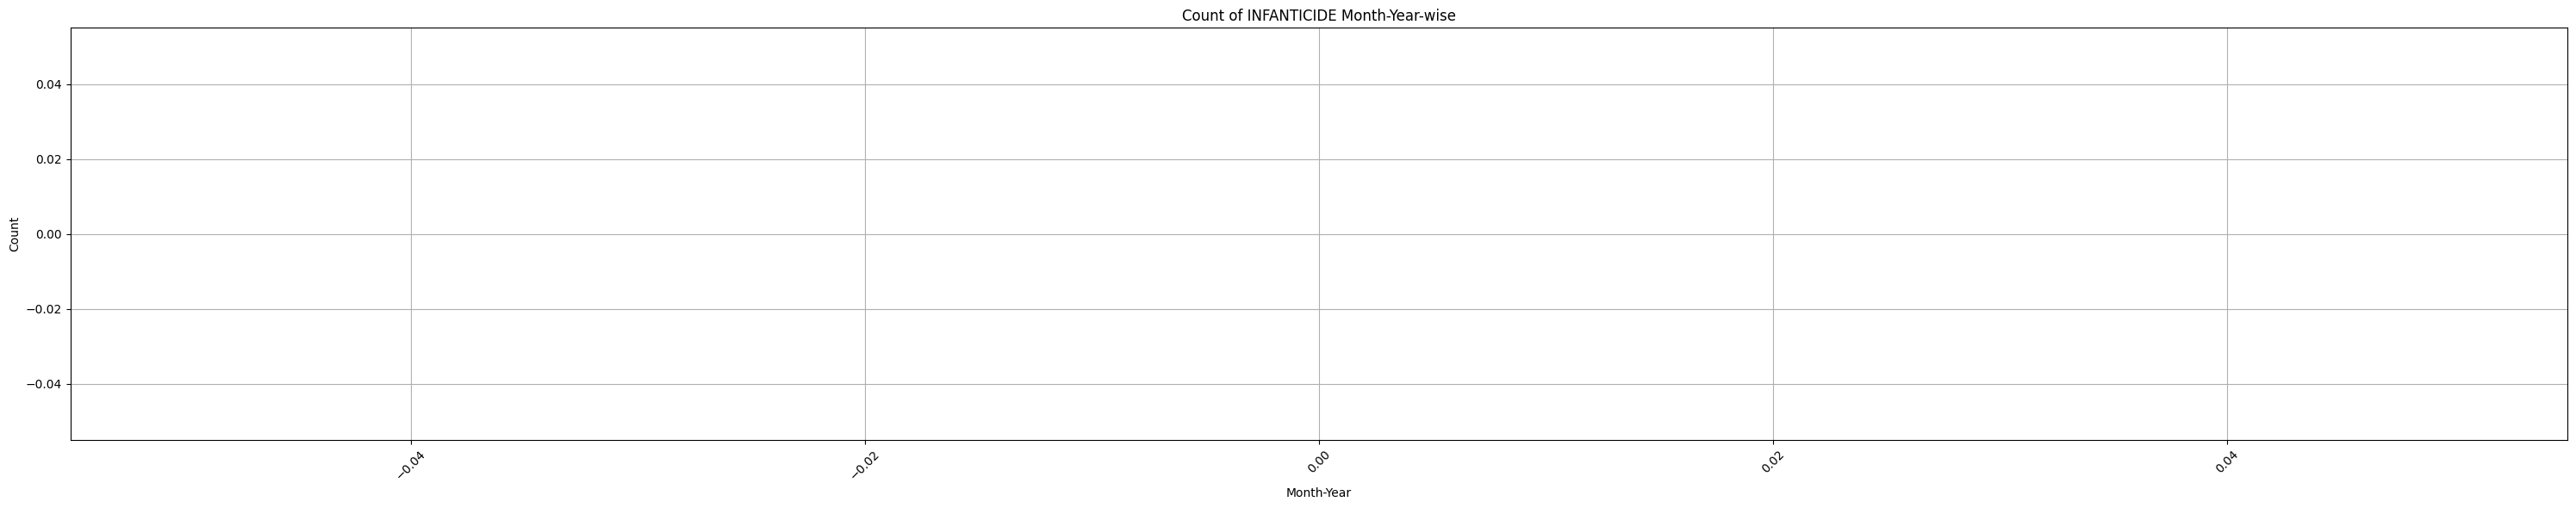

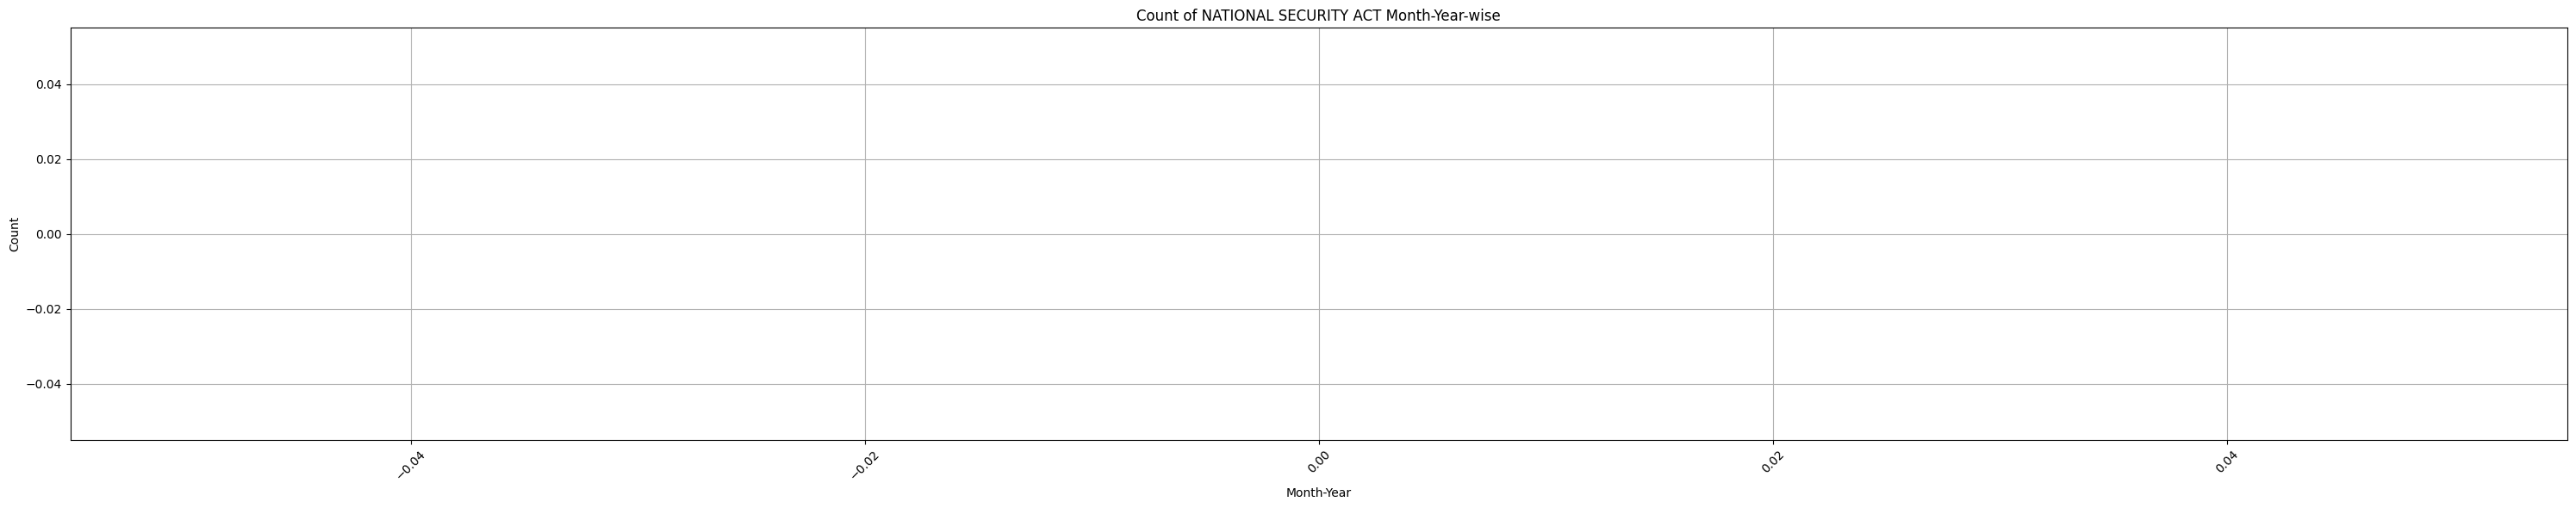

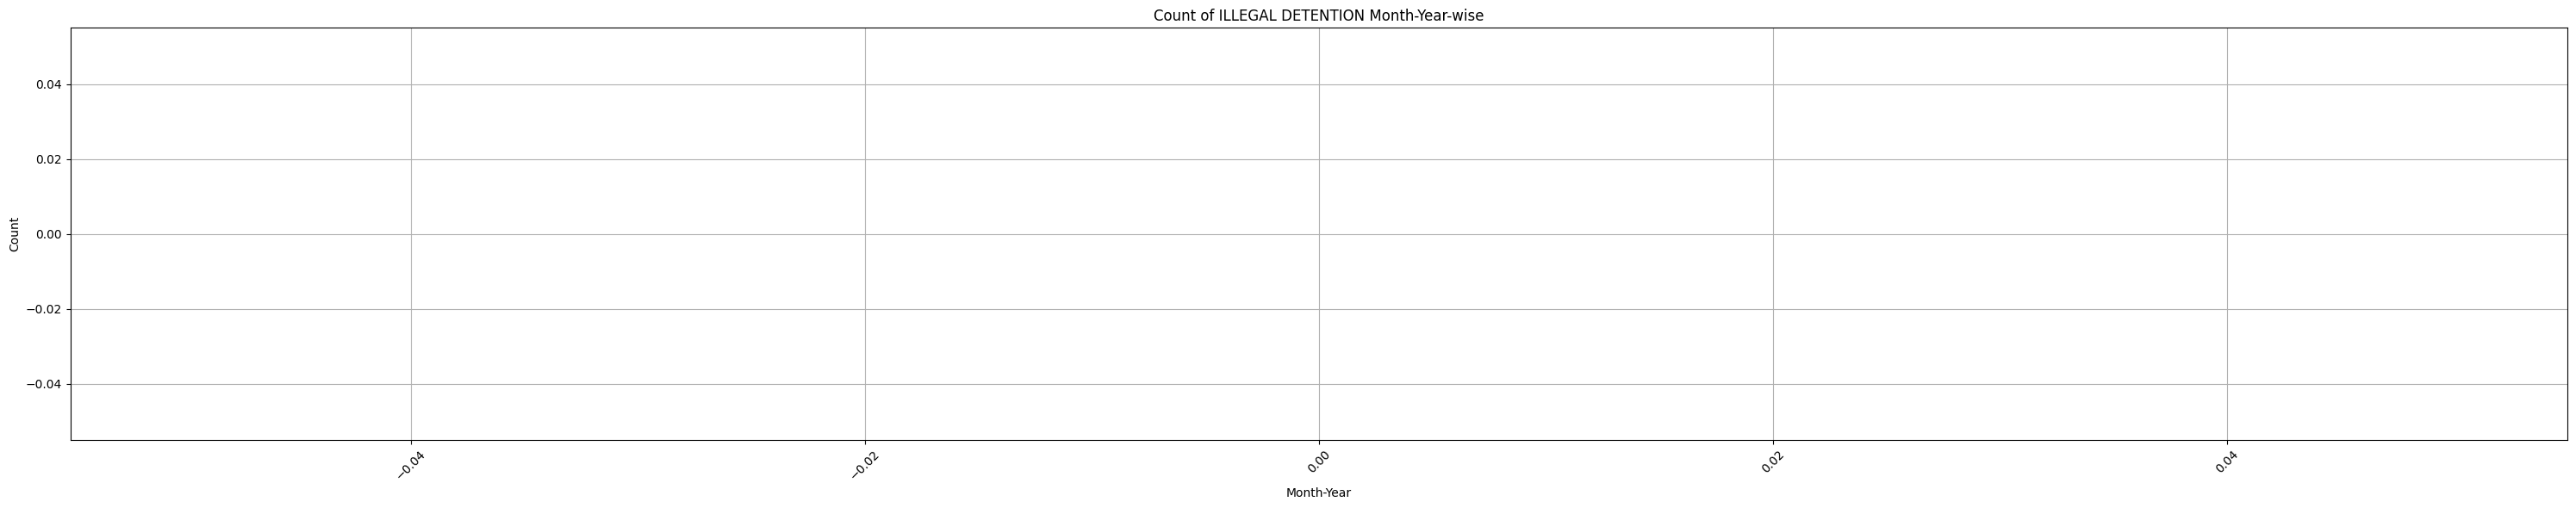

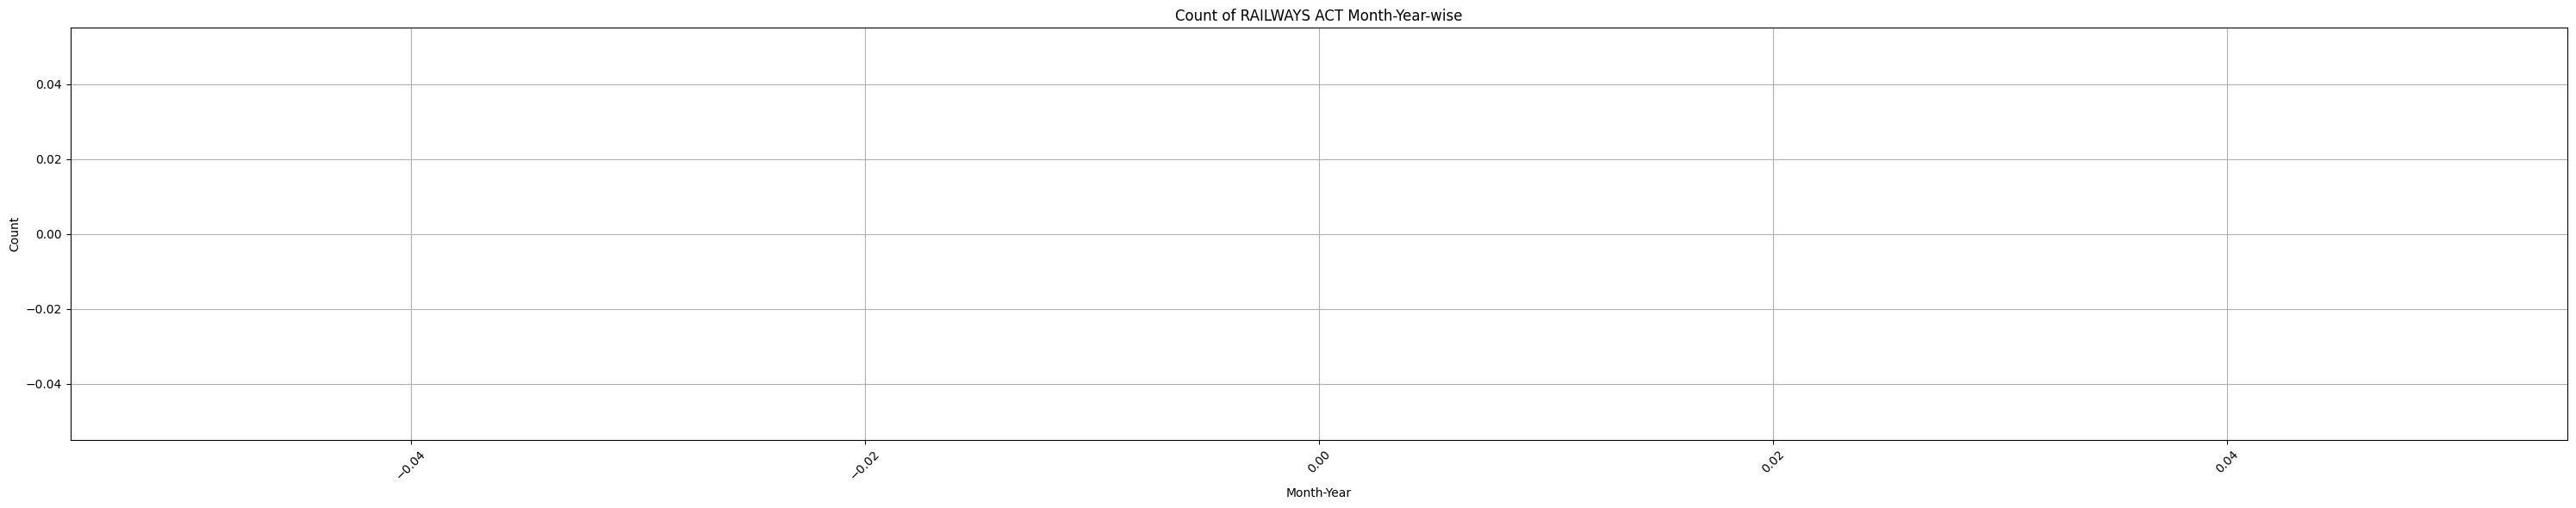

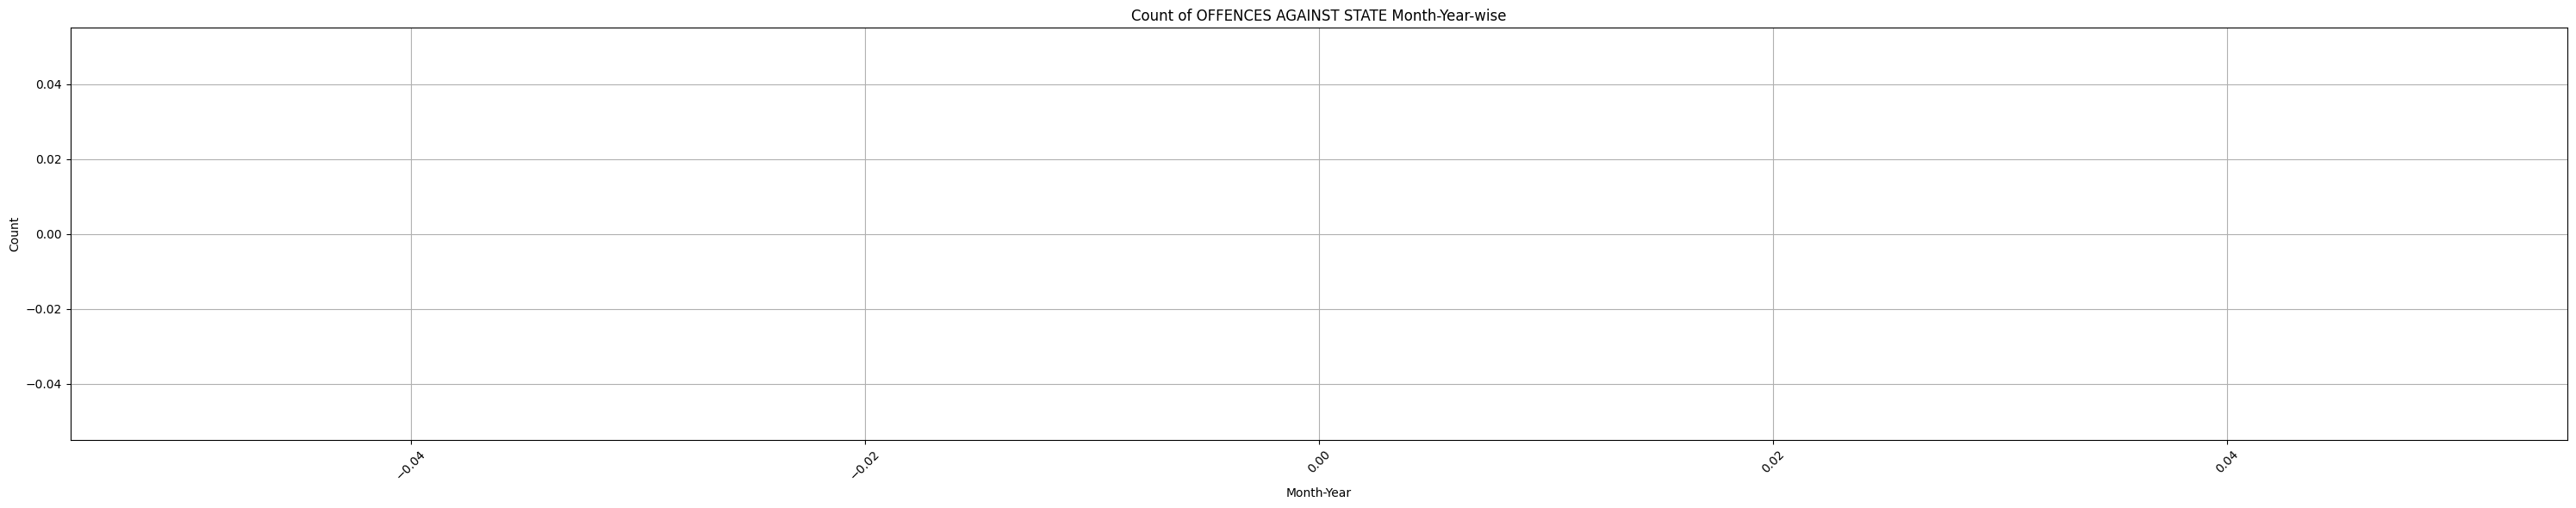

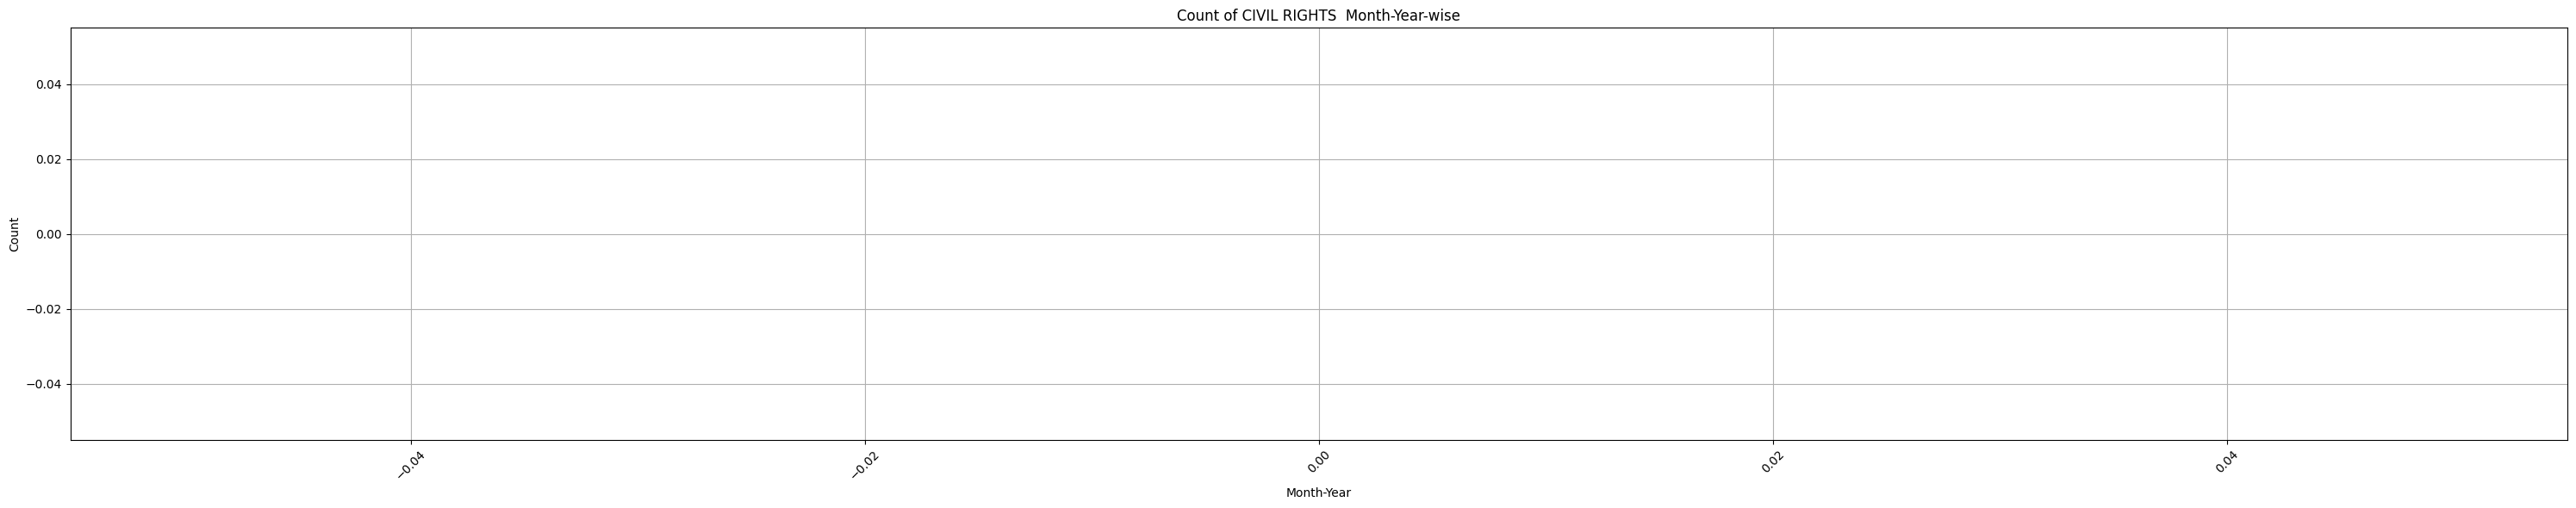

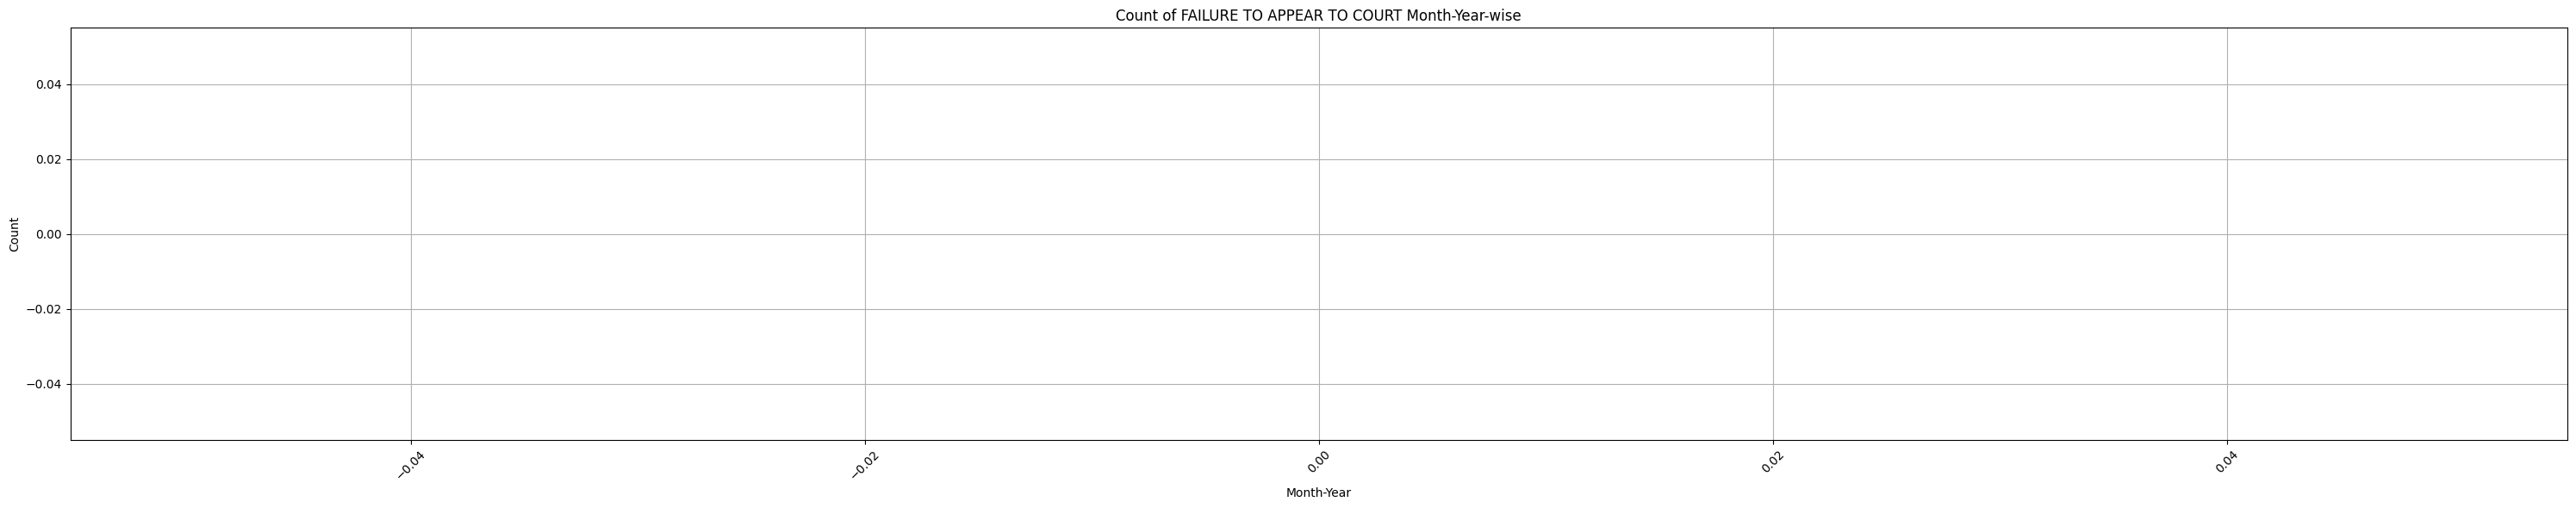

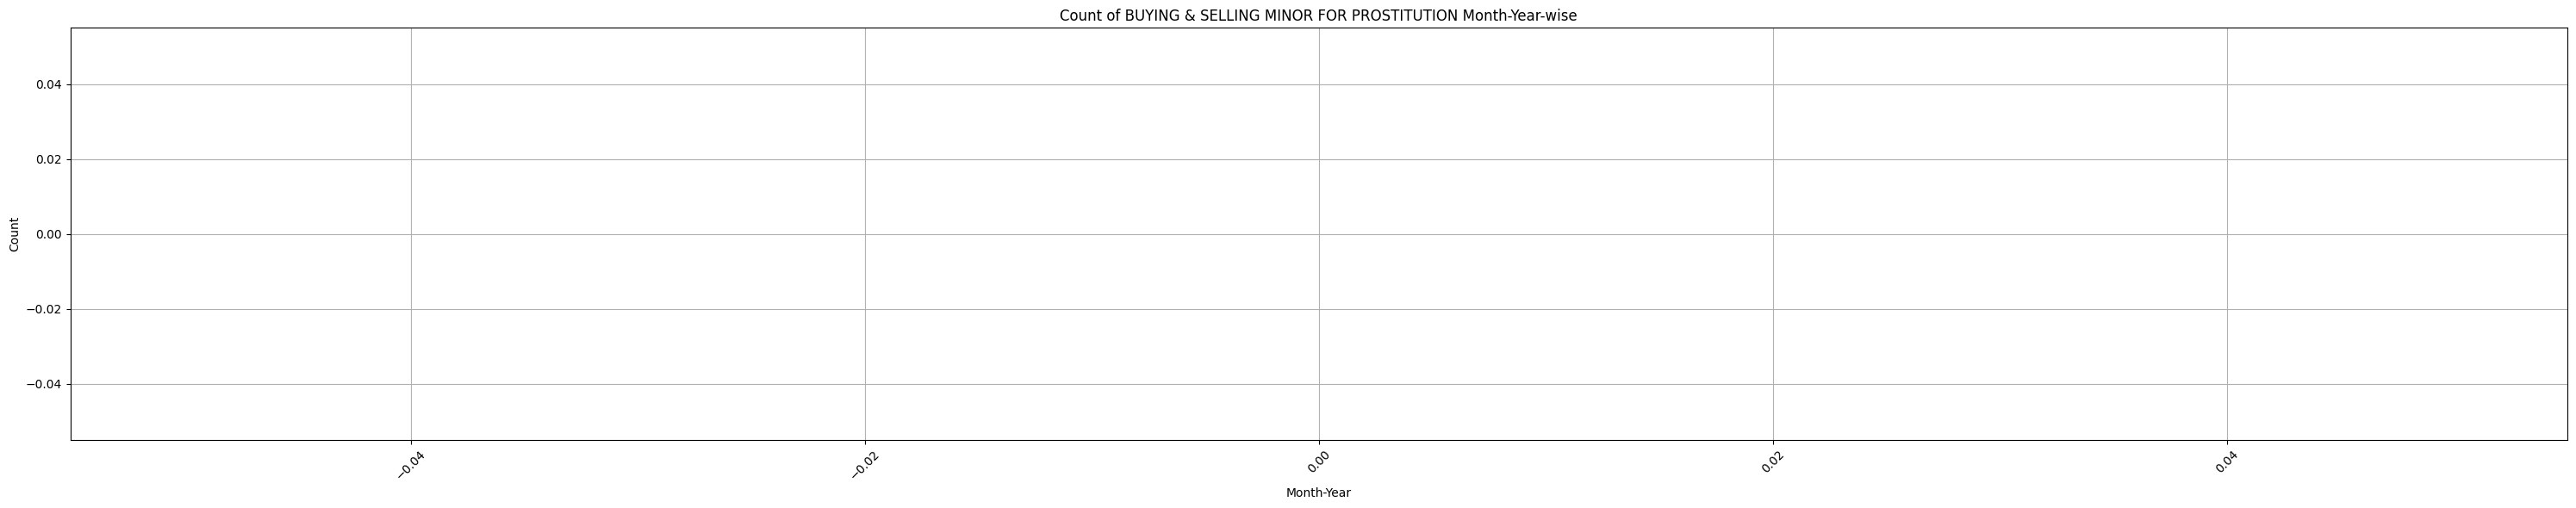

In [59]:
crimelst = ['POCSO', 'KARNATAKA POLICE ACT 1963', 'MOTOR VEHICLE ACCIDENTS NON-FATAL',
            'MOTOR VEHICLE ACCIDENTS FATAL', 'THEFT', 'CrPC', 'CRUELTY BY HUSBAND',
            'ATTEMPT TO MURDER', 'CHEATING', 'Karnataka State Local Act', 'ELECTION',
            ' REPRESENTATION OF PEOPLE ACT 1951 & 1988', 'MOLESTATION',
            'MISSING PERSON', 'CASES OF HURT', 'FORGERY',
            'SCHEDULED CASTE AND THE SCHEDULED TRIBES ', 'BURGLARY - NIGHT',
            'NEGLIGENT ACT', 'MURDER', 'RIOTS', 'Attempting to commit offences',
            'KIDNAPPING AND ABDUCTION', 'EXPLOSIVES',
            'EXPOSURE AND ABANDONMENT OF CHILD', 'ARSON', 'CONSUMER',
            'OFFENCES AGAINST PUBLIC SERVANTS (Public servant is a victim)',
            'CRIMES RELATED TO WOMEN', 'DEATHS DUE TO RASHNESS/NEGLIGENCE',
            'COMMUNAL / RELIGION   ', 'DOWRY DEATHS', 'CRIMINAL BREACH OF TRUST',
            'DACOITY', ' PREVENTION OF DAMAGE TO PUBLIC PROPERTY ACT 1984',
            'BURGLARY - DAY', 'ANIMAL', 'MISCHIEF',
            'INSULTING MODESTY OF WOMEN (EVE TEASING)', 'CRIMINAL TRESPASS',
            'CRIMINAL INTIMIDATION', 'CRIMINAL CONSPIRACY', 'SUICIDE',
            'NARCOTIC DRUGS & PSHYCOTROPIC SUBSTANCES', 'PUBLIC SAFETY', 'CHILDREN ACT',
            'ROBBERY', 'RAPE', 'ANTIQUES (CULTURAL PROPERTY)', ' CYBER CRIME',
            'Concealment of birth by secret disposal of Child', 'FOREST', 'AFFRAY',
            'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'DEFAMATION',
            'ATTEMPT TO CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
            'WRONGFUL RESTRAINT/CONFINEMENT',
            'COTPA, CIGARETTES AND OTHER TOBACCO PRODUCTS',
            'CRIMINAL MISAPPROPRIATION ',
            'ASSAULT OR USE OF CRIMINAL FORCE TO DISROBE WOMAN',
            'Disobedience to Order Promulgated by PublicServan', 'UNNATURAL SEX ',
            'POISONING-PROFESSIONAL', 'ASSAULT', 'ARMS ACT  1959', 'SEDITION',
            'COPY RIGHT ACT 1957', 'OF ABETMENT', 'OFFENCES RELATED TO MARRIAGE',
            'PUBLIC NUISANCE', 'Failure to appear to Court', 'ADULTERATION',
            ' POST & TELEGRAPH,TELEGRAPH WIRES(UNLAWFUL POSSESSION)ACT 1950',
            'IMPERSONATION ', 'PUBLIC JUSTICE', 'OFFENCES PROMOTING ENEMITY',
            'INDIAN MOTOR VEHICLE', 'COUNTERFEITING', 'DEATHS-MISCARRIAGE',
            'PORNOGRAPHY', 'IMMORAL TRAFFIC', 'FALSE EVIDENCE', 'BONDED LABOUR SYSTEM',
            'ESCAPE FROM LAWFUL CUSTODY AND RESISTANCE', 'PASSPORT ACT',
            'Human Trafficking',
            'OFFENCES BY PUBLIC SERVANTS (EXCEPT CORRUPTION) (Public servant is accused)',
            'SLAVERY', 'Giving false information respecting an offence com',
            'FOREIGNER', 'RECEIVING OF STOLEN PROPERTY',
            'OFFICIAL SECURITY RELATED ACTS',
            'UNLAWFUL ACTIVITIES(Prevention)ACT 1967 ',
            'UNNATURAL DEATH (Sec 174/174c/176)', 'CINEMATOGRAPH ACT 1952',
            'DOCUMENTS & PROPERTY MARKS',
            'DEFENCE FORCES OFFENCES RELATING TO (also relating to desertion)',
            'INDIAN ELECTRICITY ACT ', 'PREVENTION OF CORRUPTION ACT 1988',
            'INFANTICIDE', 'NATIONAL SECURITY ACT', 'ILLEGAL DETENTION', 'RAILWAYS ACT',
            'OFFENCES AGAINST STATE', 'CIVIL RIGHTS ', 'FAILURE TO APPEAR TO COURT',
            'BUYING & SELLING MINOR FOR PROSTITUTION']


for crimename in crimelst:
    # Create a new figure for each crime category
    plt.figure(figsize=(30, 6))

    # Convert 'Offence_From_Date' column to datetime format
    dffir['Offence_From_Date'] = pd.to_datetime(dffir['Offence_From_Date'])

    # Extract month and year from 'Offence_From_Date' column and create new columns 'Month' and 'Year'
    dffir['Month'] = dffir['Offence_From_Date'].dt.month
    dffir['Year'] = dffir['Offence_From_Date'].dt.year

    # Filter the DataFrame for the current crime group
    filtered_df = dffir[(dffir['CrimeGroup_Name'] == crimename) & (dffir['UnitName'] == 'Electronic City PS')]

    # Group by 'Year', 'Month', and count occurrences
    crime_counts = filtered_df.groupby(['Year', 'Month']).size().reset_index(name='Count')

    # Plotting the graph
    plt.plot(crime_counts['Year'].astype(str) + '-' + crime_counts['Month'].astype(str), crime_counts['Count'])

    plt.xlabel('Month-Year')
    plt.ylabel('Count')
    plt.title('Count of ' + crimename + ' Month-Year-wise')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.grid(True)
    plt.tight_layout()
    plt.show()